# 0. Information

## **Students Information:**

* Name = Peyman
* Last Name = Naseri
* Student ID = 4011305965014




## **Project Information:**
* **Course**: The project is for a Machine Learning course.
* **Project Definition**: A [link](https://github.com/peyman886/Machine_Learning/blob/main/Bahrak%201402-1/Project/Machine%20Learning%20-%20Final%20Project.pdf) is provided to the project definition document hosted on GitHub. This document likely outlines the objectives, requirements, and guidelines for the project.
* **Colab Link**: A Google Colab [link](https://colab.research.google.com/drive/1KYqodYoOOwNVOjosg-RJKuI8snMqFSoD?usp=sharing) is given, allowing access to a cloud-based version of the Jupyter notebook. This is useful for running the project in an environment that doesn't require local setup.
* **GitHub Link**: There's a [link](https://github.com/peyman886/Machine_Learning/blob/main/Bahrak%201402-1/Project/ML_Project_1402.ipynb) to the GitHub repository where the project is hosted. This repository contain the project files, datasets, and additional resources necessary for the project.

# 1. Setup

import necessary libraries, and perform any initial configuration needed for the project.

## 1.1 Install required package

In [ ]:
# !pip install --upgrade torch torchvision #upgrade PyTorch and torchvision to their latest versions.
# !pip install matplotlib # This command would install matplotlib, a library for creating static, interactive, and animated visualizations in Python.


These lines are meant to ensure that the necessary libraries for the project, such as PyTorch for machine learning tasks and matplotlib for plotting, are installed and up-to-date.

## 1.2 GPU Setup


for use local gpu run this comand in anaconda prompet:

      1) pip install jupyter_http_over_ws
      2) jupyter serverextension enable --py jupyter_http_over_ws
      3) jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0
      
copy url and paste on colab

In [ ]:
import torch
#Check GPU
torch.cuda.get_device_name(0) # This command, checks and prints the name of the GPU device if available. Index 0 refers to the first GPU.

'NVIDIA GeForce RTX 2080 with Max-Q Design'

sets up the device for PyTorch operations, determining whether to use a GPU (if available) or default back to using the CPU.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## 1.3 Import & Config Packages

importing various Python libraries and configuring the notebook environment for data analysis and visualization.

In [ ]:
# from google.colab import files  # Intended for use in Google Colab to import files, commented out here.

import os  # Imports the os library for operating system dependent functionality.
import numpy as np  # Imports NumPy for numerical operations.
import pandas as pd  # Imports pandas for data manipulation and analysis.

# from pandas_profiling import ProfileReport  # Used for generating profile reports from pandas DataFrame, commented out here.

import matplotlib.pyplot as plt  # Imports matplotlib for plotting.
import seaborn as sns  # Imports seaborn for statistical data visualization.
%matplotlib inline
# The above magic command ensures that matplotlib graphs will be included in your notebook, next to the code.
sns.set()  # Sets the default seaborn style for the plots.
sns.set_style('darkgrid')  # Sets the seaborn plot style to 'darkgrid'.
plt.style.use("ggplot")  # Uses "ggplot" style for matplotlib plots.

import warnings  # Imports the warnings library.
warnings.filterwarnings('ignore')  # Ignores warnings to keep the notebook tidy.


C:\Users\peyma\AppData\Local\Temp\ipykernel_10648\1183197329.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Imports pandas for data manipulation and analysis.


# 2. Data

## 2.1 Download Data

the dataset required for the project is available for download via a [public link](https://drive.google.com/file/d/1G-I3ZQ9SX3EyMw7uW9_OtfmYngInmx3Q/view) to Google Drive. Users are directed to access the link to download the CSV file that contains the data needed for the project.

In [ ]:
! gdown 1G-I3ZQ9SX3EyMw7uW9_OtfmYngInmx3Q

'gdown' is not recognized as an internal or external command,
operable program or batch file.


The use of `gdown` simplifies the process of downloading files directly into the environment where the Jupyter notebook is running, facilitating easy access to the data for processing and analysis.

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

contains commented-out commands for mounting Google Drive in a Google Colab environment. This step would be necessary if you were accessing data stored in Google Drive directly from Colab.

## 2.2 Unzip Dataset

The `ZipFile` module is used to extract the contents of the dataset zip file into a designated folder.

In [ ]:
from zipfile import ZipFile

# Upload the dataset and ensure it's in the working directory
# zip_path = '/content/ML Project Dataset - train.zip'
zip_path = 'content/ML Project Dataset - train.zip'

# Unzip the dataset
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('content/dataset')


## 2.3 Image Processing and Label Extraction

defines functions for processing images and extracting labels and reality status (real or fake) based on the filename using regular expressions.

In [ ]:
from PIL import Image
import pickle
import re

def get_label_and_reality(filename):
    """ Extracts the label (e.g., sea, see, mountain, etc.)
    and determines whether the image is real or fake based on the filename. """
    # Regular expression to find the label and check if it's fake
    filename = filename.lower()
    label_match = re.search(r'(sea|see|mountain|jungle|junlge|forest)', filename)
    fake_match = re.search(r'fake', filename)

    # Extract label; default to 'unknown' if not found
    label = label_match.group(0) if label_match else 'unknown'
    # Determine reality; label as 'fake' if 'fake' is found, else 'real'
    reality = 'fake' if fake_match else 'real'

    return label, reality

def load_image_paths_and_labels(folder_path):
    """
    Iterates over images in a given folder, applies `get_label_and_reality` to each,
    and compiles the results into a DataFrame with columns for the image path, label, and reality status.
    Parameters:
    - folder_path: str, the path to the directory containing image files.

    Returns:
    - A DataFrame with columns ['Image_Path', 'Label', 'Reality']
    """
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png')):
            file_path = os.path.join(folder_path, filename)
            label, reality = get_label_and_reality(filename)
            data.append([file_path, label, reality])
    return pd.DataFrame(data, columns=['Image_Path', 'Label', 'Reality'])


prepare and serialize the dataset for subsequent analysis or model training.

In [ ]:
# Load the images and create the structured DataFrame
folder_path = 'content/dataset'
structured_data = load_image_paths_and_labels(folder_path)

# Save the structured DataFrame to a pickle file for easy loading
dump_file_path = 'content/structured_data.pkl'
with open(dump_file_path, 'wb') as file:
    pickle.dump(structured_data, file)

print(f"Structured data saved to {dump_file_path}.")

Structured data saved to content/structured_data.pkl.


display data

In [ ]:
structured_data.head()

Image_Path   Label Reality
0  content/dataset\150400011_fake_dall.e_jungle_1...  jungle    fake
1  content/dataset\150400011_fake_dall.e_jungle_2...  jungle    fake
2  content/dataset\150400011_fake_dall.e_jungle_3...  jungle    fake
3  content/dataset\150400011_fake_dall.e_jungle_4...  jungle    fake
4  content/dataset\150400011_fake_dall.e_jungle_5...  jungle    fake

## 2.4 Split

divide the structured data into `training`, `validation`, and `testing` sets. The process ensures that the data is partitioned in a way that allows for both effective model training and evaluation.


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming structured_data is your loaded DataFrame
train_val, test_df = train_test_split(structured_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2



In [ ]:
train_val

Image_Path     Label Reality
521   content/dataset\810100406-real-none-mountain-1...  mountain    real
522   content/dataset\810100406-real-none-mountain-2...  mountain    real
2161  content/dataset\810199424_fake_stable_jungle_2...    jungle    fake
727   content/dataset\810100503_fake_dalle_mountain_...  mountain    fake
3053      content/dataset\830400052_real_none_sea_5.jpg       sea    real
...                                                 ...       ...     ...
3092  content/dataset\830401079_real_none_forest_4.j...    forest    real
1095  content/dataset\810101168_fake_stable_jungle_1...    jungle    fake
1130      content/dataset\810101168_real_none_sea_1.jpg       sea    real
1294   content/dataset\810101224_real_none_forest_4.jpg    forest    real
860   content/dataset\810101087_fake_stable_mountain...  mountain    fake

[2494 rows x 3 columns]

##  2.5 Transformations & Dataset & Dataloader

prepare the data for model training, including applying transformations, defining custom dataset classes, and utilizing DataLoader for efficient data handling.


### 2.5.1 Define a Custom Dataset Class

implementation of a custom `Dataset` class for handling image data within PyTorch. This class is designed to work with a DataFrame that contains image paths, labels, and reality (real or fake) status. It also supports transformations, allowing for data augmentation or preprocessing steps to be applied to the images.

This setup is crucial for feeding the data into a PyTorch model in a structured and efficient manner, especially when dealing with large datasets and the need for data augmentation.

The class includes:

An `__init__` method for initializing the dataset with the DataFrame and any transformations.

A `__len__` method that returns the size of the dataset.

A `__getitem__` method that loads an image by its index, applies transformations, and returns the image along with its label and reality status as tensors.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch

label_mapping = {'sea': 0, 'see':0, 'mountain': 1, 'jungle': 2, 'junlge':2, 'forest': 2}
reality_mapping = {'fake': 0, 'real': 1}

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (DataFrame): DataFrame containing image paths, labels, and realness.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Assuming the structure: [image_path, label, realness]
        img_path, label, reality = self.dataframe.iloc[idx]

        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # Convert labels to tensor, adjust based on your label type and encoding
        label_tensor = torch.tensor(label_mapping[label], dtype=torch.long)
        # reality_tensor = torch.tensor(reality_mapping[reality], dtype=torch.float if reality in [0, 1] else torch.long)
        reality_tensor = torch.tensor(reality_mapping[reality], dtype=torch.float)
        return image, label_tensor, reality_tensor


set the batch size for training the model. The batch size determines how many examples the model processes before updating its weights. A larger batch size can lead to faster training but requires more memory.

In [ ]:
batch_size = 32

### 2.5.2 Types of data augmentation

Data augmentation is a technique used to increase the diversity of your training set by applying random transformations, such as flipping or rotating images. This can help improve model generalization.

#### 2.5.2.1 No data augmentation

implement data loading and processing without applying any augmentation techniques. This could be part of a comparison to illustrate the impact of data augmentation on model performance.


defines a transformation pipeline with no data augmentation, only including resizing, conversion to tensor, and normalization. It then applies this transformation to create a training dataset and DataLoader for the training set without any augmentation.

In [ ]:
from torchvision import transforms

transforms_no_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset_train_no_aug = CustomImageDataset(dataframe=train_df, transform=transforms_no_aug)
data_loader_train_no_aug = DataLoader(dataset_train_no_aug, batch_size=batch_size, shuffle=True)


display a subset of images from the dataset. It showcases how to visualize images and their labels from a custom dataset. This is useful for verifying the data loading and transformation steps are working as expected.

In [ ]:
structured_data

Image_Path   Label Reality
0     content/dataset\150400011_fake_dall.e_jungle_1...  jungle    fake
1     content/dataset\150400011_fake_dall.e_jungle_2...  jungle    fake
2     content/dataset\150400011_fake_dall.e_jungle_3...  jungle    fake
3     content/dataset\150400011_fake_dall.e_jungle_4...  jungle    fake
4     content/dataset\150400011_fake_dall.e_jungle_5...  jungle    fake
...                                                 ...     ...     ...
3113  content/dataset\830401079_real_none_sea_5.jpeg...     sea    real
3114  content/dataset\830401079_real_none_sea_6.jpeg...     sea    real
3115  content/dataset\830401079_real_none_sea_7.jpeg...     sea    real
3116  content/dataset\830401079_real_none_sea_8.jpeg...     sea    real
3117  content/dataset\830401079_real_none_sea_9.jpeg...     sea    real

[3118 rows x 3 columns]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


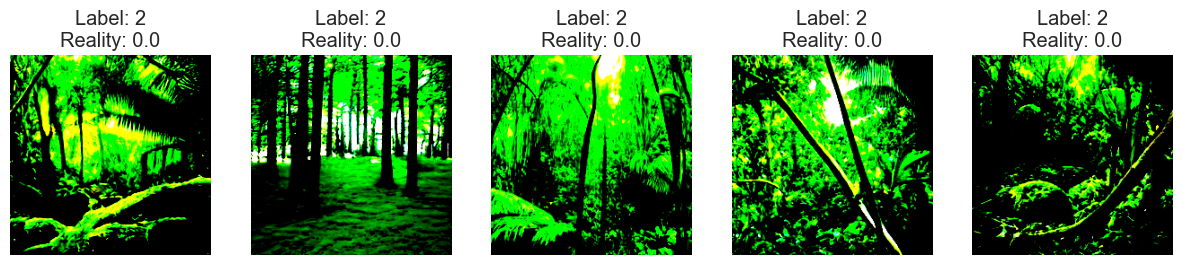

In [ ]:
import matplotlib.pyplot as plt

def show_images(dataset, num_images=5):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        image, label, reality = dataset[i]
        axs[i].imshow(image.permute(1, 2, 0))
        axs[i].set_title(f"Label: {label}\nReality: {reality}")
        axs[i].axis('off')
    plt.show()

# Assuming 'dataset' is an instance of CustomImageDataset
dataset = CustomImageDataset(dataframe=structured_data, transform=transforms_no_aug)
show_images(dataset)


#### 2.5.2.2 Combination 1: Basic Natural Scene Augmentation
This combination includes horizontal flipping and random rotation, which are plausible variations in natural scenes. A mild color jitter is added to simulate different lighting conditions.

In [ ]:
basic_natural_scene_augmentation = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0), ratio=(0.75, 1.33)),

    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])



dataset_train_basic_natural_scene_augmentation = CustomImageDataset(dataframe=train_df, transform=basic_natural_scene_augmentation)
data_loader_basic_natural_scene_augmentation = DataLoader(dataset_train_basic_natural_scene_augmentation, batch_size=batch_size, shuffle=True)


#### 2.5.2.3 Combination 2: Advanced Realism Augmentation
For distinguishing between real and fake images, as well as categorizing scenes, it's beneficial to simulate more complex variations. This setup includes blurring and grayscale to challenge the model's ability to recognize textures and patterns under different conditions, alongside flips and crops for spatial variations.

In [ ]:
advanced_realism_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.15),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0), ratio=(0.75, 1.33)),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.2),

    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset_train_advanced_realism_augmentation = CustomImageDataset(dataframe=train_df, transform=advanced_realism_augmentation)
data_loader_advanced_realism_augmentation = DataLoader(dataset_train_advanced_realism_augmentation, batch_size=batch_size, shuffle=True)


#### 2.5.2.4 Combination 3: Comprehensive Environmental Augmentation
This comprehensive combination is designed to simulate a wide range of environmental conditions, including lighting, orientation, and focus variations. It's particularly suited for a dataset with diverse natural scenes and the need to distinguish between nuanced features of real and fake images.

In [ ]:
comprehensive_environmental_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomResizedCrop(size=224, scale=(0.5, 1.0), ratio=(0.75, 1.33)),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.1),

    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset_train_comprehensive_environmental_augmentation = CustomImageDataset(dataframe=train_df, transform=comprehensive_environmental_augmentation)
data_loader_comprehensive_environmental_augmentation = DataLoader(dataset_train_comprehensive_environmental_augmentation, batch_size=batch_size, shuffle=True)

#### 2.5.2.5 mixup
a data augmentation technique that involves dynamically blending images and their labels during training to create synthetic training examples. Unlike the static transformations previously discussed, mixup is applied during training, making the learning process more robust to variations and potentially improving generalization.



### 2.5.3 Validation and test datasets
preparing validation and test datasets. It emphasizes that these datasets should not use aggressive augmentation techniques like those applied to the training dataset. Instead, the focus should be on resizing and normalization to ensure the model

In [ ]:
dataset_val = CustomImageDataset(dataframe=val_df, transform=transforms_no_aug)
dataset_test = CustomImageDataset(dataframe=test_df, transform=transforms_no_aug)
data_loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
data_loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

`shuffle=False` to ensure that the evaluation order remains consistent, which is typical for validation and test sets to ensure reproducibility and consistent evaluation metrics.

# 3. Models


## 3.1 My model

define a custom convolutional neural network class, `CustomCNN`, using PyTorch. The model is designed to be flexible, handling different tasks by specifying the task type (`label`, `realness`, or potentially `both`).This approach allows for task-specific training of the models using the same underlying architecture but tailored output layers and loss functions depending on the task.

The architecture includes a series of convolutional, batch normalization, ReLU activation, and pooling layers, followed by adaptive average pooling. Task-specific layers are defined for either classifying the label, determining realness, or potentially both.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes, task):
        # Initialization and layer definitions
        super(CustomCNN, self).__init__()
        # Base layers
        self.layers = nn.ModuleList([
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=2, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.Conv2d(128, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.Conv2d(128, 256, kernel_size=3, stride=4, padding=1),
        nn.BatchNorm2d(256),

        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),

        nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),

        nn.AdaptiveAvgPool2d((1, 1)),
        ])

        # Task-specific layers
        self.fc_label = nn.Linear(512, num_classes) if task in ['label', 'both'] else None
        self.fc_realness = nn.Linear(512, 1) if task in ['realness', 'both'] else None
        self.task = task

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor for the
        if self.task == 'label':
            x = self.fc_label(x)
            return F.softmax(x, dim=1)
        elif self.task == 'realness':
            x = self.fc_realness(x)
            return torch.sigmoid(x).squeeze(1)
        # elif self.task == 'both':
        #     label_output = nn.Softmax(self.fc_label(x), dim=1)
        #     realness_output = nn.Sigmoid(self.fc_realness(x)).squeeze(1)
        #     return label_output, realness_output

## 3.2 pre-trained Model

This cell defines a function to initialize pre-trained models from PyTorch's torchvision library for specific tasks (label prediction or realness detection). It demonstrates how to load pre-trained models such as ResNet152 and MobileNetV3, modify their classifiers to suit the task at hand, and freeze all parameters except those in the newly added classifier layer. This approach leverages the learned features from large datasets while fine-tuning the model for a specific, possibly narrower, task.

In [ ]:
import torchvision.models as models
import torch.nn as nn
# from torchvision.models import vit_b_16

# Function to initialize a pretrained model for a specific task
def initialize_pretrained_model(task='label', model_name='resnet152'):

    # Load the appropriate pretrained model and Replace the classifier for the specific task
    if model_name == 'resnet152':
        model = models.resnet152(pretrained=True)
        num_ftrs = model.fc.in_features
        if task == 'label': # Replace the classifier for the specific task
            model.fc = nn.Linear(num_ftrs, 3)
        elif task == 'realness':
            model.fc = nn.Linear(num_ftrs, 1)

    elif model_name == 'mobilenet_v3_large':
        model = models.mobilenet_v3_large(pretrained=True)
        num_ftrs = model.classifier[3].in_features
        if task == 'label': # Replace the classifier for the specific task
            model.classifier[3] = nn.Linear(num_ftrs, 3)
        elif task == 'realness':
            model.classifier[3] = nn.Linear(num_ftrs, 1)
    elif model_name == 'vision_transformer_model':
        model = models.vit_b_16(pretrained=True)
        num_ftrs = model.heads.head.in_features
        if task == 'label': # Replace the classifier for the specific task
            model.heads.head = nn.Linear(num_ftrs, 3)
        elif task == 'realness':
            model.heads.head = nn.Linear(num_ftrs, 1)

    else:
        raise ValueError("Unsupported model name")



    # Freeze all the parameters except for the classifier
    for param in model.parameters():
        param.requires_grad = False

    if model_name == 'resnet152':
        for param in model.fc.parameters():
            param.requires_grad = True
    elif model_name == 'mobilenet_v3_large':
        for param in model.classifier[3].parameters():
            param.requires_grad = True
    elif model_name == 'vision_transformer_model':
        for param in model.heads.head.parameters():
            param.requires_grad = True

    return model


## 3.3 List of models

creates instances of the `CustomCNN` model for different tasks: one for label prediction (`model_label`) and another for realness prediction (`model_realness`).

In [ ]:
# Create custom model objects for each task
model_label = CustomCNN(num_classes=3, task='label')
model_realness = CustomCNN(num_classes=2, task='realness')
# model_both = CustomCNN(num_classes=num_classes, task='both')


use the previously defined `initialize_pretrained_model` function to instantiate ResNet-152 and MobileNetV3 models for both label prediction and realness detection tasks. It shows the flexibility of the function to adapt different pre-trained models for specific tasks by modifying their output layers accordingly.

In [ ]:
# Initialize ResNet-152 models for different tasks
model_label_resnet = initialize_pretrained_model('label', 'resnet152')
model_realness_resnet = initialize_pretrained_model('realness', 'resnet152')

# Initialize MobileNetV3 models for different tasks
model_label_mobilenet = initialize_pretrained_model('label', 'mobilenet_v3_large')
model_realness_mobilenet = initialize_pretrained_model('realness', 'mobilenet_v3_large')


# 4. Training


## 4.1 Mixup Data Function

mplement the mixup technique, showcasing an advanced data augmentation method that enhances training by encouraging the model to interpolate smoothly between classes, potentially leading to improved performance and generalization on unseen data.

### 4.1.1 Mixup Data Function Definition
define a function `mixup_data` that applies the mixup augmentation technique to a batch of input data `x` and labels `y`. It uses the `np.random.beta` distribution to generate a mixing parameter `lam`, which determines the proportion of mixing between pairs of inputs and their labels. The function supports running on CUDA-enabled devices.


In [ ]:
# Mixup Data Function
def mixup_data(x, y, alpha=1.0, use_cuda=True):
    '''Compute the mixup data. Return mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


### 4.1.2 Mixup Criterion Function
define a function `mixup_criterion` to calculate the loss for mixup-augmented data. It takes a prediction `pred`, the original and mixed labels `y_a` and `y_b`, and the mixup parameter `lam`, computing a weighted sum of the loss for the original and mixed pairs.

In [ ]:
# Mixup Criterion Function
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


## 4.2 sam implementation

This cell defines the `SAM` class, which extends `torch.optim.Optimizer`. It implements the SAM optimization technique, which involves two gradient steps to find parameter updates that minimize loss not just at the current parameters but also in a neighborhood around them. The implementation includes methods for the first step (adjusting parameters based on the gradient scaled by rho), the second step (performing the actual parameter update), and handling the overall step process with a provided closure that calculates the loss.



In [ ]:
import torch

class SAM(torch.optim.Optimizer):
    def __init__(self, params, base_optimizer_cls, rho=0.05, adaptive=False, **base_optimizer_kwargs):
        assert rho >= 0.0, f"Invalid rho, should be non-negative: {rho}"

        # Initialize base optimizer
        self.base_optimizer = base_optimizer_cls(params, **base_optimizer_kwargs)

        # Prepare defaults and parameter groups for SAM
        defaults = dict(rho=rho, adaptive=adaptive, base_optimizer_defaults=base_optimizer_kwargs)
        super(SAM, self).__init__(self.base_optimizer.param_groups, defaults)

    @torch.no_grad()
    def first_step(self, zero_grad=False):
        grad_norm = self._grad_norm()
        for group in self.param_groups:
            scale = group["rho"] / (grad_norm + 1e-12)
            for p in group["params"]:
                if p.grad is None: continue
                self.state[p]["old_p"] = p.data.clone()
                e_w = (torch.pow(p, 2) if group.get("adaptive", False) else 1.0) * p.grad * scale.to(p.device)
                p.add_(e_w)

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def second_step(self, zero_grad=False):
        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None: continue
                p.data = self.state[p].pop("old_p")

        self.base_optimizer.step()

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def step(self, closure):
        assert closure is not None, "SAM requires closure that returns the loss"

        closure = torch.enable_grad()(closure)  # Ensure closure can compute gradients
        # First step
        self.first_step(zero_grad=True)
        closure()
        # Second step
        self.second_step()

    def _grad_norm(self):
        shared_device = self.param_groups[0]["params"][0].device
        norm = torch.norm(
                    torch.stack([
                        ((torch.abs(p) if group.get("adaptive", False) else 1.0) * p.grad).norm(p=2).to(shared_device)
                        for group in self.param_groups for p in group["params"]
                        if p.grad is not None
                    ]),
                    p=2
               )
        return norm

    def load_state_dict(self, state_dict):
        super().load_state_dict(state_dict)
        self.base_optimizer.param_groups = self.param_groups  # Synchronize state


## 4.3 Define Training Configurations

This sets up a comprehensive configuration for training, including lists of models, data loaders, optimizers, and learning rate schedulers. It utilizes itertools to create a product of these configurations, potentially for experimenting with different combinations to find the best setup for the tasks at hand. This approach allows for systematic experimentation across a wide range of variables, including model architectures, data augmentation strategies, optimization algorithms, and learning rate schedules.

In [ ]:
from torch.optim import SGD, Adam, AdamW, RMSprop
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CyclicLR, LinearLR

import itertools

# List of models and their names
models = [
    {'model': model_label, 'name': 'CustomCNN', 'task': 'label'},
    {'model': model_realness, 'name': 'CustomCNN', 'task': 'realness'},
    {'model': model_label_resnet, 'name': 'resnet', 'task': 'label'},
    {'model': model_realness_resnet, 'name': 'resnet', 'task': 'realness'},
    {'model': model_label_mobilenet, 'name': 'mobilenet', 'task': 'label'},
    {'model': model_realness_mobilenet, 'name': 'mobilenet', 'task': 'realness'},
]

# Data loaders and their names
data_loaders = [
    {'loader': data_loader_train_no_aug, 'name': 'No data augmentation', 'mixup': False},
    {'loader': data_loader_basic_natural_scene_augmentation, 'name': 'Basic Natural Scene Augmentation', 'mixup':False},
    {'loader': data_loader_advanced_realism_augmentation, 'name': 'Advanced Realism Augmentation', 'mixup':False},
    {'loader': data_loader_comprehensive_environmental_augmentation, 'name': 'Comprehensive Environmental Augmentation', 'mixup':False},
    {'loader': data_loader_train_no_aug, 'name': 'mixup', 'mixup': True},
    {'loader': data_loader_comprehensive_environmental_augmentation, 'name': 'omprehensive Environmental Augmentation & mixup', 'mixup':True},
    # Add other data loaders here
]

def get_sam_optimizer(model):

    base_optimizer_cls = torch.optim.SGD
    base_optimizer_kwargs = {'lr': 0.1, 'momentum': 0.9}
    sam = SAM(model.parameters(), base_optimizer_cls, **base_optimizer_kwargs)

    return sam

optimizers = {
    'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9),
    'Adam':lambda model: Adam(model.parameters(), lr=0.001),
    'AdamW':lambda model: AdamW(model.parameters(), lr=0.001),
    'RMSprop':lambda model: RMSprop(model.parameters(), lr=0.001),
    'SAM': lambda model: get_sam_optimizer(model)
}

# Define learning rate schedulers
lr_schedulers = {
    'wihoutLR': lambda opt: opt,
    'StepLR': lambda opt: StepLR(opt, step_size=30, gamma=0.1),
    'ExponentialLR': lambda opt: ExponentialLR(opt, gamma=0.95),
    'CyclicLR': lambda opt: CyclicLR(opt, base_lr=0.001, max_lr=0.01, step_size_up=5),
    'LinearLR': lambda opt: LinearLR(opt, start_factor=1, end_factor=0.01, total_iters=100),
}


# Combine everything into configurations
configurations = list(itertools.product(models, data_loaders, optimizers.items(), lr_schedulers.items()))

## 4.4 helper functions

### 4.4.1 Optimizer and Scheduler Function

This defines a function `get_optimizer` that simplifies the process of initializing an optimizer and its corresponding learning rate scheduler based on their names and the model they are to be applied to. This function makes it easier to dynamically select and use different optimization strategies and learning rate adjustments during the training process.

In [ ]:
def get_optimizer(lr_scheduler_name, optimizer_name, model):
  optimizer = optimizers[optimizer_name](model)
  scheduler = lr_schedulers[lr_scheduler_name](optimizer)
  return optimizer, scheduler

### 4.4.2 Compute Accuracy Function
This defines a function `compute_accuracy` that evaluates the accuracy of a given model on a specified dataset (`data_loader`). It supports tasks for both binary classification (realness) and multi-class classification (label prediction), adjusting the computation of predictions and accuracy accordingly. The function uses the model in evaluation mode to ensure that operations like dropout are disabled during the inference process.

In [ ]:
def compute_accuracy(model, data_loader, task):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, realness in data_loader:
            # Apply mixup if enabled
            if task=='realness':
                labels = realness
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            if task == 'realness':
                # For binary classification, use the sigmoid output to determine class
                # preds = outputs > 0.0  # Convert logits to binary predictions
                # For binary classification, we threshold the outputs at 0.5
                preds = outputs.squeeze().round()  # Squeeze to remove any extra dimensions and round to get binary predictions
            else:
                # For multi-class classification, find the class with the highest logit
                _, preds = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
    return 100 * correct / total

In [ ]:
models

[{'model': CustomCNN(
    (layers): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU()
      (9): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_run

### 4.4.3 Criterion Function

This cell defines a function `get_criterion` that returns the appropriate loss function (`criterion`) based on the task type (`label` for multi-class classification or `realness` for binary classification). It ensures that the correct criterion is used for computing the loss during model training, which is crucial for the effective training of models on specific tasks.

In [ ]:
def get_criterion(task):
    if task == 'label':  # For multi-class classification
        criterion = nn.CrossEntropyLoss()
    elif task == 'realness':  # For binary classification
        criterion = nn.BCEWithLogitsLoss()
    else:
        raise ValueError(f"Unsupported task: {task}")
    return criterion

## 4.5 core of training

This defines a comprehensive `train_model` function capable of handling various aspects of training, including mixup data augmentation, early stopping, and using different optimizers and learning rate schedulers. It's designed to be versatile, allowing for training with or without mixup augmentation and adapting to tasks of label prediction or realness determination. The function evaluates both training and validation accuracy per epoch, implements early stopping based on a patience limit, and saves the best model based on validation accuracy.

Features of the `train_model` function include:
- Compatibility with different tasks (label or realness)
- Mixup data augmentation option
- Early stopping to prevent overfitting
- Performance tracking and visualization
- Saving the best model state

In [ ]:
import tqdm
import copy

def train_model(
    config_name='test',
    model=model_label,
    task='label',
    train_loader=data_loader_train_no_aug,
    mixup=False,
    validation_loader=data_loader_val,
    optimizer_name='SGD',
    scheduler_name='wihoutLR',
    num_epochs=1,
    patience_limit=5  # Early stopping patience
    ):

    best_path = f'best_models/{config_name}.pth'
    if os.path.isfile(best_path):
        model.load_state_dict(torch.load(best_path))
        model.to(device)
        return model




    # Move model to GPU
    model.to(device)

    optimizer, scheduler = get_optimizer(scheduler_name, optimizer_name, model)
    criterion = get_criterion(task)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_val_acc = 0.0
    patience = 0

    # Track performance metrics
    train_acc_history = []
    val_acc_history = []

    for epoch in tqdm.tqdm(range(num_epochs)):
        model.train()  # Set model to training mode

        # Iterate over data.
        for inputs, labels, realness in train_loader:
            # Apply mixup if enabled
            if task=='realness':
                labels = realness
            inputs = inputs.to(device)
            labels = labels.to(device)

            if mixup:
                inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=1.0)
                outputs = model(inputs).squeeze()
                loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            else:
                outputs = model(inputs).squeeze()
                # print(outputs.squeeze().shape)
                # print(labels.shape)
                loss = criterion(outputs, labels)
            optimizer.zero_grad()
            if optimizer_name == 'SAM':
                # Define the closure function
                def closure():
                    # Make sure to clear the gradients first
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    return loss

                # First step of SAM: compute gradients and move "rho" away from the computed gradients
                loss = closure()  # This evaluates the model and computes the gradients
                optimizer.step(closure)  # Pass the closure to the step function
            else:
                loss.backward()
                optimizer.step()

        if scheduler_name != 'wihoutLR':
            scheduler.step()

        # Evaluate and store performance metrics
        train_acc = compute_accuracy(model, train_loader, task=task)
        val_acc = compute_accuracy(model, validation_loader, task=task)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Acc: {train_acc}, Val Acc: {val_acc}')

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict()) #save best model
            patience = 0
        else:
            patience += 1
            # if patience >= patience_limit and epoch > 25:
            if patience >= patience_limit:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    # Plot accuracy graphs
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), best_path)
    print(f"Best validation accuracy: {best_val_acc}")


    return model

In [ ]:
# train_model(config_name='test', model=model_realness_mobilenet, task='realness')

## 4.6 Evaluate the Model

This cell defines a function `evaluate_model` for evaluating a trained model's performance on a given dataset (`data_loader`). It calculates accuracy and, for binary classification tasks, generates a confusion matrix and plots the Receiver Operating Characteristic (ROC) curve along with calculating the Area Under the Curve (AUC). This function is designed to handle both binary classification (realness detection) and multi-class classification tasks, providing a comprehensive assessment of model performance.

Features of the `evaluate_model` function include:
- Calculation of accuracy for both task types.
- Generation of confusion matrix for detailed error analysis.
- For binary tasks, plotting of the ROC curve and calculation of AUC, providing insight into the model's discriminative ability.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

def evaluate_model(model=model_label, data_loader=data_loader_test, task='label'):
    model.eval()  # Set model to evaluate mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels, realness in data_loader:
            # Apply mixup if enabled
            if task=='realness':
                labels = realness
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            if task == 'realness':
                # For binary classification, use the sigmoid output to determine class
                # preds = outputs > 0.0  # Convert logits to binary predictions
                # For binary classification, we threshold the outputs at 0.5
                preds = outputs.squeeze().round()  # Squeeze to remove any extra dimensions and round to get binary predictions
            else:
                # For multi-class classification, find the class with the highest logit
                _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Accuracy: {accuracy}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print(f'Confusion Matrix:\n{cm}')

    # Compute ROC curve and AUC for binary classification
    if len(np.unique(all_labels)) == 2:
        fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    return accuracy


In [ ]:
# evaluate_model(model=model_realness_mobilenet, task='realness')

## 4.7 Teaching a bunch of configs

This defines the `train_configs` function, intended to train a set of model configurations systematically. It iterates over a list of configurations, each comprising model information, data loader settings (including whether to use mixup augmentation), optimizer, and scheduler details. The function:
- Filters out incompatible optimizer and scheduler pairs.
- Trains each model using the `train_model` function.
- Evaluates each trained model's accuracy with the `evaluate_model` function.
- Records the results, including model name, task, data augmentation type, optimizer, learning rate scheduler, accuracy, and training time, printing them as it progresses.
- Returns a DataFrame summarizing the results, facilitating comparison across different configurations.

This approach allows for an extensive exploration of different combinations of models, data augmentation techniques, optimizers, and schedulers to identify the best-performing setups under various conditions.



In [ ]:
import time
%matplotlib inline

def train_configs(configurations):
    """ train a set of confg"""
    results = []
    for config in configurations:
        model_info, data_loader_info, optimizer_info, scheduler_info = config

        model = model_info['model']
        task= model_info['task']
        model_name = model_info['name']
        loader_name = data_loader_info['name']

        data_loader = data_loader_info['loader']
        mixup = data_loader_info['mixup']

        optimizer_name, optimizer_lambda = optimizer_info
        scheduler_name, scheduler_lambda = scheduler_info

        if scheduler_name == 'CyclicLR' and optimizer_name not in ['SGD', 'RMSprop']:
          continue

        config_name= f'{model_name}_{task}_{loader_name}_{optimizer_name}_{scheduler_name}'

        start_time = time.time()
        # Train and evaluate the model
        trained_model = train_model(config_name=config_name, model=model, task=task, train_loader=data_loader,mixup=mixup,
                                    validation_loader=data_loader_val, optimizer_name=optimizer_name,
                                    scheduler_name=scheduler_name, num_epochs=100, patience_limit=5)
        training_time = time.time() - start_time
        accuracy = evaluate_model(model=trained_model, data_loader=data_loader_test, task=task)

        # Save results
        results.append({
            'Model Name': model_info['name'],
            'Task': task,
            'Data Type': data_loader_info['name'],
            'mixup': mixup,
            'Optimizer': optimizer_name,
            'LR Scheduler': scheduler_name,
            'Accuracy': accuracy,
            'Training Time (s)': training_time
        })
        print(results[-1])
    return pd.DataFrame(results)


# 5. Final Report

## 5.1 Comparison of models

specific experiment subsection under the comparison of models, indicating a focused analysis or a set of experiments aimed at evaluating different model configurations or hypotheses.

### 5.1.1 Experiment Execution

This cell sets up and executes an experiment using a specific subset of the model configurations defined earlier. It uses `itertools.product` to generate combinations of models, data loaders, optimizers, and learning rate schedulers, but with a narrower scope—possibly focusing on a particular aspect of model training or evaluation. The selected configurations are then passed to the `train_configs` function to train each model according to its configuration and compile the results into a DataFrame.

The code snippet shows the process of selecting a single data loader (`data_loaders[0]`), a single optimizer (`SGD`), and a single learning rate scheduler (`withoutLR`), indicating a targeted experiment, perhaps aiming to isolate the impact of different models under a controlled training environment.


  1%|▊                                                                                 | 1/100 [00:22<36:24, 22.07s/it]

Epoch 1/100, Train Acc: 58.98395721925134, Val Acc: 57.05128205128205


  2%|█▋                                                                                | 2/100 [00:40<32:52, 20.13s/it]

Epoch 2/100, Train Acc: 66.47058823529412, Val Acc: 61.69871794871795


  3%|██▍                                                                               | 3/100 [01:00<32:33, 20.14s/it]

Epoch 3/100, Train Acc: 73.10160427807487, Val Acc: 67.62820512820512


  4%|███▎                                                                              | 4/100 [01:16<29:28, 18.42s/it]

Epoch 4/100, Train Acc: 76.57754010695187, Val Acc: 72.75641025641026


  5%|████                                                                              | 5/100 [01:33<27:58, 17.66s/it]

Epoch 5/100, Train Acc: 78.77005347593582, Val Acc: 76.4423076923077


  6%|████▉                                                                             | 6/100 [01:49<27:11, 17.36s/it]

Epoch 6/100, Train Acc: 80.42780748663101, Val Acc: 77.40384615384616


  7%|█████▋                                                                            | 7/100 [02:05<25:58, 16.76s/it]

Epoch 7/100, Train Acc: 82.72727272727273, Val Acc: 78.0448717948718


  8%|██████▌                                                                           | 8/100 [02:22<25:53, 16.89s/it]

Epoch 8/100, Train Acc: 85.02673796791444, Val Acc: 84.4551282051282


  9%|███████▍                                                                          | 9/100 [02:40<25:56, 17.11s/it]

Epoch 9/100, Train Acc: 84.6524064171123, Val Acc: 80.28846153846153


 10%|████████                                                                         | 10/100 [03:00<27:03, 18.04s/it]

Epoch 10/100, Train Acc: 84.8663101604278, Val Acc: 84.2948717948718


 11%|████████▉                                                                        | 11/100 [03:17<26:23, 17.79s/it]

Epoch 11/100, Train Acc: 88.6096256684492, Val Acc: 85.57692307692308


 12%|█████████▋                                                                       | 12/100 [03:35<26:10, 17.85s/it]

Epoch 12/100, Train Acc: 80.10695187165776, Val Acc: 81.57051282051282


 13%|██████████▌                                                                      | 13/100 [03:51<24:52, 17.16s/it]

Epoch 13/100, Train Acc: 88.34224598930481, Val Acc: 85.8974358974359


 14%|███████████▎                                                                     | 14/100 [04:07<24:14, 16.91s/it]

Epoch 14/100, Train Acc: 87.2192513368984, Val Acc: 82.8525641025641


 15%|████████████▏                                                                    | 15/100 [04:24<24:09, 17.05s/it]

Epoch 15/100, Train Acc: 84.49197860962566, Val Acc: 83.65384615384616


 16%|████████████▉                                                                    | 16/100 [04:41<23:32, 16.82s/it]

Epoch 16/100, Train Acc: 86.95187165775401, Val Acc: 86.37820512820512


 17%|█████████████▊                                                                   | 17/100 [04:57<22:57, 16.60s/it]

Epoch 17/100, Train Acc: 89.41176470588235, Val Acc: 86.0576923076923


 18%|██████████████▌                                                                  | 18/100 [05:13<22:23, 16.38s/it]

Epoch 18/100, Train Acc: 86.84491978609626, Val Acc: 85.25641025641026


 19%|███████████████▍                                                                 | 19/100 [05:29<21:59, 16.29s/it]

Epoch 19/100, Train Acc: 87.43315508021391, Val Acc: 87.33974358974359


 20%|████████████████▏                                                                | 20/100 [05:46<22:11, 16.65s/it]

Epoch 20/100, Train Acc: 88.66310160427807, Val Acc: 87.5


 21%|█████████████████                                                                | 21/100 [06:04<22:17, 16.93s/it]

Epoch 21/100, Train Acc: 83.475935828877, Val Acc: 79.00641025641026


 22%|█████████████████▊                                                               | 22/100 [06:22<22:32, 17.34s/it]

Epoch 22/100, Train Acc: 89.35828877005348, Val Acc: 86.53846153846153


 23%|██████████████████▋                                                              | 23/100 [06:40<22:33, 17.58s/it]

Epoch 23/100, Train Acc: 90.37433155080214, Val Acc: 87.98076923076923


 24%|███████████████████▍                                                             | 24/100 [06:55<21:25, 16.91s/it]

Epoch 24/100, Train Acc: 88.28877005347593, Val Acc: 86.69871794871794


 25%|████████████████████▎                                                            | 25/100 [07:11<20:41, 16.55s/it]

Epoch 25/100, Train Acc: 90.53475935828877, Val Acc: 88.9423076923077


 26%|█████████████████████                                                            | 26/100 [07:27<20:17, 16.46s/it]

Epoch 26/100, Train Acc: 93.15508021390374, Val Acc: 91.02564102564102


 27%|█████████████████████▊                                                           | 27/100 [07:44<20:00, 16.45s/it]

Epoch 27/100, Train Acc: 91.3903743315508, Val Acc: 88.14102564102564


 28%|██████████████████████▋                                                          | 28/100 [08:00<19:43, 16.44s/it]

Epoch 28/100, Train Acc: 91.8716577540107, Val Acc: 88.62179487179488


 29%|███████████████████████▍                                                         | 29/100 [08:16<19:19, 16.33s/it]

Epoch 29/100, Train Acc: 90.80213903743315, Val Acc: 89.26282051282051


 30%|████████████████████████▎                                                        | 30/100 [08:32<18:55, 16.22s/it]

Epoch 30/100, Train Acc: 88.44919786096257, Val Acc: 85.09615384615384


 30%|████████████████████████▎                                                        | 30/100 [08:48<20:33, 17.62s/it]

Epoch 31/100, Train Acc: 91.01604278074866, Val Acc: 88.30128205128206
Early stopping triggered at epoch 31


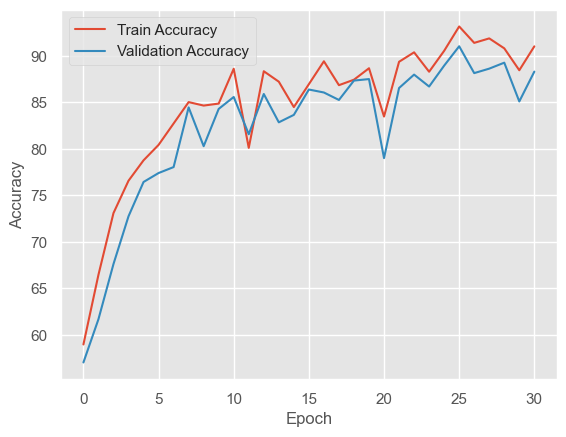

Best validation accuracy: 91.02564102564102
Accuracy: 0.9038461538461539
Confusion Matrix:
[[210  10   5]
 [ 19 170  14]
 [  2  10 184]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9038461538461539, 'Training Time (s)': 528.8562037944794}


  1%|▊                                                                                 | 1/100 [00:11<18:52, 11.44s/it]

Epoch 1/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  2%|█▋                                                                                | 2/100 [00:25<20:43, 12.69s/it]

Epoch 2/100, Train Acc: 49.67914438502674, Val Acc: 52.243589743589745


  3%|██▍                                                                               | 3/100 [00:38<21:07, 13.06s/it]

Epoch 3/100, Train Acc: 49.62566844919786, Val Acc: 52.243589743589745


  4%|███▎                                                                              | 4/100 [00:51<20:55, 13.08s/it]

Epoch 4/100, Train Acc: 49.893048128342244, Val Acc: 52.56410256410256


  5%|████                                                                              | 5/100 [01:02<19:43, 12.46s/it]

Epoch 5/100, Train Acc: 49.94652406417112, Val Acc: 52.56410256410256


  6%|████▉                                                                             | 6/100 [01:14<18:51, 12.03s/it]

Epoch 6/100, Train Acc: 50.106951871657756, Val Acc: 52.72435897435897


  7%|█████▋                                                                            | 7/100 [01:27<19:30, 12.58s/it]

Epoch 7/100, Train Acc: 50.32085561497326, Val Acc: 53.044871794871796


  8%|██████▌                                                                           | 8/100 [01:39<18:39, 12.17s/it]

Epoch 8/100, Train Acc: 50.855614973262036, Val Acc: 53.84615384615385


  9%|███████▍                                                                          | 9/100 [01:53<19:19, 12.74s/it]

Epoch 9/100, Train Acc: 51.283422459893046, Val Acc: 54.6474358974359


 10%|████████                                                                         | 10/100 [02:08<20:12, 13.47s/it]

Epoch 10/100, Train Acc: 51.49732620320856, Val Acc: 54.6474358974359


 11%|████████▉                                                                        | 11/100 [02:24<21:12, 14.29s/it]

Epoch 11/100, Train Acc: 52.13903743315508, Val Acc: 54.80769230769231


 12%|█████████▋                                                                       | 12/100 [02:38<20:39, 14.08s/it]

Epoch 12/100, Train Acc: 52.45989304812834, Val Acc: 55.60897435897436


 13%|██████████▌                                                                      | 13/100 [02:49<19:14, 13.27s/it]

Epoch 13/100, Train Acc: 53.20855614973262, Val Acc: 56.41025641025641


 14%|███████████▎                                                                     | 14/100 [03:02<18:52, 13.16s/it]

Epoch 14/100, Train Acc: 54.17112299465241, Val Acc: 57.37179487179487


 15%|████████████▏                                                                    | 15/100 [03:12<17:33, 12.40s/it]

Epoch 15/100, Train Acc: 54.38502673796791, Val Acc: 57.69230769230769


 16%|████████████▉                                                                    | 16/100 [03:26<17:38, 12.61s/it]

Epoch 16/100, Train Acc: 55.3475935828877, Val Acc: 57.37179487179487


 17%|█████████████▊                                                                   | 17/100 [03:43<19:15, 13.92s/it]

Epoch 17/100, Train Acc: 55.45454545454545, Val Acc: 58.01282051282051


 18%|██████████████▌                                                                  | 18/100 [03:56<18:55, 13.85s/it]

Epoch 18/100, Train Acc: 56.524064171122994, Val Acc: 58.493589743589745


 19%|███████████████▍                                                                 | 19/100 [04:12<19:19, 14.32s/it]

Epoch 19/100, Train Acc: 57.32620320855615, Val Acc: 58.81410256410256


 20%|████████████████▏                                                                | 20/100 [04:23<17:53, 13.41s/it]

Epoch 20/100, Train Acc: 58.663101604278076, Val Acc: 59.294871794871796


 21%|█████████████████                                                                | 21/100 [04:36<17:38, 13.40s/it]

Epoch 21/100, Train Acc: 59.144385026737964, Val Acc: 60.73717948717949


 22%|█████████████████▊                                                               | 22/100 [04:47<16:22, 12.59s/it]

Epoch 22/100, Train Acc: 61.55080213903744, Val Acc: 61.05769230769231


 23%|██████████████████▋                                                              | 23/100 [05:00<16:22, 12.76s/it]

Epoch 23/100, Train Acc: 63.850267379679146, Val Acc: 63.62179487179487


 24%|███████████████████▍                                                             | 24/100 [05:11<15:29, 12.22s/it]

Epoch 24/100, Train Acc: 64.22459893048128, Val Acc: 62.01923076923077


 25%|████████████████████▎                                                            | 25/100 [05:22<14:55, 11.94s/it]

Epoch 25/100, Train Acc: 64.11764705882354, Val Acc: 63.30128205128205


 26%|█████████████████████                                                            | 26/100 [05:33<14:04, 11.42s/it]

Epoch 26/100, Train Acc: 66.36363636363636, Val Acc: 64.1025641025641


 27%|█████████████████████▊                                                           | 27/100 [05:46<14:35, 11.99s/it]

Epoch 27/100, Train Acc: 66.36363636363636, Val Acc: 64.90384615384616


 28%|██████████████████████▋                                                          | 28/100 [05:56<13:48, 11.51s/it]

Epoch 28/100, Train Acc: 66.47058823529412, Val Acc: 64.1025641025641


 29%|███████████████████████▍                                                         | 29/100 [06:08<13:35, 11.49s/it]

Epoch 29/100, Train Acc: 68.98395721925134, Val Acc: 67.1474358974359


 30%|████████████████████████▎                                                        | 30/100 [06:20<13:41, 11.74s/it]

Epoch 30/100, Train Acc: 70.05347593582887, Val Acc: 68.42948717948718


 31%|█████████████████████████                                                        | 31/100 [06:29<12:41, 11.03s/it]

Epoch 31/100, Train Acc: 69.62566844919786, Val Acc: 67.94871794871794


 32%|█████████████████████████▉                                                       | 32/100 [06:40<12:10, 10.75s/it]

Epoch 32/100, Train Acc: 71.60427807486631, Val Acc: 70.99358974358974


 33%|██████████████████████████▋                                                      | 33/100 [06:52<12:31, 11.21s/it]

Epoch 33/100, Train Acc: 66.36363636363636, Val Acc: 66.50641025641026


 34%|███████████████████████████▌                                                     | 34/100 [07:05<13:01, 11.84s/it]

Epoch 34/100, Train Acc: 72.62032085561498, Val Acc: 70.51282051282051


 35%|████████████████████████████▎                                                    | 35/100 [07:17<12:55, 11.93s/it]

Epoch 35/100, Train Acc: 72.51336898395722, Val Acc: 69.39102564102564


 36%|█████████████████████████████▏                                                   | 36/100 [07:29<12:41, 11.89s/it]

Epoch 36/100, Train Acc: 66.57754010695187, Val Acc: 67.1474358974359


 36%|█████████████████████████████▏                                                   | 36/100 [07:42<13:42, 12.85s/it]

Epoch 37/100, Train Acc: 73.475935828877, Val Acc: 69.87179487179488
Early stopping triggered at epoch 37


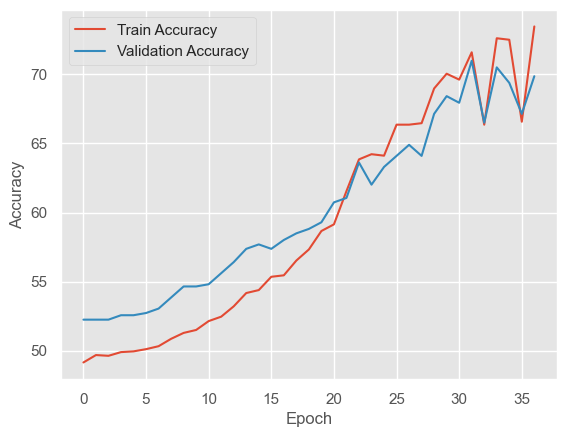

Best validation accuracy: 70.99358974358974
Accuracy: 0.6794871794871795
Confusion Matrix:
[[268  47]
 [153 156]]


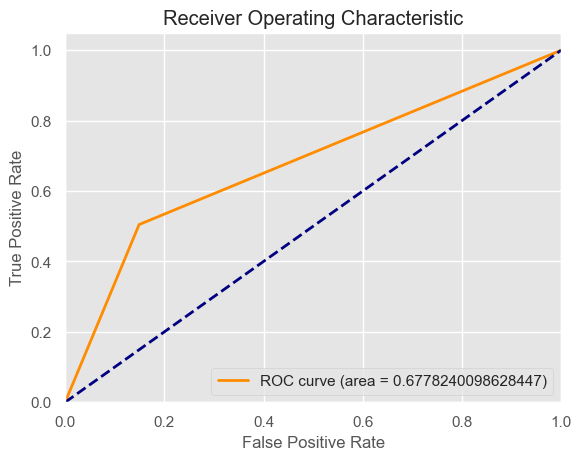

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6794871794871795, 'Training Time (s)': 462.86230206489563}


  1%|▊                                                                                 | 1/100 [00:26<42:59, 26.05s/it]

Epoch 1/100, Train Acc: 89.46524064171123, Val Acc: 89.26282051282051


  2%|█▋                                                                                | 2/100 [00:52<42:50, 26.23s/it]

Epoch 2/100, Train Acc: 92.62032085561498, Val Acc: 92.46794871794872


  3%|██▍                                                                               | 3/100 [01:18<42:20, 26.19s/it]

Epoch 3/100, Train Acc: 93.31550802139037, Val Acc: 93.75


  4%|███▎                                                                              | 4/100 [01:46<42:54, 26.82s/it]

Epoch 4/100, Train Acc: 93.9572192513369, Val Acc: 93.91025641025641


  5%|████                                                                              | 5/100 [02:12<42:09, 26.63s/it]

Epoch 5/100, Train Acc: 94.1711229946524, Val Acc: 94.71153846153847


  6%|████▉                                                                             | 6/100 [02:40<42:22, 27.04s/it]

Epoch 6/100, Train Acc: 94.43850267379679, Val Acc: 94.39102564102564


  7%|█████▋                                                                            | 7/100 [03:08<42:14, 27.26s/it]

Epoch 7/100, Train Acc: 95.02673796791444, Val Acc: 94.71153846153847


  8%|██████▌                                                                           | 8/100 [03:37<43:00, 28.04s/it]

Epoch 8/100, Train Acc: 94.91978609625669, Val Acc: 94.55128205128206


  9%|███████▍                                                                          | 9/100 [04:05<42:17, 27.89s/it]

Epoch 9/100, Train Acc: 95.29411764705883, Val Acc: 94.71153846153847


 10%|████████                                                                         | 10/100 [04:32<41:21, 27.57s/it]

Epoch 10/100, Train Acc: 95.61497326203208, Val Acc: 94.71153846153847


 11%|████████▉                                                                        | 11/100 [05:00<41:04, 27.69s/it]

Epoch 11/100, Train Acc: 95.45454545454545, Val Acc: 95.67307692307692


 12%|█████████▋                                                                       | 12/100 [05:27<40:24, 27.55s/it]

Epoch 12/100, Train Acc: 95.77540106951872, Val Acc: 95.1923076923077


 13%|██████████▌                                                                      | 13/100 [05:54<39:36, 27.32s/it]

Epoch 13/100, Train Acc: 95.93582887700535, Val Acc: 95.1923076923077


 14%|███████████▎                                                                     | 14/100 [06:21<39:00, 27.22s/it]

Epoch 14/100, Train Acc: 95.77540106951872, Val Acc: 95.3525641025641


 15%|████████████▏                                                                    | 15/100 [06:47<38:01, 26.84s/it]

Epoch 15/100, Train Acc: 96.0427807486631, Val Acc: 95.67307692307692


 16%|████████████▉                                                                    | 16/100 [07:12<37:03, 26.47s/it]

Epoch 16/100, Train Acc: 96.0427807486631, Val Acc: 95.51282051282051


 17%|█████████████▊                                                                   | 17/100 [07:38<36:19, 26.26s/it]

Epoch 17/100, Train Acc: 96.31016042780749, Val Acc: 95.3525641025641


 18%|██████████████▌                                                                  | 18/100 [08:04<35:40, 26.10s/it]

Epoch 18/100, Train Acc: 96.2566844919786, Val Acc: 95.51282051282051


 19%|███████████████▍                                                                 | 19/100 [08:30<35:04, 25.99s/it]

Epoch 19/100, Train Acc: 96.36363636363636, Val Acc: 95.51282051282051


 20%|████████████████▏                                                                | 20/100 [08:58<35:31, 26.64s/it]

Epoch 20/100, Train Acc: 96.41711229946524, Val Acc: 95.51282051282051


 21%|█████████████████                                                                | 21/100 [09:24<35:00, 26.59s/it]

Epoch 21/100, Train Acc: 96.36363636363636, Val Acc: 95.67307692307692


 22%|█████████████████▊                                                               | 22/100 [09:50<34:23, 26.46s/it]

Epoch 22/100, Train Acc: 96.57754010695187, Val Acc: 95.83333333333333


 23%|██████████████████▋                                                              | 23/100 [10:16<33:46, 26.32s/it]

Epoch 23/100, Train Acc: 96.84491978609626, Val Acc: 95.83333333333333


 24%|███████████████████▍                                                             | 24/100 [10:42<33:11, 26.20s/it]

Epoch 24/100, Train Acc: 96.47058823529412, Val Acc: 95.51282051282051


 25%|████████████████████▎                                                            | 25/100 [11:08<32:39, 26.12s/it]

Epoch 25/100, Train Acc: 96.79144385026738, Val Acc: 95.83333333333333


 26%|█████████████████████                                                            | 26/100 [11:34<32:11, 26.10s/it]

Epoch 26/100, Train Acc: 96.79144385026738, Val Acc: 95.83333333333333


 27%|█████████████████████▊                                                           | 27/100 [12:00<31:41, 26.05s/it]

Epoch 27/100, Train Acc: 96.7379679144385, Val Acc: 95.99358974358974


 28%|██████████████████████▋                                                          | 28/100 [12:26<31:08, 25.95s/it]

Epoch 28/100, Train Acc: 96.89839572192513, Val Acc: 95.99358974358974


 29%|███████████████████████▍                                                         | 29/100 [12:52<30:41, 25.94s/it]

Epoch 29/100, Train Acc: 96.89839572192513, Val Acc: 96.31410256410257


 30%|████████████████████████▎                                                        | 30/100 [13:18<30:15, 25.93s/it]

Epoch 30/100, Train Acc: 96.95187165775401, Val Acc: 95.83333333333333


 31%|█████████████████████████                                                        | 31/100 [13:44<29:51, 25.97s/it]

Epoch 31/100, Train Acc: 97.16577540106952, Val Acc: 95.99358974358974


 32%|█████████████████████████▉                                                       | 32/100 [14:10<29:26, 25.98s/it]

Epoch 32/100, Train Acc: 97.16577540106952, Val Acc: 95.99358974358974


 33%|██████████████████████████▋                                                      | 33/100 [14:36<29:00, 25.97s/it]

Epoch 33/100, Train Acc: 96.79144385026738, Val Acc: 95.67307692307692


 33%|██████████████████████████▋                                                      | 33/100 [15:02<30:32, 27.34s/it]

Epoch 34/100, Train Acc: 97.11229946524064, Val Acc: 95.83333333333333
Early stopping triggered at epoch 34


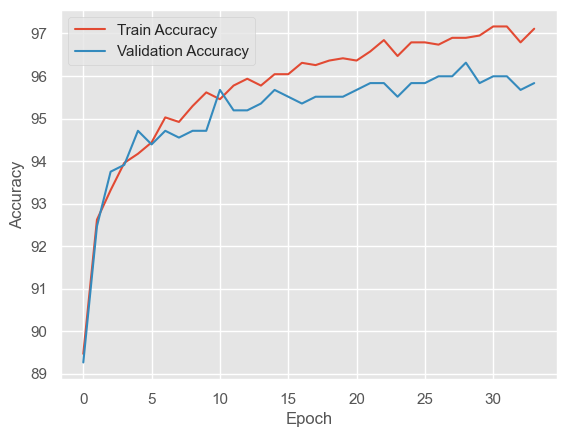

Best validation accuracy: 96.31410256410257
Accuracy: 0.9631410256410257
Confusion Matrix:
[[219   5   1]
 [  5 193   5]
 [  3   4 189]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9631410256410257, 'Training Time (s)': 903.0964922904968}


  1%|▊                                                                                 | 1/100 [00:31<52:04, 31.56s/it]

Epoch 1/100, Train Acc: 48.663101604278076, Val Acc: 51.12179487179487


  2%|█▋                                                                                | 2/100 [01:08<56:36, 34.65s/it]

Epoch 2/100, Train Acc: 49.3048128342246, Val Acc: 49.83974358974359


  3%|██▍                                                                               | 3/100 [01:46<58:16, 36.05s/it]

Epoch 3/100, Train Acc: 50.213903743315505, Val Acc: 52.40384615384615


  4%|███▎                                                                              | 4/100 [02:20<56:50, 35.53s/it]

Epoch 4/100, Train Acc: 50.588235294117645, Val Acc: 51.76282051282051


  5%|████                                                                              | 5/100 [02:55<55:42, 35.19s/it]

Epoch 5/100, Train Acc: 37.80748663101604, Val Acc: 40.705128205128204


  6%|████▉                                                                             | 6/100 [03:36<58:22, 37.26s/it]

Epoch 6/100, Train Acc: 42.29946524064171, Val Acc: 44.23076923076923


  7%|█████▋                                                                            | 7/100 [04:17<59:46, 38.56s/it]

Epoch 7/100, Train Acc: 45.668449197860966, Val Acc: 48.87820512820513


  8%|██████▍                                                                         | 8/100 [04:59<1:00:26, 39.42s/it]

Epoch 8/100, Train Acc: 42.032085561497325, Val Acc: 43.75


  9%|███████▏                                                                        | 9/100 [05:40<1:00:36, 39.96s/it]

Epoch 9/100, Train Acc: 44.86631016042781, Val Acc: 47.11538461538461


 10%|███████▉                                                                       | 10/100 [06:21<1:00:27, 40.31s/it]

Epoch 10/100, Train Acc: 43.20855614973262, Val Acc: 46.31410256410256


 11%|████████▋                                                                      | 11/100 [07:02<1:00:08, 40.54s/it]

Epoch 11/100, Train Acc: 45.026737967914436, Val Acc: 45.993589743589745


 12%|█████████▋                                                                       | 12/100 [07:43<59:48, 40.78s/it]

Epoch 12/100, Train Acc: 43.2620320855615, Val Acc: 44.39102564102564


 13%|██████████▌                                                                      | 13/100 [08:25<59:22, 40.95s/it]

Epoch 13/100, Train Acc: 41.55080213903744, Val Acc: 43.91025641025641


 14%|███████████▎                                                                     | 14/100 [09:06<58:46, 41.00s/it]

Epoch 14/100, Train Acc: 37.86096256684492, Val Acc: 39.42307692307692


 15%|████████████▏                                                                    | 15/100 [09:47<58:19, 41.17s/it]

Epoch 15/100, Train Acc: 45.294117647058826, Val Acc: 46.15384615384615


 16%|████████████▉                                                                    | 16/100 [10:28<57:35, 41.14s/it]

Epoch 16/100, Train Acc: 37.32620320855615, Val Acc: 38.62179487179487


 17%|█████████████▊                                                                   | 17/100 [11:10<57:00, 41.21s/it]

Epoch 17/100, Train Acc: 38.6096256684492, Val Acc: 41.666666666666664


 18%|██████████████▌                                                                  | 18/100 [11:51<56:17, 41.19s/it]

Epoch 18/100, Train Acc: 36.31016042780749, Val Acc: 37.17948717948718


 19%|███████████████▍                                                                 | 19/100 [12:32<55:42, 41.27s/it]

Epoch 19/100, Train Acc: 43.68983957219251, Val Acc: 42.1474358974359


 20%|████████████████▏                                                                | 20/100 [13:13<54:56, 41.20s/it]

Epoch 20/100, Train Acc: 40.37433155080214, Val Acc: 41.82692307692308


 21%|█████████████████                                                                | 21/100 [13:54<54:12, 41.17s/it]

Epoch 21/100, Train Acc: 34.973262032085564, Val Acc: 36.217948717948715


 22%|█████████████████▊                                                               | 22/100 [14:36<53:33, 41.19s/it]

Epoch 22/100, Train Acc: 38.716577540106954, Val Acc: 40.544871794871796


 23%|██████████████████▋                                                              | 23/100 [15:17<52:52, 41.20s/it]

Epoch 23/100, Train Acc: 40.106951871657756, Val Acc: 39.90384615384615


 24%|███████████████████▍                                                             | 24/100 [15:58<52:10, 41.20s/it]

Epoch 24/100, Train Acc: 40.42780748663102, Val Acc: 41.506410256410255


 25%|████████████████████▎                                                            | 25/100 [16:39<51:30, 41.20s/it]

Epoch 25/100, Train Acc: 38.02139037433155, Val Acc: 38.62179487179487


 26%|█████████████████████                                                            | 26/100 [17:20<50:46, 41.17s/it]

Epoch 26/100, Train Acc: 39.57219251336898, Val Acc: 38.94230769230769


 26%|█████████████████████                                                            | 26/100 [18:02<51:20, 41.63s/it]

Epoch 27/100, Train Acc: 40.213903743315505, Val Acc: 39.583333333333336
Early stopping triggered at epoch 27


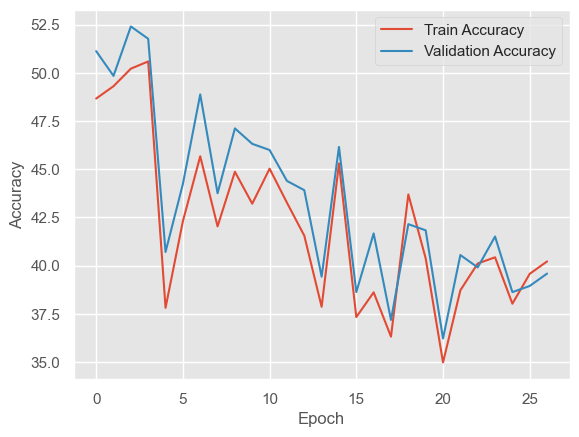

Best validation accuracy: 52.40384615384615
Accuracy: 0.5144230769230769
Confusion Matrix:
[[  0   0   0   0]
 [  0   0   0   0]
 [  1  51 226  37]
 [  0   3 211  95]]


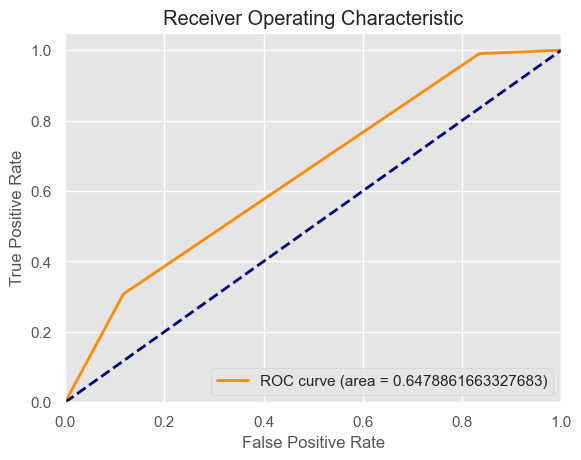

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5144230769230769, 'Training Time (s)': 1083.4035515785217}


  1%|▊                                                                                 | 1/100 [00:13<22:44, 13.79s/it]

Epoch 1/100, Train Acc: 74.06417112299465, Val Acc: 73.87820512820512


  2%|█▋                                                                                | 2/100 [00:27<22:12, 13.59s/it]

Epoch 2/100, Train Acc: 90.6951871657754, Val Acc: 90.7051282051282


  3%|██▍                                                                               | 3/100 [00:40<21:50, 13.51s/it]

Epoch 3/100, Train Acc: 92.72727272727273, Val Acc: 92.46794871794872


  4%|███▎                                                                              | 4/100 [00:54<21:34, 13.49s/it]

Epoch 4/100, Train Acc: 93.79679144385027, Val Acc: 93.26923076923077


  5%|████                                                                              | 5/100 [01:07<21:13, 13.41s/it]

Epoch 5/100, Train Acc: 94.43850267379679, Val Acc: 93.91025641025641


  6%|████▉                                                                             | 6/100 [01:21<21:09, 13.51s/it]

Epoch 6/100, Train Acc: 94.75935828877006, Val Acc: 94.55128205128206


  7%|█████▋                                                                            | 7/100 [01:34<20:57, 13.53s/it]

Epoch 7/100, Train Acc: 94.8663101604278, Val Acc: 94.87179487179488


  8%|██████▌                                                                           | 8/100 [01:47<20:37, 13.46s/it]

Epoch 8/100, Train Acc: 95.18716577540107, Val Acc: 95.3525641025641


  9%|███████▍                                                                          | 9/100 [02:01<20:17, 13.38s/it]

Epoch 9/100, Train Acc: 95.3475935828877, Val Acc: 95.67307692307692


 10%|████████                                                                         | 10/100 [02:14<20:00, 13.34s/it]

Epoch 10/100, Train Acc: 95.50802139037434, Val Acc: 95.3525641025641


 11%|████████▉                                                                        | 11/100 [02:27<19:53, 13.41s/it]

Epoch 11/100, Train Acc: 95.61497326203208, Val Acc: 95.3525641025641


 12%|█████████▋                                                                       | 12/100 [02:41<19:33, 13.34s/it]

Epoch 12/100, Train Acc: 95.77540106951872, Val Acc: 95.3525641025641


 13%|██████████▌                                                                      | 13/100 [02:54<19:25, 13.40s/it]

Epoch 13/100, Train Acc: 96.14973262032086, Val Acc: 95.3525641025641


 14%|███████████▎                                                                     | 14/100 [03:07<19:04, 13.31s/it]

Epoch 14/100, Train Acc: 96.2566844919786, Val Acc: 95.51282051282051


 15%|████████████▏                                                                    | 15/100 [03:20<18:48, 13.27s/it]

Epoch 15/100, Train Acc: 96.41711229946524, Val Acc: 95.3525641025641


 16%|████████████▉                                                                    | 16/100 [03:34<18:35, 13.29s/it]

Epoch 16/100, Train Acc: 96.47058823529412, Val Acc: 95.1923076923077


 17%|█████████████▊                                                                   | 17/100 [03:47<18:14, 13.19s/it]

Epoch 17/100, Train Acc: 96.57754010695187, Val Acc: 95.1923076923077


 18%|██████████████▌                                                                  | 18/100 [04:00<18:03, 13.21s/it]

Epoch 18/100, Train Acc: 96.68449197860963, Val Acc: 95.1923076923077


 19%|███████████████▍                                                                 | 19/100 [04:13<17:45, 13.15s/it]

Epoch 19/100, Train Acc: 96.7379679144385, Val Acc: 95.03205128205128


 20%|████████████████▏                                                                | 20/100 [04:26<17:35, 13.19s/it]

Epoch 20/100, Train Acc: 96.95187165775401, Val Acc: 95.03205128205128


 21%|█████████████████                                                                | 21/100 [04:40<17:28, 13.27s/it]

Epoch 21/100, Train Acc: 96.95187165775401, Val Acc: 95.03205128205128


 22%|█████████████████▊                                                               | 22/100 [04:53<17:11, 13.23s/it]

Epoch 22/100, Train Acc: 97.00534759358288, Val Acc: 95.03205128205128


 23%|██████████████████▋                                                              | 23/100 [05:06<16:58, 13.23s/it]

Epoch 23/100, Train Acc: 97.16577540106952, Val Acc: 95.03205128205128


 24%|███████████████████▍                                                             | 24/100 [05:19<16:48, 13.27s/it]

Epoch 24/100, Train Acc: 97.2192513368984, Val Acc: 95.03205128205128


 25%|████████████████████▎                                                            | 25/100 [05:33<16:31, 13.22s/it]

Epoch 25/100, Train Acc: 97.2192513368984, Val Acc: 95.03205128205128


 26%|█████████████████████                                                            | 26/100 [05:46<16:17, 13.21s/it]

Epoch 26/100, Train Acc: 97.27272727272727, Val Acc: 95.03205128205128


 26%|█████████████████████                                                            | 26/100 [05:59<17:02, 13.82s/it]

Epoch 27/100, Train Acc: 97.27272727272727, Val Acc: 95.03205128205128
Early stopping triggered at epoch 27


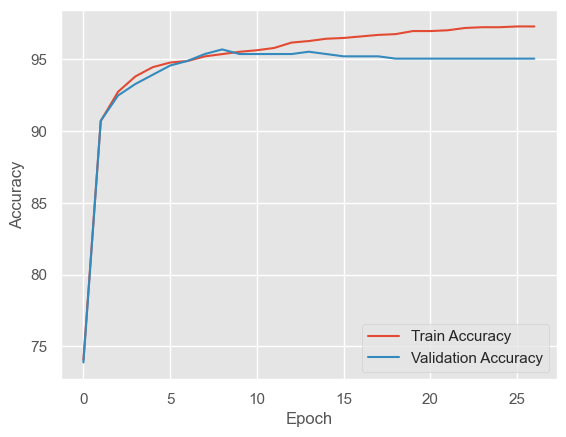

Best validation accuracy: 95.67307692307692
Accuracy: 0.9567307692307693
Confusion Matrix:
[[217   5   3]
 [  9 191   3]
 [  3   4 189]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9567307692307693, 'Training Time (s)': 359.7923176288605}


  1%|▊                                                                                 | 1/100 [00:13<22:29, 13.63s/it]

Epoch 1/100, Train Acc: 42.83422459893048, Val Acc: 46.31410256410256


  2%|█▋                                                                                | 2/100 [00:27<22:02, 13.49s/it]

Epoch 2/100, Train Acc: 44.38502673796791, Val Acc: 47.27564102564103


  3%|██▍                                                                               | 3/100 [00:40<21:42, 13.43s/it]

Epoch 3/100, Train Acc: 44.86631016042781, Val Acc: 44.55128205128205


  4%|███▎                                                                              | 4/100 [00:53<21:20, 13.34s/it]

Epoch 4/100, Train Acc: 44.919786096256686, Val Acc: 44.87179487179487


  5%|████                                                                              | 5/100 [01:06<21:07, 13.34s/it]

Epoch 5/100, Train Acc: 49.25133689839572, Val Acc: 46.794871794871796


  6%|████▉                                                                             | 6/100 [01:20<20:57, 13.38s/it]

Epoch 6/100, Train Acc: 51.55080213903744, Val Acc: 47.916666666666664


  7%|█████▋                                                                            | 7/100 [01:33<20:43, 13.37s/it]

Epoch 7/100, Train Acc: 51.711229946524064, Val Acc: 48.717948717948715


  8%|██████▌                                                                           | 8/100 [01:46<20:24, 13.31s/it]

Epoch 8/100, Train Acc: 52.0855614973262, Val Acc: 48.3974358974359


  9%|███████▍                                                                          | 9/100 [02:00<20:05, 13.25s/it]

Epoch 9/100, Train Acc: 51.49732620320856, Val Acc: 47.59615384615385


 10%|████████                                                                         | 10/100 [02:13<19:53, 13.26s/it]

Epoch 10/100, Train Acc: 51.1764705882353, Val Acc: 47.43589743589744


 11%|████████▉                                                                        | 11/100 [02:26<19:38, 13.24s/it]

Epoch 11/100, Train Acc: 50.213903743315505, Val Acc: 46.955128205128204


 12%|█████████▋                                                                       | 12/100 [02:39<19:30, 13.30s/it]

Epoch 12/100, Train Acc: 49.09090909090909, Val Acc: 45.67307692307692


 13%|██████████▌                                                                      | 13/100 [02:53<19:15, 13.28s/it]

Epoch 13/100, Train Acc: 48.50267379679144, Val Acc: 44.07051282051282


 14%|███████████▎                                                                     | 14/100 [03:06<19:02, 13.29s/it]

Epoch 14/100, Train Acc: 47.48663101604278, Val Acc: 43.91025641025641


 15%|████████████▏                                                                    | 15/100 [03:20<19:00, 13.42s/it]

Epoch 15/100, Train Acc: 47.11229946524064, Val Acc: 43.26923076923077


 16%|████████████▉                                                                    | 16/100 [03:33<18:39, 13.33s/it]

Epoch 16/100, Train Acc: 46.36363636363637, Val Acc: 42.78846153846154


 17%|█████████████▊                                                                   | 17/100 [03:46<18:27, 13.34s/it]

Epoch 17/100, Train Acc: 46.096256684491976, Val Acc: 41.98717948717949


 18%|██████████████▌                                                                  | 18/100 [04:00<18:14, 13.34s/it]

Epoch 18/100, Train Acc: 45.080213903743314, Val Acc: 41.18589743589744


 19%|███████████████▍                                                                 | 19/100 [04:13<18:00, 13.34s/it]

Epoch 19/100, Train Acc: 43.850267379679146, Val Acc: 41.34615384615385


 20%|████████████████▏                                                                | 20/100 [04:26<17:47, 13.34s/it]

Epoch 20/100, Train Acc: 43.68983957219251, Val Acc: 41.18589743589744


 21%|█████████████████                                                                | 21/100 [04:39<17:30, 13.30s/it]

Epoch 21/100, Train Acc: 42.67379679144385, Val Acc: 40.06410256410256


 22%|█████████████████▊                                                               | 22/100 [04:53<17:19, 13.32s/it]

Epoch 22/100, Train Acc: 41.76470588235294, Val Acc: 39.583333333333336


 23%|██████████████████▋                                                              | 23/100 [05:06<17:04, 13.31s/it]

Epoch 23/100, Train Acc: 41.55080213903744, Val Acc: 39.1025641025641


 24%|███████████████████▍                                                             | 24/100 [05:20<16:54, 13.35s/it]

Epoch 24/100, Train Acc: 41.49732620320856, Val Acc: 39.26282051282051


 25%|████████████████████▎                                                            | 25/100 [05:33<16:44, 13.39s/it]

Epoch 25/100, Train Acc: 41.22994652406417, Val Acc: 38.46153846153846


 26%|█████████████████████                                                            | 26/100 [05:46<16:25, 13.32s/it]

Epoch 26/100, Train Acc: 40.74866310160428, Val Acc: 38.14102564102564


 26%|█████████████████████                                                            | 26/100 [06:00<17:04, 13.85s/it]

Epoch 27/100, Train Acc: 40.26737967914438, Val Acc: 38.30128205128205
Early stopping triggered at epoch 27


Best validation accuracy: 48.717948717948715
Accuracy: 0.5160256410256411
Confusion Matrix:
[[  0   0   0   0]
 [  0   0   0   0]
 [  6  72 214  23]
 [  0  11 190 108]]


{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5160256410256411, 'Training Time (s)': 360.5318262577057}


In [ ]:
model_configs = list(itertools.product(
                                        models,
                                       [data_loaders[0]],
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )
df_models = train_configs(configurations=model_configs)


### 5.1.2 Display DataFrame of Experiment Results
This outputs the DataFrame `df_models` generated by the `train_configs` function, displaying the results of the experiment. The DataFrame summarizes key information and performance metrics for each model configuration trained during the experiment, facilitating comparison and analysis of the outcomes.

In [ ]:
df_models

Model Name      Task             Data Type  mixup Optimizer LR Scheduler  \
0  CustomCNN     label  No data augmentation  False       SGD     wihoutLR   
1  CustomCNN  realness  No data augmentation  False       SGD     wihoutLR   
2     resnet     label  No data augmentation  False       SGD     wihoutLR   
3     resnet  realness  No data augmentation  False       SGD     wihoutLR   
4  mobilenet     label  No data augmentation  False       SGD     wihoutLR   
5  mobilenet  realness  No data augmentation  False       SGD     wihoutLR   

   Accuracy  Training Time (s)  
0  0.903846         528.856204  
1  0.679487         462.862302  
2  0.963141         903.096492  
3  0.514423        1083.403552  
4  0.956731         359.792318  
5  0.516026         360.531826

In [ ]:
df_models['early stopping epoch'] = [31, 37, 34, 27, 27, 27]
df_models.drop(['mixup', 'Optimizer', 'Data Type','LR Scheduler' ], axis=1)

Model Name      Task  Accuracy  Training Time (s)  early stopping epoch
0  CustomCNN     label  0.903846         528.856204                    31
1  CustomCNN  realness  0.679487         462.862302                    37
2     resnet     label  0.963141         903.096492                    34
3     resnet  realness  0.514423        1083.403552                    27
4  mobilenet     label  0.956731         359.792318                    27
5  mobilenet  realness  0.516026         360.531826                    27

In [ ]:
df_models.to_csv('df_models.csv', index=False)


### 5.1.3 Analyze the results

To analyze the results effectively and understand the impact of transfer learning on different tasks, let's first explain the concept of transfer learning and then delve into the performance of the CustomCNN, ResNet, and MobileNet models on the label and realness classification tasks.

##### Transfer Learning Overview

Transfer learning is a machine learning method where a model developed for one task is reused as the starting point for a model on a second task. It's particularly popular in deep learning where substantial datasets and long training times are required to develop neural network models. The idea is to leverage the knowledge a model has learned from a large and general dataset, such as ImageNet, and apply it to a related but different task. This is often done by using a pre-trained model as a feature extractor and then fine-tuning some of its layers (usually the final ones) for the new task.

###### Benefits of Transfer Learning:
1. **Speeds up Training:** By starting with pre-trained weights, models require less time to train because they don't need to learn features from scratch.
2. **Requires Less Data:** Transfer learning can be particularly useful when the new task doesn't have a large dataset, as the pre-trained model brings knowledge that can compensate for the lack of data.
3. **Improves Performance:** Models often achieve higher accuracy, especially in tasks where the new dataset is similar to the original dataset the model was trained on.



##### Analysis of Results

###### Performance on Label Classification Task
- **CustomCNN:** Trained from scratch, it achieved decent accuracy for the label task. Its performance is commendable but falls short compared to the pre-trained models, likely due to the model having to learn all features from the beginning without the advantage of transfer learning.
- **ResNet:** Showed excellent performance on the label task. This high accuracy can be attributed to the extensive feature extraction capabilities developed through training on large, diverse datasets like ImageNet. These features are general enough to be effective for similar tasks such as photo label classification.
- **MobileNet:** Also performed very well on the label task, slightly lower than ResNet but still significantly high. MobileNet is designed for efficiency, and its success here indicates that it can retain high accuracy even when optimized for speed and size, benefiting from transfer learning.

###### Performance on Realness Classification Task
- **CustomCNN:** Achieved moderate accuracy. This task is fundamentally different from the typical image classification tasks these networks are usually trained on. The features required to differentiate real from AI-generated images might not be well-represented in the features learned from general datasets.
- **ResNet and MobileNet:** Both showed poor performance on the realness task compared to the label task. This drop in performance suggests that the features learned from ImageNet are not as effective for distinguishing between real and AI-generated images. It highlights a limitation of transfer learning - if the new task differs significantly from the original training data, the effectiveness of transferred features can be limited.

###### Transfer Learning's Effect

The significant difference in performance between the label and realness tasks can be explained by the nature of the features learned through transfer learning. For the label task, features such as textures, shapes, and edges relevant to identifying forests, mountains, or seas are well-represented in ImageNet. However, for the realness task, the subtle cues that distinguish real from AI-generated images, such as slight imperfections or patterns specific to generative models, are not aspects that typical pre-trained models are optimized to detect.

This discrepancy underscores the importance of task relevance in transfer learning. While transfer learning offers substantial benefits in terms of training efficiency and model performance, its effectiveness is contingent on the similarity between the pre-training tasks and the new task. For tasks that diverge from standard classification problems, such as realness detection, additional strategies like further fine-tuning, domain-specific pre-training, or even custom model development might be necessary to achieve optimal performance.

##### Conclusion
- **Using Pre-trained Networks:** ResNet and MobileNet showed superior performance in the label classification task, highlighting the advantage of leveraging pre-trained networks for feature extraction in complex visual tasks. However, their effectiveness was much less pronounced in the realness classification task, suggesting that the specific features learned from pre-trained models may not always align with the requirements of every task.
- **CustomCNN Efficiency:** The CustomCNN, while slightly less accurate in the label task, provided a balanced solution with respectable accuracies in both tasks and more efficient training times. This suggests that for certain tasks, especially those not directly aligned with the features learned by pre-trained models, a well-designed custom model can be more effective.
- **Task Complexity:** The significant difference in performance between the label and realness tasks across all models suggests that predicting the realness of a photo is inherently more challenging, possibly due to subtler differences between real and AI-generated images that require more specific feature recognition capabilities.

This analysis indicates the importance of considering the nature of the task, the efficiency of training, and the potential need for customization when choosing between using a pre-trained network and developing a custom model.

## 5.2 Comparison of data augmentation

 comparing the effects of different data augmentation strategies on model performance.

### 5.2.1 Experiment Execution

This cell sets up and executes an experiment comparing model performances across various data augmentation configurations. It uses `itertools.product` to generate combinations of models, data loaders (with different augmentation settings), a single optimizer (`SGD`), and a learning rate scheduler (`withoutLR`). The configurations are then trained and evaluated, compiling the results into a DataFrame.


  1%|▊                                                                                 | 1/100 [00:16<27:54, 16.91s/it]

Epoch 1/100, Train Acc: 34.11764705882353, Val Acc: 36.53846153846154


  2%|█▋                                                                                | 2/100 [00:27<21:15, 13.01s/it]

Epoch 2/100, Train Acc: 68.77005347593582, Val Acc: 64.74358974358974


  3%|██▍                                                                               | 3/100 [00:36<18:09, 11.23s/it]

Epoch 3/100, Train Acc: 71.01604278074866, Val Acc: 66.98717948717949


  4%|███▎                                                                              | 4/100 [00:45<16:33, 10.35s/it]

Epoch 4/100, Train Acc: 76.0427807486631, Val Acc: 71.9551282051282


  5%|████                                                                              | 5/100 [00:53<15:16,  9.64s/it]

Epoch 5/100, Train Acc: 78.93048128342247, Val Acc: 74.51923076923077


  6%|████▉                                                                             | 6/100 [01:03<15:13,  9.72s/it]

Epoch 6/100, Train Acc: 80.85561497326204, Val Acc: 76.28205128205128


  7%|█████▋                                                                            | 7/100 [01:14<15:54, 10.27s/it]

Epoch 7/100, Train Acc: 82.24598930481284, Val Acc: 79.32692307692308


  8%|██████▌                                                                           | 8/100 [01:25<16:00, 10.44s/it]

Epoch 8/100, Train Acc: 84.70588235294117, Val Acc: 80.28846153846153


  9%|███████▍                                                                          | 9/100 [01:36<15:50, 10.44s/it]

Epoch 9/100, Train Acc: 85.29411764705883, Val Acc: 81.25


 10%|████████                                                                         | 10/100 [01:46<15:41, 10.46s/it]

Epoch 10/100, Train Acc: 83.7433155080214, Val Acc: 78.0448717948718


 11%|████████▉                                                                        | 11/100 [01:56<15:24, 10.39s/it]

Epoch 11/100, Train Acc: 87.48663101604278, Val Acc: 83.81410256410257


 12%|█████████▋                                                                       | 12/100 [02:07<15:06, 10.30s/it]

Epoch 12/100, Train Acc: 86.09625668449198, Val Acc: 83.01282051282051


 13%|██████████▌                                                                      | 13/100 [02:16<14:46, 10.19s/it]

Epoch 13/100, Train Acc: 87.96791443850267, Val Acc: 83.97435897435898


 14%|███████████▎                                                                     | 14/100 [02:31<16:32, 11.55s/it]

Epoch 14/100, Train Acc: 88.66310160427807, Val Acc: 84.61538461538461


 15%|████████████▏                                                                    | 15/100 [02:41<15:46, 11.14s/it]

Epoch 15/100, Train Acc: 89.62566844919786, Val Acc: 86.53846153846153


 16%|████████████▉                                                                    | 16/100 [02:51<15:05, 10.78s/it]

Epoch 16/100, Train Acc: 90.32085561497327, Val Acc: 85.8974358974359


 17%|█████████████▊                                                                   | 17/100 [03:06<16:32, 11.96s/it]

Epoch 17/100, Train Acc: 86.2566844919786, Val Acc: 84.61538461538461


 18%|██████████████▌                                                                  | 18/100 [03:16<15:40, 11.47s/it]

Epoch 18/100, Train Acc: 82.56684491978609, Val Acc: 80.28846153846153


 19%|███████████████▍                                                                 | 19/100 [03:27<15:00, 11.11s/it]

Epoch 19/100, Train Acc: 90.58823529411765, Val Acc: 86.85897435897436


 20%|████████████████▏                                                                | 20/100 [03:37<14:30, 10.89s/it]

Epoch 20/100, Train Acc: 86.63101604278074, Val Acc: 85.73717948717949


 21%|█████████████████                                                                | 21/100 [03:47<14:06, 10.71s/it]

Epoch 21/100, Train Acc: 90.64171122994652, Val Acc: 87.17948717948718


 22%|█████████████████▊                                                               | 22/100 [03:57<13:43, 10.56s/it]

Epoch 22/100, Train Acc: 90.96256684491979, Val Acc: 87.01923076923077


 23%|██████████████████▋                                                              | 23/100 [04:08<13:28, 10.50s/it]

Epoch 23/100, Train Acc: 91.97860962566845, Val Acc: 88.62179487179488


 24%|███████████████████▍                                                             | 24/100 [04:18<13:16, 10.49s/it]

Epoch 24/100, Train Acc: 92.62032085561498, Val Acc: 88.9423076923077


 25%|████████████████████▎                                                            | 25/100 [04:29<13:03, 10.45s/it]

Epoch 25/100, Train Acc: 90.26737967914438, Val Acc: 86.85897435897436


 26%|█████████████████████                                                            | 26/100 [04:39<12:52, 10.44s/it]

Epoch 26/100, Train Acc: 91.17647058823529, Val Acc: 88.9423076923077


 27%|█████████████████████▊                                                           | 27/100 [04:49<12:40, 10.41s/it]

Epoch 27/100, Train Acc: 91.81818181818181, Val Acc: 88.9423076923077


 28%|██████████████████████▋                                                          | 28/100 [05:00<12:27, 10.38s/it]

Epoch 28/100, Train Acc: 91.76470588235294, Val Acc: 88.9423076923077


 28%|██████████████████████▋                                                          | 28/100 [05:10<13:18, 11.10s/it]

Epoch 29/100, Train Acc: 92.56684491978609, Val Acc: 88.30128205128206
Early stopping triggered at epoch 29


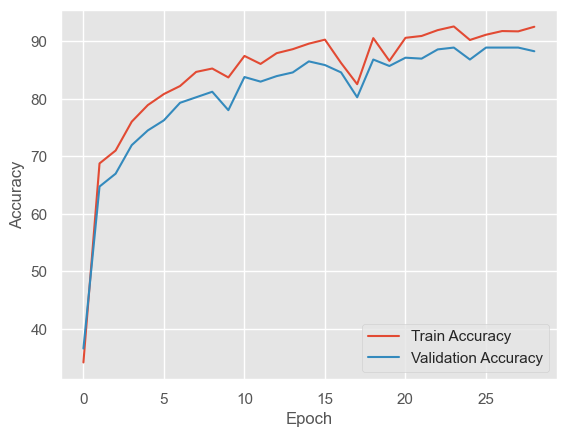

Best validation accuracy: 88.9423076923077
Accuracy: 0.9150641025641025
Confusion Matrix:
[[209   8   8]
 [ 12 177  14]
 [  1  10 185]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9150641025641025, 'Training Time (s)': 313.658983707428}


  1%|▊                                                                               | 1/100 [00:55<1:32:19, 55.95s/it]

Epoch 1/100, Train Acc: 87.70053475935829, Val Acc: 89.74358974358974


  2%|█▌                                                                              | 2/100 [02:00<1:39:13, 60.75s/it]

Epoch 2/100, Train Acc: 84.06417112299465, Val Acc: 86.37820512820512


  3%|██▍                                                                             | 3/100 [02:59<1:36:58, 59.98s/it]

Epoch 3/100, Train Acc: 86.63101604278074, Val Acc: 89.58333333333333


  4%|███▏                                                                            | 4/100 [04:01<1:37:19, 60.83s/it]

Epoch 4/100, Train Acc: 86.2566844919786, Val Acc: 87.66025641025641


  5%|████                                                                            | 5/100 [04:59<1:34:55, 59.96s/it]

Epoch 5/100, Train Acc: 84.06417112299465, Val Acc: 86.85897435897436


  6%|████▊                                                                           | 6/100 [05:57<1:32:33, 59.08s/it]

Epoch 6/100, Train Acc: 87.6470588235294, Val Acc: 88.78205128205128


  7%|█████▌                                                                          | 7/100 [06:55<1:31:16, 58.89s/it]

Epoch 7/100, Train Acc: 89.14438502673796, Val Acc: 88.9423076923077


  8%|██████▍                                                                         | 8/100 [07:54<1:30:09, 58.80s/it]

Epoch 8/100, Train Acc: 87.27272727272727, Val Acc: 88.9423076923077


  9%|███████▏                                                                        | 9/100 [08:54<1:29:52, 59.26s/it]

Epoch 9/100, Train Acc: 86.31016042780749, Val Acc: 87.66025641025641


 10%|███████▉                                                                       | 10/100 [09:49<1:26:44, 57.82s/it]

Epoch 10/100, Train Acc: 90.42780748663101, Val Acc: 89.42307692307692


 11%|████████▋                                                                      | 11/100 [10:35<1:20:28, 54.25s/it]

Epoch 11/100, Train Acc: 88.77005347593582, Val Acc: 90.22435897435898


 12%|█████████▍                                                                     | 12/100 [11:35<1:22:19, 56.13s/it]

Epoch 12/100, Train Acc: 88.1283422459893, Val Acc: 88.46153846153847


 13%|██████████▎                                                                    | 13/100 [12:30<1:20:44, 55.69s/it]

Epoch 13/100, Train Acc: 87.32620320855615, Val Acc: 88.14102564102564


 14%|███████████                                                                    | 14/100 [13:24<1:19:18, 55.33s/it]

Epoch 14/100, Train Acc: 89.5187165775401, Val Acc: 89.90384615384616


 15%|███████████▊                                                                   | 15/100 [14:19<1:17:58, 55.04s/it]

Epoch 15/100, Train Acc: 85.45454545454545, Val Acc: 84.13461538461539


 16%|████████████▋                                                                  | 16/100 [15:13<1:16:47, 54.85s/it]

Epoch 16/100, Train Acc: 87.54010695187166, Val Acc: 87.82051282051282


 17%|█████████████▍                                                                 | 17/100 [16:08<1:15:55, 54.88s/it]

Epoch 17/100, Train Acc: 87.70053475935829, Val Acc: 89.42307692307692


 18%|██████████████▏                                                                | 18/100 [17:03<1:14:54, 54.81s/it]

Epoch 18/100, Train Acc: 89.46524064171123, Val Acc: 90.5448717948718


 19%|███████████████                                                                | 19/100 [17:58<1:14:06, 54.89s/it]

Epoch 19/100, Train Acc: 89.5187165775401, Val Acc: 91.34615384615384


 20%|███████████████▊                                                               | 20/100 [18:52<1:12:59, 54.74s/it]

Epoch 20/100, Train Acc: 87.16577540106952, Val Acc: 87.5


 21%|████████████████▌                                                              | 21/100 [19:46<1:11:48, 54.53s/it]

Epoch 21/100, Train Acc: 85.1336898395722, Val Acc: 83.33333333333333


 22%|█████████████████▍                                                             | 22/100 [20:41<1:10:54, 54.55s/it]

Epoch 22/100, Train Acc: 89.57219251336899, Val Acc: 88.78205128205128


 23%|██████████████████▏                                                            | 23/100 [21:36<1:10:05, 54.62s/it]

Epoch 23/100, Train Acc: 90.26737967914438, Val Acc: 90.86538461538461


 24%|██████████████████▉                                                            | 24/100 [22:30<1:08:59, 54.47s/it]

Epoch 24/100, Train Acc: 91.17647058823529, Val Acc: 91.18589743589743


 25%|███████████████████▊                                                           | 25/100 [23:24<1:08:02, 54.43s/it]

Epoch 25/100, Train Acc: 89.62566844919786, Val Acc: 89.58333333333333


 26%|████████████████████▌                                                          | 26/100 [24:19<1:07:09, 54.45s/it]

Epoch 26/100, Train Acc: 88.44919786096257, Val Acc: 89.58333333333333


 26%|████████████████████▌                                                          | 26/100 [25:13<1:11:47, 58.21s/it]

Epoch 27/100, Train Acc: 84.97326203208556, Val Acc: 85.25641025641026
Early stopping triggered at epoch 27


Best validation accuracy: 91.34615384615384
Accuracy: 0.907051282051282
Confusion Matrix:
[[201  21   3]
 [ 11 186   6]
 [  2  15 179]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'Basic Natural Scene Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.907051282051282, 'Training Time (s)': 1514.0013988018036}


  1%|▊                                                                               | 1/100 [01:18<2:09:41, 78.60s/it]

Epoch 1/100, Train Acc: 79.0909090909091, Val Acc: 88.78205128205128


  2%|█▌                                                                              | 2/100 [02:36<2:07:48, 78.25s/it]

Epoch 2/100, Train Acc: 76.20320855614973, Val Acc: 79.32692307692308


  3%|██▍                                                                             | 3/100 [03:54<2:06:33, 78.29s/it]

Epoch 3/100, Train Acc: 82.62032085561498, Val Acc: 88.30128205128206


  4%|███▏                                                                            | 4/100 [05:13<2:05:20, 78.33s/it]

Epoch 4/100, Train Acc: 84.11764705882354, Val Acc: 89.74358974358974


  5%|████                                                                            | 5/100 [06:31<2:04:09, 78.42s/it]

Epoch 5/100, Train Acc: 85.18716577540107, Val Acc: 87.33974358974359


  6%|████▊                                                                           | 6/100 [07:50<2:02:56, 78.47s/it]

Epoch 6/100, Train Acc: 82.45989304812834, Val Acc: 87.98076923076923


  7%|█████▌                                                                          | 7/100 [09:08<2:01:37, 78.47s/it]

Epoch 7/100, Train Acc: 82.94117647058823, Val Acc: 89.1025641025641


  8%|██████▍                                                                         | 8/100 [10:27<2:00:07, 78.34s/it]

Epoch 8/100, Train Acc: 82.19251336898395, Val Acc: 86.85897435897436


  9%|███████▏                                                                        | 9/100 [11:45<1:58:47, 78.33s/it]

Epoch 9/100, Train Acc: 86.95187165775401, Val Acc: 90.7051282051282


 10%|███████▉                                                                       | 10/100 [13:03<1:57:38, 78.43s/it]

Epoch 10/100, Train Acc: 84.59893048128342, Val Acc: 88.14102564102564


 11%|████████▋                                                                      | 11/100 [14:22<1:56:10, 78.32s/it]

Epoch 11/100, Train Acc: 86.7379679144385, Val Acc: 89.58333333333333


 12%|█████████▍                                                                     | 12/100 [15:42<1:55:39, 78.85s/it]

Epoch 12/100, Train Acc: 82.45989304812834, Val Acc: 87.82051282051282


 13%|██████████▎                                                                    | 13/100 [17:09<1:58:12, 81.52s/it]

Epoch 13/100, Train Acc: 71.17647058823529, Val Acc: 83.17307692307692


 14%|███████████                                                                    | 14/100 [18:30<1:56:25, 81.22s/it]

Epoch 14/100, Train Acc: 84.54545454545455, Val Acc: 89.58333333333333


 15%|███████████▊                                                                   | 15/100 [19:48<1:53:48, 80.34s/it]

Epoch 15/100, Train Acc: 85.40106951871658, Val Acc: 89.1025641025641


 16%|████████████▋                                                                  | 16/100 [21:07<1:51:51, 79.89s/it]

Epoch 16/100, Train Acc: 87.54010695187166, Val Acc: 89.1025641025641


 17%|█████████████▍                                                                 | 17/100 [22:25<1:49:46, 79.36s/it]

Epoch 17/100, Train Acc: 82.56684491978609, Val Acc: 86.21794871794872


 18%|██████████████▏                                                                | 18/100 [23:43<1:48:00, 79.03s/it]

Epoch 18/100, Train Acc: 87.9144385026738, Val Acc: 87.5


 19%|███████████████                                                                | 19/100 [25:02<1:46:41, 79.03s/it]

Epoch 19/100, Train Acc: 83.90374331550802, Val Acc: 82.21153846153847


 20%|███████████████▊                                                               | 20/100 [26:20<1:44:59, 78.74s/it]

Epoch 20/100, Train Acc: 84.75935828877006, Val Acc: 84.93589743589743


 21%|████████████████▌                                                              | 21/100 [27:39<1:43:31, 78.63s/it]

Epoch 21/100, Train Acc: 84.91978609625669, Val Acc: 87.98076923076923


 22%|█████████████████▍                                                             | 22/100 [28:57<1:42:03, 78.50s/it]

Epoch 22/100, Train Acc: 87.27272727272727, Val Acc: 90.06410256410257


 23%|██████████████████▏                                                            | 23/100 [30:15<1:40:41, 78.47s/it]

Epoch 23/100, Train Acc: 86.524064171123, Val Acc: 89.26282051282051


 24%|██████████████████▉                                                            | 24/100 [31:34<1:39:25, 78.49s/it]

Epoch 24/100, Train Acc: 86.7379679144385, Val Acc: 90.06410256410257


 25%|███████████████████▊                                                           | 25/100 [32:52<1:38:00, 78.41s/it]

Epoch 25/100, Train Acc: 85.18716577540107, Val Acc: 89.1025641025641


 26%|████████████████████▌                                                          | 26/100 [34:10<1:36:36, 78.34s/it]

Epoch 26/100, Train Acc: 86.79144385026738, Val Acc: 88.9423076923077


 27%|█████████████████████▎                                                         | 27/100 [35:29<1:35:16, 78.31s/it]

Epoch 27/100, Train Acc: 88.23529411764706, Val Acc: 90.86538461538461


 28%|██████████████████████                                                         | 28/100 [36:47<1:34:11, 78.49s/it]

Epoch 28/100, Train Acc: 87.54010695187166, Val Acc: 90.38461538461539


 29%|██████████████████████▉                                                        | 29/100 [38:06<1:33:00, 78.60s/it]

Epoch 29/100, Train Acc: 85.88235294117646, Val Acc: 90.5448717948718


 30%|███████████████████████▋                                                       | 30/100 [39:25<1:31:35, 78.51s/it]

Epoch 30/100, Train Acc: 86.14973262032086, Val Acc: 89.1025641025641


 31%|████████████████████████▍                                                      | 31/100 [40:43<1:30:11, 78.42s/it]

Epoch 31/100, Train Acc: 87.43315508021391, Val Acc: 91.34615384615384


 32%|█████████████████████████▎                                                     | 32/100 [42:01<1:28:45, 78.32s/it]

Epoch 32/100, Train Acc: 84.81283422459893, Val Acc: 87.66025641025641


 33%|██████████████████████████                                                     | 33/100 [43:19<1:27:23, 78.26s/it]

Epoch 33/100, Train Acc: 86.95187165775401, Val Acc: 91.02564102564102


 34%|██████████████████████████▊                                                    | 34/100 [44:37<1:26:06, 78.28s/it]

Epoch 34/100, Train Acc: 86.20320855614973, Val Acc: 90.06410256410257


 35%|███████████████████████████▋                                                   | 35/100 [45:56<1:24:50, 78.32s/it]

Epoch 35/100, Train Acc: 83.68983957219251, Val Acc: 88.62179487179488


 35%|███████████████████████████▋                                                   | 35/100 [47:14<1:27:44, 81.00s/it]

Epoch 36/100, Train Acc: 85.08021390374331, Val Acc: 88.9423076923077
Early stopping triggered at epoch 36


Best validation accuracy: 91.34615384615384
Accuracy: 0.9198717948717948
Confusion Matrix:
[[207   8  10]
 [ 11 178  14]
 [  1   6 189]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'Advanced Realism Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9198717948717948, 'Training Time (s)': 2835.33398604393}


  1%|▊                                                                               | 1/100 [01:17<2:07:47, 77.45s/it]

Epoch 1/100, Train Acc: 79.41176470588235, Val Acc: 88.78205128205128


  2%|█▌                                                                              | 2/100 [02:34<2:06:11, 77.26s/it]

Epoch 2/100, Train Acc: 77.9144385026738, Val Acc: 82.21153846153847


  3%|██▍                                                                             | 3/100 [03:51<2:04:44, 77.16s/it]

Epoch 3/100, Train Acc: 73.63636363636364, Val Acc: 86.0576923076923


  4%|███▏                                                                            | 4/100 [05:09<2:03:54, 77.44s/it]

Epoch 4/100, Train Acc: 73.58288770053476, Val Acc: 83.81410256410257


  5%|████                                                                            | 5/100 [06:26<2:02:14, 77.20s/it]

Epoch 5/100, Train Acc: 73.20855614973262, Val Acc: 86.0576923076923


  6%|████▊                                                                           | 6/100 [07:43<2:00:43, 77.06s/it]

Epoch 6/100, Train Acc: 80.64171122994652, Val Acc: 86.0576923076923


  7%|█████▌                                                                          | 7/100 [09:00<1:59:41, 77.22s/it]

Epoch 7/100, Train Acc: 80.9090909090909, Val Acc: 90.06410256410257


  8%|██████▍                                                                         | 8/100 [10:17<1:58:28, 77.27s/it]

Epoch 8/100, Train Acc: 79.5187165775401, Val Acc: 87.01923076923077


  9%|███████▏                                                                        | 9/100 [11:35<1:57:15, 77.31s/it]

Epoch 9/100, Train Acc: 81.28342245989305, Val Acc: 88.62179487179488


 10%|███████▉                                                                       | 10/100 [12:52<1:55:45, 77.17s/it]

Epoch 10/100, Train Acc: 82.29946524064171, Val Acc: 87.82051282051282


 11%|████████▋                                                                      | 11/100 [14:09<1:54:23, 77.12s/it]

Epoch 11/100, Train Acc: 81.49732620320856, Val Acc: 90.06410256410257


 12%|█████████▍                                                                     | 12/100 [15:25<1:52:56, 77.01s/it]

Epoch 12/100, Train Acc: 72.45989304812834, Val Acc: 81.89102564102564


 13%|██████████▎                                                                    | 13/100 [16:42<1:51:30, 76.90s/it]

Epoch 13/100, Train Acc: 79.35828877005348, Val Acc: 85.8974358974359


 14%|███████████                                                                    | 14/100 [17:59<1:50:04, 76.80s/it]

Epoch 14/100, Train Acc: 78.18181818181819, Val Acc: 86.21794871794872


 15%|███████████▊                                                                   | 15/100 [19:15<1:48:42, 76.73s/it]

Epoch 15/100, Train Acc: 75.88235294117646, Val Acc: 87.98076923076923


 16%|████████████▋                                                                  | 16/100 [20:32<1:47:25, 76.73s/it]

Epoch 16/100, Train Acc: 78.02139037433155, Val Acc: 78.36538461538461


 17%|█████████████▍                                                                 | 17/100 [21:48<1:46:02, 76.66s/it]

Epoch 17/100, Train Acc: 80.32085561497327, Val Acc: 89.42307692307692


 18%|██████████████▏                                                                | 18/100 [23:05<1:44:38, 76.56s/it]

Epoch 18/100, Train Acc: 77.9144385026738, Val Acc: 85.73717948717949


 19%|███████████████                                                                | 19/100 [24:21<1:43:16, 76.50s/it]

Epoch 19/100, Train Acc: 80.32085561497327, Val Acc: 86.21794871794872


 20%|███████████████▊                                                               | 20/100 [25:38<1:41:58, 76.48s/it]

Epoch 20/100, Train Acc: 81.60427807486631, Val Acc: 86.0576923076923


 21%|████████████████▌                                                              | 21/100 [26:54<1:40:32, 76.36s/it]

Epoch 21/100, Train Acc: 82.72727272727273, Val Acc: 90.5448717948718


 22%|█████████████████▍                                                             | 22/100 [28:10<1:39:17, 76.38s/it]

Epoch 22/100, Train Acc: 79.57219251336899, Val Acc: 85.09615384615384


 23%|██████████████████▏                                                            | 23/100 [29:27<1:38:03, 76.42s/it]

Epoch 23/100, Train Acc: 81.22994652406418, Val Acc: 87.5


 24%|██████████████████▉                                                            | 24/100 [30:43<1:36:48, 76.42s/it]

Epoch 24/100, Train Acc: 79.94652406417113, Val Acc: 86.69871794871794


 25%|███████████████████▊                                                           | 25/100 [32:00<1:35:39, 76.52s/it]

Epoch 25/100, Train Acc: 78.07486631016043, Val Acc: 85.73717948717949


 26%|████████████████████▌                                                          | 26/100 [33:17<1:34:30, 76.63s/it]

Epoch 26/100, Train Acc: 79.0909090909091, Val Acc: 81.73076923076923


 26%|████████████████████▌                                                          | 26/100 [34:33<1:38:21, 79.76s/it]

Epoch 27/100, Train Acc: 80.80213903743315, Val Acc: 89.42307692307692
Early stopping triggered at epoch 27


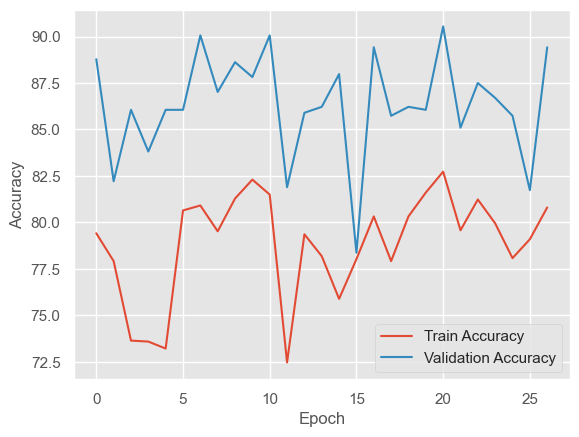

Best validation accuracy: 90.5448717948718
Accuracy: 0.9134615384615384
Confusion Matrix:
[[206  11   8]
 [ 12 175  16]
 [  1   6 189]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'Comprehensive Environmental Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9134615384615384, 'Training Time (s)': 2073.969218492508}


  1%|▊                                                                                 | 1/100 [00:10<18:06, 10.98s/it]

Epoch 1/100, Train Acc: 91.92513368983957, Val Acc: 90.06410256410257


  2%|█▋                                                                                | 2/100 [00:21<17:52, 10.94s/it]

Epoch 2/100, Train Acc: 92.45989304812834, Val Acc: 89.90384615384616


  3%|██▍                                                                               | 3/100 [00:32<17:37, 10.90s/it]

Epoch 3/100, Train Acc: 93.04812834224599, Val Acc: 91.02564102564102


  4%|███▎                                                                              | 4/100 [00:43<17:28, 10.92s/it]

Epoch 4/100, Train Acc: 93.42245989304813, Val Acc: 91.02564102564102


  5%|████                                                                              | 5/100 [00:54<17:12, 10.87s/it]

Epoch 5/100, Train Acc: 93.15508021390374, Val Acc: 90.7051282051282


  6%|████▉                                                                             | 6/100 [01:05<17:05, 10.91s/it]

Epoch 6/100, Train Acc: 92.88770053475936, Val Acc: 91.18589743589743


  7%|█████▋                                                                            | 7/100 [01:16<17:02, 11.00s/it]

Epoch 7/100, Train Acc: 94.33155080213903, Val Acc: 92.94871794871794


  8%|██████▌                                                                           | 8/100 [01:27<16:50, 10.98s/it]

Epoch 8/100, Train Acc: 94.43850267379679, Val Acc: 91.82692307692308


  9%|███████▍                                                                          | 9/100 [01:38<16:41, 11.00s/it]

Epoch 9/100, Train Acc: 94.59893048128342, Val Acc: 93.10897435897436


 10%|████████                                                                         | 10/100 [01:49<16:26, 10.96s/it]

Epoch 10/100, Train Acc: 93.90374331550802, Val Acc: 91.34615384615384


 11%|████████▉                                                                        | 11/100 [02:00<16:15, 10.96s/it]

Epoch 11/100, Train Acc: 94.22459893048128, Val Acc: 92.94871794871794


 12%|█████████▋                                                                       | 12/100 [02:11<16:08, 11.00s/it]

Epoch 12/100, Train Acc: 94.59893048128342, Val Acc: 93.42948717948718


 13%|██████████▌                                                                      | 13/100 [02:22<15:52, 10.95s/it]

Epoch 13/100, Train Acc: 94.70588235294117, Val Acc: 92.94871794871794


 14%|███████████▎                                                                     | 14/100 [02:33<15:41, 10.95s/it]

Epoch 14/100, Train Acc: 94.43850267379679, Val Acc: 91.98717948717949


 15%|████████████▏                                                                    | 15/100 [02:44<15:28, 10.93s/it]

Epoch 15/100, Train Acc: 94.54545454545455, Val Acc: 93.91025641025641


 16%|████████████▉                                                                    | 16/100 [02:55<15:31, 11.09s/it]

Epoch 16/100, Train Acc: 94.43850267379679, Val Acc: 92.78846153846153


 17%|█████████████▊                                                                   | 17/100 [03:06<15:17, 11.06s/it]

Epoch 17/100, Train Acc: 94.75935828877006, Val Acc: 92.1474358974359


 18%|██████████████▌                                                                  | 18/100 [03:17<15:08, 11.08s/it]

Epoch 18/100, Train Acc: 94.27807486631016, Val Acc: 92.94871794871794


 19%|███████████████▍                                                                 | 19/100 [03:28<14:54, 11.05s/it]

Epoch 19/100, Train Acc: 95.24064171122994, Val Acc: 92.3076923076923


 20%|████████████████▏                                                                | 20/100 [03:39<14:42, 11.04s/it]

Epoch 20/100, Train Acc: 95.18716577540107, Val Acc: 93.26923076923077


 21%|█████████████████                                                                | 21/100 [03:50<14:29, 11.01s/it]

Epoch 21/100, Train Acc: 95.08021390374331, Val Acc: 93.42948717948718


 22%|█████████████████▊                                                               | 22/100 [04:01<14:17, 10.99s/it]

Epoch 22/100, Train Acc: 94.43850267379679, Val Acc: 93.26923076923077


 23%|██████████████████▋                                                              | 23/100 [04:12<14:10, 11.05s/it]

Epoch 23/100, Train Acc: 92.83422459893048, Val Acc: 90.38461538461539


 24%|███████████████████▍                                                             | 24/100 [04:23<13:58, 11.03s/it]

Epoch 24/100, Train Acc: 92.99465240641712, Val Acc: 91.02564102564102


 25%|████████████████████▎                                                            | 25/100 [04:34<13:45, 11.01s/it]

Epoch 25/100, Train Acc: 95.24064171122994, Val Acc: 93.91025641025641


 26%|█████████████████████                                                            | 26/100 [04:45<13:35, 11.02s/it]

Epoch 26/100, Train Acc: 95.1336898395722, Val Acc: 94.07051282051282


 27%|█████████████████████▊                                                           | 27/100 [04:56<13:22, 10.99s/it]

Epoch 27/100, Train Acc: 95.56149732620321, Val Acc: 93.10897435897436


 28%|██████████████████████▋                                                          | 28/100 [05:07<13:14, 11.03s/it]

Epoch 28/100, Train Acc: 94.75935828877006, Val Acc: 93.42948717948718


 29%|███████████████████████▍                                                         | 29/100 [05:19<13:06, 11.07s/it]

Epoch 29/100, Train Acc: 95.02673796791444, Val Acc: 92.94871794871794


 30%|████████████████████████▎                                                        | 30/100 [05:30<12:55, 11.08s/it]

Epoch 30/100, Train Acc: 94.97326203208556, Val Acc: 93.26923076923077


 30%|████████████████████████▎                                                        | 30/100 [05:41<13:15, 11.37s/it]

Epoch 31/100, Train Acc: 94.97326203208556, Val Acc: 93.10897435897436
Early stopping triggered at epoch 31


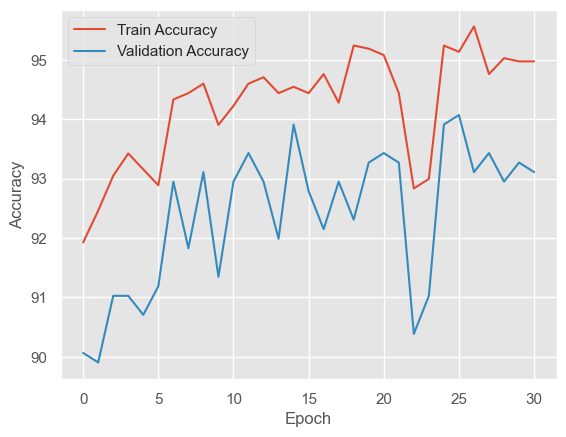

Best validation accuracy: 94.07051282051282
Accuracy: 0.9375
Confusion Matrix:
[[210   6   9]
 [  8 183  12]
 [  0   4 192]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9375, 'Training Time (s)': 341.3702380657196}


  1%|▊                                                                               | 1/100 [01:17<2:07:55, 77.53s/it]

Epoch 1/100, Train Acc: 78.77005347593582, Val Acc: 89.74358974358974


  2%|█▌                                                                              | 2/100 [02:34<2:06:06, 77.21s/it]

Epoch 2/100, Train Acc: 80.58823529411765, Val Acc: 90.22435897435898


  3%|██▍                                                                             | 3/100 [03:51<2:04:53, 77.25s/it]

Epoch 3/100, Train Acc: 80.37433155080214, Val Acc: 89.1025641025641


  4%|███▏                                                                            | 4/100 [05:08<2:03:16, 77.05s/it]

Epoch 4/100, Train Acc: 81.3903743315508, Val Acc: 86.0576923076923


  5%|████                                                                            | 5/100 [06:25<2:01:49, 76.94s/it]

Epoch 5/100, Train Acc: 81.06951871657753, Val Acc: 88.62179487179488


  6%|████▊                                                                           | 6/100 [07:42<2:00:28, 76.90s/it]

Epoch 6/100, Train Acc: 80.80213903743315, Val Acc: 88.9423076923077


  7%|█████▌                                                                          | 7/100 [08:58<1:59:09, 76.87s/it]

Epoch 7/100, Train Acc: 78.34224598930481, Val Acc: 83.17307692307692


  8%|██████▍                                                                         | 8/100 [10:16<1:58:02, 76.99s/it]

Epoch 8/100, Train Acc: 81.60427807486631, Val Acc: 87.33974358974359


  9%|███████▏                                                                        | 9/100 [11:33<1:56:44, 76.97s/it]

Epoch 9/100, Train Acc: 79.94652406417113, Val Acc: 88.46153846153847


 10%|███████▉                                                                       | 10/100 [12:49<1:55:24, 76.94s/it]

Epoch 10/100, Train Acc: 83.79679144385027, Val Acc: 89.42307692307692


 11%|████████▋                                                                      | 11/100 [14:06<1:53:54, 76.80s/it]

Epoch 11/100, Train Acc: 85.02673796791444, Val Acc: 90.86538461538461


 12%|█████████▍                                                                     | 12/100 [15:23<1:52:41, 76.83s/it]

Epoch 12/100, Train Acc: 84.38502673796792, Val Acc: 88.9423076923077


 13%|██████████▎                                                                    | 13/100 [16:40<1:51:27, 76.86s/it]

Epoch 13/100, Train Acc: 81.44385026737967, Val Acc: 89.58333333333333


 14%|███████████                                                                    | 14/100 [17:57<1:50:07, 76.83s/it]

Epoch 14/100, Train Acc: 83.9572192513369, Val Acc: 88.30128205128206


 15%|███████████▊                                                                   | 15/100 [19:13<1:48:52, 76.85s/it]

Epoch 15/100, Train Acc: 78.18181818181819, Val Acc: 88.30128205128206


 16%|████████████▋                                                                  | 16/100 [20:31<1:47:50, 77.03s/it]

Epoch 16/100, Train Acc: 83.31550802139037, Val Acc: 88.62179487179488


 17%|█████████████▍                                                                 | 17/100 [21:48<1:46:24, 76.92s/it]

Epoch 17/100, Train Acc: 84.59893048128342, Val Acc: 87.5


 18%|██████████████▏                                                                | 18/100 [23:05<1:45:08, 76.93s/it]

Epoch 18/100, Train Acc: 83.20855614973262, Val Acc: 91.66666666666667


 19%|███████████████                                                                | 19/100 [24:22<1:43:54, 76.97s/it]

Epoch 19/100, Train Acc: 84.11764705882354, Val Acc: 91.02564102564102


 20%|███████████████▊                                                               | 20/100 [25:39<1:42:42, 77.03s/it]

Epoch 20/100, Train Acc: 82.99465240641712, Val Acc: 88.9423076923077


 21%|████████████████▌                                                              | 21/100 [26:56<1:41:22, 77.00s/it]

Epoch 21/100, Train Acc: 83.68983957219251, Val Acc: 91.82692307692308


 22%|█████████████████▍                                                             | 22/100 [28:13<1:40:20, 77.19s/it]

Epoch 22/100, Train Acc: 82.40641711229947, Val Acc: 88.14102564102564


 23%|██████████████████▏                                                            | 23/100 [29:30<1:38:55, 77.08s/it]

Epoch 23/100, Train Acc: 83.7433155080214, Val Acc: 87.98076923076923


 24%|██████████████████▉                                                            | 24/100 [30:47<1:37:31, 76.99s/it]

Epoch 24/100, Train Acc: 84.11764705882354, Val Acc: 90.22435897435898


 25%|███████████████████▊                                                           | 25/100 [32:04<1:36:06, 76.89s/it]

Epoch 25/100, Train Acc: 84.81283422459893, Val Acc: 91.50641025641026


 26%|████████████████████▌                                                          | 26/100 [33:20<1:34:50, 76.89s/it]

Epoch 26/100, Train Acc: 83.10160427807487, Val Acc: 90.06410256410257


 26%|████████████████████▌                                                          | 26/100 [34:38<1:38:35, 79.93s/it]

Epoch 27/100, Train Acc: 83.79679144385027, Val Acc: 89.42307692307692
Early stopping triggered at epoch 27


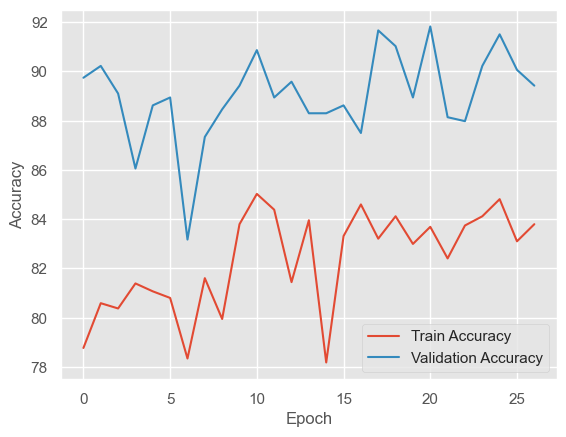

Best validation accuracy: 91.82692307692308
Accuracy: 0.9246794871794872
Confusion Matrix:
[[203  14   8]
 [ 10 186   7]
 [  1   7 188]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'omprehensive Environmental Augmentation & mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9246794871794872, 'Training Time (s)': 2078.575813293457}


  1%|▊                                                                                 | 1/100 [00:10<17:58, 10.89s/it]

Epoch 1/100, Train Acc: 50.855614973262036, Val Acc: 47.756410256410255


  2%|█▋                                                                                | 2/100 [00:21<17:47, 10.89s/it]

Epoch 2/100, Train Acc: 57.32620320855615, Val Acc: 55.76923076923077


  3%|██▍                                                                               | 3/100 [00:32<17:37, 10.90s/it]

Epoch 3/100, Train Acc: 57.16577540106952, Val Acc: 57.8525641025641


  4%|███▎                                                                              | 4/100 [00:43<17:27, 10.91s/it]

Epoch 4/100, Train Acc: 54.54545454545455, Val Acc: 56.25


  5%|████                                                                              | 5/100 [00:54<17:16, 10.91s/it]

Epoch 5/100, Train Acc: 53.36898395721925, Val Acc: 56.08974358974359


  6%|████▉                                                                             | 6/100 [01:05<17:04, 10.90s/it]

Epoch 6/100, Train Acc: 52.45989304812834, Val Acc: 55.92948717948718


  7%|█████▋                                                                            | 7/100 [01:16<16:53, 10.90s/it]

Epoch 7/100, Train Acc: 52.5668449197861, Val Acc: 55.76923076923077


  8%|██████▌                                                                           | 8/100 [01:26<16:34, 10.81s/it]

Epoch 8/100, Train Acc: 52.94117647058823, Val Acc: 56.25


  9%|███████▍                                                                          | 9/100 [01:37<16:25, 10.83s/it]

Epoch 9/100, Train Acc: 54.01069518716577, Val Acc: 56.73076923076923


 10%|████████                                                                         | 10/100 [01:48<16:16, 10.85s/it]

Epoch 10/100, Train Acc: 53.903743315508024, Val Acc: 57.21153846153846


 11%|████████▉                                                                        | 11/100 [01:59<16:08, 10.88s/it]

Epoch 11/100, Train Acc: 54.38502673796791, Val Acc: 58.493589743589745


 12%|█████████▋                                                                       | 12/100 [02:10<15:55, 10.86s/it]

Epoch 12/100, Train Acc: 54.54545454545455, Val Acc: 58.81410256410256


 13%|██████████▌                                                                      | 13/100 [02:21<15:47, 10.89s/it]

Epoch 13/100, Train Acc: 55.72192513368984, Val Acc: 57.8525641025641


 14%|███████████▎                                                                     | 14/100 [02:32<15:45, 11.00s/it]

Epoch 14/100, Train Acc: 56.149732620320854, Val Acc: 58.65384615384615


 15%|████████████▏                                                                    | 15/100 [02:43<15:30, 10.95s/it]

Epoch 15/100, Train Acc: 57.16577540106952, Val Acc: 59.77564102564103


 16%|████████████▉                                                                    | 16/100 [02:54<15:25, 11.01s/it]

Epoch 16/100, Train Acc: 58.716577540106954, Val Acc: 59.77564102564103


 17%|█████████████▊                                                                   | 17/100 [03:05<15:13, 11.00s/it]

Epoch 17/100, Train Acc: 59.893048128342244, Val Acc: 62.82051282051282


 18%|██████████████▌                                                                  | 18/100 [03:16<15:01, 10.99s/it]

Epoch 18/100, Train Acc: 62.24598930481283, Val Acc: 62.01923076923077


 19%|███████████████▍                                                                 | 19/100 [03:27<14:48, 10.96s/it]

Epoch 19/100, Train Acc: 66.47058823529412, Val Acc: 66.50641025641026


 20%|████████████████▏                                                                | 20/100 [03:38<14:36, 10.96s/it]

Epoch 20/100, Train Acc: 63.101604278074866, Val Acc: 65.38461538461539


 21%|█████████████████                                                                | 21/100 [03:49<14:31, 11.03s/it]

Epoch 21/100, Train Acc: 65.72192513368984, Val Acc: 66.34615384615384


 22%|█████████████████▊                                                               | 22/100 [04:00<14:19, 11.02s/it]

Epoch 22/100, Train Acc: 69.14438502673796, Val Acc: 67.46794871794872


 23%|██████████████████▋                                                              | 23/100 [04:11<14:06, 10.99s/it]

Epoch 23/100, Train Acc: 68.34224598930481, Val Acc: 65.5448717948718


 24%|███████████████████▍                                                             | 24/100 [04:22<13:56, 11.00s/it]

Epoch 24/100, Train Acc: 71.65775401069519, Val Acc: 67.62820512820512


 25%|████████████████████▎                                                            | 25/100 [04:33<13:51, 11.09s/it]

Epoch 25/100, Train Acc: 66.31016042780749, Val Acc: 65.22435897435898


 26%|█████████████████████                                                            | 26/100 [04:45<13:42, 11.12s/it]

Epoch 26/100, Train Acc: 70.4812834224599, Val Acc: 66.98717948717949


 27%|█████████████████████▊                                                           | 27/100 [04:56<13:31, 11.12s/it]

Epoch 27/100, Train Acc: 70.26737967914438, Val Acc: 68.10897435897436


 28%|██████████████████████▋                                                          | 28/100 [05:07<13:21, 11.13s/it]

Epoch 28/100, Train Acc: 69.67914438502673, Val Acc: 66.66666666666667


 29%|███████████████████████▍                                                         | 29/100 [05:18<13:09, 11.11s/it]

Epoch 29/100, Train Acc: 68.44919786096257, Val Acc: 66.98717948717949


 30%|████████████████████████▎                                                        | 30/100 [05:29<12:58, 11.12s/it]

Epoch 30/100, Train Acc: 73.52941176470588, Val Acc: 70.3525641025641


 31%|█████████████████████████                                                        | 31/100 [05:40<12:50, 11.16s/it]

Epoch 31/100, Train Acc: 72.19251336898395, Val Acc: 69.55128205128206


 32%|█████████████████████████▉                                                       | 32/100 [05:52<12:43, 11.22s/it]

Epoch 32/100, Train Acc: 73.2620320855615, Val Acc: 70.67307692307692


 33%|██████████████████████████▋                                                      | 33/100 [06:03<12:27, 11.16s/it]

Epoch 33/100, Train Acc: 65.50802139037434, Val Acc: 62.5


 34%|███████████████████████████▌                                                     | 34/100 [06:14<12:17, 11.17s/it]

Epoch 34/100, Train Acc: 73.10160427807487, Val Acc: 70.03205128205128


 35%|████████████████████████████▎                                                    | 35/100 [06:25<12:07, 11.19s/it]

Epoch 35/100, Train Acc: 70.21390374331551, Val Acc: 69.39102564102564


 36%|█████████████████████████████▏                                                   | 36/100 [06:36<11:55, 11.18s/it]

Epoch 36/100, Train Acc: 70.37433155080214, Val Acc: 68.10897435897436


 36%|█████████████████████████████▏                                                   | 36/100 [06:48<12:05, 11.33s/it]

Epoch 37/100, Train Acc: 73.7433155080214, Val Acc: 70.67307692307692
Early stopping triggered at epoch 37


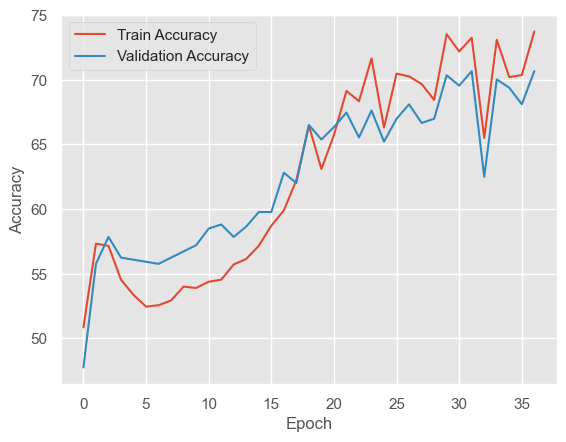

Best validation accuracy: 70.67307692307692
Accuracy: 0.7003205128205128
Confusion Matrix:
[[242  73]
 [114 195]]


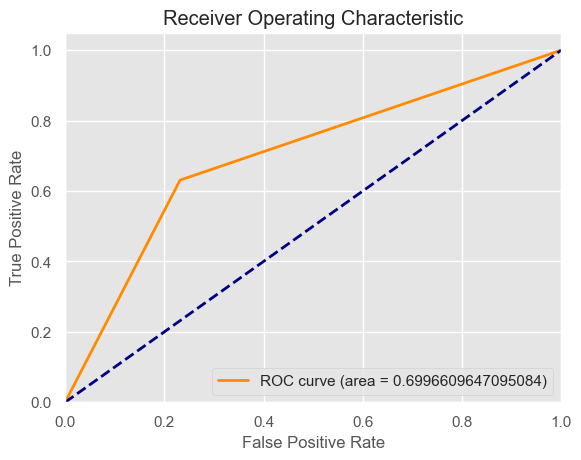

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.7003205128205128, 'Training Time (s)': 408.3866057395935}


  1%|▊                                                                               | 1/100 [00:55<1:30:59, 55.14s/it]

Epoch 1/100, Train Acc: 61.44385026737968, Val Acc: 68.58974358974359


  2%|█▌                                                                              | 2/100 [01:49<1:29:43, 54.93s/it]

Epoch 2/100, Train Acc: 68.1283422459893, Val Acc: 68.10897435897436


  3%|██▍                                                                             | 3/100 [02:44<1:28:42, 54.87s/it]

Epoch 3/100, Train Acc: 63.529411764705884, Val Acc: 66.82692307692308


  4%|███▏                                                                            | 4/100 [03:39<1:27:34, 54.74s/it]

Epoch 4/100, Train Acc: 68.66310160427807, Val Acc: 68.10897435897436


  5%|████                                                                            | 5/100 [04:33<1:26:39, 54.73s/it]

Epoch 5/100, Train Acc: 62.99465240641711, Val Acc: 65.22435897435898


  6%|████▊                                                                           | 6/100 [05:28<1:25:46, 54.75s/it]

Epoch 6/100, Train Acc: 67.05882352941177, Val Acc: 66.98717948717949


  7%|█████▌                                                                          | 7/100 [06:22<1:24:34, 54.57s/it]

Epoch 7/100, Train Acc: 61.01604278074866, Val Acc: 66.66666666666667


  8%|██████▍                                                                         | 8/100 [07:17<1:23:43, 54.60s/it]

Epoch 8/100, Train Acc: 67.43315508021391, Val Acc: 70.51282051282051


  9%|███████▏                                                                        | 9/100 [08:12<1:22:59, 54.71s/it]

Epoch 9/100, Train Acc: 65.29411764705883, Val Acc: 66.98717948717949


 10%|███████▉                                                                       | 10/100 [09:07<1:21:58, 54.65s/it]

Epoch 10/100, Train Acc: 62.24598930481283, Val Acc: 66.18589743589743


 11%|████████▋                                                                      | 11/100 [10:01<1:20:47, 54.47s/it]

Epoch 11/100, Train Acc: 69.25133689839572, Val Acc: 68.91025641025641


 12%|█████████▍                                                                     | 12/100 [10:55<1:19:42, 54.35s/it]

Epoch 12/100, Train Acc: 62.99465240641711, Val Acc: 65.38461538461539


 13%|██████████▎                                                                    | 13/100 [11:49<1:18:38, 54.23s/it]

Epoch 13/100, Train Acc: 69.67914438502673, Val Acc: 69.39102564102564


 14%|███████████                                                                    | 14/100 [12:43<1:17:42, 54.21s/it]

Epoch 14/100, Train Acc: 66.20320855614973, Val Acc: 67.62820512820512


 15%|███████████▊                                                                   | 15/100 [13:37<1:16:54, 54.29s/it]

Epoch 15/100, Train Acc: 63.79679144385027, Val Acc: 68.10897435897436


 16%|████████████▋                                                                  | 16/100 [14:32<1:16:04, 54.34s/it]

Epoch 16/100, Train Acc: 68.87700534759358, Val Acc: 69.39102564102564


 17%|█████████████▍                                                                 | 17/100 [15:26<1:15:11, 54.35s/it]

Epoch 17/100, Train Acc: 62.19251336898396, Val Acc: 68.42948717948718


 18%|██████████████▏                                                                | 18/100 [16:21<1:14:19, 54.38s/it]

Epoch 18/100, Train Acc: 68.6096256684492, Val Acc: 68.42948717948718


 19%|███████████████                                                                | 19/100 [17:15<1:13:24, 54.37s/it]

Epoch 19/100, Train Acc: 69.19786096256685, Val Acc: 70.3525641025641


 20%|███████████████▊                                                               | 20/100 [18:09<1:12:26, 54.33s/it]

Epoch 20/100, Train Acc: 65.50802139037434, Val Acc: 68.10897435897436


 21%|████████████████▌                                                              | 21/100 [19:03<1:11:29, 54.29s/it]

Epoch 21/100, Train Acc: 68.55614973262033, Val Acc: 68.91025641025641


 22%|█████████████████▍                                                             | 22/100 [19:57<1:10:28, 54.21s/it]

Epoch 22/100, Train Acc: 60.213903743315505, Val Acc: 65.7051282051282


 23%|██████████████████▏                                                            | 23/100 [20:52<1:09:36, 54.25s/it]

Epoch 23/100, Train Acc: 65.8288770053476, Val Acc: 68.91025641025641


 24%|██████████████████▉                                                            | 24/100 [21:46<1:08:45, 54.28s/it]

Epoch 24/100, Train Acc: 67.00534759358288, Val Acc: 66.50641025641026


 25%|███████████████████▊                                                           | 25/100 [22:40<1:07:53, 54.31s/it]

Epoch 25/100, Train Acc: 71.44385026737967, Val Acc: 72.11538461538461


 26%|████████████████████▌                                                          | 26/100 [23:35<1:07:01, 54.35s/it]

Epoch 26/100, Train Acc: 69.3048128342246, Val Acc: 69.23076923076923


 27%|█████████████████████▎                                                         | 27/100 [24:29<1:06:09, 54.38s/it]

Epoch 27/100, Train Acc: 67.9144385026738, Val Acc: 69.71153846153847


 28%|██████████████████████                                                         | 28/100 [25:24<1:05:16, 54.40s/it]

Epoch 28/100, Train Acc: 67.2192513368984, Val Acc: 68.10897435897436


 29%|██████████████████████▉                                                        | 29/100 [26:18<1:04:22, 54.41s/it]

Epoch 29/100, Train Acc: 70.96256684491979, Val Acc: 68.75


 29%|██████████████████████▉                                                        | 29/100 [27:13<1:06:38, 56.32s/it]

Epoch 30/100, Train Acc: 68.1283422459893, Val Acc: 70.99358974358974
Early stopping triggered at epoch 30


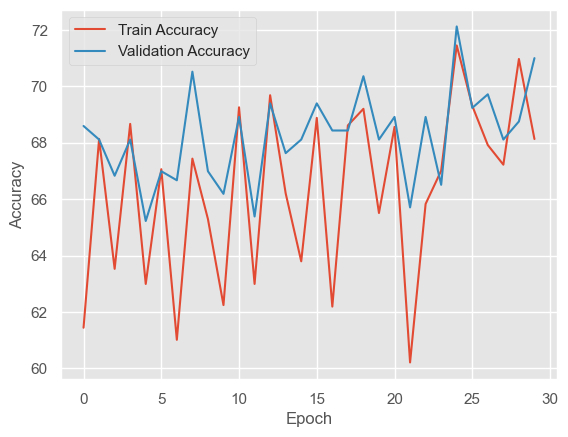

Best validation accuracy: 72.11538461538461
Accuracy: 0.7035256410256411
Confusion Matrix:
[[215 100]
 [ 85 224]]


{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'Basic Natural Scene Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.7035256410256411, 'Training Time (s)': 1633.543294429779}


  1%|▊                                                                               | 1/100 [01:18<2:09:13, 78.32s/it]

Epoch 1/100, Train Acc: 53.58288770053476, Val Acc: 62.33974358974359


  2%|█▌                                                                              | 2/100 [02:36<2:07:38, 78.15s/it]

Epoch 2/100, Train Acc: 64.6524064171123, Val Acc: 66.50641025641026


  3%|██▍                                                                             | 3/100 [03:54<2:06:22, 78.17s/it]

Epoch 3/100, Train Acc: 62.29946524064171, Val Acc: 66.98717948717949


  4%|███▏                                                                            | 4/100 [05:13<2:05:16, 78.30s/it]

Epoch 4/100, Train Acc: 59.893048128342244, Val Acc: 63.62179487179487


  5%|████                                                                            | 5/100 [06:31<2:03:51, 78.22s/it]

Epoch 5/100, Train Acc: 62.29946524064171, Val Acc: 67.1474358974359


  6%|████▊                                                                           | 6/100 [07:48<2:02:12, 78.01s/it]

Epoch 6/100, Train Acc: 61.336898395721924, Val Acc: 63.30128205128205


  7%|█████▌                                                                          | 7/100 [09:06<2:00:51, 77.97s/it]

Epoch 7/100, Train Acc: 63.31550802139037, Val Acc: 66.50641025641026


  8%|██████▍                                                                         | 8/100 [10:24<1:59:26, 77.89s/it]

Epoch 8/100, Train Acc: 64.11764705882354, Val Acc: 66.82692307692308


  9%|███████▏                                                                        | 9/100 [11:42<1:58:12, 77.94s/it]

Epoch 9/100, Train Acc: 58.1283422459893, Val Acc: 67.94871794871794


 10%|███████▉                                                                       | 10/100 [12:59<1:56:35, 77.73s/it]

Epoch 10/100, Train Acc: 61.81818181818182, Val Acc: 65.5448717948718


 11%|████████▋                                                                      | 11/100 [14:17<1:55:28, 77.85s/it]

Epoch 11/100, Train Acc: 63.9572192513369, Val Acc: 64.74358974358974


 12%|█████████▍                                                                     | 12/100 [15:35<1:53:57, 77.70s/it]

Epoch 12/100, Train Acc: 54.54545454545455, Val Acc: 61.69871794871795


 13%|██████████▎                                                                    | 13/100 [16:53<1:52:45, 77.76s/it]

Epoch 13/100, Train Acc: 64.27807486631016, Val Acc: 66.82692307692308


 14%|███████████                                                                    | 14/100 [18:10<1:51:13, 77.60s/it]

Epoch 14/100, Train Acc: 61.06951871657754, Val Acc: 68.42948717948718


 15%|███████████▊                                                                   | 15/100 [19:28<1:50:03, 77.69s/it]

Epoch 15/100, Train Acc: 64.91978609625669, Val Acc: 68.58974358974359


 16%|████████████▋                                                                  | 16/100 [20:46<1:49:07, 77.94s/it]

Epoch 16/100, Train Acc: 59.73262032085562, Val Acc: 68.58974358974359


 17%|█████████████▍                                                                 | 17/100 [22:04<1:47:52, 77.98s/it]

Epoch 17/100, Train Acc: 60.106951871657756, Val Acc: 66.82692307692308


 18%|██████████████▏                                                                | 18/100 [23:22<1:46:26, 77.89s/it]

Epoch 18/100, Train Acc: 61.8716577540107, Val Acc: 67.1474358974359


 19%|███████████████                                                                | 19/100 [24:40<1:45:13, 77.94s/it]

Epoch 19/100, Train Acc: 62.24598930481283, Val Acc: 65.86538461538461


 20%|███████████████▊                                                               | 20/100 [25:58<1:43:47, 77.84s/it]

Epoch 20/100, Train Acc: 61.49732620320856, Val Acc: 66.18589743589743


 21%|████████████████▌                                                              | 21/100 [27:15<1:42:30, 77.85s/it]

Epoch 21/100, Train Acc: 61.657754010695186, Val Acc: 67.62820512820512


 22%|█████████████████▍                                                             | 22/100 [28:33<1:41:15, 77.89s/it]

Epoch 22/100, Train Acc: 61.657754010695186, Val Acc: 65.06410256410257


 23%|██████████████████▏                                                            | 23/100 [29:52<1:40:05, 78.00s/it]

Epoch 23/100, Train Acc: 63.2620320855615, Val Acc: 66.82692307692308


 24%|██████████████████▉                                                            | 24/100 [31:10<1:38:56, 78.11s/it]

Epoch 24/100, Train Acc: 59.35828877005348, Val Acc: 65.5448717948718


 25%|███████████████████▊                                                           | 25/100 [32:28<1:37:36, 78.08s/it]

Epoch 25/100, Train Acc: 61.657754010695186, Val Acc: 68.26923076923077


 26%|████████████████████▌                                                          | 26/100 [33:46<1:36:11, 78.00s/it]

Epoch 26/100, Train Acc: 64.75935828877006, Val Acc: 68.26923076923077


 26%|████████████████████▌                                                          | 26/100 [35:04<1:39:49, 80.94s/it]

Epoch 27/100, Train Acc: 58.288770053475936, Val Acc: 65.06410256410257
Early stopping triggered at epoch 27


Best validation accuracy: 68.58974358974359
Accuracy: 0.6891025641025641
Confusion Matrix:
[[209 106]
 [ 88 221]]


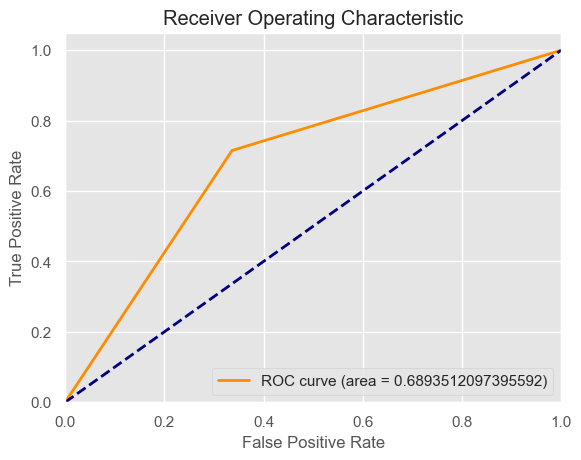

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'Advanced Realism Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6891025641025641, 'Training Time (s)': 2104.749638557434}


  1%|▊                                                                               | 1/100 [01:17<2:07:09, 77.06s/it]

Epoch 1/100, Train Acc: 62.032085561497325, Val Acc: 66.82692307692308


  2%|█▌                                                                              | 2/100 [02:34<2:05:45, 76.99s/it]

Epoch 2/100, Train Acc: 59.46524064171123, Val Acc: 67.78846153846153


  3%|██▍                                                                             | 3/100 [03:51<2:04:40, 77.12s/it]

Epoch 3/100, Train Acc: 59.67914438502674, Val Acc: 67.62820512820512


  4%|███▏                                                                            | 4/100 [05:08<2:03:10, 76.98s/it]

Epoch 4/100, Train Acc: 56.149732620320854, Val Acc: 65.86538461538461


  5%|████                                                                            | 5/100 [06:25<2:01:59, 77.05s/it]

Epoch 5/100, Train Acc: 60.74866310160428, Val Acc: 67.62820512820512


  6%|████▊                                                                           | 6/100 [07:42<2:00:38, 77.00s/it]

Epoch 6/100, Train Acc: 62.99465240641711, Val Acc: 68.91025641025641


  7%|█████▌                                                                          | 7/100 [09:00<1:59:53, 77.35s/it]

Epoch 7/100, Train Acc: 61.3903743315508, Val Acc: 66.82692307692308


  8%|██████▍                                                                         | 8/100 [10:16<1:58:14, 77.11s/it]

Epoch 8/100, Train Acc: 60.74866310160428, Val Acc: 69.07051282051282


  9%|███████▏                                                                        | 9/100 [11:34<1:57:00, 77.14s/it]

Epoch 9/100, Train Acc: 59.46524064171123, Val Acc: 68.91025641025641


 10%|███████▉                                                                       | 10/100 [12:50<1:55:37, 77.08s/it]

Epoch 10/100, Train Acc: 54.919786096256686, Val Acc: 62.5


 11%|████████▋                                                                      | 11/100 [14:07<1:54:13, 77.00s/it]

Epoch 11/100, Train Acc: 60.42780748663102, Val Acc: 67.62820512820512


 12%|█████████▍                                                                     | 12/100 [15:24<1:52:58, 77.03s/it]

Epoch 12/100, Train Acc: 60.42780748663102, Val Acc: 67.1474358974359


 13%|██████████▎                                                                    | 13/100 [16:41<1:51:22, 76.81s/it]

Epoch 13/100, Train Acc: 61.3903743315508, Val Acc: 65.7051282051282


 14%|███████████                                                                    | 14/100 [17:57<1:50:04, 76.80s/it]

Epoch 14/100, Train Acc: 63.68983957219251, Val Acc: 67.3076923076923


 15%|███████████▊                                                                   | 15/100 [19:15<1:48:55, 76.88s/it]

Epoch 15/100, Train Acc: 56.20320855614973, Val Acc: 63.94230769230769


 16%|████████████▋                                                                  | 16/100 [20:32<1:47:59, 77.14s/it]

Epoch 16/100, Train Acc: 59.786096256684495, Val Acc: 65.86538461538461


 17%|█████████████▍                                                                 | 17/100 [21:49<1:46:28, 76.97s/it]

Epoch 17/100, Train Acc: 61.92513368983957, Val Acc: 66.34615384615384


 18%|██████████████▏                                                                | 18/100 [23:06<1:45:14, 77.00s/it]

Epoch 18/100, Train Acc: 60.855614973262036, Val Acc: 67.1474358974359


 19%|███████████████                                                                | 19/100 [24:27<1:45:38, 78.25s/it]

Epoch 19/100, Train Acc: 61.97860962566845, Val Acc: 68.26923076923077


 20%|███████████████▊                                                               | 20/100 [25:50<1:46:18, 79.73s/it]

Epoch 20/100, Train Acc: 59.25133689839572, Val Acc: 69.71153846153847


 21%|████████████████▌                                                              | 21/100 [27:07<1:43:57, 78.96s/it]

Epoch 21/100, Train Acc: 60.74866310160428, Val Acc: 63.62179487179487


 22%|█████████████████▍                                                             | 22/100 [28:25<1:42:01, 78.48s/it]

Epoch 22/100, Train Acc: 56.68449197860963, Val Acc: 60.8974358974359


 23%|██████████████████▏                                                            | 23/100 [29:42<1:40:16, 78.14s/it]

Epoch 23/100, Train Acc: 62.19251336898396, Val Acc: 65.7051282051282


 24%|██████████████████▉                                                            | 24/100 [30:59<1:38:40, 77.91s/it]

Epoch 24/100, Train Acc: 59.786096256684495, Val Acc: 64.74358974358974


 25%|███████████████████▊                                                           | 25/100 [32:17<1:37:04, 77.66s/it]

Epoch 25/100, Train Acc: 59.25133689839572, Val Acc: 65.38461538461539


 26%|████████████████████▌                                                          | 26/100 [33:34<1:35:41, 77.59s/it]

Epoch 26/100, Train Acc: 60.53475935828877, Val Acc: 65.5448717948718


 26%|████████████████████▌                                                          | 26/100 [34:51<1:39:11, 80.43s/it]

Epoch 27/100, Train Acc: 61.01604278074866, Val Acc: 67.46794871794872
Early stopping triggered at epoch 27


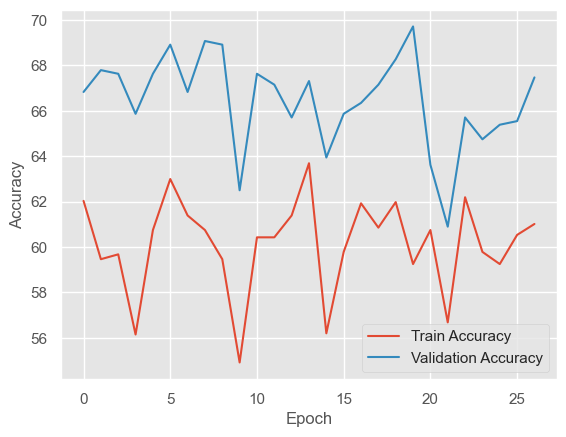

Best validation accuracy: 69.71153846153847
Accuracy: 0.6698717948717948
Confusion Matrix:
[[245  70]
 [136 173]]


{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'Comprehensive Environmental Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6698717948717948, 'Training Time (s)': 2091.676894426346}


  1%|▊                                                                                 | 1/100 [00:10<17:51, 10.83s/it]

Epoch 1/100, Train Acc: 62.780748663101605, Val Acc: 63.46153846153846


  2%|█▋                                                                                | 2/100 [00:21<17:43, 10.85s/it]

Epoch 2/100, Train Acc: 58.663101604278076, Val Acc: 61.37820512820513


  3%|██▍                                                                               | 3/100 [00:32<17:32, 10.85s/it]

Epoch 3/100, Train Acc: 64.27807486631016, Val Acc: 66.02564102564102


  4%|███▎                                                                              | 4/100 [00:43<17:26, 10.90s/it]

Epoch 4/100, Train Acc: 66.14973262032086, Val Acc: 66.02564102564102


  5%|████                                                                              | 5/100 [00:54<17:27, 11.03s/it]

Epoch 5/100, Train Acc: 63.529411764705884, Val Acc: 63.782051282051285


  6%|████▉                                                                             | 6/100 [01:05<17:12, 10.99s/it]

Epoch 6/100, Train Acc: 59.62566844919786, Val Acc: 61.53846153846154


  7%|█████▋                                                                            | 7/100 [01:16<17:03, 11.01s/it]

Epoch 7/100, Train Acc: 70.21390374331551, Val Acc: 67.46794871794872


  8%|██████▌                                                                           | 8/100 [01:27<16:51, 10.99s/it]

Epoch 8/100, Train Acc: 65.66844919786097, Val Acc: 66.66666666666667


  9%|███████▍                                                                          | 9/100 [01:38<16:46, 11.06s/it]

Epoch 9/100, Train Acc: 66.09625668449198, Val Acc: 67.62820512820512


 10%|████████                                                                         | 10/100 [01:50<16:37, 11.08s/it]

Epoch 10/100, Train Acc: 63.42245989304813, Val Acc: 64.26282051282051


 11%|████████▉                                                                        | 11/100 [02:01<16:24, 11.07s/it]

Epoch 11/100, Train Acc: 62.29946524064171, Val Acc: 63.94230769230769


 12%|█████████▋                                                                       | 12/100 [02:12<16:10, 11.03s/it]

Epoch 12/100, Train Acc: 61.01604278074866, Val Acc: 63.14102564102564


 13%|██████████▌                                                                      | 13/100 [02:23<16:00, 11.04s/it]

Epoch 13/100, Train Acc: 64.81283422459893, Val Acc: 65.22435897435898


 14%|███████████▎                                                                     | 14/100 [02:34<15:52, 11.08s/it]

Epoch 14/100, Train Acc: 62.67379679144385, Val Acc: 64.74358974358974


 15%|████████████▏                                                                    | 15/100 [02:45<15:44, 11.11s/it]

Epoch 15/100, Train Acc: 62.29946524064171, Val Acc: 64.1025641025641


 16%|████████████▉                                                                    | 16/100 [02:56<15:33, 11.11s/it]

Epoch 16/100, Train Acc: 64.59893048128342, Val Acc: 65.86538461538461


 17%|█████████████▊                                                                   | 17/100 [03:07<15:21, 11.10s/it]

Epoch 17/100, Train Acc: 63.04812834224599, Val Acc: 66.02564102564102


 18%|██████████████▌                                                                  | 18/100 [03:18<15:10, 11.11s/it]

Epoch 18/100, Train Acc: 63.31550802139037, Val Acc: 65.38461538461539


 19%|███████████████▍                                                                 | 19/100 [03:29<15:00, 11.11s/it]

Epoch 19/100, Train Acc: 68.93048128342247, Val Acc: 67.46794871794872


 20%|████████████████▏                                                                | 20/100 [03:41<14:52, 11.16s/it]

Epoch 20/100, Train Acc: 66.2566844919786, Val Acc: 67.46794871794872


 21%|█████████████████                                                                | 21/100 [03:52<14:42, 11.17s/it]

Epoch 21/100, Train Acc: 66.95187165775401, Val Acc: 66.82692307692308


 22%|█████████████████▊                                                               | 22/100 [04:03<14:29, 11.15s/it]

Epoch 22/100, Train Acc: 69.41176470588235, Val Acc: 67.62820512820512


 23%|██████████████████▋                                                              | 23/100 [04:14<14:17, 11.14s/it]

Epoch 23/100, Train Acc: 64.70588235294117, Val Acc: 65.86538461538461


 24%|███████████████████▍                                                             | 24/100 [04:25<14:05, 11.13s/it]

Epoch 24/100, Train Acc: 62.24598930481283, Val Acc: 62.66025641025641


 25%|████████████████████▎                                                            | 25/100 [04:36<13:55, 11.15s/it]

Epoch 25/100, Train Acc: 65.56149732620321, Val Acc: 66.66666666666667


 26%|█████████████████████                                                            | 26/100 [04:48<13:49, 11.21s/it]

Epoch 26/100, Train Acc: 62.88770053475936, Val Acc: 64.1025641025641


 26%|█████████████████████                                                            | 26/100 [04:59<14:11, 11.51s/it]

Epoch 27/100, Train Acc: 65.77540106951872, Val Acc: 66.18589743589743
Early stopping triggered at epoch 27


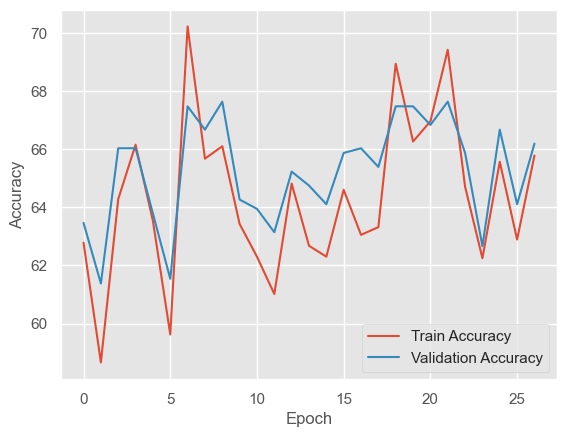

Best validation accuracy: 67.62820512820512
Accuracy: 0.6442307692307693
Confusion Matrix:
[[288  27]
 [195 114]]


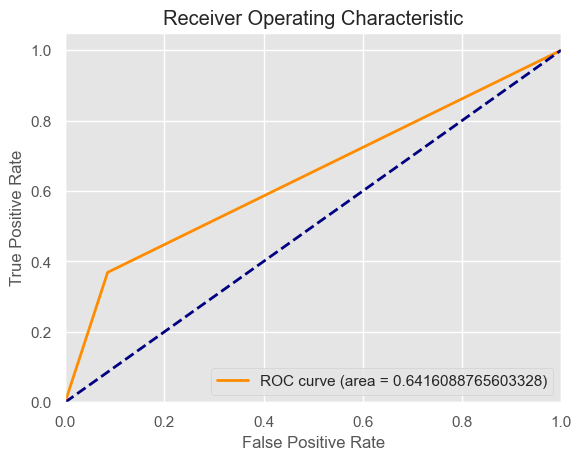

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6442307692307693, 'Training Time (s)': 299.5854592323303}


  1%|▊                                                                               | 1/100 [01:17<2:07:56, 77.54s/it]

Epoch 1/100, Train Acc: 57.00534759358289, Val Acc: 63.94230769230769


  2%|█▌                                                                              | 2/100 [02:34<2:05:49, 77.04s/it]

Epoch 2/100, Train Acc: 54.54545454545455, Val Acc: 59.61538461538461


  3%|██▍                                                                             | 3/100 [03:51<2:04:38, 77.10s/it]

Epoch 3/100, Train Acc: 57.27272727272727, Val Acc: 64.1025641025641


  4%|███▏                                                                            | 4/100 [05:08<2:03:12, 77.00s/it]

Epoch 4/100, Train Acc: 60.80213903743316, Val Acc: 67.62820512820512


  5%|████                                                                            | 5/100 [06:24<2:01:41, 76.86s/it]

Epoch 5/100, Train Acc: 60.74866310160428, Val Acc: 67.1474358974359


  6%|████▊                                                                           | 6/100 [07:41<2:00:25, 76.86s/it]

Epoch 6/100, Train Acc: 55.98930481283423, Val Acc: 59.61538461538461


  7%|█████▌                                                                          | 7/100 [08:58<1:59:07, 76.85s/it]

Epoch 7/100, Train Acc: 57.86096256684492, Val Acc: 64.58333333333333


  8%|██████▍                                                                         | 8/100 [10:14<1:57:35, 76.69s/it]

Epoch 8/100, Train Acc: 59.037433155080215, Val Acc: 69.07051282051282


  9%|███████▏                                                                        | 9/100 [11:32<1:56:32, 76.85s/it]

Epoch 9/100, Train Acc: 55.45454545454545, Val Acc: 62.33974358974359


 10%|███████▉                                                                       | 10/100 [12:49<1:55:25, 76.95s/it]

Epoch 10/100, Train Acc: 56.470588235294116, Val Acc: 66.18589743589743


 11%|████████▋                                                                      | 11/100 [14:06<1:54:10, 76.97s/it]

Epoch 11/100, Train Acc: 55.61497326203209, Val Acc: 58.97435897435897


 12%|█████████▍                                                                     | 12/100 [15:22<1:52:46, 76.89s/it]

Epoch 12/100, Train Acc: 59.09090909090909, Val Acc: 66.98717948717949


 13%|██████████▎                                                                    | 13/100 [16:39<1:51:26, 76.85s/it]

Epoch 13/100, Train Acc: 61.55080213903744, Val Acc: 71.31410256410257


 14%|███████████                                                                    | 14/100 [17:56<1:50:14, 76.91s/it]

Epoch 14/100, Train Acc: 53.68983957219251, Val Acc: 58.01282051282051


 15%|███████████▊                                                                   | 15/100 [19:13<1:48:58, 76.93s/it]

Epoch 15/100, Train Acc: 54.75935828877005, Val Acc: 60.09615384615385


 16%|████████████▋                                                                  | 16/100 [20:30<1:47:42, 76.93s/it]

Epoch 16/100, Train Acc: 60.74866310160428, Val Acc: 62.33974358974359


 17%|█████████████▍                                                                 | 17/100 [21:47<1:46:23, 76.90s/it]

Epoch 17/100, Train Acc: 56.0427807486631, Val Acc: 60.73717948717949


 18%|██████████████▏                                                                | 18/100 [23:04<1:45:02, 76.86s/it]

Epoch 18/100, Train Acc: 56.470588235294116, Val Acc: 61.69871794871795


 19%|███████████████                                                                | 19/100 [24:21<1:43:47, 76.88s/it]

Epoch 19/100, Train Acc: 53.101604278074866, Val Acc: 57.37179487179487


 20%|███████████████▊                                                               | 20/100 [25:38<1:42:42, 77.04s/it]

Epoch 20/100, Train Acc: 60.106951871657756, Val Acc: 64.74358974358974


 21%|████████████████▌                                                              | 21/100 [26:55<1:41:32, 77.12s/it]

Epoch 21/100, Train Acc: 57.05882352941177, Val Acc: 61.05769230769231


 22%|█████████████████▍                                                             | 22/100 [28:13<1:40:19, 77.18s/it]

Epoch 22/100, Train Acc: 61.44385026737968, Val Acc: 65.22435897435898


 23%|██████████████████▏                                                            | 23/100 [29:30<1:39:08, 77.25s/it]

Epoch 23/100, Train Acc: 53.42245989304813, Val Acc: 57.21153846153846


 24%|██████████████████▉                                                            | 24/100 [30:47<1:37:41, 77.12s/it]

Epoch 24/100, Train Acc: 57.11229946524064, Val Acc: 61.05769230769231


 25%|███████████████████▊                                                           | 25/100 [32:04<1:36:21, 77.09s/it]

Epoch 25/100, Train Acc: 63.04812834224599, Val Acc: 65.86538461538461


 26%|████████████████████▌                                                          | 26/100 [33:21<1:35:07, 77.12s/it]

Epoch 26/100, Train Acc: 55.61497326203209, Val Acc: 60.09615384615385


 26%|████████████████████▌                                                          | 26/100 [34:38<1:38:36, 79.96s/it]

Epoch 27/100, Train Acc: 57.9144385026738, Val Acc: 59.294871794871796
Early stopping triggered at epoch 27


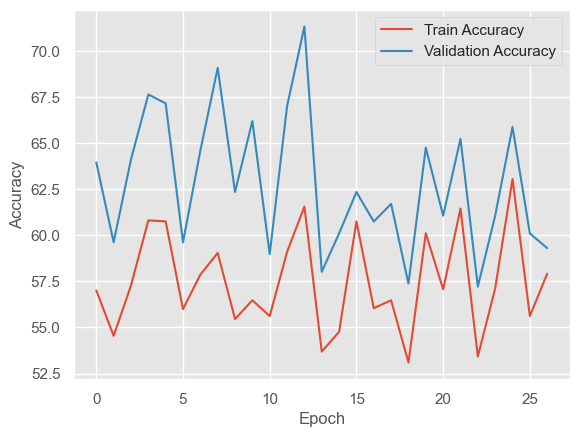

Best validation accuracy: 71.31410256410257
Accuracy: 0.6842948717948718
Confusion Matrix:
[[224  91]
 [106 203]]


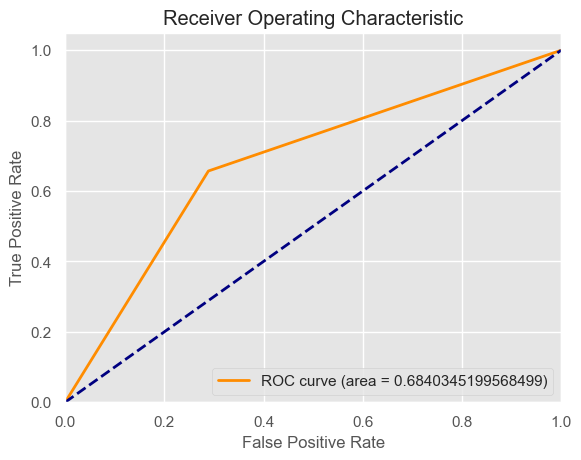

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'omprehensive Environmental Augmentation & mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6842948717948718, 'Training Time (s)': 2079.1641771793365}


  1%|▊                                                                                 | 1/100 [00:25<41:25, 25.11s/it]

Epoch 1/100, Train Acc: 87.96791443850267, Val Acc: 88.30128205128206


  2%|█▋                                                                                | 2/100 [00:51<41:49, 25.61s/it]

Epoch 2/100, Train Acc: 92.7807486631016, Val Acc: 92.46794871794872


  3%|██▍                                                                               | 3/100 [01:16<41:16, 25.53s/it]

Epoch 3/100, Train Acc: 93.15508021390374, Val Acc: 93.26923076923077


  4%|███▎                                                                              | 4/100 [01:41<40:46, 25.48s/it]

Epoch 4/100, Train Acc: 94.59893048128342, Val Acc: 93.26923076923077


  5%|████                                                                              | 5/100 [02:07<40:27, 25.55s/it]

Epoch 5/100, Train Acc: 94.91978609625669, Val Acc: 93.75


  6%|████▉                                                                             | 6/100 [02:33<40:01, 25.55s/it]

Epoch 6/100, Train Acc: 95.29411764705883, Val Acc: 93.58974358974359


  7%|█████▋                                                                            | 7/100 [02:58<39:43, 25.63s/it]

Epoch 7/100, Train Acc: 95.3475935828877, Val Acc: 94.39102564102564


  8%|██████▌                                                                           | 8/100 [03:24<39:16, 25.62s/it]

Epoch 8/100, Train Acc: 95.40106951871658, Val Acc: 93.91025641025641


  9%|███████▍                                                                          | 9/100 [03:50<38:53, 25.64s/it]

Epoch 9/100, Train Acc: 95.50802139037434, Val Acc: 94.07051282051282


 10%|████████                                                                         | 10/100 [04:15<38:29, 25.67s/it]

Epoch 10/100, Train Acc: 95.66844919786097, Val Acc: 94.07051282051282


 11%|████████▉                                                                        | 11/100 [04:41<38:07, 25.71s/it]

Epoch 11/100, Train Acc: 95.66844919786097, Val Acc: 94.55128205128206


 12%|█████████▋                                                                       | 12/100 [05:07<37:37, 25.65s/it]

Epoch 12/100, Train Acc: 95.98930481283422, Val Acc: 94.07051282051282


 13%|██████████▌                                                                      | 13/100 [05:33<37:15, 25.70s/it]

Epoch 13/100, Train Acc: 95.98930481283422, Val Acc: 94.71153846153847


 14%|███████████▎                                                                     | 14/100 [05:58<36:55, 25.76s/it]

Epoch 14/100, Train Acc: 96.14973262032086, Val Acc: 94.71153846153847


 15%|████████████▏                                                                    | 15/100 [06:24<36:27, 25.74s/it]

Epoch 15/100, Train Acc: 96.09625668449198, Val Acc: 94.55128205128206


 16%|████████████▉                                                                    | 16/100 [06:50<36:01, 25.73s/it]

Epoch 16/100, Train Acc: 96.31016042780749, Val Acc: 95.03205128205128


 17%|█████████████▊                                                                   | 17/100 [07:16<35:38, 25.76s/it]

Epoch 17/100, Train Acc: 96.20320855614973, Val Acc: 94.71153846153847


 18%|██████████████▌                                                                  | 18/100 [07:41<35:12, 25.77s/it]

Epoch 18/100, Train Acc: 96.41711229946524, Val Acc: 94.55128205128206


 19%|███████████████▍                                                                 | 19/100 [08:08<34:55, 25.87s/it]

Epoch 19/100, Train Acc: 96.524064171123, Val Acc: 95.1923076923077


 20%|████████████████▏                                                                | 20/100 [08:33<34:25, 25.82s/it]

Epoch 20/100, Train Acc: 96.41711229946524, Val Acc: 95.03205128205128


 21%|█████████████████                                                                | 21/100 [08:59<33:59, 25.81s/it]

Epoch 21/100, Train Acc: 96.63101604278074, Val Acc: 95.3525641025641


 22%|█████████████████▊                                                               | 22/100 [09:25<33:38, 25.87s/it]

Epoch 22/100, Train Acc: 96.68449197860963, Val Acc: 95.67307692307692


 23%|██████████████████▋                                                              | 23/100 [09:51<33:08, 25.82s/it]

Epoch 23/100, Train Acc: 96.57754010695187, Val Acc: 95.03205128205128


 24%|███████████████████▍                                                             | 24/100 [10:17<32:40, 25.79s/it]

Epoch 24/100, Train Acc: 96.84491978609626, Val Acc: 95.51282051282051


 25%|████████████████████▎                                                            | 25/100 [10:42<32:11, 25.76s/it]

Epoch 25/100, Train Acc: 96.84491978609626, Val Acc: 95.1923076923077


 26%|█████████████████████                                                            | 26/100 [11:08<31:50, 25.81s/it]

Epoch 26/100, Train Acc: 96.95187165775401, Val Acc: 95.51282051282051


 26%|█████████████████████                                                            | 26/100 [11:34<32:57, 26.72s/it]

Epoch 27/100, Train Acc: 96.89839572192513, Val Acc: 95.67307692307692
Early stopping triggered at epoch 27


Best validation accuracy: 95.67307692307692
Accuracy: 0.9615384615384616
Confusion Matrix:
[[219   5   1]
 [  5 193   5]
 [  4   4 188]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9615384615384616, 'Training Time (s)': 695.8541369438171}


  1%|▊                                                                               | 1/100 [01:08<1:53:47, 68.97s/it]

Epoch 1/100, Train Acc: 93.20855614973262, Val Acc: 95.03205128205128


  2%|█▌                                                                              | 2/100 [02:16<1:51:38, 68.35s/it]

Epoch 2/100, Train Acc: 94.06417112299465, Val Acc: 94.39102564102564


  3%|██▍                                                                             | 3/100 [03:24<1:50:03, 68.07s/it]

Epoch 3/100, Train Acc: 94.27807486631016, Val Acc: 94.87179487179488


  4%|███▏                                                                            | 4/100 [04:32<1:48:41, 67.94s/it]

Epoch 4/100, Train Acc: 94.11764705882354, Val Acc: 94.07051282051282


  5%|████                                                                            | 5/100 [05:39<1:47:10, 67.69s/it]

Epoch 5/100, Train Acc: 94.70588235294117, Val Acc: 95.1923076923077


  6%|████▊                                                                           | 6/100 [06:46<1:45:47, 67.52s/it]

Epoch 6/100, Train Acc: 94.43850267379679, Val Acc: 94.87179487179488


  7%|█████▌                                                                          | 7/100 [07:54<1:44:43, 67.57s/it]

Epoch 7/100, Train Acc: 94.75935828877006, Val Acc: 94.71153846153847


  8%|██████▍                                                                         | 8/100 [09:01<1:43:23, 67.43s/it]

Epoch 8/100, Train Acc: 94.49197860962566, Val Acc: 95.1923076923077


  9%|███████▏                                                                        | 9/100 [10:08<1:41:57, 67.23s/it]

Epoch 9/100, Train Acc: 94.70588235294117, Val Acc: 95.1923076923077


 10%|███████▉                                                                       | 10/100 [11:15<1:40:58, 67.32s/it]

Epoch 10/100, Train Acc: 94.1711229946524, Val Acc: 94.71153846153847


 11%|████████▋                                                                      | 11/100 [12:23<1:39:50, 67.31s/it]

Epoch 11/100, Train Acc: 94.97326203208556, Val Acc: 95.1923076923077


 12%|█████████▍                                                                     | 12/100 [13:30<1:38:33, 67.20s/it]

Epoch 12/100, Train Acc: 94.6524064171123, Val Acc: 95.3525641025641


 13%|██████████▎                                                                    | 13/100 [14:37<1:37:37, 67.32s/it]

Epoch 13/100, Train Acc: 94.97326203208556, Val Acc: 95.3525641025641


 14%|███████████                                                                    | 14/100 [15:46<1:37:12, 67.82s/it]

Epoch 14/100, Train Acc: 94.8663101604278, Val Acc: 95.3525641025641


 15%|███████████▊                                                                   | 15/100 [17:02<1:39:38, 70.34s/it]

Epoch 15/100, Train Acc: 95.1336898395722, Val Acc: 95.1923076923077


 16%|████████████▋                                                                  | 16/100 [18:09<1:36:55, 69.23s/it]

Epoch 16/100, Train Acc: 95.40106951871658, Val Acc: 95.3525641025641


 17%|█████████████▍                                                                 | 17/100 [19:15<1:34:30, 68.32s/it]

Epoch 17/100, Train Acc: 95.18716577540107, Val Acc: 95.1923076923077


 18%|██████████████▏                                                                | 18/100 [20:21<1:32:18, 67.54s/it]

Epoch 18/100, Train Acc: 94.91978609625669, Val Acc: 95.3525641025641


 19%|███████████████                                                                | 19/100 [21:28<1:30:49, 67.28s/it]

Epoch 19/100, Train Acc: 95.3475935828877, Val Acc: 95.3525641025641


 20%|███████████████▊                                                               | 20/100 [22:34<1:29:15, 66.94s/it]

Epoch 20/100, Train Acc: 95.40106951871658, Val Acc: 95.3525641025641


 21%|████████████████▌                                                              | 21/100 [23:40<1:27:44, 66.64s/it]

Epoch 21/100, Train Acc: 95.66844919786097, Val Acc: 95.3525641025641


 22%|█████████████████▍                                                             | 22/100 [24:46<1:26:34, 66.60s/it]

Epoch 22/100, Train Acc: 95.66844919786097, Val Acc: 95.3525641025641


 23%|██████████████████▏                                                            | 23/100 [25:53<1:25:42, 66.79s/it]

Epoch 23/100, Train Acc: 95.72192513368984, Val Acc: 95.3525641025641


 24%|██████████████████▉                                                            | 24/100 [26:59<1:24:09, 66.44s/it]

Epoch 24/100, Train Acc: 95.29411764705883, Val Acc: 95.3525641025641


 25%|███████████████████▊                                                           | 25/100 [28:05<1:22:45, 66.20s/it]

Epoch 25/100, Train Acc: 94.81283422459893, Val Acc: 95.3525641025641


 26%|████████████████████▌                                                          | 26/100 [29:10<1:21:26, 66.04s/it]

Epoch 26/100, Train Acc: 95.88235294117646, Val Acc: 95.51282051282051


 27%|█████████████████████▎                                                         | 27/100 [30:16<1:20:18, 66.00s/it]

Epoch 27/100, Train Acc: 95.08021390374331, Val Acc: 95.3525641025641


 28%|██████████████████████                                                         | 28/100 [31:22<1:19:01, 65.85s/it]

Epoch 28/100, Train Acc: 95.77540106951872, Val Acc: 95.67307692307692


 29%|██████████████████████▉                                                        | 29/100 [32:27<1:17:46, 65.72s/it]

Epoch 29/100, Train Acc: 95.66844919786097, Val Acc: 95.1923076923077


 30%|███████████████████████▋                                                       | 30/100 [33:33<1:16:34, 65.64s/it]

Epoch 30/100, Train Acc: 95.98930481283422, Val Acc: 95.3525641025641


 31%|████████████████████████▍                                                      | 31/100 [34:38<1:15:19, 65.50s/it]

Epoch 31/100, Train Acc: 95.50802139037434, Val Acc: 95.51282051282051


 32%|█████████████████████████▎                                                     | 32/100 [35:44<1:14:19, 65.58s/it]

Epoch 32/100, Train Acc: 95.88235294117646, Val Acc: 95.51282051282051


 32%|█████████████████████████▎                                                     | 32/100 [36:49<1:18:15, 69.05s/it]

Epoch 33/100, Train Acc: 95.8288770053476, Val Acc: 95.67307692307692
Early stopping triggered at epoch 33


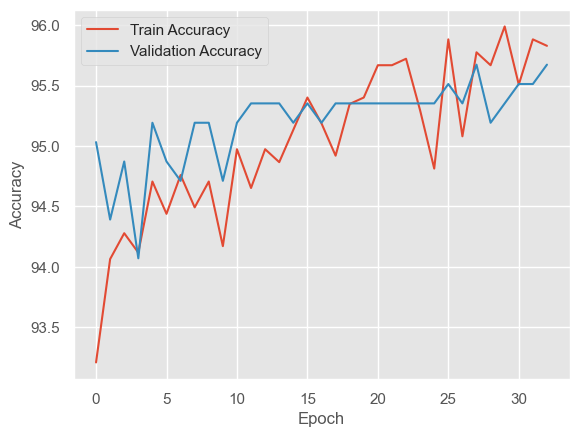

Best validation accuracy: 95.67307692307692
Accuracy: 0.969551282051282
Confusion Matrix:
[[222   3   0]
 [  3 195   5]
 [  4   4 188]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'Basic Natural Scene Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.969551282051282, 'Training Time (s)': 2210.591665506363}


  1%|▊                                                                               | 1/100 [01:29<2:26:52, 89.01s/it]

Epoch 1/100, Train Acc: 91.81818181818181, Val Acc: 94.07051282051282


  2%|█▌                                                                              | 2/100 [02:57<2:24:54, 88.71s/it]

Epoch 2/100, Train Acc: 92.29946524064171, Val Acc: 94.23076923076923


  3%|██▍                                                                             | 3/100 [04:25<2:22:54, 88.40s/it]

Epoch 3/100, Train Acc: 93.36898395721926, Val Acc: 94.39102564102564


  4%|███▏                                                                            | 4/100 [05:53<2:21:07, 88.21s/it]

Epoch 4/100, Train Acc: 92.56684491978609, Val Acc: 93.91025641025641


  5%|████                                                                            | 5/100 [07:21<2:19:37, 88.19s/it]

Epoch 5/100, Train Acc: 92.51336898395722, Val Acc: 94.07051282051282


  6%|████▊                                                                           | 6/100 [08:49<2:18:09, 88.18s/it]

Epoch 6/100, Train Acc: 92.62032085561498, Val Acc: 94.55128205128206


  7%|█████▌                                                                          | 7/100 [10:17<2:16:39, 88.17s/it]

Epoch 7/100, Train Acc: 92.45989304812834, Val Acc: 94.07051282051282


  8%|██████▍                                                                         | 8/100 [11:46<2:15:24, 88.31s/it]

Epoch 8/100, Train Acc: 93.15508021390374, Val Acc: 94.55128205128206


  9%|███████▏                                                                        | 9/100 [13:15<2:14:02, 88.38s/it]

Epoch 9/100, Train Acc: 92.45989304812834, Val Acc: 94.55128205128206


 10%|███████▉                                                                       | 10/100 [14:43<2:12:38, 88.42s/it]

Epoch 10/100, Train Acc: 94.06417112299465, Val Acc: 94.39102564102564


 11%|████████▋                                                                      | 11/100 [16:11<2:11:08, 88.41s/it]

Epoch 11/100, Train Acc: 92.72727272727273, Val Acc: 94.71153846153847


 12%|█████████▍                                                                     | 12/100 [17:40<2:09:45, 88.47s/it]

Epoch 12/100, Train Acc: 93.68983957219251, Val Acc: 94.55128205128206


 13%|██████████▎                                                                    | 13/100 [19:09<2:08:33, 88.66s/it]

Epoch 13/100, Train Acc: 92.72727272727273, Val Acc: 94.87179487179488


 14%|███████████                                                                    | 14/100 [20:38<2:07:15, 88.78s/it]

Epoch 14/100, Train Acc: 92.7807486631016, Val Acc: 94.71153846153847


 15%|███████████▊                                                                   | 15/100 [22:07<2:05:37, 88.68s/it]

Epoch 15/100, Train Acc: 92.94117647058823, Val Acc: 95.03205128205128


 16%|████████████▋                                                                  | 16/100 [23:35<2:04:10, 88.69s/it]

Epoch 16/100, Train Acc: 93.31550802139037, Val Acc: 94.55128205128206


 17%|█████████████▍                                                                 | 17/100 [25:04<2:02:49, 88.79s/it]

Epoch 17/100, Train Acc: 92.67379679144385, Val Acc: 94.71153846153847


 18%|██████████████▏                                                                | 18/100 [26:33<2:01:23, 88.83s/it]

Epoch 18/100, Train Acc: 92.99465240641712, Val Acc: 94.55128205128206


 19%|███████████████                                                                | 19/100 [28:02<1:59:53, 88.81s/it]

Epoch 19/100, Train Acc: 93.475935828877, Val Acc: 94.87179487179488


 20%|███████████████▊                                                               | 20/100 [29:31<1:58:26, 88.83s/it]

Epoch 20/100, Train Acc: 93.475935828877, Val Acc: 94.87179487179488


 21%|████████████████▌                                                              | 21/100 [31:00<1:56:58, 88.84s/it]

Epoch 21/100, Train Acc: 93.475935828877, Val Acc: 94.71153846153847


 22%|█████████████████▍                                                             | 22/100 [32:29<1:55:28, 88.83s/it]

Epoch 22/100, Train Acc: 93.90374331550802, Val Acc: 94.39102564102564


 23%|██████████████████▏                                                            | 23/100 [33:58<1:54:02, 88.86s/it]

Epoch 23/100, Train Acc: 93.36898395721926, Val Acc: 94.71153846153847


 24%|██████████████████▉                                                            | 24/100 [35:27<1:52:45, 89.01s/it]

Epoch 24/100, Train Acc: 93.36898395721926, Val Acc: 95.03205128205128


 25%|███████████████████▊                                                           | 25/100 [36:56<1:51:27, 89.16s/it]

Epoch 25/100, Train Acc: 93.20855614973262, Val Acc: 95.1923076923077


 26%|████████████████████▌                                                          | 26/100 [38:26<1:49:58, 89.16s/it]

Epoch 26/100, Train Acc: 92.88770053475936, Val Acc: 94.55128205128206


 27%|█████████████████████▎                                                         | 27/100 [39:54<1:48:11, 88.93s/it]

Epoch 27/100, Train Acc: 93.7433155080214, Val Acc: 95.3525641025641


 28%|██████████████████████                                                         | 28/100 [41:23<1:46:42, 88.93s/it]

Epoch 28/100, Train Acc: 93.68983957219251, Val Acc: 95.03205128205128


 29%|██████████████████████▉                                                        | 29/100 [42:52<1:45:09, 88.86s/it]

Epoch 29/100, Train Acc: 93.68983957219251, Val Acc: 95.03205128205128


 30%|███████████████████████▋                                                       | 30/100 [44:21<1:43:45, 88.93s/it]

Epoch 30/100, Train Acc: 94.11764705882354, Val Acc: 94.87179487179488


 31%|████████████████████████▍                                                      | 31/100 [45:49<1:42:06, 88.80s/it]

Epoch 31/100, Train Acc: 93.68983957219251, Val Acc: 95.03205128205128


 31%|████████████████████████▍                                                      | 31/100 [47:18<1:45:18, 91.58s/it]

Epoch 32/100, Train Acc: 93.31550802139037, Val Acc: 94.87179487179488
Early stopping triggered at epoch 32


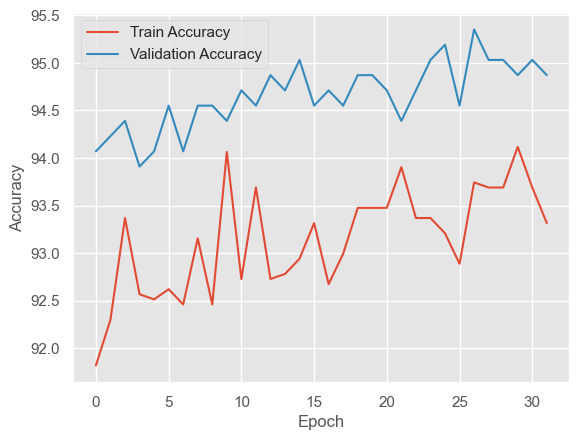

Best validation accuracy: 95.3525641025641
Accuracy: 0.9583333333333334
Confusion Matrix:
[[223   2   0]
 [ 10 187   6]
 [  5   3 188]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'Advanced Realism Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9583333333333334, 'Training Time (s)': 2839.8305990695953}


  1%|▊                                                                               | 1/100 [01:27<2:24:56, 87.85s/it]

Epoch 1/100, Train Acc: 88.50267379679144, Val Acc: 95.03205128205128


  2%|█▌                                                                              | 2/100 [02:55<2:23:14, 87.70s/it]

Epoch 2/100, Train Acc: 89.73262032085562, Val Acc: 95.03205128205128


  3%|██▍                                                                             | 3/100 [04:23<2:22:01, 87.85s/it]

Epoch 3/100, Train Acc: 89.62566844919786, Val Acc: 94.23076923076923


  4%|███▏                                                                            | 4/100 [05:51<2:20:43, 87.95s/it]

Epoch 4/100, Train Acc: 89.3048128342246, Val Acc: 94.87179487179488


  5%|████                                                                            | 5/100 [07:19<2:19:19, 88.00s/it]

Epoch 5/100, Train Acc: 90.53475935828877, Val Acc: 95.1923076923077


  6%|████▊                                                                           | 6/100 [08:47<2:17:51, 87.99s/it]

Epoch 6/100, Train Acc: 89.78609625668449, Val Acc: 94.87179487179488


  7%|█████▌                                                                          | 7/100 [10:15<2:16:13, 87.88s/it]

Epoch 7/100, Train Acc: 90.0, Val Acc: 94.23076923076923


  8%|██████▍                                                                         | 8/100 [11:42<2:14:29, 87.71s/it]

Epoch 8/100, Train Acc: 89.5187165775401, Val Acc: 95.03205128205128


  9%|███████▏                                                                        | 9/100 [13:10<2:13:05, 87.76s/it]

Epoch 9/100, Train Acc: 89.89304812834224, Val Acc: 94.07051282051282


 10%|███████▉                                                                       | 10/100 [14:38<2:11:47, 87.86s/it]

Epoch 10/100, Train Acc: 91.28342245989305, Val Acc: 95.03205128205128


 11%|████████▋                                                                      | 11/100 [16:06<2:10:23, 87.90s/it]

Epoch 11/100, Train Acc: 89.89304812834224, Val Acc: 93.91025641025641


 12%|█████████▍                                                                     | 12/100 [17:34<2:08:43, 87.77s/it]

Epoch 12/100, Train Acc: 89.73262032085562, Val Acc: 94.23076923076923


 13%|██████████▎                                                                    | 13/100 [19:01<2:07:19, 87.82s/it]

Epoch 13/100, Train Acc: 90.21390374331551, Val Acc: 95.3525641025641


 14%|███████████                                                                    | 14/100 [20:30<2:06:09, 88.02s/it]

Epoch 14/100, Train Acc: 90.64171122994652, Val Acc: 94.23076923076923


 15%|███████████▊                                                                   | 15/100 [21:58<2:04:37, 87.97s/it]

Epoch 15/100, Train Acc: 90.37433155080214, Val Acc: 94.23076923076923


 16%|████████████▋                                                                  | 16/100 [23:26<2:03:16, 88.05s/it]

Epoch 16/100, Train Acc: 90.85561497326204, Val Acc: 94.71153846153847


 17%|█████████████▍                                                                 | 17/100 [24:55<2:02:00, 88.20s/it]

Epoch 17/100, Train Acc: 90.96256684491979, Val Acc: 94.07051282051282


 18%|██████████████▏                                                                | 18/100 [26:23<2:00:39, 88.28s/it]

Epoch 18/100, Train Acc: 91.33689839572193, Val Acc: 94.55128205128206


 19%|███████████████                                                                | 19/100 [27:51<1:59:06, 88.23s/it]

Epoch 19/100, Train Acc: 90.37433155080214, Val Acc: 94.07051282051282


 20%|███████████████▊                                                               | 20/100 [29:19<1:57:26, 88.09s/it]

Epoch 20/100, Train Acc: 90.0, Val Acc: 94.07051282051282


 21%|████████████████▌                                                              | 21/100 [30:47<1:56:07, 88.20s/it]

Epoch 21/100, Train Acc: 90.9090909090909, Val Acc: 94.07051282051282


 22%|█████████████████▍                                                             | 22/100 [32:15<1:54:32, 88.11s/it]

Epoch 22/100, Train Acc: 90.53475935828877, Val Acc: 94.87179487179488


 23%|██████████████████▏                                                            | 23/100 [33:43<1:53:01, 88.08s/it]

Epoch 23/100, Train Acc: 90.32085561497327, Val Acc: 93.42948717948718


 24%|██████████████████▉                                                            | 24/100 [35:12<1:51:37, 88.12s/it]

Epoch 24/100, Train Acc: 90.42780748663101, Val Acc: 94.39102564102564


 25%|███████████████████▊                                                           | 25/100 [36:40<1:50:22, 88.30s/it]

Epoch 25/100, Train Acc: 91.17647058823529, Val Acc: 95.1923076923077


 26%|████████████████████▌                                                          | 26/100 [38:09<1:48:54, 88.30s/it]

Epoch 26/100, Train Acc: 90.96256684491979, Val Acc: 93.58974358974359


 26%|████████████████████▌                                                          | 26/100 [39:36<1:52:45, 91.42s/it]

Epoch 27/100, Train Acc: 91.33689839572193, Val Acc: 94.23076923076923
Early stopping triggered at epoch 27


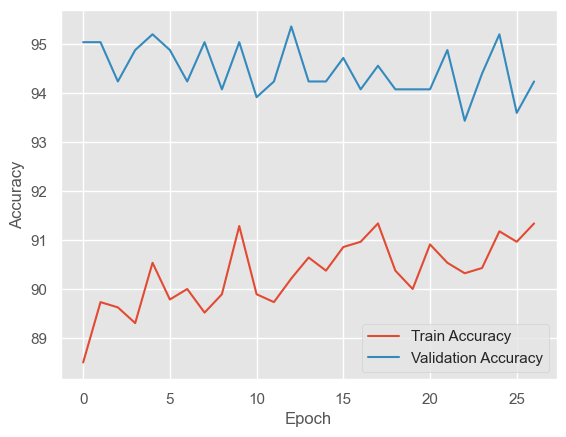

Best validation accuracy: 95.3525641025641
Accuracy: 0.9647435897435898
Confusion Matrix:
[[222   2   1]
 [  6 191   6]
 [  2   5 189]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'Comprehensive Environmental Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9647435897435898, 'Training Time (s)': 2377.8686468601227}


  1%|▊                                                                                 | 1/100 [00:25<41:46, 25.32s/it]

Epoch 1/100, Train Acc: 95.8288770053476, Val Acc: 95.03205128205128


  2%|█▋                                                                                | 2/100 [00:50<41:23, 25.34s/it]

Epoch 2/100, Train Acc: 96.36363636363636, Val Acc: 94.23076923076923


  3%|██▍                                                                               | 3/100 [01:16<41:03, 25.39s/it]

Epoch 3/100, Train Acc: 96.31016042780749, Val Acc: 94.55128205128206


  4%|███▎                                                                              | 4/100 [01:41<40:40, 25.42s/it]

Epoch 4/100, Train Acc: 96.63101604278074, Val Acc: 95.03205128205128


  5%|████                                                                              | 5/100 [02:07<40:16, 25.43s/it]

Epoch 5/100, Train Acc: 96.47058823529412, Val Acc: 94.07051282051282


  6%|████▉                                                                             | 6/100 [02:32<39:53, 25.46s/it]

Epoch 6/100, Train Acc: 96.7379679144385, Val Acc: 94.23076923076923


  7%|█████▋                                                                            | 7/100 [02:58<39:37, 25.56s/it]

Epoch 7/100, Train Acc: 96.89839572192513, Val Acc: 95.3525641025641


  8%|██████▌                                                                           | 8/100 [03:24<39:16, 25.62s/it]

Epoch 8/100, Train Acc: 96.7379679144385, Val Acc: 94.39102564102564


  9%|███████▍                                                                          | 9/100 [03:49<38:51, 25.62s/it]

Epoch 9/100, Train Acc: 96.84491978609626, Val Acc: 94.23076923076923


 10%|████████                                                                         | 10/100 [04:15<38:28, 25.65s/it]

Epoch 10/100, Train Acc: 97.00534759358288, Val Acc: 94.71153846153847


 11%|████████▉                                                                        | 11/100 [04:41<38:03, 25.66s/it]

Epoch 11/100, Train Acc: 96.84491978609626, Val Acc: 94.23076923076923


 12%|█████████▋                                                                       | 12/100 [05:06<37:36, 25.65s/it]

Epoch 12/100, Train Acc: 97.00534759358288, Val Acc: 93.91025641025641


 13%|██████████▌                                                                      | 13/100 [05:32<37:15, 25.70s/it]

Epoch 13/100, Train Acc: 97.32620320855615, Val Acc: 94.55128205128206


 14%|███████████▎                                                                     | 14/100 [05:58<36:46, 25.66s/it]

Epoch 14/100, Train Acc: 96.84491978609626, Val Acc: 93.42948717948718


 15%|████████████▏                                                                    | 15/100 [06:23<36:23, 25.69s/it]

Epoch 15/100, Train Acc: 97.43315508021391, Val Acc: 94.71153846153847


 16%|████████████▉                                                                    | 16/100 [06:49<35:57, 25.69s/it]

Epoch 16/100, Train Acc: 97.43315508021391, Val Acc: 94.87179487179488


 17%|█████████████▊                                                                   | 17/100 [07:15<35:33, 25.70s/it]

Epoch 17/100, Train Acc: 97.54010695187166, Val Acc: 94.71153846153847


 18%|██████████████▌                                                                  | 18/100 [07:40<35:06, 25.69s/it]

Epoch 18/100, Train Acc: 97.37967914438502, Val Acc: 94.55128205128206


 19%|███████████████▍                                                                 | 19/100 [08:06<34:38, 25.66s/it]

Epoch 19/100, Train Acc: 97.48663101604278, Val Acc: 95.03205128205128


 20%|████████████████▏                                                                | 20/100 [08:32<34:17, 25.72s/it]

Epoch 20/100, Train Acc: 97.37967914438502, Val Acc: 95.03205128205128


 21%|█████████████████                                                                | 21/100 [08:58<33:53, 25.75s/it]

Epoch 21/100, Train Acc: 97.59358288770053, Val Acc: 95.67307692307692


 22%|█████████████████▊                                                               | 22/100 [09:24<33:32, 25.80s/it]

Epoch 22/100, Train Acc: 97.16577540106952, Val Acc: 94.55128205128206


 23%|██████████████████▋                                                              | 23/100 [09:49<33:04, 25.78s/it]

Epoch 23/100, Train Acc: 97.37967914438502, Val Acc: 94.87179487179488


 24%|███████████████████▍                                                             | 24/100 [10:15<32:35, 25.73s/it]

Epoch 24/100, Train Acc: 96.68449197860963, Val Acc: 94.23076923076923


 25%|████████████████████▎                                                            | 25/100 [10:41<32:10, 25.74s/it]

Epoch 25/100, Train Acc: 97.48663101604278, Val Acc: 95.3525641025641


 26%|█████████████████████                                                            | 26/100 [11:06<31:43, 25.73s/it]

Epoch 26/100, Train Acc: 97.43315508021391, Val Acc: 95.03205128205128


 26%|█████████████████████                                                            | 26/100 [11:32<32:51, 26.64s/it]

Epoch 27/100, Train Acc: 97.86096256684492, Val Acc: 95.67307692307692
Early stopping triggered at epoch 27


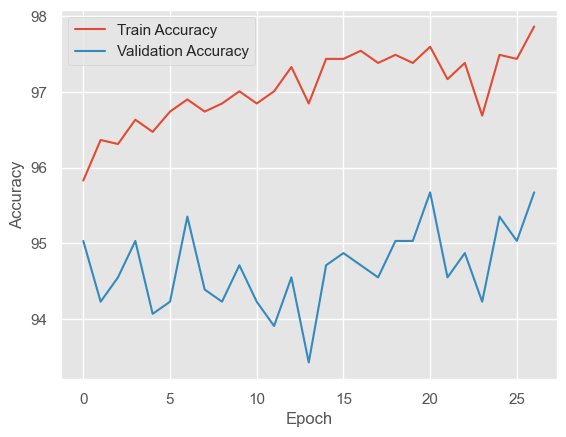

Best validation accuracy: 95.67307692307692
Accuracy: 0.9631410256410257
Confusion Matrix:
[[218   5   2]
 [  2 196   5]
 [  3   6 187]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9631410256410257, 'Training Time (s)': 693.5590949058533}


  1%|▊                                                                               | 1/100 [01:30<2:29:23, 90.54s/it]

Epoch 1/100, Train Acc: 88.02139037433155, Val Acc: 95.1923076923077


  2%|█▌                                                                              | 2/100 [02:59<2:26:48, 89.88s/it]

Epoch 2/100, Train Acc: 90.05347593582887, Val Acc: 94.71153846153847


  3%|██▍                                                                             | 3/100 [04:28<2:24:22, 89.30s/it]

Epoch 3/100, Train Acc: 90.05347593582887, Val Acc: 93.10897435897436


  4%|███▏                                                                            | 4/100 [05:56<2:22:18, 88.95s/it]

Epoch 4/100, Train Acc: 90.58823529411765, Val Acc: 93.10897435897436


  5%|████                                                                            | 5/100 [07:25<2:20:35, 88.80s/it]

Epoch 5/100, Train Acc: 90.80213903743315, Val Acc: 93.91025641025641


  6%|████▊                                                                           | 6/100 [08:53<2:18:51, 88.63s/it]

Epoch 6/100, Train Acc: 89.73262032085562, Val Acc: 94.39102564102564


  7%|█████▌                                                                          | 7/100 [10:21<2:17:06, 88.45s/it]

Epoch 7/100, Train Acc: 90.26737967914438, Val Acc: 92.46794871794872


  8%|██████▍                                                                         | 8/100 [11:50<2:15:35, 88.43s/it]

Epoch 8/100, Train Acc: 90.42780748663101, Val Acc: 92.94871794871794


  9%|███████▏                                                                        | 9/100 [13:18<2:13:56, 88.31s/it]

Epoch 9/100, Train Acc: 91.06951871657753, Val Acc: 93.75


 10%|███████▉                                                                       | 10/100 [14:46<2:12:35, 88.39s/it]

Epoch 10/100, Train Acc: 90.85561497326204, Val Acc: 94.23076923076923


 11%|████████▋                                                                      | 11/100 [16:15<2:11:00, 88.32s/it]

Epoch 11/100, Train Acc: 91.71122994652407, Val Acc: 93.75


 12%|█████████▍                                                                     | 12/100 [17:43<2:09:39, 88.40s/it]

Epoch 12/100, Train Acc: 89.62566844919786, Val Acc: 92.94871794871794


 13%|██████████▎                                                                    | 13/100 [19:11<2:08:03, 88.32s/it]

Epoch 13/100, Train Acc: 89.57219251336899, Val Acc: 92.46794871794872


 14%|███████████                                                                    | 14/100 [20:40<2:06:39, 88.36s/it]

Epoch 14/100, Train Acc: 91.71122994652407, Val Acc: 94.87179487179488


 15%|███████████▊                                                                   | 15/100 [22:08<2:05:07, 88.32s/it]

Epoch 15/100, Train Acc: 92.0855614973262, Val Acc: 93.91025641025641


 16%|████████████▋                                                                  | 16/100 [23:36<2:03:27, 88.18s/it]

Epoch 16/100, Train Acc: 90.05347593582887, Val Acc: 93.58974358974359


 17%|█████████████▍                                                                 | 17/100 [25:05<2:02:16, 88.39s/it]

Epoch 17/100, Train Acc: 90.74866310160428, Val Acc: 93.10897435897436


 18%|██████████████▏                                                                | 18/100 [26:33<2:00:47, 88.38s/it]

Epoch 18/100, Train Acc: 90.4812834224599, Val Acc: 93.91025641025641


 19%|███████████████                                                                | 19/100 [28:02<1:59:20, 88.40s/it]

Epoch 19/100, Train Acc: 92.03208556149733, Val Acc: 94.39102564102564


 20%|███████████████▊                                                               | 20/100 [29:29<1:57:41, 88.26s/it]

Epoch 20/100, Train Acc: 91.17647058823529, Val Acc: 94.55128205128206


 21%|████████████████▌                                                              | 21/100 [30:57<1:56:07, 88.20s/it]

Epoch 21/100, Train Acc: 91.22994652406418, Val Acc: 94.39102564102564


 22%|█████████████████▍                                                             | 22/100 [32:26<1:54:36, 88.16s/it]

Epoch 22/100, Train Acc: 91.28342245989305, Val Acc: 93.75


 23%|██████████████████▏                                                            | 23/100 [33:54<1:53:20, 88.32s/it]

Epoch 23/100, Train Acc: 91.12299465240642, Val Acc: 93.91025641025641


 24%|██████████████████▉                                                            | 24/100 [35:23<1:51:50, 88.30s/it]

Epoch 24/100, Train Acc: 91.28342245989305, Val Acc: 95.03205128205128


 25%|███████████████████▊                                                           | 25/100 [36:51<1:50:25, 88.34s/it]

Epoch 25/100, Train Acc: 91.17647058823529, Val Acc: 94.55128205128206


 26%|████████████████████▌                                                          | 26/100 [38:19<1:48:55, 88.31s/it]

Epoch 26/100, Train Acc: 91.12299465240642, Val Acc: 95.03205128205128


 26%|████████████████████▌                                                          | 26/100 [39:48<1:53:16, 91.85s/it]

Epoch 27/100, Train Acc: 90.80213903743315, Val Acc: 94.55128205128206
Early stopping triggered at epoch 27


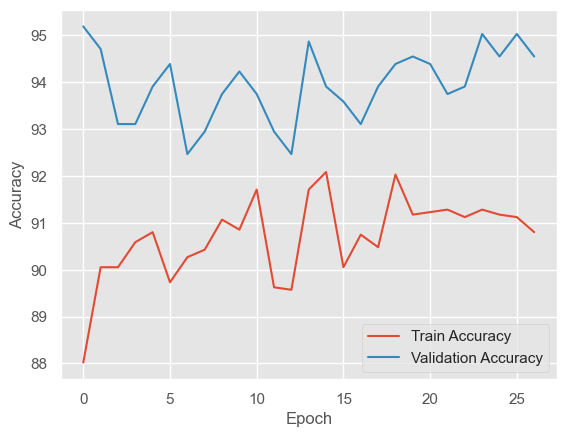

Best validation accuracy: 95.1923076923077
Accuracy: 0.9519230769230769
Confusion Matrix:
[[222   3   0]
 [  8 188   7]
 [  6   6 184]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'omprehensive Environmental Augmentation & mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9519230769230769, 'Training Time (s)': 2388.9996299743652}


  1%|▊                                                                                 | 1/100 [00:25<41:50, 25.35s/it]

Epoch 1/100, Train Acc: 46.36363636363637, Val Acc: 51.12179487179487


  2%|█▋                                                                                | 2/100 [00:50<41:30, 25.41s/it]

Epoch 2/100, Train Acc: 51.283422459893046, Val Acc: 53.52564102564103


  3%|██▍                                                                               | 3/100 [01:16<41:07, 25.44s/it]

Epoch 3/100, Train Acc: 55.3475935828877, Val Acc: 56.73076923076923


  4%|███▎                                                                              | 4/100 [01:41<40:43, 25.45s/it]

Epoch 4/100, Train Acc: 42.99465240641711, Val Acc: 44.07051282051282


  5%|████                                                                              | 5/100 [02:07<40:18, 25.46s/it]

Epoch 5/100, Train Acc: 35.026737967914436, Val Acc: 37.01923076923077


  6%|████▉                                                                             | 6/100 [02:32<39:53, 25.47s/it]

Epoch 6/100, Train Acc: 41.336898395721924, Val Acc: 43.91025641025641


  7%|█████▋                                                                            | 7/100 [02:58<39:33, 25.52s/it]

Epoch 7/100, Train Acc: 31.818181818181817, Val Acc: 33.81410256410256


  8%|██████▌                                                                           | 8/100 [03:23<39:11, 25.56s/it]

Epoch 8/100, Train Acc: 44.49197860962567, Val Acc: 46.47435897435897


  9%|███████▍                                                                          | 9/100 [03:49<38:45, 25.56s/it]

Epoch 9/100, Train Acc: 46.0427807486631, Val Acc: 45.993589743589745


 10%|████████                                                                         | 10/100 [04:15<38:20, 25.56s/it]

Epoch 10/100, Train Acc: 43.529411764705884, Val Acc: 42.94871794871795


 11%|████████▉                                                                        | 11/100 [04:40<37:56, 25.57s/it]

Epoch 11/100, Train Acc: 43.36898395721925, Val Acc: 44.55128205128205


 12%|█████████▋                                                                       | 12/100 [05:06<37:30, 25.57s/it]

Epoch 12/100, Train Acc: 43.63636363636363, Val Acc: 44.87179487179487


 13%|██████████▌                                                                      | 13/100 [05:31<37:05, 25.59s/it]

Epoch 13/100, Train Acc: 45.080213903743314, Val Acc: 45.51282051282051


 14%|███████████▎                                                                     | 14/100 [05:57<36:40, 25.58s/it]

Epoch 14/100, Train Acc: 40.53475935828877, Val Acc: 41.506410256410255


 15%|████████████▏                                                                    | 15/100 [06:23<36:14, 25.58s/it]

Epoch 15/100, Train Acc: 40.160427807486634, Val Acc: 41.506410256410255


 16%|████████████▉                                                                    | 16/100 [06:48<35:48, 25.58s/it]

Epoch 16/100, Train Acc: 40.37433155080214, Val Acc: 41.506410256410255


 17%|█████████████▊                                                                   | 17/100 [07:14<35:24, 25.59s/it]

Epoch 17/100, Train Acc: 32.032085561497325, Val Acc: 32.05128205128205


 18%|██████████████▌                                                                  | 18/100 [07:39<34:59, 25.60s/it]

Epoch 18/100, Train Acc: 40.26737967914438, Val Acc: 41.98717948717949


 19%|███████████████▍                                                                 | 19/100 [08:05<34:30, 25.56s/it]

Epoch 19/100, Train Acc: 43.58288770053476, Val Acc: 42.1474358974359


 20%|████████████████▏                                                                | 20/100 [08:30<34:05, 25.57s/it]

Epoch 20/100, Train Acc: 40.05347593582888, Val Acc: 41.82692307692308


 21%|█████████████████                                                                | 21/100 [08:56<33:41, 25.59s/it]

Epoch 21/100, Train Acc: 41.06951871657754, Val Acc: 41.666666666666664


 22%|█████████████████▊                                                               | 22/100 [09:22<33:18, 25.62s/it]

Epoch 22/100, Train Acc: 37.70053475935829, Val Acc: 39.583333333333336


 23%|██████████████████▋                                                              | 23/100 [09:47<32:52, 25.61s/it]

Epoch 23/100, Train Acc: 40.53475935828877, Val Acc: 40.38461538461539


 24%|███████████████████▍                                                             | 24/100 [10:13<32:25, 25.60s/it]

Epoch 24/100, Train Acc: 39.94652406417112, Val Acc: 39.583333333333336


 25%|████████████████████▎                                                            | 25/100 [10:38<31:59, 25.59s/it]

Epoch 25/100, Train Acc: 38.663101604278076, Val Acc: 40.06410256410256


 26%|█████████████████████                                                            | 26/100 [11:04<31:33, 25.59s/it]

Epoch 26/100, Train Acc: 38.77005347593583, Val Acc: 39.42307692307692


 26%|█████████████████████                                                            | 26/100 [11:30<32:44, 26.55s/it]

Epoch 27/100, Train Acc: 39.67914438502674, Val Acc: 40.06410256410256
Early stopping triggered at epoch 27


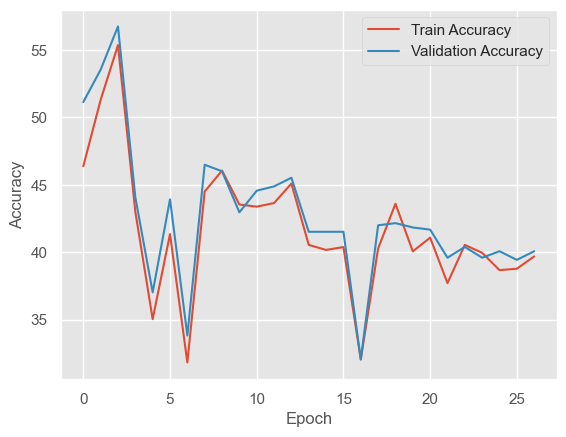

Best validation accuracy: 56.73076923076923
Accuracy: 0.5657051282051282
Confusion Matrix:
[[  0   0   0]
 [ 32 231  52]
 [  2 185 122]]


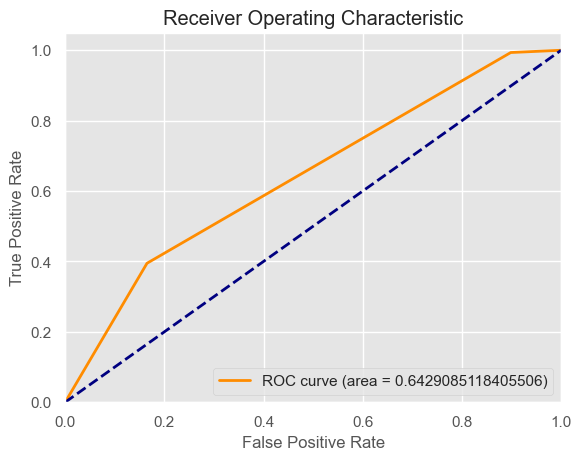

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5657051282051282, 'Training Time (s)': 691.3709506988525}


  1%|▊                                                                               | 1/100 [01:08<1:52:48, 68.37s/it]

Epoch 1/100, Train Acc: 40.855614973262036, Val Acc: 47.43589743589744


  2%|█▌                                                                              | 2/100 [02:15<1:50:24, 67.60s/it]

Epoch 2/100, Train Acc: 39.94652406417112, Val Acc: 46.47435897435897


  3%|██▍                                                                             | 3/100 [03:22<1:48:53, 67.36s/it]

Epoch 3/100, Train Acc: 29.946524064171122, Val Acc: 38.62179487179487


  4%|███▏                                                                            | 4/100 [04:29<1:47:27, 67.16s/it]

Epoch 4/100, Train Acc: 38.288770053475936, Val Acc: 45.67307692307692


  5%|████                                                                            | 5/100 [05:36<1:46:19, 67.16s/it]

Epoch 5/100, Train Acc: 36.68449197860963, Val Acc: 45.3525641025641


  6%|████▊                                                                           | 6/100 [06:43<1:45:07, 67.11s/it]

Epoch 6/100, Train Acc: 52.99465240641711, Val Acc: 54.80769230769231


  7%|█████▌                                                                          | 7/100 [07:50<1:43:52, 67.02s/it]

Epoch 7/100, Train Acc: 43.2620320855615, Val Acc: 49.03846153846154


  8%|██████▍                                                                         | 8/100 [08:57<1:42:52, 67.09s/it]

Epoch 8/100, Train Acc: 47.64705882352941, Val Acc: 51.6025641025641


  9%|███████▏                                                                        | 9/100 [10:04<1:41:40, 67.04s/it]

Epoch 9/100, Train Acc: 32.0855614973262, Val Acc: 41.82692307692308


 10%|███████▉                                                                       | 10/100 [11:11<1:40:24, 66.94s/it]

Epoch 10/100, Train Acc: 45.56149732620321, Val Acc: 49.83974358974359


 11%|████████▋                                                                      | 11/100 [12:18<1:39:17, 66.94s/it]

Epoch 11/100, Train Acc: 38.288770053475936, Val Acc: 45.67307692307692


 12%|█████████▍                                                                     | 12/100 [13:24<1:38:07, 66.90s/it]

Epoch 12/100, Train Acc: 40.53475935828877, Val Acc: 47.916666666666664


 13%|██████████▎                                                                    | 13/100 [14:32<1:37:05, 66.96s/it]

Epoch 13/100, Train Acc: 46.524064171122994, Val Acc: 49.35897435897436


 14%|███████████                                                                    | 14/100 [15:39<1:36:03, 67.02s/it]

Epoch 14/100, Train Acc: 36.470588235294116, Val Acc: 42.94871794871795


 15%|███████████▊                                                                   | 15/100 [16:45<1:34:49, 66.94s/it]

Epoch 15/100, Train Acc: 35.82887700534759, Val Acc: 41.98717948717949


 16%|████████████▋                                                                  | 16/100 [17:52<1:33:38, 66.89s/it]

Epoch 16/100, Train Acc: 42.62032085561497, Val Acc: 45.833333333333336


 17%|█████████████▍                                                                 | 17/100 [18:59<1:32:25, 66.82s/it]

Epoch 17/100, Train Acc: 42.19251336898396, Val Acc: 45.51282051282051


 18%|██████████████▏                                                                | 18/100 [20:06<1:31:26, 66.90s/it]

Epoch 18/100, Train Acc: 40.37433155080214, Val Acc: 44.71153846153846


 19%|███████████████                                                                | 19/100 [21:13<1:30:28, 67.02s/it]

Epoch 19/100, Train Acc: 39.839572192513366, Val Acc: 44.07051282051282


 20%|███████████████▊                                                               | 20/100 [22:21<1:29:35, 67.19s/it]

Epoch 20/100, Train Acc: 39.73262032085562, Val Acc: 44.71153846153846


 21%|████████████████▌                                                              | 21/100 [23:27<1:28:10, 66.97s/it]

Epoch 21/100, Train Acc: 42.67379679144385, Val Acc: 44.87179487179487


 22%|█████████████████▍                                                             | 22/100 [24:34<1:27:04, 66.98s/it]

Epoch 22/100, Train Acc: 40.37433155080214, Val Acc: 43.10897435897436


 23%|██████████████████▏                                                            | 23/100 [25:41<1:25:59, 67.01s/it]

Epoch 23/100, Train Acc: 37.9144385026738, Val Acc: 41.506410256410255


 24%|██████████████████▉                                                            | 24/100 [26:48<1:24:50, 66.98s/it]

Epoch 24/100, Train Acc: 42.35294117647059, Val Acc: 44.55128205128205


 25%|███████████████████▊                                                           | 25/100 [27:55<1:23:40, 66.94s/it]

Epoch 25/100, Train Acc: 36.7379679144385, Val Acc: 41.506410256410255


 26%|████████████████████▌                                                          | 26/100 [29:02<1:22:26, 66.84s/it]

Epoch 26/100, Train Acc: 42.032085561497325, Val Acc: 43.10897435897436


 26%|████████████████████▌                                                          | 26/100 [30:09<1:25:49, 69.58s/it]

Epoch 27/100, Train Acc: 38.98395721925134, Val Acc: 41.666666666666664
Early stopping triggered at epoch 27


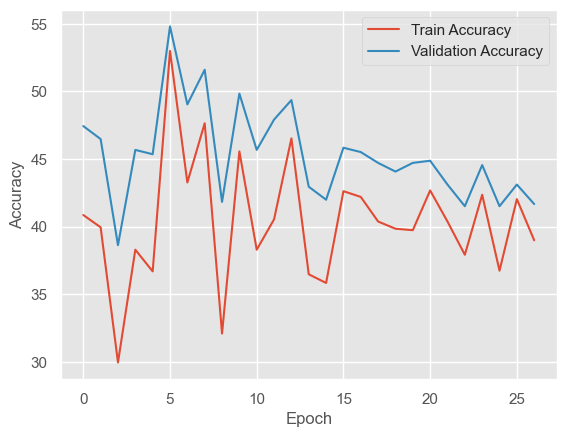

Best validation accuracy: 54.80769230769231
Accuracy: 0.5272435897435898
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  2  62 153  96   2]
 [  0   4 104 176  25]
 [  0   0   0   0   0]]


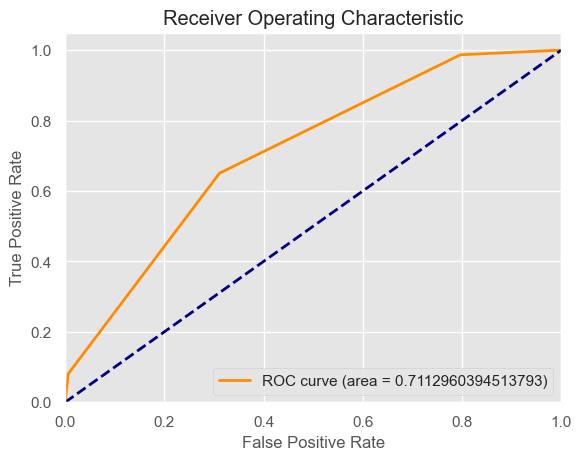

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'Basic Natural Scene Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5272435897435898, 'Training Time (s)': 1810.0944032669067}


  1%|▊                                                                               | 1/100 [01:30<2:29:30, 90.61s/it]

Epoch 1/100, Train Acc: 48.18181818181818, Val Acc: 51.12179487179487


  2%|█▌                                                                              | 2/100 [03:00<2:27:26, 90.27s/it]

Epoch 2/100, Train Acc: 41.8716577540107, Val Acc: 51.282051282051285


  3%|██▍                                                                             | 3/100 [04:29<2:25:10, 89.80s/it]

Epoch 3/100, Train Acc: 50.32085561497326, Val Acc: 50.96153846153846


  4%|███▏                                                                            | 4/100 [05:59<2:23:50, 89.91s/it]

Epoch 4/100, Train Acc: 45.45454545454545, Val Acc: 49.19871794871795


  5%|████                                                                            | 5/100 [07:29<2:22:08, 89.78s/it]

Epoch 5/100, Train Acc: 45.13368983957219, Val Acc: 48.717948717948715


  6%|████▊                                                                           | 6/100 [08:59<2:20:32, 89.70s/it]

Epoch 6/100, Train Acc: 41.49732620320856, Val Acc: 48.07692307692308


  7%|█████▌                                                                          | 7/100 [10:29<2:19:13, 89.83s/it]

Epoch 7/100, Train Acc: 48.02139037433155, Val Acc: 48.07692307692308


  8%|██████▍                                                                         | 8/100 [11:58<2:17:39, 89.78s/it]

Epoch 8/100, Train Acc: 40.37433155080214, Val Acc: 44.55128205128205


  9%|███████▏                                                                        | 9/100 [13:28<2:16:02, 89.70s/it]

Epoch 9/100, Train Acc: 37.32620320855615, Val Acc: 41.82692307692308


 10%|███████▉                                                                       | 10/100 [14:57<2:14:23, 89.59s/it]

Epoch 10/100, Train Acc: 44.01069518716577, Val Acc: 45.19230769230769


 11%|████████▋                                                                      | 11/100 [16:26<2:12:44, 89.49s/it]

Epoch 11/100, Train Acc: 35.98930481283423, Val Acc: 41.34615384615385


 12%|█████████▍                                                                     | 12/100 [17:56<2:11:07, 89.40s/it]

Epoch 12/100, Train Acc: 41.12299465240642, Val Acc: 43.75


 13%|██████████▎                                                                    | 13/100 [19:25<2:09:38, 89.41s/it]

Epoch 13/100, Train Acc: 41.3903743315508, Val Acc: 42.78846153846154


 14%|███████████                                                                    | 14/100 [20:56<2:08:48, 89.86s/it]

Epoch 14/100, Train Acc: 42.99465240641711, Val Acc: 41.666666666666664


 15%|███████████▊                                                                   | 15/100 [22:25<2:07:01, 89.66s/it]

Epoch 15/100, Train Acc: 35.3475935828877, Val Acc: 38.782051282051285


 16%|████████████▋                                                                  | 16/100 [23:55<2:05:30, 89.65s/it]

Epoch 16/100, Train Acc: 40.37433155080214, Val Acc: 41.82692307692308


 17%|█████████████▍                                                                 | 17/100 [25:24<2:03:55, 89.59s/it]

Epoch 17/100, Train Acc: 44.75935828877005, Val Acc: 43.10897435897436


 18%|██████████████▏                                                                | 18/100 [26:54<2:02:30, 89.63s/it]

Epoch 18/100, Train Acc: 44.919786096256686, Val Acc: 42.94871794871795


 19%|███████████████                                                                | 19/100 [28:24<2:00:58, 89.61s/it]

Epoch 19/100, Train Acc: 35.72192513368984, Val Acc: 38.94230769230769


 20%|███████████████▊                                                               | 20/100 [29:53<1:59:33, 89.67s/it]

Epoch 20/100, Train Acc: 36.20320855614973, Val Acc: 39.26282051282051


 21%|████████████████▌                                                              | 21/100 [31:23<1:58:07, 89.71s/it]

Epoch 21/100, Train Acc: 40.0, Val Acc: 41.34615384615385


 22%|█████████████████▍                                                             | 22/100 [32:53<1:56:38, 89.72s/it]

Epoch 22/100, Train Acc: 43.475935828877006, Val Acc: 41.82692307692308


 23%|██████████████████▏                                                            | 23/100 [34:23<1:55:10, 89.75s/it]

Epoch 23/100, Train Acc: 40.32085561497326, Val Acc: 41.82692307692308


 24%|██████████████████▉                                                            | 24/100 [35:52<1:53:40, 89.74s/it]

Epoch 24/100, Train Acc: 44.81283422459893, Val Acc: 43.10897435897436


 25%|███████████████████▊                                                           | 25/100 [37:22<1:52:00, 89.60s/it]

Epoch 25/100, Train Acc: 37.27272727272727, Val Acc: 39.90384615384615


 26%|████████████████████▌                                                          | 26/100 [38:51<1:50:25, 89.53s/it]

Epoch 26/100, Train Acc: 40.37433155080214, Val Acc: 40.86538461538461


 26%|████████████████████▌                                                          | 26/100 [40:21<1:54:51, 93.12s/it]

Epoch 27/100, Train Acc: 36.41711229946524, Val Acc: 37.17948717948718
Early stopping triggered at epoch 27


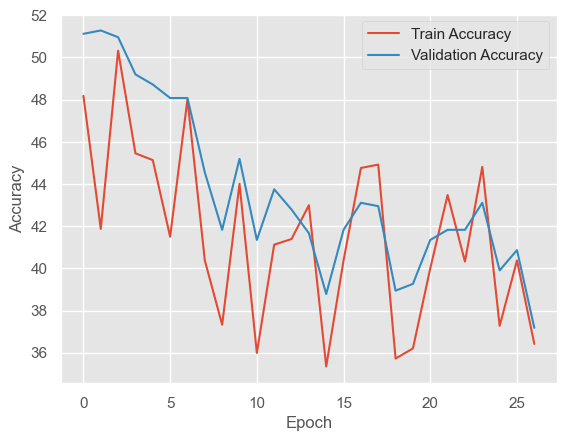

Best validation accuracy: 51.282051282051285
Accuracy: 0.4935897435897436
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  5  67 146  95   2]
 [  0   8 125 162  14]
 [  0   0   0   0   0]]


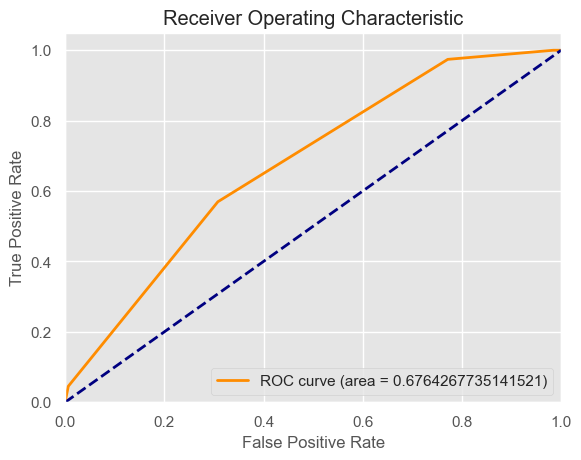

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'Advanced Realism Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.4935897435897436, 'Training Time (s)': 2422.1102917194366}


  1%|▊                                                                               | 1/100 [01:28<2:26:19, 88.69s/it]

Epoch 1/100, Train Acc: 45.45454545454545, Val Acc: 52.88461538461539


  2%|█▌                                                                              | 2/100 [02:57<2:24:46, 88.64s/it]

Epoch 2/100, Train Acc: 28.181818181818183, Val Acc: 44.23076923076923


  3%|██▍                                                                             | 3/100 [04:26<2:23:37, 88.84s/it]

Epoch 3/100, Train Acc: 39.786096256684495, Val Acc: 51.12179487179487


  4%|███▏                                                                            | 4/100 [05:55<2:22:06, 88.81s/it]

Epoch 4/100, Train Acc: 45.18716577540107, Val Acc: 52.083333333333336


  5%|████                                                                            | 5/100 [07:23<2:20:28, 88.72s/it]

Epoch 5/100, Train Acc: 46.31016042780749, Val Acc: 50.32051282051282


  6%|████▊                                                                           | 6/100 [08:52<2:19:15, 88.89s/it]

Epoch 6/100, Train Acc: 39.411764705882355, Val Acc: 51.6025641025641


  7%|█████▌                                                                          | 7/100 [10:22<2:17:55, 88.99s/it]

Epoch 7/100, Train Acc: 45.3475935828877, Val Acc: 50.64102564102564


  8%|██████▍                                                                         | 8/100 [11:50<2:16:14, 88.85s/it]

Epoch 8/100, Train Acc: 47.32620320855615, Val Acc: 50.0


  9%|███████▏                                                                        | 9/100 [13:19<2:14:43, 88.83s/it]

Epoch 9/100, Train Acc: 46.57754010695187, Val Acc: 49.67948717948718


 10%|███████▉                                                                       | 10/100 [14:48<2:13:19, 88.88s/it]

Epoch 10/100, Train Acc: 48.02139037433155, Val Acc: 48.87820512820513


 11%|████████▋                                                                      | 11/100 [16:17<2:11:42, 88.79s/it]

Epoch 11/100, Train Acc: 43.58288770053476, Val Acc: 50.32051282051282


 12%|█████████▍                                                                     | 12/100 [17:45<2:10:16, 88.83s/it]

Epoch 12/100, Train Acc: 39.037433155080215, Val Acc: 46.63461538461539


 13%|██████████▎                                                                    | 13/100 [19:14<2:08:50, 88.85s/it]

Epoch 13/100, Train Acc: 40.26737967914438, Val Acc: 46.31410256410256


 14%|███████████                                                                    | 14/100 [20:43<2:07:25, 88.90s/it]

Epoch 14/100, Train Acc: 41.76470588235294, Val Acc: 48.717948717948715


 15%|███████████▊                                                                   | 15/100 [22:13<2:06:07, 89.02s/it]

Epoch 15/100, Train Acc: 39.35828877005348, Val Acc: 46.794871794871796


 16%|████████████▋                                                                  | 16/100 [23:42<2:04:33, 88.97s/it]

Epoch 16/100, Train Acc: 45.026737967914436, Val Acc: 48.717948717948715


 17%|█████████████▍                                                                 | 17/100 [25:10<2:02:57, 88.88s/it]

Epoch 17/100, Train Acc: 36.149732620320854, Val Acc: 45.993589743589745


 18%|██████████████▏                                                                | 18/100 [26:39<2:01:19, 88.78s/it]

Epoch 18/100, Train Acc: 34.331550802139034, Val Acc: 43.58974358974359


 19%|███████████████                                                                | 19/100 [28:08<1:59:54, 88.83s/it]

Epoch 19/100, Train Acc: 26.951871657754012, Val Acc: 37.66025641025641


 20%|███████████████▊                                                               | 20/100 [29:36<1:58:18, 88.74s/it]

Epoch 20/100, Train Acc: 46.36363636363637, Val Acc: 46.31410256410256


 21%|████████████████▌                                                              | 21/100 [31:05<1:56:53, 88.78s/it]

Epoch 21/100, Train Acc: 47.54010695187166, Val Acc: 44.87179487179487


 22%|█████████████████▍                                                             | 22/100 [32:34<1:55:24, 88.78s/it]

Epoch 22/100, Train Acc: 40.05347593582888, Val Acc: 46.63461538461539


 23%|██████████████████▏                                                            | 23/100 [34:02<1:53:49, 88.70s/it]

Epoch 23/100, Train Acc: 43.2620320855615, Val Acc: 48.717948717948715


 24%|██████████████████▉                                                            | 24/100 [35:31<1:52:20, 88.69s/it]

Epoch 24/100, Train Acc: 36.7379679144385, Val Acc: 44.07051282051282


 25%|███████████████████▊                                                           | 25/100 [37:00<1:50:48, 88.64s/it]

Epoch 25/100, Train Acc: 44.54545454545455, Val Acc: 47.27564102564103


 26%|████████████████████▌                                                          | 26/100 [38:28<1:49:21, 88.66s/it]

Epoch 26/100, Train Acc: 38.288770053475936, Val Acc: 44.55128205128205


 26%|████████████████████▌                                                          | 26/100 [39:57<1:53:42, 92.20s/it]

Epoch 27/100, Train Acc: 44.49197860962567, Val Acc: 45.67307692307692
Early stopping triggered at epoch 27


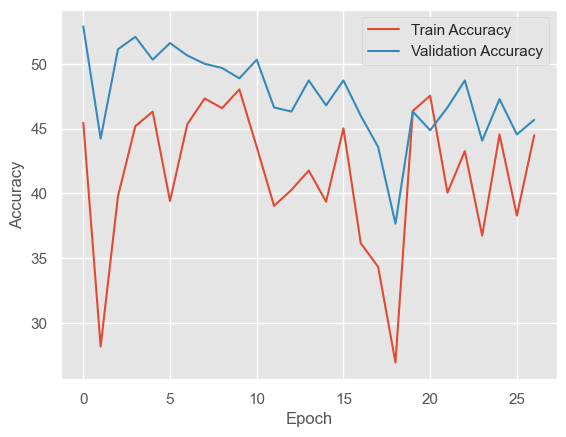

Best validation accuracy: 52.88461538461539
Accuracy: 0.5176282051282052
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  3  44 155 109   4]
 [  0   4 112 168  25]
 [  0   0   0   0   0]]


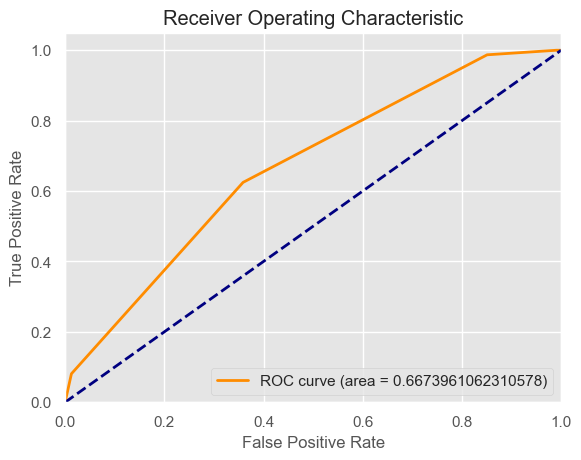

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'Comprehensive Environmental Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5176282051282052, 'Training Time (s)': 2398.2169120311737}


  1%|▊                                                                                 | 1/100 [00:25<42:11, 25.57s/it]

Epoch 1/100, Train Acc: 33.2620320855615, Val Acc: 35.416666666666664


  2%|█▋                                                                                | 2/100 [00:50<41:36, 25.48s/it]

Epoch 2/100, Train Acc: 33.20855614973262, Val Acc: 33.81410256410256


  3%|██▍                                                                               | 3/100 [01:16<41:10, 25.47s/it]

Epoch 3/100, Train Acc: 29.78609625668449, Val Acc: 30.128205128205128


  4%|███▎                                                                              | 4/100 [01:41<40:46, 25.48s/it]

Epoch 4/100, Train Acc: 31.016042780748663, Val Acc: 32.05128205128205


  5%|████                                                                              | 5/100 [02:07<40:20, 25.48s/it]

Epoch 5/100, Train Acc: 33.04812834224599, Val Acc: 34.13461538461539


  6%|████▉                                                                             | 6/100 [02:33<40:01, 25.55s/it]

Epoch 6/100, Train Acc: 40.37433155080214, Val Acc: 40.705128205128204


  7%|█████▋                                                                            | 7/100 [02:58<39:45, 25.65s/it]

Epoch 7/100, Train Acc: 43.155080213903744, Val Acc: 41.98717948717949


  8%|██████▌                                                                           | 8/100 [03:24<39:20, 25.66s/it]

Epoch 8/100, Train Acc: 29.67914438502674, Val Acc: 30.44871794871795


  9%|███████▍                                                                          | 9/100 [03:50<38:56, 25.67s/it]

Epoch 9/100, Train Acc: 37.75401069518717, Val Acc: 39.26282051282051


 10%|████████                                                                         | 10/100 [04:15<38:29, 25.66s/it]

Epoch 10/100, Train Acc: 34.81283422459893, Val Acc: 37.01923076923077


 11%|████████▉                                                                        | 11/100 [04:41<38:04, 25.67s/it]

Epoch 11/100, Train Acc: 28.39572192513369, Val Acc: 28.205128205128204


 12%|█████████▋                                                                       | 12/100 [05:07<37:37, 25.65s/it]

Epoch 12/100, Train Acc: 35.775401069518715, Val Acc: 34.77564102564103


 13%|██████████▌                                                                      | 13/100 [05:32<37:12, 25.66s/it]

Epoch 13/100, Train Acc: 35.98930481283423, Val Acc: 36.05769230769231


 14%|███████████▎                                                                     | 14/100 [05:58<36:45, 25.64s/it]

Epoch 14/100, Train Acc: 34.598930481283425, Val Acc: 34.61538461538461


 15%|████████████▏                                                                    | 15/100 [06:24<36:20, 25.65s/it]

Epoch 15/100, Train Acc: 36.0427807486631, Val Acc: 35.416666666666664


 16%|████████████▉                                                                    | 16/100 [06:49<35:57, 25.69s/it]

Epoch 16/100, Train Acc: 36.25668449197861, Val Acc: 36.69871794871795


 17%|█████████████▊                                                                   | 17/100 [07:15<35:32, 25.70s/it]

Epoch 17/100, Train Acc: 25.614973262032084, Val Acc: 25.641025641025642


 18%|██████████████▌                                                                  | 18/100 [07:41<35:04, 25.67s/it]

Epoch 18/100, Train Acc: 31.016042780748663, Val Acc: 30.608974358974358


 19%|███████████████▍                                                                 | 19/100 [08:06<34:37, 25.65s/it]

Epoch 19/100, Train Acc: 40.80213903743316, Val Acc: 41.506410256410255


 20%|████████████████▏                                                                | 20/100 [08:32<34:15, 25.69s/it]

Epoch 20/100, Train Acc: 37.4331550802139, Val Acc: 37.66025641025641


 21%|█████████████████                                                                | 21/100 [08:58<33:51, 25.71s/it]

Epoch 21/100, Train Acc: 33.58288770053476, Val Acc: 33.81410256410256


 22%|█████████████████▊                                                               | 22/100 [09:24<33:23, 25.69s/it]

Epoch 22/100, Train Acc: 35.56149732620321, Val Acc: 36.37820512820513


 23%|██████████████████▋                                                              | 23/100 [09:49<32:59, 25.71s/it]

Epoch 23/100, Train Acc: 34.973262032085564, Val Acc: 35.09615384615385


 24%|███████████████████▍                                                             | 24/100 [10:15<32:35, 25.73s/it]

Epoch 24/100, Train Acc: 34.705882352941174, Val Acc: 34.77564102564103


 25%|████████████████████▎                                                            | 25/100 [10:41<32:09, 25.73s/it]

Epoch 25/100, Train Acc: 34.705882352941174, Val Acc: 33.81410256410256


 26%|█████████████████████                                                            | 26/100 [11:07<31:44, 25.74s/it]

Epoch 26/100, Train Acc: 34.973262032085564, Val Acc: 35.57692307692308


 26%|█████████████████████                                                            | 26/100 [11:32<32:52, 26.65s/it]

Epoch 27/100, Train Acc: 39.46524064171123, Val Acc: 39.583333333333336
Early stopping triggered at epoch 27


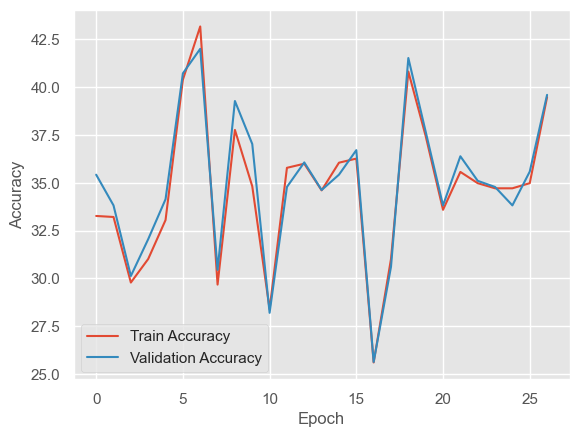

Best validation accuracy: 41.98717948717949
Accuracy: 0.42788461538461536
Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  18 115 149  32   0]
 [  0   0  22 166 118   3]
 [  0   0   0   0   0   0]]


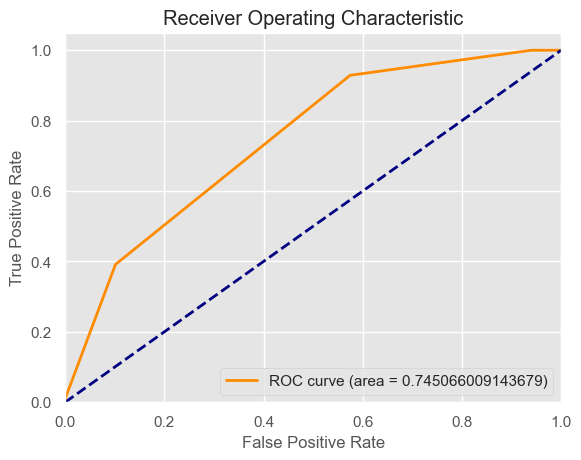

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.42788461538461536, 'Training Time (s)': 693.9541625976562}


  1%|▊                                                                               | 1/100 [01:31<2:30:31, 91.22s/it]

Epoch 1/100, Train Acc: 30.802139037433154, Val Acc: 51.92307692307692


  2%|█▌                                                                              | 2/100 [03:01<2:27:57, 90.58s/it]

Epoch 2/100, Train Acc: 28.449197860962567, Val Acc: 52.56410256410256


  3%|██▍                                                                             | 3/100 [04:30<2:25:18, 89.88s/it]

Epoch 3/100, Train Acc: 20.855614973262032, Val Acc: 46.47435897435897


  4%|███▏                                                                            | 4/100 [05:59<2:23:14, 89.52s/it]

Epoch 4/100, Train Acc: 35.72192513368984, Val Acc: 54.006410256410255


  5%|████                                                                            | 5/100 [07:28<2:21:27, 89.34s/it]

Epoch 5/100, Train Acc: 39.19786096256684, Val Acc: 55.44871794871795


  6%|████▊                                                                           | 6/100 [08:57<2:19:44, 89.19s/it]

Epoch 6/100, Train Acc: 42.35294117647059, Val Acc: 54.967948717948715


  7%|█████▌                                                                          | 7/100 [10:25<2:17:57, 89.00s/it]

Epoch 7/100, Train Acc: 24.919786096256683, Val Acc: 47.11538461538461


  8%|██████▍                                                                         | 8/100 [11:55<2:16:36, 89.09s/it]

Epoch 8/100, Train Acc: 30.106951871657753, Val Acc: 49.35897435897436


  9%|███████▏                                                                        | 9/100 [13:24<2:15:18, 89.22s/it]

Epoch 9/100, Train Acc: 31.871657754010695, Val Acc: 49.03846153846154


 10%|███████▉                                                                       | 10/100 [14:55<2:14:45, 89.83s/it]

Epoch 10/100, Train Acc: 21.657754010695186, Val Acc: 38.62179487179487


 11%|████████▋                                                                      | 11/100 [16:24<2:12:52, 89.58s/it]

Epoch 11/100, Train Acc: 28.77005347593583, Val Acc: 43.91025641025641


 12%|█████████▍                                                                     | 12/100 [17:52<2:10:35, 89.04s/it]

Epoch 12/100, Train Acc: 41.76470588235294, Val Acc: 54.32692307692308


 13%|██████████▎                                                                    | 13/100 [19:18<2:07:31, 87.95s/it]

Epoch 13/100, Train Acc: 38.93048128342246, Val Acc: 54.006410256410255


 14%|███████████                                                                    | 14/100 [20:30<1:59:06, 83.10s/it]

Epoch 14/100, Train Acc: 31.925133689839573, Val Acc: 47.59615384615385


 15%|███████████▊                                                                   | 15/100 [21:42<1:53:04, 79.81s/it]

Epoch 15/100, Train Acc: 34.11764705882353, Val Acc: 48.55769230769231


 16%|████████████▋                                                                  | 16/100 [22:54<1:48:28, 77.48s/it]

Epoch 16/100, Train Acc: 29.41176470588235, Val Acc: 41.34615384615385


 17%|█████████████▍                                                                 | 17/100 [24:06<1:45:07, 75.99s/it]

Epoch 17/100, Train Acc: 42.406417112299465, Val Acc: 54.80769230769231


 18%|██████████████▏                                                                | 18/100 [25:18<1:42:14, 74.82s/it]

Epoch 18/100, Train Acc: 28.288770053475936, Val Acc: 42.62820512820513


 19%|███████████████                                                                | 19/100 [26:31<1:40:11, 74.21s/it]

Epoch 19/100, Train Acc: 33.101604278074866, Val Acc: 47.11538461538461


 20%|███████████████▊                                                               | 20/100 [27:44<1:38:12, 73.65s/it]

Epoch 20/100, Train Acc: 33.475935828877006, Val Acc: 46.794871794871796


 21%|████████████████▌                                                              | 21/100 [28:56<1:36:33, 73.33s/it]

Epoch 21/100, Train Acc: 30.855614973262032, Val Acc: 45.032051282051285


 22%|█████████████████▍                                                             | 22/100 [30:22<1:40:06, 77.01s/it]

Epoch 22/100, Train Acc: 33.475935828877006, Val Acc: 45.993589743589745


 23%|██████████████████▏                                                            | 23/100 [31:51<1:43:25, 80.59s/it]

Epoch 23/100, Train Acc: 29.572192513368982, Val Acc: 45.51282051282051


 24%|██████████████████▉                                                            | 24/100 [33:20<1:45:19, 83.15s/it]

Epoch 24/100, Train Acc: 29.144385026737968, Val Acc: 44.55128205128205


 25%|███████████████████▊                                                           | 25/100 [34:49<1:46:11, 84.95s/it]

Epoch 25/100, Train Acc: 34.705882352941174, Val Acc: 47.43589743589744


 26%|████████████████████▌                                                          | 26/100 [36:18<1:46:23, 86.27s/it]

Epoch 26/100, Train Acc: 39.19786096256684, Val Acc: 52.72435897435897


 26%|████████████████████▌                                                          | 26/100 [37:48<1:47:36, 87.25s/it]

Epoch 27/100, Train Acc: 34.331550802139034, Val Acc: 47.59615384615385
Early stopping triggered at epoch 27


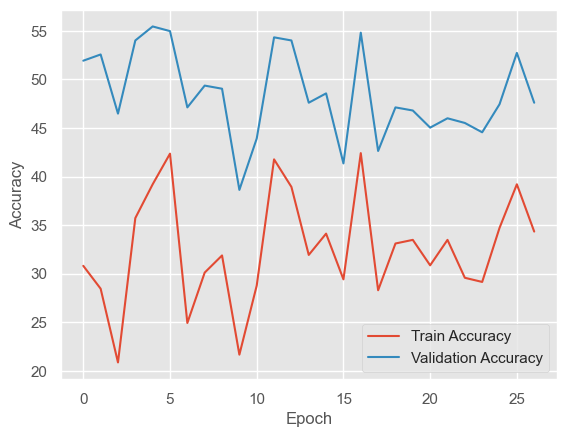

Best validation accuracy: 55.44871794871795
Accuracy: 0.5480769230769231
Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  43 168 101   1   1]
 [  0   6 108 174  21   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


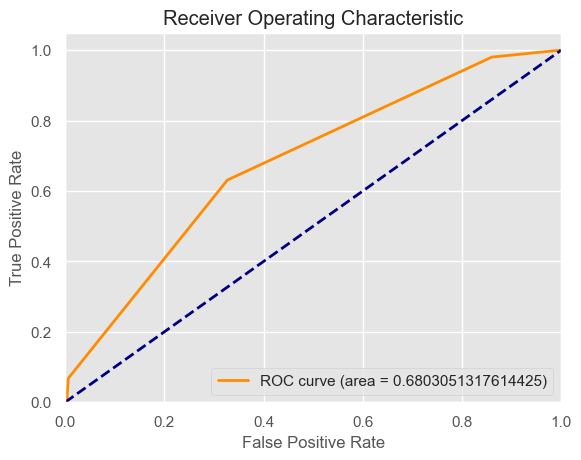

{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'omprehensive Environmental Augmentation & mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5480769230769231, 'Training Time (s)': 2269.5156350135803}


  1%|▊                                                                                 | 1/100 [00:12<20:05, 12.18s/it]

Epoch 1/100, Train Acc: 82.83422459893048, Val Acc: 82.8525641025641


  2%|█▋                                                                                | 2/100 [00:23<19:22, 11.87s/it]

Epoch 2/100, Train Acc: 92.62032085561498, Val Acc: 92.78846153846153


  3%|██▍                                                                               | 3/100 [00:35<19:14, 11.90s/it]

Epoch 3/100, Train Acc: 94.22459893048128, Val Acc: 93.91025641025641


  4%|███▎                                                                              | 4/100 [00:47<18:47, 11.75s/it]

Epoch 4/100, Train Acc: 94.8663101604278, Val Acc: 94.55128205128206


  5%|████                                                                              | 5/100 [00:58<18:30, 11.69s/it]

Epoch 5/100, Train Acc: 94.8663101604278, Val Acc: 94.87179487179488


  6%|████▉                                                                             | 6/100 [01:10<18:27, 11.78s/it]

Epoch 6/100, Train Acc: 95.24064171122994, Val Acc: 95.1923076923077


  7%|█████▋                                                                            | 7/100 [01:22<18:04, 11.66s/it]

Epoch 7/100, Train Acc: 95.24064171122994, Val Acc: 95.67307692307692


  8%|██████▌                                                                           | 8/100 [01:33<17:45, 11.58s/it]

Epoch 8/100, Train Acc: 95.08021390374331, Val Acc: 95.83333333333333


  9%|███████▍                                                                          | 9/100 [01:45<17:33, 11.58s/it]

Epoch 9/100, Train Acc: 95.18716577540107, Val Acc: 95.99358974358974


 10%|████████                                                                         | 10/100 [01:56<17:23, 11.59s/it]

Epoch 10/100, Train Acc: 95.3475935828877, Val Acc: 95.99358974358974


 11%|████████▉                                                                        | 11/100 [02:08<17:09, 11.57s/it]

Epoch 11/100, Train Acc: 95.45454545454545, Val Acc: 96.31410256410257


 12%|█████████▋                                                                       | 12/100 [02:19<16:56, 11.55s/it]

Epoch 12/100, Train Acc: 95.56149732620321, Val Acc: 96.15384615384616


 13%|██████████▌                                                                      | 13/100 [02:31<16:44, 11.55s/it]

Epoch 13/100, Train Acc: 95.72192513368984, Val Acc: 96.31410256410257


 14%|███████████▎                                                                     | 14/100 [02:42<16:29, 11.51s/it]

Epoch 14/100, Train Acc: 95.8288770053476, Val Acc: 95.99358974358974


 15%|████████████▏                                                                    | 15/100 [02:54<16:25, 11.59s/it]

Epoch 15/100, Train Acc: 95.98930481283422, Val Acc: 95.99358974358974


 16%|████████████▉                                                                    | 16/100 [03:06<16:14, 11.60s/it]

Epoch 16/100, Train Acc: 96.2566844919786, Val Acc: 95.83333333333333


 17%|█████████████▊                                                                   | 17/100 [03:17<15:56, 11.52s/it]

Epoch 17/100, Train Acc: 96.20320855614973, Val Acc: 96.31410256410257


 18%|██████████████▌                                                                  | 18/100 [03:29<15:45, 11.53s/it]

Epoch 18/100, Train Acc: 96.36363636363636, Val Acc: 96.31410256410257


 19%|███████████████▍                                                                 | 19/100 [03:40<15:33, 11.53s/it]

Epoch 19/100, Train Acc: 96.524064171123, Val Acc: 96.15384615384616


 20%|████████████████▏                                                                | 20/100 [03:52<15:25, 11.57s/it]

Epoch 20/100, Train Acc: 96.57754010695187, Val Acc: 96.15384615384616


 21%|█████████████████                                                                | 21/100 [04:03<15:14, 11.58s/it]

Epoch 21/100, Train Acc: 96.7379679144385, Val Acc: 95.83333333333333


 22%|█████████████████▊                                                               | 22/100 [04:15<14:58, 11.52s/it]

Epoch 22/100, Train Acc: 96.68449197860963, Val Acc: 95.83333333333333


 23%|██████████████████▋                                                              | 23/100 [04:26<14:44, 11.49s/it]

Epoch 23/100, Train Acc: 96.79144385026738, Val Acc: 95.83333333333333


 24%|███████████████████▍                                                             | 24/100 [04:38<14:35, 11.53s/it]

Epoch 24/100, Train Acc: 97.05882352941177, Val Acc: 95.83333333333333


 25%|████████████████████▎                                                            | 25/100 [04:49<14:23, 11.51s/it]

Epoch 25/100, Train Acc: 97.05882352941177, Val Acc: 95.83333333333333


 26%|█████████████████████                                                            | 26/100 [05:01<14:11, 11.51s/it]

Epoch 26/100, Train Acc: 97.16577540106952, Val Acc: 95.67307692307692


 26%|█████████████████████                                                            | 26/100 [05:12<14:50, 12.03s/it]

Epoch 27/100, Train Acc: 97.2192513368984, Val Acc: 95.67307692307692
Early stopping triggered at epoch 27


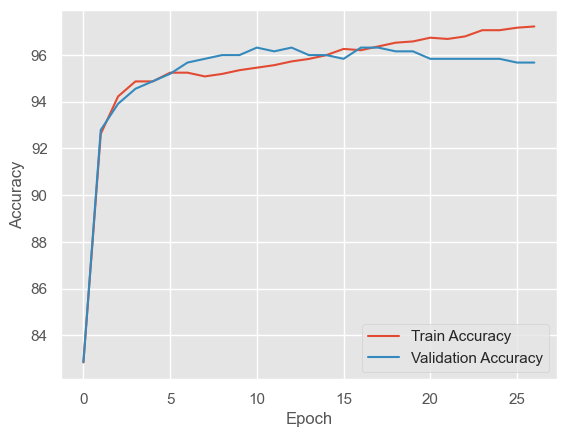

Best validation accuracy: 96.31410256410257
Accuracy: 0.9487179487179487
Confusion Matrix:
[[214   8   3]
 [  9 189   5]
 [  3   4 189]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9487179487179487, 'Training Time (s)': 313.25310254096985}


  1%|▊                                                                               | 1/100 [00:54<1:30:04, 54.59s/it]

Epoch 1/100, Train Acc: 93.42245989304813, Val Acc: 96.31410256410257


  2%|█▌                                                                              | 2/100 [01:49<1:29:32, 54.82s/it]

Epoch 2/100, Train Acc: 94.11764705882354, Val Acc: 96.47435897435898


  3%|██▍                                                                             | 3/100 [02:43<1:28:09, 54.53s/it]

Epoch 3/100, Train Acc: 94.1711229946524, Val Acc: 96.47435897435898


  4%|███▏                                                                            | 4/100 [03:39<1:28:04, 55.05s/it]

Epoch 4/100, Train Acc: 94.43850267379679, Val Acc: 96.47435897435898


  5%|████                                                                            | 5/100 [04:34<1:26:53, 54.88s/it]

Epoch 5/100, Train Acc: 94.43850267379679, Val Acc: 96.47435897435898


  6%|████▊                                                                           | 6/100 [05:28<1:25:53, 54.82s/it]

Epoch 6/100, Train Acc: 94.97326203208556, Val Acc: 96.47435897435898


  7%|█████▌                                                                          | 7/100 [06:23<1:24:49, 54.73s/it]

Epoch 7/100, Train Acc: 94.97326203208556, Val Acc: 96.15384615384616


  8%|██████▍                                                                         | 8/100 [07:18<1:23:56, 54.75s/it]

Epoch 8/100, Train Acc: 95.08021390374331, Val Acc: 96.15384615384616


  9%|███████▏                                                                        | 9/100 [08:12<1:22:45, 54.57s/it]

Epoch 9/100, Train Acc: 95.1336898395722, Val Acc: 96.15384615384616


 10%|███████▉                                                                       | 10/100 [09:06<1:21:47, 54.53s/it]

Epoch 10/100, Train Acc: 95.02673796791444, Val Acc: 96.15384615384616


 11%|████████▋                                                                      | 11/100 [10:01<1:20:47, 54.47s/it]

Epoch 11/100, Train Acc: 95.1336898395722, Val Acc: 95.99358974358974


 12%|█████████▍                                                                     | 12/100 [10:55<1:19:47, 54.40s/it]

Epoch 12/100, Train Acc: 94.91978609625669, Val Acc: 95.99358974358974


 13%|██████████▎                                                                    | 13/100 [11:49<1:18:45, 54.32s/it]

Epoch 13/100, Train Acc: 95.45454545454545, Val Acc: 95.83333333333333


 14%|███████████                                                                    | 14/100 [12:43<1:17:43, 54.23s/it]

Epoch 14/100, Train Acc: 95.18716577540107, Val Acc: 95.83333333333333


 15%|███████████▊                                                                   | 15/100 [13:37<1:16:53, 54.28s/it]

Epoch 15/100, Train Acc: 95.40106951871658, Val Acc: 95.99358974358974


 16%|████████████▋                                                                  | 16/100 [14:32<1:16:00, 54.30s/it]

Epoch 16/100, Train Acc: 95.24064171122994, Val Acc: 96.15384615384616


 17%|█████████████▍                                                                 | 17/100 [15:26<1:15:04, 54.27s/it]

Epoch 17/100, Train Acc: 95.98930481283422, Val Acc: 96.15384615384616


 18%|██████████████▏                                                                | 18/100 [16:20<1:14:10, 54.28s/it]

Epoch 18/100, Train Acc: 95.56149732620321, Val Acc: 96.15384615384616


 19%|███████████████                                                                | 19/100 [17:15<1:13:22, 54.35s/it]

Epoch 19/100, Train Acc: 95.29411764705883, Val Acc: 96.15384615384616


 20%|███████████████▊                                                               | 20/100 [18:09<1:12:20, 54.25s/it]

Epoch 20/100, Train Acc: 95.3475935828877, Val Acc: 96.15384615384616


 21%|████████████████▌                                                              | 21/100 [19:03<1:11:29, 54.30s/it]

Epoch 21/100, Train Acc: 95.72192513368984, Val Acc: 96.31410256410257


 22%|█████████████████▍                                                             | 22/100 [19:58<1:10:50, 54.49s/it]

Epoch 22/100, Train Acc: 95.61497326203208, Val Acc: 96.63461538461539


 23%|██████████████████▏                                                            | 23/100 [20:53<1:10:03, 54.59s/it]

Epoch 23/100, Train Acc: 95.66844919786097, Val Acc: 96.63461538461539


 24%|██████████████████▉                                                            | 24/100 [21:47<1:09:03, 54.52s/it]

Epoch 24/100, Train Acc: 96.09625668449198, Val Acc: 96.47435897435898


 25%|███████████████████▊                                                           | 25/100 [22:42<1:08:04, 54.46s/it]

Epoch 25/100, Train Acc: 95.50802139037434, Val Acc: 96.47435897435898


 26%|████████████████████▌                                                          | 26/100 [23:36<1:07:07, 54.42s/it]

Epoch 26/100, Train Acc: 95.61497326203208, Val Acc: 96.47435897435898


 26%|████████████████████▌                                                          | 26/100 [24:30<1:09:46, 56.57s/it]

Epoch 27/100, Train Acc: 96.14973262032086, Val Acc: 96.31410256410257
Early stopping triggered at epoch 27


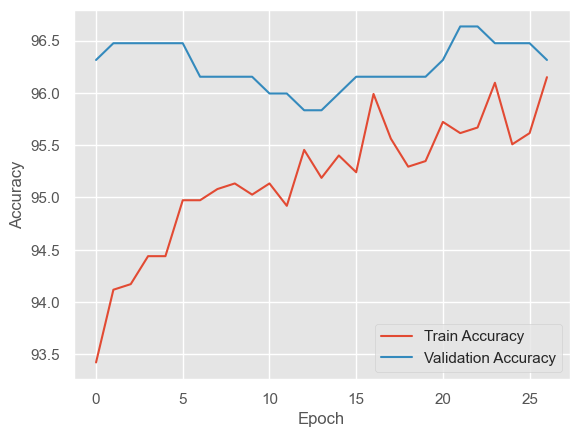

Best validation accuracy: 96.63461538461539
Accuracy: 0.9615384615384616
Confusion Matrix:
[[217   6   2]
 [  6 193   4]
 [  2   4 190]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'Basic Natural Scene Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9615384615384616, 'Training Time (s)': 1471.1735754013062}


  1%|▊                                                                               | 1/100 [01:18<2:09:52, 78.72s/it]

Epoch 1/100, Train Acc: 90.64171122994652, Val Acc: 96.31410256410257


  2%|█▌                                                                              | 2/100 [02:37<2:08:14, 78.51s/it]

Epoch 2/100, Train Acc: 90.74866310160428, Val Acc: 95.99358974358974


  3%|██▍                                                                             | 3/100 [03:55<2:06:46, 78.41s/it]

Epoch 3/100, Train Acc: 91.12299465240642, Val Acc: 95.83333333333333


  4%|███▏                                                                            | 4/100 [05:14<2:05:41, 78.55s/it]

Epoch 4/100, Train Acc: 92.67379679144385, Val Acc: 95.83333333333333


  5%|████                                                                            | 5/100 [06:32<2:04:14, 78.47s/it]

Epoch 5/100, Train Acc: 92.24598930481284, Val Acc: 95.67307692307692


  6%|████▊                                                                           | 6/100 [07:50<2:02:53, 78.44s/it]

Epoch 6/100, Train Acc: 92.13903743315508, Val Acc: 95.67307692307692


  7%|█████▌                                                                          | 7/100 [09:09<2:01:35, 78.45s/it]

Epoch 7/100, Train Acc: 92.94117647058823, Val Acc: 95.83333333333333


  8%|██████▍                                                                         | 8/100 [10:28<2:00:25, 78.54s/it]

Epoch 8/100, Train Acc: 92.99465240641712, Val Acc: 95.67307692307692


  9%|███████▏                                                                        | 9/100 [11:46<1:58:59, 78.46s/it]

Epoch 9/100, Train Acc: 92.40641711229947, Val Acc: 95.67307692307692


 10%|███████▉                                                                       | 10/100 [13:04<1:57:40, 78.45s/it]

Epoch 10/100, Train Acc: 92.88770053475936, Val Acc: 95.83333333333333


 11%|████████▋                                                                      | 11/100 [14:23<1:56:20, 78.43s/it]

Epoch 11/100, Train Acc: 92.72727272727273, Val Acc: 95.67307692307692


 12%|█████████▍                                                                     | 12/100 [15:41<1:54:53, 78.33s/it]

Epoch 12/100, Train Acc: 93.63636363636364, Val Acc: 95.3525641025641


 13%|██████████▎                                                                    | 13/100 [17:00<1:53:54, 78.56s/it]

Epoch 13/100, Train Acc: 93.68983957219251, Val Acc: 95.51282051282051


 14%|███████████                                                                    | 14/100 [18:18<1:52:38, 78.59s/it]

Epoch 14/100, Train Acc: 93.79679144385027, Val Acc: 95.3525641025641


 15%|███████████▊                                                                   | 15/100 [19:38<1:51:33, 78.75s/it]

Epoch 15/100, Train Acc: 92.72727272727273, Val Acc: 95.3525641025641


 16%|████████████▋                                                                  | 16/100 [20:57<1:50:31, 78.94s/it]

Epoch 16/100, Train Acc: 93.58288770053476, Val Acc: 95.1923076923077


 17%|█████████████▍                                                                 | 17/100 [22:17<1:49:27, 79.13s/it]

Epoch 17/100, Train Acc: 94.27807486631016, Val Acc: 95.1923076923077


 18%|██████████████▏                                                                | 18/100 [23:35<1:47:55, 78.97s/it]

Epoch 18/100, Train Acc: 94.22459893048128, Val Acc: 95.1923076923077


 19%|███████████████                                                                | 19/100 [24:57<1:47:40, 79.76s/it]

Epoch 19/100, Train Acc: 94.01069518716578, Val Acc: 95.3525641025641


 20%|███████████████▊                                                               | 20/100 [26:15<1:45:55, 79.44s/it]

Epoch 20/100, Train Acc: 93.9572192513369, Val Acc: 95.3525641025641


 21%|████████████████▌                                                              | 21/100 [27:34<1:44:19, 79.23s/it]

Epoch 21/100, Train Acc: 93.42245989304813, Val Acc: 95.3525641025641


 22%|█████████████████▍                                                             | 22/100 [28:53<1:42:47, 79.07s/it]

Epoch 22/100, Train Acc: 93.79679144385027, Val Acc: 95.3525641025641


 23%|██████████████████▏                                                            | 23/100 [30:12<1:41:19, 78.95s/it]

Epoch 23/100, Train Acc: 94.33155080213903, Val Acc: 95.1923076923077


 24%|██████████████████▉                                                            | 24/100 [31:30<1:39:57, 78.91s/it]

Epoch 24/100, Train Acc: 94.06417112299465, Val Acc: 95.1923076923077


 25%|███████████████████▊                                                           | 25/100 [32:49<1:38:29, 78.79s/it]

Epoch 25/100, Train Acc: 94.22459893048128, Val Acc: 95.03205128205128


 26%|████████████████████▌                                                          | 26/100 [34:08<1:37:13, 78.83s/it]

Epoch 26/100, Train Acc: 93.7433155080214, Val Acc: 95.1923076923077


 26%|████████████████████▌                                                          | 26/100 [35:26<1:40:52, 81.79s/it]

Epoch 27/100, Train Acc: 94.22459893048128, Val Acc: 95.1923076923077
Early stopping triggered at epoch 27


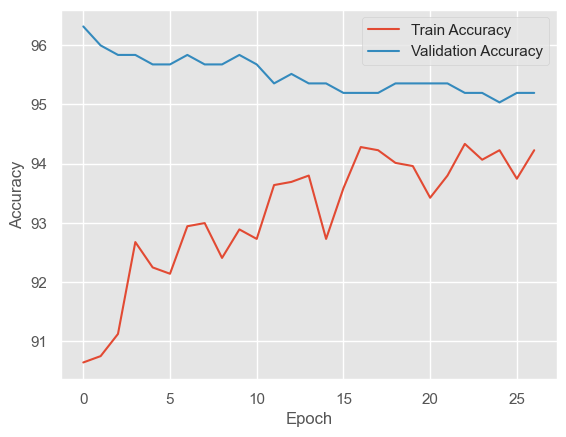

Best validation accuracy: 96.31410256410257
Accuracy: 0.9599358974358975
Confusion Matrix:
[[216   7   2]
 [  7 193   3]
 [  2   4 190]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'Advanced Realism Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9599358974358975, 'Training Time (s)': 2126.893964290619}


  1%|▊                                                                               | 1/100 [01:17<2:07:47, 77.45s/it]

Epoch 1/100, Train Acc: 88.55614973262033, Val Acc: 96.15384615384616


  2%|█▌                                                                              | 2/100 [02:35<2:06:37, 77.52s/it]

Epoch 2/100, Train Acc: 90.37433155080214, Val Acc: 96.31410256410257


  3%|██▍                                                                             | 3/100 [03:53<2:05:53, 77.88s/it]

Epoch 3/100, Train Acc: 88.87700534759358, Val Acc: 96.15384615384616


  4%|███▏                                                                            | 4/100 [05:11<2:04:39, 77.91s/it]

Epoch 4/100, Train Acc: 90.37433155080214, Val Acc: 96.31410256410257


  5%|████                                                                            | 5/100 [06:29<2:03:18, 77.87s/it]

Epoch 5/100, Train Acc: 89.94652406417113, Val Acc: 95.99358974358974


  6%|████▊                                                                           | 6/100 [07:47<2:02:01, 77.89s/it]

Epoch 6/100, Train Acc: 90.26737967914438, Val Acc: 95.99358974358974


  7%|█████▌                                                                          | 7/100 [09:04<2:00:20, 77.64s/it]

Epoch 7/100, Train Acc: 90.6951871657754, Val Acc: 95.67307692307692


  8%|██████▍                                                                         | 8/100 [10:21<1:58:59, 77.60s/it]

Epoch 8/100, Train Acc: 90.37433155080214, Val Acc: 95.67307692307692


  9%|███████▏                                                                        | 9/100 [11:39<1:57:46, 77.66s/it]

Epoch 9/100, Train Acc: 91.49732620320856, Val Acc: 95.51282051282051


 10%|███████▉                                                                       | 10/100 [12:57<1:56:32, 77.70s/it]

Epoch 10/100, Train Acc: 91.3903743315508, Val Acc: 95.51282051282051


 11%|████████▋                                                                      | 11/100 [14:14<1:55:06, 77.60s/it]

Epoch 11/100, Train Acc: 90.05347593582887, Val Acc: 95.3525641025641


 12%|█████████▍                                                                     | 12/100 [15:31<1:53:42, 77.52s/it]

Epoch 12/100, Train Acc: 92.45989304812834, Val Acc: 95.1923076923077


 13%|██████████▎                                                                    | 13/100 [16:49<1:52:31, 77.61s/it]

Epoch 13/100, Train Acc: 90.53475935828877, Val Acc: 95.03205128205128


 14%|███████████                                                                    | 14/100 [18:07<1:51:20, 77.68s/it]

Epoch 14/100, Train Acc: 90.6951871657754, Val Acc: 95.1923076923077


 15%|███████████▊                                                                   | 15/100 [19:24<1:49:53, 77.57s/it]

Epoch 15/100, Train Acc: 91.22994652406418, Val Acc: 95.03205128205128


 16%|████████████▋                                                                  | 16/100 [20:42<1:48:42, 77.65s/it]

Epoch 16/100, Train Acc: 90.74866310160428, Val Acc: 94.87179487179488


 17%|█████████████▍                                                                 | 17/100 [22:00<1:47:33, 77.75s/it]

Epoch 17/100, Train Acc: 91.76470588235294, Val Acc: 95.03205128205128


 18%|██████████████▏                                                                | 18/100 [23:18<1:46:16, 77.76s/it]

Epoch 18/100, Train Acc: 91.22994652406418, Val Acc: 95.03205128205128


 19%|███████████████                                                                | 19/100 [24:36<1:44:54, 77.71s/it]

Epoch 19/100, Train Acc: 91.65775401069519, Val Acc: 95.03205128205128


 20%|███████████████▊                                                               | 20/100 [25:54<1:43:41, 77.77s/it]

Epoch 20/100, Train Acc: 91.44385026737967, Val Acc: 94.87179487179488


 21%|████████████████▌                                                              | 21/100 [27:11<1:42:22, 77.76s/it]

Epoch 21/100, Train Acc: 92.0855614973262, Val Acc: 94.87179487179488


 22%|█████████████████▍                                                             | 22/100 [28:29<1:41:02, 77.73s/it]

Epoch 22/100, Train Acc: 92.0855614973262, Val Acc: 94.87179487179488


 23%|██████████████████▏                                                            | 23/100 [29:46<1:39:41, 77.68s/it]

Epoch 23/100, Train Acc: 91.33689839572193, Val Acc: 94.87179487179488


 24%|██████████████████▉                                                            | 24/100 [31:04<1:38:18, 77.61s/it]

Epoch 24/100, Train Acc: 91.92513368983957, Val Acc: 94.87179487179488


 25%|███████████████████▊                                                           | 25/100 [32:21<1:36:52, 77.50s/it]

Epoch 25/100, Train Acc: 91.65775401069519, Val Acc: 95.03205128205128


 26%|████████████████████▌                                                          | 26/100 [33:38<1:35:22, 77.33s/it]

Epoch 26/100, Train Acc: 92.40641711229947, Val Acc: 94.71153846153847


 26%|████████████████████▌                                                          | 26/100 [34:56<1:39:26, 80.62s/it]

Epoch 27/100, Train Acc: 92.19251336898395, Val Acc: 94.71153846153847
Early stopping triggered at epoch 27


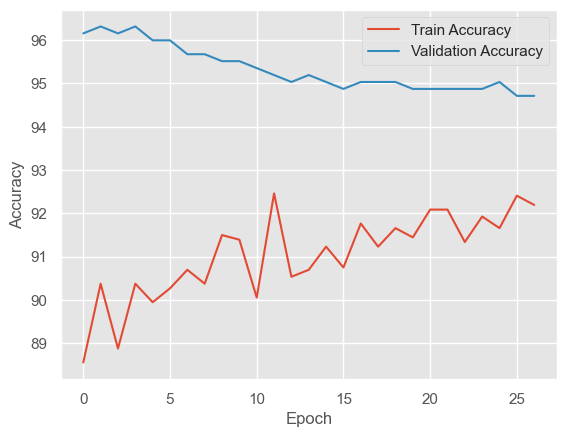

Best validation accuracy: 96.31410256410257
Accuracy: 0.9599358974358975
Confusion Matrix:
[[216   6   3]
 [  5 193   5]
 [  2   4 190]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'Comprehensive Environmental Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9599358974358975, 'Training Time (s)': 2096.5655155181885}


  1%|▊                                                                                 | 1/100 [00:11<18:21, 11.13s/it]

Epoch 1/100, Train Acc: 96.95187165775401, Val Acc: 95.99358974358974


  2%|█▋                                                                                | 2/100 [00:21<17:51, 10.93s/it]

Epoch 2/100, Train Acc: 96.89839572192513, Val Acc: 95.99358974358974


  3%|██▍                                                                               | 3/100 [00:33<17:53, 11.06s/it]

Epoch 3/100, Train Acc: 97.11229946524064, Val Acc: 95.1923076923077


  4%|███▎                                                                              | 4/100 [00:44<17:40, 11.05s/it]

Epoch 4/100, Train Acc: 97.2192513368984, Val Acc: 94.87179487179488


  5%|████                                                                              | 5/100 [00:55<17:23, 10.99s/it]

Epoch 5/100, Train Acc: 97.00534759358288, Val Acc: 95.1923076923077


  6%|████▉                                                                             | 6/100 [01:06<17:15, 11.02s/it]

Epoch 6/100, Train Acc: 96.89839572192513, Val Acc: 95.67307692307692


  7%|█████▋                                                                            | 7/100 [01:17<17:02, 10.99s/it]

Epoch 7/100, Train Acc: 96.95187165775401, Val Acc: 95.67307692307692


  8%|██████▌                                                                           | 8/100 [01:28<16:51, 10.99s/it]

Epoch 8/100, Train Acc: 96.79144385026738, Val Acc: 95.51282051282051


  9%|███████▍                                                                          | 9/100 [01:39<16:40, 11.00s/it]

Epoch 9/100, Train Acc: 96.68449197860963, Val Acc: 95.67307692307692


 10%|████████                                                                         | 10/100 [01:50<16:36, 11.07s/it]

Epoch 10/100, Train Acc: 96.7379679144385, Val Acc: 95.3525641025641


 11%|████████▉                                                                        | 11/100 [02:01<16:19, 11.00s/it]

Epoch 11/100, Train Acc: 96.84491978609626, Val Acc: 95.3525641025641


 12%|█████████▋                                                                       | 12/100 [02:12<16:06, 10.98s/it]

Epoch 12/100, Train Acc: 96.79144385026738, Val Acc: 95.3525641025641


 13%|██████████▌                                                                      | 13/100 [02:23<15:55, 10.98s/it]

Epoch 13/100, Train Acc: 96.7379679144385, Val Acc: 95.3525641025641


 14%|███████████▎                                                                     | 14/100 [02:33<15:43, 10.97s/it]

Epoch 14/100, Train Acc: 96.63101604278074, Val Acc: 95.1923076923077


 15%|████████████▏                                                                    | 15/100 [02:45<15:39, 11.05s/it]

Epoch 15/100, Train Acc: 96.68449197860963, Val Acc: 95.1923076923077


 16%|████████████▉                                                                    | 16/100 [02:56<15:29, 11.06s/it]

Epoch 16/100, Train Acc: 96.68449197860963, Val Acc: 95.1923076923077


 17%|█████████████▊                                                                   | 17/100 [03:07<15:19, 11.07s/it]

Epoch 17/100, Train Acc: 96.79144385026738, Val Acc: 95.03205128205128


 18%|██████████████▌                                                                  | 18/100 [03:18<15:11, 11.11s/it]

Epoch 18/100, Train Acc: 96.89839572192513, Val Acc: 95.03205128205128


 19%|███████████████▍                                                                 | 19/100 [03:29<14:59, 11.10s/it]

Epoch 19/100, Train Acc: 97.00534759358288, Val Acc: 95.03205128205128


 20%|████████████████▏                                                                | 20/100 [03:40<14:50, 11.14s/it]

Epoch 20/100, Train Acc: 96.89839572192513, Val Acc: 94.87179487179488


 21%|█████████████████                                                                | 21/100 [03:51<14:36, 11.10s/it]

Epoch 21/100, Train Acc: 96.84491978609626, Val Acc: 95.1923076923077


 22%|█████████████████▊                                                               | 22/100 [04:03<14:28, 11.14s/it]

Epoch 22/100, Train Acc: 96.89839572192513, Val Acc: 95.03205128205128


 23%|██████████████████▋                                                              | 23/100 [04:14<14:14, 11.10s/it]

Epoch 23/100, Train Acc: 96.84491978609626, Val Acc: 95.03205128205128


 24%|███████████████████▍                                                             | 24/100 [04:25<14:06, 11.14s/it]

Epoch 24/100, Train Acc: 96.7379679144385, Val Acc: 95.1923076923077


 25%|████████████████████▎                                                            | 25/100 [04:36<13:54, 11.13s/it]

Epoch 25/100, Train Acc: 96.79144385026738, Val Acc: 95.03205128205128


 26%|█████████████████████                                                            | 26/100 [04:47<13:43, 11.13s/it]

Epoch 26/100, Train Acc: 96.79144385026738, Val Acc: 95.03205128205128


 26%|█████████████████████                                                            | 26/100 [04:58<14:10, 11.49s/it]

Epoch 27/100, Train Acc: 96.95187165775401, Val Acc: 94.71153846153847
Early stopping triggered at epoch 27


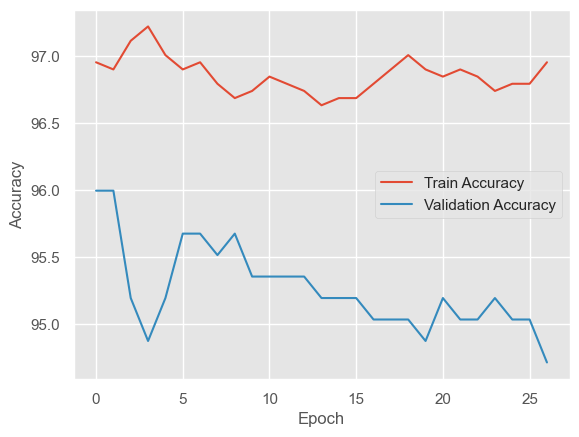

Best validation accuracy: 95.99358974358974
Accuracy: 0.9615384615384616
Confusion Matrix:
[[218   5   2]
 [  7 193   3]
 [  3   4 189]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9615384615384616, 'Training Time (s)': 299.20140767097473}


  1%|▊                                                                               | 1/100 [01:17<2:08:09, 77.67s/it]

Epoch 1/100, Train Acc: 89.5187165775401, Val Acc: 95.83333333333333


  2%|█▌                                                                              | 2/100 [02:35<2:06:40, 77.56s/it]

Epoch 2/100, Train Acc: 88.55614973262033, Val Acc: 95.67307692307692


  3%|██▍                                                                             | 3/100 [03:52<2:05:16, 77.49s/it]

Epoch 3/100, Train Acc: 89.35828877005348, Val Acc: 95.83333333333333


  4%|███▏                                                                            | 4/100 [05:10<2:04:09, 77.60s/it]

Epoch 4/100, Train Acc: 90.53475935828877, Val Acc: 95.67307692307692


  5%|████                                                                            | 5/100 [06:28<2:03:05, 77.74s/it]

Epoch 5/100, Train Acc: 89.83957219251337, Val Acc: 95.83333333333333


  6%|████▊                                                                           | 6/100 [07:46<2:02:08, 77.97s/it]

Epoch 6/100, Train Acc: 90.0, Val Acc: 95.51282051282051


  7%|█████▌                                                                          | 7/100 [09:04<2:00:48, 77.95s/it]

Epoch 7/100, Train Acc: 90.0, Val Acc: 95.3525641025641


  8%|██████▍                                                                         | 8/100 [10:21<1:59:12, 77.74s/it]

Epoch 8/100, Train Acc: 90.10695187165776, Val Acc: 95.3525641025641


  9%|███████▏                                                                        | 9/100 [11:39<1:57:53, 77.73s/it]

Epoch 9/100, Train Acc: 89.57219251336899, Val Acc: 95.03205128205128


 10%|███████▉                                                                       | 10/100 [12:56<1:56:19, 77.55s/it]

Epoch 10/100, Train Acc: 89.25133689839572, Val Acc: 94.87179487179488


 11%|████████▋                                                                      | 11/100 [14:14<1:55:14, 77.69s/it]

Epoch 11/100, Train Acc: 90.64171122994652, Val Acc: 94.71153846153847


 12%|█████████▍                                                                     | 12/100 [15:32<1:54:01, 77.75s/it]

Epoch 12/100, Train Acc: 89.35828877005348, Val Acc: 94.39102564102564


 13%|██████████▎                                                                    | 13/100 [16:50<1:52:47, 77.79s/it]

Epoch 13/100, Train Acc: 90.26737967914438, Val Acc: 94.07051282051282


 14%|███████████                                                                    | 14/100 [18:07<1:51:14, 77.61s/it]

Epoch 14/100, Train Acc: 90.05347593582887, Val Acc: 94.23076923076923


 15%|███████████▊                                                                   | 15/100 [19:25<1:49:54, 77.58s/it]

Epoch 15/100, Train Acc: 90.32085561497327, Val Acc: 94.23076923076923


 16%|████████████▋                                                                  | 16/100 [20:43<1:48:41, 77.64s/it]

Epoch 16/100, Train Acc: 90.85561497326204, Val Acc: 93.91025641025641


 17%|█████████████▍                                                                 | 17/100 [22:00<1:47:30, 77.72s/it]

Epoch 17/100, Train Acc: 91.28342245989305, Val Acc: 93.91025641025641


 18%|██████████████▏                                                                | 18/100 [23:18<1:46:14, 77.74s/it]

Epoch 18/100, Train Acc: 91.65775401069519, Val Acc: 93.75


 19%|███████████████                                                                | 19/100 [24:36<1:45:01, 77.80s/it]

Epoch 19/100, Train Acc: 90.10695187165776, Val Acc: 93.75


 20%|███████████████▊                                                               | 20/100 [25:54<1:43:55, 77.94s/it]

Epoch 20/100, Train Acc: 90.10695187165776, Val Acc: 94.07051282051282


 21%|████████████████▌                                                              | 21/100 [27:13<1:42:42, 78.00s/it]

Epoch 21/100, Train Acc: 90.53475935828877, Val Acc: 93.75


 22%|█████████████████▍                                                             | 22/100 [28:30<1:41:21, 77.97s/it]

Epoch 22/100, Train Acc: 91.06951871657753, Val Acc: 94.07051282051282


 23%|██████████████████▏                                                            | 23/100 [29:48<1:40:03, 77.97s/it]

Epoch 23/100, Train Acc: 91.22994652406418, Val Acc: 93.75


 24%|██████████████████▉                                                            | 24/100 [31:06<1:38:40, 77.90s/it]

Epoch 24/100, Train Acc: 91.60427807486631, Val Acc: 93.75


 25%|███████████████████▊                                                           | 25/100 [32:24<1:37:29, 77.99s/it]

Epoch 25/100, Train Acc: 92.3529411764706, Val Acc: 93.75


 26%|████████████████████▌                                                          | 26/100 [33:43<1:36:17, 78.08s/it]

Epoch 26/100, Train Acc: 91.49732620320856, Val Acc: 93.91025641025641


 26%|████████████████████▌                                                          | 26/100 [35:01<1:39:40, 80.81s/it]

Epoch 27/100, Train Acc: 90.6951871657754, Val Acc: 93.91025641025641
Early stopping triggered at epoch 27


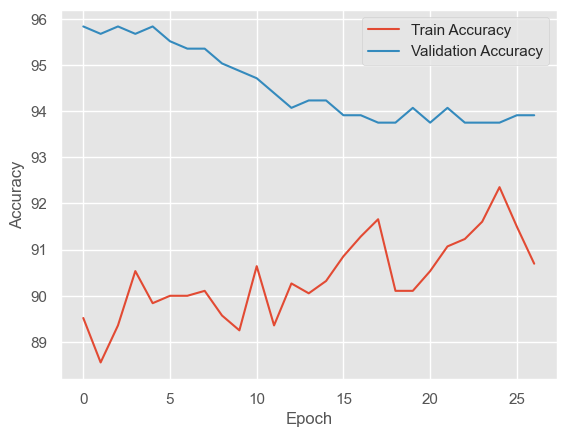

Best validation accuracy: 95.83333333333333
Accuracy: 0.9615384615384616
Confusion Matrix:
[[218   5   2]
 [  6 194   3]
 [  4   4 188]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'omprehensive Environmental Augmentation & mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9615384615384616, 'Training Time (s)': 2101.5582790374756}


  1%|▊                                                                                 | 1/100 [00:11<18:27, 11.19s/it]

Epoch 1/100, Train Acc: 48.342245989304814, Val Acc: 51.76282051282051


  2%|█▋                                                                                | 2/100 [00:22<18:09, 11.12s/it]

Epoch 2/100, Train Acc: 50.160427807486634, Val Acc: 52.56410256410256


  3%|██▍                                                                               | 3/100 [00:33<18:15, 11.30s/it]

Epoch 3/100, Train Acc: 53.04812834224599, Val Acc: 53.205128205128204


  4%|███▎                                                                              | 4/100 [00:44<18:00, 11.26s/it]

Epoch 4/100, Train Acc: 54.81283422459893, Val Acc: 55.12820512820513


  5%|████                                                                              | 5/100 [00:55<17:41, 11.17s/it]

Epoch 5/100, Train Acc: 57.48663101604278, Val Acc: 56.25


  6%|████▉                                                                             | 6/100 [01:07<17:25, 11.12s/it]

Epoch 6/100, Train Acc: 57.00534759358289, Val Acc: 56.08974358974359


  7%|█████▋                                                                            | 7/100 [01:17<17:08, 11.05s/it]

Epoch 7/100, Train Acc: 56.57754010695187, Val Acc: 53.52564102564103


  8%|██████▌                                                                           | 8/100 [01:28<16:53, 11.02s/it]

Epoch 8/100, Train Acc: 55.080213903743314, Val Acc: 53.205128205128204


  9%|███████▍                                                                          | 9/100 [01:40<16:48, 11.08s/it]

Epoch 9/100, Train Acc: 53.903743315508024, Val Acc: 52.72435897435897


 10%|████████                                                                         | 10/100 [01:50<16:31, 11.02s/it]

Epoch 10/100, Train Acc: 52.83422459893048, Val Acc: 51.44230769230769


 11%|████████▉                                                                        | 11/100 [02:01<16:19, 11.00s/it]

Epoch 11/100, Train Acc: 51.3903743315508, Val Acc: 51.282051282051285


 12%|█████████▋                                                                       | 12/100 [02:12<16:07, 10.99s/it]

Epoch 12/100, Train Acc: 50.74866310160428, Val Acc: 49.83974358974359


 13%|██████████▌                                                                      | 13/100 [02:23<15:53, 10.96s/it]

Epoch 13/100, Train Acc: 48.87700534759358, Val Acc: 50.16025641025641


 14%|███████████▎                                                                     | 14/100 [02:35<15:49, 11.04s/it]

Epoch 14/100, Train Acc: 47.75401069518717, Val Acc: 48.717948717948715


 15%|████████████▏                                                                    | 15/100 [02:46<15:41, 11.08s/it]

Epoch 15/100, Train Acc: 46.844919786096256, Val Acc: 46.794871794871796


 16%|████████████▉                                                                    | 16/100 [02:57<15:26, 11.03s/it]

Epoch 16/100, Train Acc: 45.98930481283423, Val Acc: 45.67307692307692


 17%|█████████████▊                                                                   | 17/100 [03:08<15:18, 11.06s/it]

Epoch 17/100, Train Acc: 45.24064171122995, Val Acc: 45.032051282051285


 18%|██████████████▌                                                                  | 18/100 [03:19<15:09, 11.09s/it]

Epoch 18/100, Train Acc: 43.850267379679146, Val Acc: 43.75


 19%|███████████████▍                                                                 | 19/100 [03:30<14:57, 11.08s/it]

Epoch 19/100, Train Acc: 43.31550802139037, Val Acc: 42.94871794871795


 20%|████████████████▏                                                                | 20/100 [03:41<14:50, 11.13s/it]

Epoch 20/100, Train Acc: 41.97860962566845, Val Acc: 42.467948717948715


 21%|█████████████████                                                                | 21/100 [03:52<14:35, 11.09s/it]

Epoch 21/100, Train Acc: 41.92513368983957, Val Acc: 42.467948717948715


 22%|█████████████████▊                                                               | 22/100 [04:03<14:23, 11.06s/it]

Epoch 22/100, Train Acc: 41.44385026737968, Val Acc: 42.467948717948715


 23%|██████████████████▋                                                              | 23/100 [04:15<14:26, 11.26s/it]

Epoch 23/100, Train Acc: 40.64171122994652, Val Acc: 41.82692307692308


 24%|███████████████████▍                                                             | 24/100 [04:26<14:11, 11.21s/it]

Epoch 24/100, Train Acc: 40.26737967914438, Val Acc: 41.666666666666664


 25%|████████████████████▎                                                            | 25/100 [04:37<14:00, 11.20s/it]

Epoch 25/100, Train Acc: 39.94652406417112, Val Acc: 41.02564102564103


 26%|█████████████████████                                                            | 26/100 [04:48<13:46, 11.17s/it]

Epoch 26/100, Train Acc: 39.518716577540104, Val Acc: 41.02564102564103


 26%|█████████████████████                                                            | 26/100 [04:59<14:13, 11.54s/it]

Epoch 27/100, Train Acc: 39.411764705882355, Val Acc: 40.705128205128204
Early stopping triggered at epoch 27


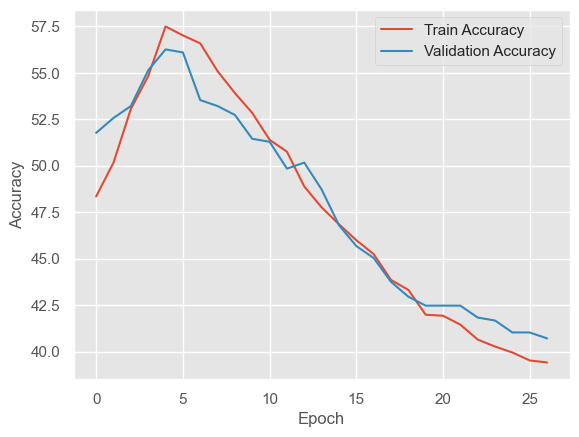

Best validation accuracy: 56.25
Accuracy: 0.5657051282051282
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  3  46 223  43   0]
 [  0   2 176 130   1]
 [  0   0   0   0   0]]


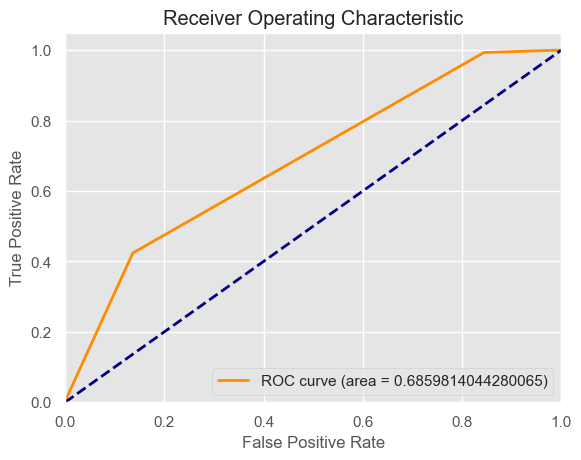

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5657051282051282, 'Training Time (s)': 300.3444628715515}


  1%|▊                                                                               | 1/100 [00:55<1:31:01, 55.17s/it]

Epoch 1/100, Train Acc: 56.20320855614973, Val Acc: 55.28846153846154


  2%|█▌                                                                              | 2/100 [01:49<1:29:44, 54.94s/it]

Epoch 2/100, Train Acc: 55.82887700534759, Val Acc: 53.68589743589744


  3%|██▍                                                                             | 3/100 [02:44<1:28:39, 54.84s/it]

Epoch 3/100, Train Acc: 53.79679144385027, Val Acc: 52.083333333333336


  4%|███▏                                                                            | 4/100 [03:38<1:27:17, 54.56s/it]

Epoch 4/100, Train Acc: 54.75935828877005, Val Acc: 51.44230769230769


  5%|████                                                                            | 5/100 [04:33<1:26:24, 54.57s/it]

Epoch 5/100, Train Acc: 52.83422459893048, Val Acc: 50.64102564102564


  6%|████▊                                                                           | 6/100 [05:27<1:25:24, 54.52s/it]

Epoch 6/100, Train Acc: 50.106951871657756, Val Acc: 48.55769230769231


  7%|█████▌                                                                          | 7/100 [06:23<1:24:53, 54.76s/it]

Epoch 7/100, Train Acc: 49.839572192513366, Val Acc: 47.43589743589744


  8%|██████▍                                                                         | 8/100 [07:17<1:23:50, 54.68s/it]

Epoch 8/100, Train Acc: 48.663101604278076, Val Acc: 45.833333333333336


  9%|███████▏                                                                        | 9/100 [08:11<1:22:38, 54.49s/it]

Epoch 9/100, Train Acc: 48.1283422459893, Val Acc: 43.91025641025641


 10%|███████▉                                                                       | 10/100 [09:06<1:21:47, 54.52s/it]

Epoch 10/100, Train Acc: 47.219251336898395, Val Acc: 41.82692307692308


 11%|████████▋                                                                      | 11/100 [10:00<1:20:50, 54.50s/it]

Epoch 11/100, Train Acc: 45.18716577540107, Val Acc: 40.705128205128204


 12%|█████████▍                                                                     | 12/100 [10:54<1:19:36, 54.28s/it]

Epoch 12/100, Train Acc: 45.3475935828877, Val Acc: 40.06410256410256


 13%|██████████▎                                                                    | 13/100 [11:49<1:18:55, 54.43s/it]

Epoch 13/100, Train Acc: 43.58288770053476, Val Acc: 39.1025641025641


 14%|███████████                                                                    | 14/100 [12:43<1:18:09, 54.53s/it]

Epoch 14/100, Train Acc: 44.01069518716577, Val Acc: 38.14102564102564


 15%|███████████▊                                                                   | 15/100 [13:38<1:17:19, 54.59s/it]

Epoch 15/100, Train Acc: 43.529411764705884, Val Acc: 37.33974358974359


 16%|████████████▋                                                                  | 16/100 [14:33<1:16:21, 54.54s/it]

Epoch 16/100, Train Acc: 42.13903743315508, Val Acc: 36.69871794871795


 17%|█████████████▍                                                                 | 17/100 [15:27<1:15:27, 54.54s/it]

Epoch 17/100, Train Acc: 43.20855614973262, Val Acc: 37.17948717948718


 18%|██████████████▏                                                                | 18/100 [16:22<1:14:28, 54.50s/it]

Epoch 18/100, Train Acc: 41.01604278074866, Val Acc: 35.8974358974359


 19%|███████████████                                                                | 19/100 [17:16<1:13:33, 54.49s/it]

Epoch 19/100, Train Acc: 41.8716577540107, Val Acc: 35.57692307692308


 20%|███████████████▊                                                               | 20/100 [18:10<1:12:34, 54.43s/it]

Epoch 20/100, Train Acc: 41.1764705882353, Val Acc: 34.61538461538461


 21%|████████████████▌                                                              | 21/100 [19:05<1:11:38, 54.41s/it]

Epoch 21/100, Train Acc: 40.74866310160428, Val Acc: 33.333333333333336


 22%|█████████████████▍                                                             | 22/100 [19:59<1:10:49, 54.48s/it]

Epoch 22/100, Train Acc: 40.855614973262036, Val Acc: 33.81410256410256


 23%|██████████████████▏                                                            | 23/100 [20:55<1:10:12, 54.71s/it]

Epoch 23/100, Train Acc: 39.73262032085562, Val Acc: 33.65384615384615


 24%|██████████████████▉                                                            | 24/100 [21:50<1:09:22, 54.76s/it]

Epoch 24/100, Train Acc: 40.106951871657756, Val Acc: 33.17307692307692


 25%|███████████████████▊                                                           | 25/100 [22:44<1:08:20, 54.68s/it]

Epoch 25/100, Train Acc: 38.77005347593583, Val Acc: 32.8525641025641


 26%|████████████████████▌                                                          | 26/100 [23:38<1:07:20, 54.61s/it]

Epoch 26/100, Train Acc: 39.57219251336898, Val Acc: 31.891025641025642


 26%|████████████████████▌                                                          | 26/100 [24:33<1:09:53, 56.67s/it]

Epoch 27/100, Train Acc: 38.55614973262032, Val Acc: 32.37179487179487
Early stopping triggered at epoch 27


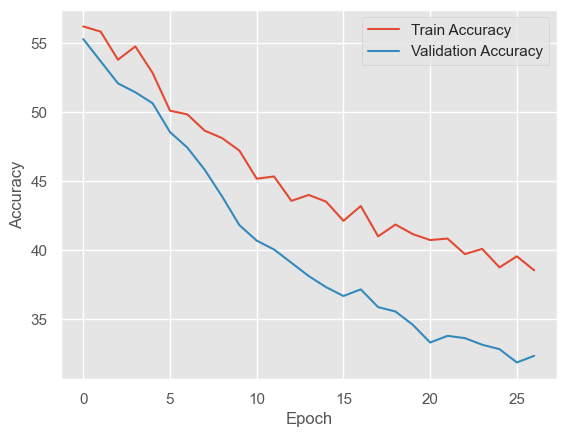

Best validation accuracy: 55.28846153846154
Accuracy: 0.5448717948717948
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  4  52 213  46   0]
 [  0   4 177 127   1]
 [  0   0   0   0   0]]


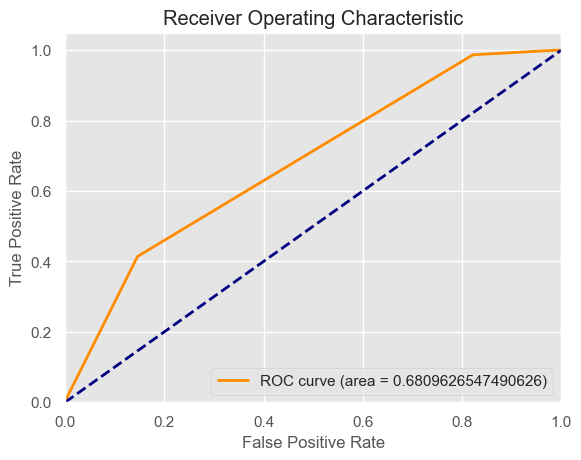

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'Basic Natural Scene Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5448717948717948, 'Training Time (s)': 1473.7790145874023}


  1%|▊                                                                               | 1/100 [01:18<2:10:14, 78.93s/it]

Epoch 1/100, Train Acc: 51.76470588235294, Val Acc: 54.80769230769231


  2%|█▌                                                                              | 2/100 [02:37<2:08:42, 78.80s/it]

Epoch 2/100, Train Acc: 50.53475935828877, Val Acc: 53.68589743589744


  3%|██▍                                                                             | 3/100 [03:55<2:07:01, 78.57s/it]

Epoch 3/100, Train Acc: 51.55080213903744, Val Acc: 51.6025641025641


  4%|███▏                                                                            | 4/100 [05:14<2:05:30, 78.45s/it]

Epoch 4/100, Train Acc: 51.1764705882353, Val Acc: 49.67948717948718


  5%|████                                                                            | 5/100 [06:32<2:04:07, 78.39s/it]

Epoch 5/100, Train Acc: 50.80213903743316, Val Acc: 49.51923076923077


  6%|████▊                                                                           | 6/100 [07:51<2:03:13, 78.65s/it]

Epoch 6/100, Train Acc: 49.839572192513366, Val Acc: 48.55769230769231


  7%|█████▌                                                                          | 7/100 [09:10<2:01:57, 78.69s/it]

Epoch 7/100, Train Acc: 50.74866310160428, Val Acc: 48.55769230769231


  8%|██████▍                                                                         | 8/100 [10:29<2:00:45, 78.76s/it]

Epoch 8/100, Train Acc: 48.39572192513369, Val Acc: 47.916666666666664


  9%|███████▏                                                                        | 9/100 [11:47<1:59:18, 78.67s/it]

Epoch 9/100, Train Acc: 48.288770053475936, Val Acc: 46.15384615384615


 10%|███████▉                                                                       | 10/100 [13:06<1:58:12, 78.81s/it]

Epoch 10/100, Train Acc: 47.80748663101604, Val Acc: 44.39102564102564


 11%|████████▋                                                                      | 11/100 [14:25<1:56:43, 78.69s/it]

Epoch 11/100, Train Acc: 48.288770053475936, Val Acc: 43.91025641025641


 12%|█████████▍                                                                     | 12/100 [15:44<1:55:27, 78.72s/it]

Epoch 12/100, Train Acc: 47.05882352941177, Val Acc: 42.78846153846154


 13%|██████████▎                                                                    | 13/100 [17:03<1:54:13, 78.78s/it]

Epoch 13/100, Train Acc: 46.79144385026738, Val Acc: 42.78846153846154


 14%|███████████                                                                    | 14/100 [18:22<1:53:04, 78.89s/it]

Epoch 14/100, Train Acc: 45.50802139037433, Val Acc: 41.18589743589744


 15%|███████████▊                                                                   | 15/100 [19:40<1:51:34, 78.76s/it]

Epoch 15/100, Train Acc: 43.850267379679146, Val Acc: 40.06410256410256


 16%|████████████▋                                                                  | 16/100 [20:59<1:50:11, 78.71s/it]

Epoch 16/100, Train Acc: 44.86631016042781, Val Acc: 40.38461538461539


 17%|█████████████▍                                                                 | 17/100 [22:17<1:48:40, 78.56s/it]

Epoch 17/100, Train Acc: 42.94117647058823, Val Acc: 40.38461538461539


 18%|██████████████▏                                                                | 18/100 [23:36<1:47:28, 78.64s/it]

Epoch 18/100, Train Acc: 44.705882352941174, Val Acc: 39.90384615384615


 19%|███████████████                                                                | 19/100 [24:55<1:46:12, 78.67s/it]

Epoch 19/100, Train Acc: 42.99465240641711, Val Acc: 39.26282051282051


 20%|███████████████▊                                                               | 20/100 [26:13<1:44:55, 78.69s/it]

Epoch 20/100, Train Acc: 42.35294117647059, Val Acc: 37.5


 21%|████████████████▌                                                              | 21/100 [27:32<1:43:39, 78.72s/it]

Epoch 21/100, Train Acc: 42.83422459893048, Val Acc: 37.17948717948718


 22%|█████████████████▍                                                             | 22/100 [28:51<1:42:19, 78.71s/it]

Epoch 22/100, Train Acc: 40.90909090909091, Val Acc: 36.53846153846154


 23%|██████████████████▏                                                            | 23/100 [30:09<1:41:00, 78.70s/it]

Epoch 23/100, Train Acc: 41.12299465240642, Val Acc: 36.217948717948715


 24%|██████████████████▉                                                            | 24/100 [31:28<1:39:37, 78.65s/it]

Epoch 24/100, Train Acc: 40.90909090909091, Val Acc: 36.53846153846154


 25%|███████████████████▊                                                           | 25/100 [32:47<1:38:35, 78.88s/it]

Epoch 25/100, Train Acc: 38.716577540106954, Val Acc: 36.37820512820513


 26%|████████████████████▌                                                          | 26/100 [34:07<1:37:25, 78.99s/it]

Epoch 26/100, Train Acc: 41.3903743315508, Val Acc: 36.85897435897436


 26%|████████████████████▌                                                          | 26/100 [35:25<1:40:50, 81.76s/it]

Epoch 27/100, Train Acc: 41.44385026737968, Val Acc: 36.69871794871795
Early stopping triggered at epoch 27


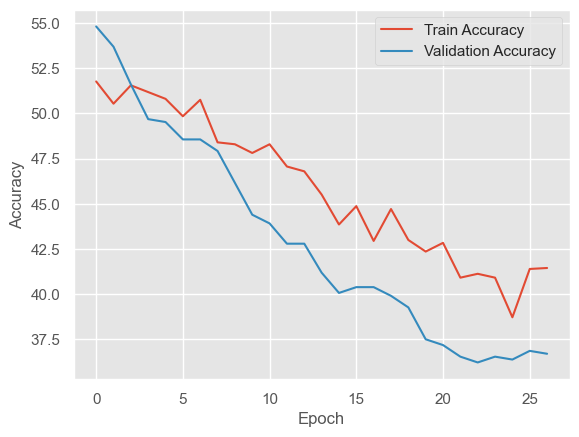

Best validation accuracy: 54.80769230769231
Accuracy: 0.5416666666666666
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  4  63 208  40   0]
 [  0   5 173 130   1]
 [  0   0   0   0   0]]


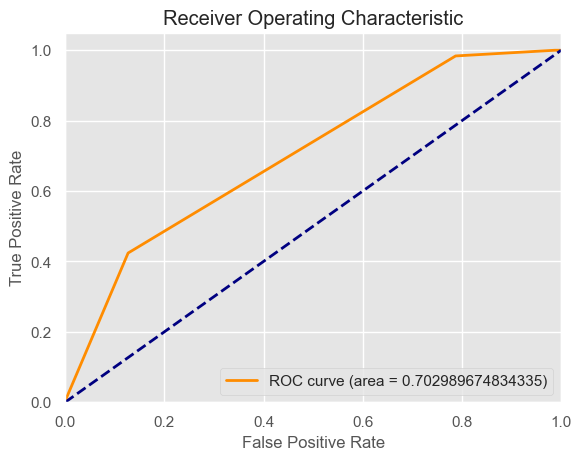

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'Advanced Realism Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5416666666666666, 'Training Time (s)': 2126.0882136821747}


  1%|▊                                                                               | 1/100 [01:17<2:08:27, 77.86s/it]

Epoch 1/100, Train Acc: 52.24598930481283, Val Acc: 53.205128205128204


  2%|█▌                                                                              | 2/100 [02:35<2:06:59, 77.75s/it]

Epoch 2/100, Train Acc: 51.44385026737968, Val Acc: 52.083333333333336


  3%|██▍                                                                             | 3/100 [03:52<2:05:15, 77.48s/it]

Epoch 3/100, Train Acc: 51.22994652406417, Val Acc: 51.92307692307692


  4%|███▏                                                                            | 4/100 [05:10<2:04:13, 77.64s/it]

Epoch 4/100, Train Acc: 51.22994652406417, Val Acc: 51.44230769230769


  5%|████                                                                            | 5/100 [06:28<2:02:55, 77.63s/it]

Epoch 5/100, Train Acc: 53.31550802139037, Val Acc: 50.48076923076923


  6%|████▊                                                                           | 6/100 [07:45<2:01:24, 77.50s/it]

Epoch 6/100, Train Acc: 50.160427807486634, Val Acc: 50.0


  7%|█████▌                                                                          | 7/100 [09:03<2:00:13, 77.57s/it]

Epoch 7/100, Train Acc: 49.67914438502674, Val Acc: 47.59615384615385


  8%|██████▍                                                                         | 8/100 [10:20<1:58:53, 77.54s/it]

Epoch 8/100, Train Acc: 48.6096256684492, Val Acc: 45.993589743589745


  9%|███████▏                                                                        | 9/100 [11:38<1:57:38, 77.57s/it]

Epoch 9/100, Train Acc: 49.67914438502674, Val Acc: 43.91025641025641


 10%|███████▉                                                                       | 10/100 [12:55<1:56:22, 77.58s/it]

Epoch 10/100, Train Acc: 46.79144385026738, Val Acc: 42.1474358974359


 11%|████████▋                                                                      | 11/100 [14:13<1:55:07, 77.61s/it]

Epoch 11/100, Train Acc: 46.844919786096256, Val Acc: 42.78846153846154


 12%|█████████▍                                                                     | 12/100 [15:31<1:54:03, 77.77s/it]

Epoch 12/100, Train Acc: 47.05882352941177, Val Acc: 42.30769230769231


 13%|██████████▎                                                                    | 13/100 [16:49<1:52:56, 77.89s/it]

Epoch 13/100, Train Acc: 44.973262032085564, Val Acc: 41.34615384615385


 14%|███████████                                                                    | 14/100 [18:07<1:51:32, 77.82s/it]

Epoch 14/100, Train Acc: 45.080213903743314, Val Acc: 40.705128205128204


 15%|███████████▊                                                                   | 15/100 [19:24<1:50:06, 77.72s/it]

Epoch 15/100, Train Acc: 43.850267379679146, Val Acc: 40.38461538461539


 16%|████████████▋                                                                  | 16/100 [20:43<1:48:56, 77.81s/it]

Epoch 16/100, Train Acc: 44.06417112299465, Val Acc: 39.42307692307692


 17%|█████████████▍                                                                 | 17/100 [22:00<1:47:21, 77.61s/it]

Epoch 17/100, Train Acc: 43.42245989304813, Val Acc: 39.1025641025641


 18%|██████████████▏                                                                | 18/100 [23:17<1:45:51, 77.46s/it]

Epoch 18/100, Train Acc: 44.01069518716577, Val Acc: 38.94230769230769


 19%|███████████████                                                                | 19/100 [24:34<1:44:34, 77.46s/it]

Epoch 19/100, Train Acc: 42.35294117647059, Val Acc: 38.94230769230769


 20%|███████████████▊                                                               | 20/100 [25:51<1:43:10, 77.39s/it]

Epoch 20/100, Train Acc: 41.283422459893046, Val Acc: 38.94230769230769


 21%|████████████████▌                                                              | 21/100 [27:09<1:41:54, 77.40s/it]

Epoch 21/100, Train Acc: 42.780748663101605, Val Acc: 38.62179487179487


 22%|█████████████████▍                                                             | 22/100 [28:26<1:40:29, 77.31s/it]

Epoch 22/100, Train Acc: 41.97860962566845, Val Acc: 37.98076923076923


 23%|██████████████████▏                                                            | 23/100 [29:44<1:39:19, 77.40s/it]

Epoch 23/100, Train Acc: 41.22994652406417, Val Acc: 36.85897435897436


 24%|██████████████████▉                                                            | 24/100 [31:01<1:37:58, 77.35s/it]

Epoch 24/100, Train Acc: 39.893048128342244, Val Acc: 37.17948717948718


 25%|███████████████████▊                                                           | 25/100 [32:18<1:36:44, 77.39s/it]

Epoch 25/100, Train Acc: 41.283422459893046, Val Acc: 37.01923076923077


 26%|████████████████████▌                                                          | 26/100 [33:36<1:35:38, 77.55s/it]

Epoch 26/100, Train Acc: 39.46524064171123, Val Acc: 36.37820512820513


 26%|████████████████████▌                                                          | 26/100 [34:54<1:39:20, 80.55s/it]

Epoch 27/100, Train Acc: 40.6951871657754, Val Acc: 36.53846153846154
Early stopping triggered at epoch 27


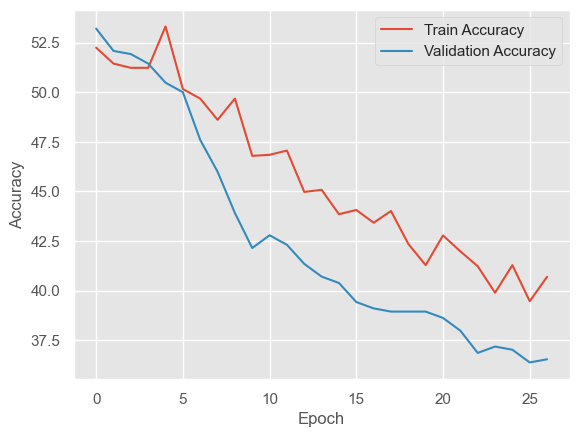

Best validation accuracy: 53.205128205128204
Accuracy: 0.5208333333333334
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  4  71 199  41   0]
 [  0   7 175 126   1]
 [  0   0   0   0   0]]


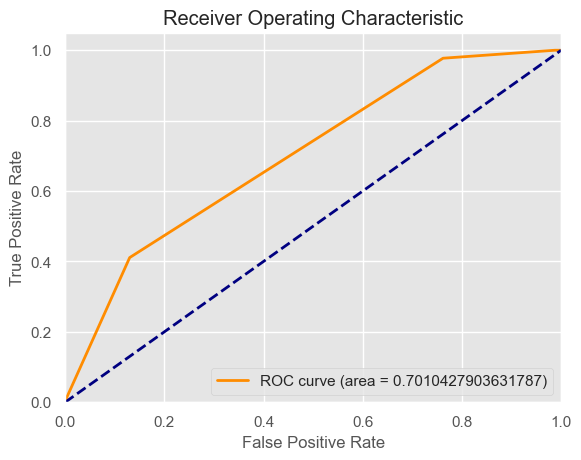

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'Comprehensive Environmental Augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5208333333333334, 'Training Time (s)': 2094.5823945999146}


  1%|▊                                                                                 | 1/100 [00:11<18:42, 11.34s/it]

Epoch 1/100, Train Acc: 52.24598930481283, Val Acc: 51.44230769230769


  2%|█▋                                                                                | 2/100 [00:22<18:09, 11.12s/it]

Epoch 2/100, Train Acc: 51.22994652406417, Val Acc: 50.80128205128205


  3%|██▍                                                                               | 3/100 [00:33<18:00, 11.14s/it]

Epoch 3/100, Train Acc: 50.6951871657754, Val Acc: 50.0


  4%|███▎                                                                              | 4/100 [00:44<18:00, 11.26s/it]

Epoch 4/100, Train Acc: 50.0, Val Acc: 49.67948717948718


  5%|████                                                                              | 5/100 [00:56<17:57, 11.35s/it]

Epoch 5/100, Train Acc: 49.037433155080215, Val Acc: 48.717948717948715


  6%|████▉                                                                             | 6/100 [01:07<17:42, 11.30s/it]

Epoch 6/100, Train Acc: 48.342245989304814, Val Acc: 47.43589743589744


  7%|█████▋                                                                            | 7/100 [01:18<17:26, 11.25s/it]

Epoch 7/100, Train Acc: 46.524064171122994, Val Acc: 44.87179487179487


  8%|██████▌                                                                           | 8/100 [01:30<17:15, 11.26s/it]

Epoch 8/100, Train Acc: 45.668449197860966, Val Acc: 45.3525641025641


  9%|███████▍                                                                          | 9/100 [01:41<17:00, 11.21s/it]

Epoch 9/100, Train Acc: 45.080213903743314, Val Acc: 44.87179487179487


 10%|████████                                                                         | 10/100 [01:52<16:46, 11.18s/it]

Epoch 10/100, Train Acc: 44.06417112299465, Val Acc: 44.55128205128205


 11%|████████▉                                                                        | 11/100 [02:03<16:32, 11.15s/it]

Epoch 11/100, Train Acc: 43.31550802139037, Val Acc: 43.10897435897436


 12%|█████████▋                                                                       | 12/100 [02:14<16:16, 11.10s/it]

Epoch 12/100, Train Acc: 42.35294117647059, Val Acc: 41.98717948717949


 13%|██████████▌                                                                      | 13/100 [02:25<16:07, 11.13s/it]

Epoch 13/100, Train Acc: 41.97860962566845, Val Acc: 42.30769230769231


 14%|███████████▎                                                                     | 14/100 [02:36<16:02, 11.19s/it]

Epoch 14/100, Train Acc: 40.160427807486634, Val Acc: 41.34615384615385


 15%|████████████▏                                                                    | 15/100 [02:47<15:48, 11.15s/it]

Epoch 15/100, Train Acc: 38.8235294117647, Val Acc: 39.743589743589745


 16%|████████████▉                                                                    | 16/100 [02:59<15:40, 11.20s/it]

Epoch 16/100, Train Acc: 38.288770053475936, Val Acc: 38.94230769230769


 17%|█████████████▊                                                                   | 17/100 [03:10<15:33, 11.25s/it]

Epoch 17/100, Train Acc: 38.6096256684492, Val Acc: 39.26282051282051


 18%|██████████████▌                                                                  | 18/100 [03:21<15:16, 11.18s/it]

Epoch 18/100, Train Acc: 38.77005347593583, Val Acc: 38.62179487179487


 19%|███████████████▍                                                                 | 19/100 [03:32<15:07, 11.20s/it]

Epoch 19/100, Train Acc: 38.77005347593583, Val Acc: 38.14102564102564


 20%|████████████████▏                                                                | 20/100 [03:44<15:01, 11.27s/it]

Epoch 20/100, Train Acc: 38.77005347593583, Val Acc: 38.62179487179487


 21%|█████████████████                                                                | 21/100 [03:55<14:44, 11.20s/it]

Epoch 21/100, Train Acc: 38.716577540106954, Val Acc: 38.782051282051285


 22%|█████████████████▊                                                               | 22/100 [04:06<14:34, 11.21s/it]

Epoch 22/100, Train Acc: 38.50267379679144, Val Acc: 38.94230769230769


 23%|██████████████████▋                                                              | 23/100 [04:17<14:22, 11.20s/it]

Epoch 23/100, Train Acc: 37.593582887700535, Val Acc: 37.66025641025641


 24%|███████████████████▍                                                             | 24/100 [04:29<14:12, 11.22s/it]

Epoch 24/100, Train Acc: 37.219251336898395, Val Acc: 37.5


 25%|████████████████████▎                                                            | 25/100 [04:40<14:10, 11.34s/it]

Epoch 25/100, Train Acc: 37.48663101604278, Val Acc: 38.14102564102564


 26%|█████████████████████                                                            | 26/100 [04:51<13:56, 11.30s/it]

Epoch 26/100, Train Acc: 37.16577540106952, Val Acc: 37.01923076923077


 26%|█████████████████████                                                            | 26/100 [05:02<14:22, 11.65s/it]

Epoch 27/100, Train Acc: 37.37967914438503, Val Acc: 37.33974358974359
Early stopping triggered at epoch 27


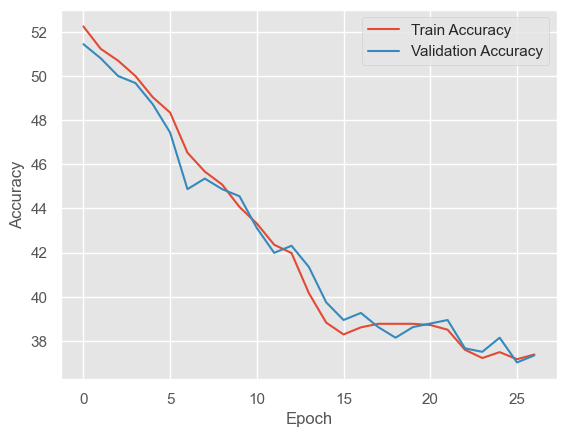

Best validation accuracy: 51.44230769230769
Accuracy: 0.5176282051282052
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  6  72 197  40   0]
 [  0   8 174 126   1]
 [  0   0   0   0   0]]


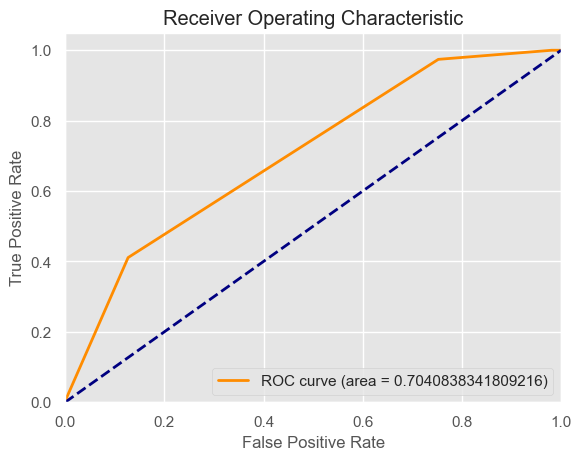

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5176282051282052, 'Training Time (s)': 303.53780794143677}


  1%|▊                                                                               | 1/100 [01:18<2:08:56, 78.14s/it]

Epoch 1/100, Train Acc: 49.67914438502674, Val Acc: 50.48076923076923


  2%|█▌                                                                              | 2/100 [02:35<2:07:21, 77.97s/it]

Epoch 2/100, Train Acc: 47.86096256684492, Val Acc: 50.48076923076923


  3%|██▍                                                                             | 3/100 [03:52<2:05:05, 77.38s/it]

Epoch 3/100, Train Acc: 47.593582887700535, Val Acc: 48.55769230769231


  4%|███▏                                                                            | 4/100 [05:09<2:03:40, 77.30s/it]

Epoch 4/100, Train Acc: 46.20320855614973, Val Acc: 46.31410256410256


  5%|████                                                                            | 5/100 [06:27<2:02:43, 77.51s/it]

Epoch 5/100, Train Acc: 46.36363636363637, Val Acc: 45.19230769230769


  6%|████▊                                                                           | 6/100 [07:45<2:01:30, 77.55s/it]

Epoch 6/100, Train Acc: 46.36363636363637, Val Acc: 43.91025641025641


  7%|█████▌                                                                          | 7/100 [09:08<2:03:14, 79.51s/it]

Epoch 7/100, Train Acc: 45.294117647058826, Val Acc: 42.30769230769231


  8%|██████▍                                                                         | 8/100 [10:27<2:01:13, 79.06s/it]

Epoch 8/100, Train Acc: 42.83422459893048, Val Acc: 42.94871794871795


  9%|███████▏                                                                        | 9/100 [11:44<1:59:04, 78.51s/it]

Epoch 9/100, Train Acc: 43.04812834224599, Val Acc: 43.26923076923077


 10%|███████▉                                                                       | 10/100 [13:01<1:57:15, 78.17s/it]

Epoch 10/100, Train Acc: 43.68983957219251, Val Acc: 42.30769230769231


 11%|████████▋                                                                      | 11/100 [14:19<1:55:45, 78.04s/it]

Epoch 11/100, Train Acc: 42.72727272727273, Val Acc: 41.18589743589744


 12%|█████████▍                                                                     | 12/100 [15:36<1:54:10, 77.85s/it]

Epoch 12/100, Train Acc: 41.49732620320856, Val Acc: 40.86538461538461


 13%|██████████▎                                                                    | 13/100 [16:54<1:52:47, 77.78s/it]

Epoch 13/100, Train Acc: 41.92513368983957, Val Acc: 40.38461538461539


 14%|███████████                                                                    | 14/100 [18:12<1:51:29, 77.78s/it]

Epoch 14/100, Train Acc: 40.80213903743316, Val Acc: 38.94230769230769


 15%|███████████▊                                                                   | 15/100 [19:29<1:50:06, 77.72s/it]

Epoch 15/100, Train Acc: 40.74866310160428, Val Acc: 37.98076923076923


 16%|████████████▋                                                                  | 16/100 [20:48<1:49:00, 77.86s/it]

Epoch 16/100, Train Acc: 39.037433155080215, Val Acc: 37.66025641025641


 17%|█████████████▍                                                                 | 17/100 [22:05<1:47:38, 77.81s/it]

Epoch 17/100, Train Acc: 41.283422459893046, Val Acc: 36.69871794871795


 18%|██████████████▏                                                                | 18/100 [23:23<1:46:11, 77.70s/it]

Epoch 18/100, Train Acc: 39.62566844919786, Val Acc: 37.01923076923077


 19%|███████████████                                                                | 19/100 [24:41<1:44:57, 77.74s/it]

Epoch 19/100, Train Acc: 38.87700534759358, Val Acc: 37.33974358974359


 20%|███████████████▊                                                               | 20/100 [25:58<1:43:40, 77.75s/it]

Epoch 20/100, Train Acc: 41.06951871657754, Val Acc: 36.85897435897436


 21%|████████████████▌                                                              | 21/100 [27:16<1:42:23, 77.77s/it]

Epoch 21/100, Train Acc: 40.42780748663102, Val Acc: 36.37820512820513


 22%|█████████████████▍                                                             | 22/100 [28:34<1:41:07, 77.79s/it]

Epoch 22/100, Train Acc: 38.288770053475936, Val Acc: 36.05769230769231


 23%|██████████████████▏                                                            | 23/100 [29:52<1:39:43, 77.71s/it]

Epoch 23/100, Train Acc: 39.67914438502674, Val Acc: 35.57692307692308


 24%|██████████████████▉                                                            | 24/100 [31:09<1:38:20, 77.64s/it]

Epoch 24/100, Train Acc: 40.855614973262036, Val Acc: 35.57692307692308


 25%|███████████████████▊                                                           | 25/100 [32:27<1:37:08, 77.72s/it]

Epoch 25/100, Train Acc: 38.50267379679144, Val Acc: 35.09615384615385


 26%|████████████████████▌                                                          | 26/100 [33:44<1:35:47, 77.67s/it]

Epoch 26/100, Train Acc: 39.144385026737964, Val Acc: 36.217948717948715


 26%|████████████████████▌                                                          | 26/100 [35:02<1:39:44, 80.87s/it]

Epoch 27/100, Train Acc: 37.86096256684492, Val Acc: 33.81410256410256
Early stopping triggered at epoch 27


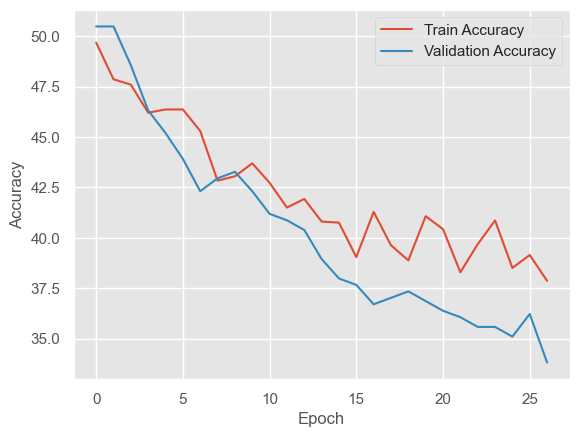

Best validation accuracy: 50.48076923076923
Accuracy: 0.48878205128205127
Confusion Matrix:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  1   7  84 186  37]
 [  0   0  10 180 119]]


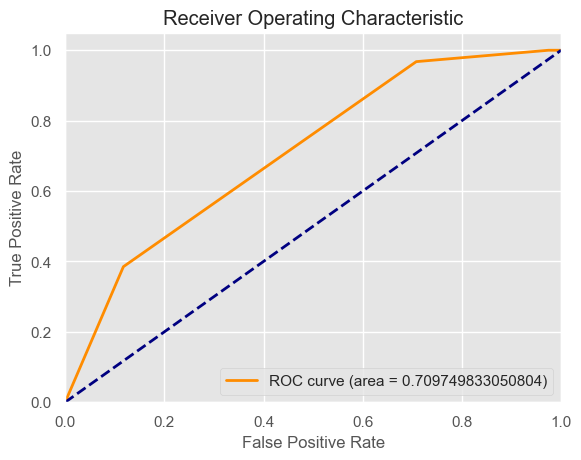

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'omprehensive Environmental Augmentation & mixup', 'mixup': True, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.48878205128205127, 'Training Time (s)': 2103.0447051525116}


In [ ]:
data_configs = list(itertools.product(
                                        models,
                                       data_loaders,
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )

df_datas = train_configs(configurations=data_configs)


### 5.2.2 Display DataFrame of Experiment Results

In [ ]:
df_datas['early stopping epoch'] = [29, 27, 36, 27, 31, 27, 37, 30, 27, 27, 27, 27, 27, 33, 32, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
df_datas.drop(['mixup', 'Optimizer', 'LR Scheduler' ], axis=1)

Model Name      Task                                        Data Type  \
0   CustomCNN     label                             No data augmentation   
1   CustomCNN     label                 Basic Natural Scene Augmentation   
2   CustomCNN     label                    Advanced Realism Augmentation   
3   CustomCNN     label         Comprehensive Environmental Augmentation   
4   CustomCNN     label                                            mixup   
5   CustomCNN     label  omprehensive Environmental Augmentation & mixup   
6   CustomCNN  realness                             No data augmentation   
7   CustomCNN  realness                 Basic Natural Scene Augmentation   
8   CustomCNN  realness                    Advanced Realism Augmentation   
9   CustomCNN  realness         Comprehensive Environmental Augmentation   
10  CustomCNN  realness                                            mixup   
11  CustomCNN  realness  omprehensive Environmental Augmentation & mixup   
12     resnet     label                             No data augmentation   
13     resnet     label                 Basic Natural Scene Augmentation   
14     resnet     label                    Advanced Realism Augmentation   
15     resnet     label         Comprehensive Environmental Augmentation   
16     resnet     label                                            mixup   
17     resnet     label  omprehensive Environmental Augmentation & mixup   
18     resnet  realness                             No data augmentation   
19     resnet  realness                 Basic Natural Scene Augmentation   
20     resnet  realness                    Advanced Realism Augmentation   
21     resnet  realness         Comprehensive Environmental Augmentation   
22     resnet  realness                                            mixup   
23     resnet  realness  omprehensive Environmental Augmentation & mixup   
24  mobilenet     label                             No data augmentation   
25  mobilenet     label                 Basic Natural Scene Augmentation   
26  mobilenet     label                    Advanced Realism Augmentation   
27  mobilenet     label         Comprehensive Environmental Augmentation   
28  mobilenet     label                                            mixup   
29  mobilenet     label  omprehensive Environmental Augmentation & mixup   
30  mobilenet  realness                             No data augmentation   
31  mobilenet  realness                 Basic Natural Scene Augmentation   
32  mobilenet  realness                    Advanced Realism Augmentation   
33  mobilenet  realness         Comprehensive Environmental Augmentation   
34  mobilenet  realness                                            mixup   
35  mobilenet  realness  omprehensive Environmental Augmentation & mixup   

    Accuracy  Training Time (s)  early stopping epoch  
0   0.915064         313.658984                    29  
1   0.907051        1514.001399                    27  
2   0.919872        2835.333986                    36  
3   0.913462        2073.969218                    27  
4   0.937500         341.370238                    31  
5   0.924679        2078.575813                    27  
6   0.700321         408.386606                    37  
7   0.703526        1633.543294                    30  
8   0.689103        2104.749639                    27  
9   0.669872        2091.676894                    27  
10  0.644231         299.585459                    27  
11  0.684295        2079.164177                    27  
12  0.961538         695.854137                    27  
13  0.969551        2210.591666                    33  
14  0.958333        2839.830599                    32  
15  0.964744        2377.868647                    27  
16  0.963141         693.559095                    27  
17  0.951923        2388.999630                    27  
18  0.565705         691.370951                    27  
19  0.527244        1810.094403                    27  
20  0.493590  

In [ ]:
# Optionally, save to a CSV file
df_datas.to_csv('df_datas.csv', index=False)

### 5.2.3 Analyze the results

Before diving into the analysis of the data augmentation effects on our models, let's first explain the mixup method, as it is one of the augmentation techniques used in your experiment and could significantly impact the results.

##### Mixup Method Overview

The mixup method is an approach to data augmentation that operates on the principle of constructing virtual training examples. Traditional data augmentation techniques involve applying various transformations to the input images, such as rotation, flipping, cropping, etc., to create a more diverse training dataset. Mixup goes a step further by blending two images and their labels, creating a new, mixed image along with a mixed label. The idea is to encourage the model to predict less confidently when it is unsure, smoothing the model's decision boundary.

The process can be described by the following equations:

- Given two input images, $x_i$ and $x_j$, and their corresponding labels, $y_i$ and $y_j$, mixup creates a new image, $x_{mix}$, and its label, $y_{mix}$, using:

    $x_{mix} = \lambda x_i + (1 - \lambda) x_j$

    $y_{mix} = \lambda y_i + (1 - \lambda) y_j$
  
- Here, $\lambda$ is a parameter drawn from a Beta distribution, $Beta$($\alpha$, $\alpha$), for some $\alpha > 0$. $\alpha$ controls the strength of the interpolation between the images and their labels. A common choice for $\alpha$ is $0.2$.

This method encourages the model to generalize better by learning from linear interpolations of the feature vectors and the labels, making it robust to input noise and potentially reducing overfitting.


##### Analysis of Data Augmentation Effects on Models

Now, let's analyze how the different data augmentation modes impacted the performance of the CustomCNN, ResNet, and MobileNet models across the two tasks (label and realness classification). We will focus on accuracy, training time, and early stopping epoch as our primary metrics.

1. **Effect on Accuracy:**
   - **Label Classification:**
     - Across all models, we observe that mixup generally enhances accuracy, with the CustomCNN model showing a significant improvement from no data augmentation to mixup. This suggests that mixup's ability to create more diverse training examples from the existing data can help models learn more generalized and robust features.
     - Basic Natural Scene and Advanced Realism Augmentation also improved accuracy in some cases, indicating that introducing realistic variations to the training data can help models better capture the variability in natural scenes.
   - **Realness Classification:**
     - The impact of data augmentation on realness classification accuracy varies more widely between models. For example, the CustomCNN model showed slight improvements or decreases depending on the augmentation type, while mixup generally decreased accuracy for this task. This variation could indicate that the realness classification task may not benefit as uniformly from data augmentation, possibly due to the subtlety of features distinguishing real from AI-generated images.

2. **Effect on Training Time:**
   - Data augmentation significantly increases training time across all models and tasks, with Advanced Realism and Comprehensive Environmental Augmentation requiring notably longer times. This increase is expected as data augmentation introduces more complexity and variability into the training process.
   - Mixup, while effective at improving accuracy, also adds to the training time but not as drastically as other augmentation methods, likely due to its computational efficiency compared to applying multiple image transformations.

3. **Early Stopping Epoch:**
   - The early stopping epoch tends to increase with more complex augmentation strategies, indicating that the model requires more training to converge. However, mixup does not always extend the number of epochs significantly, suggesting that while it adds diversity to the training data, it does so in a manner that remains relatively efficient for model training.

### Conclusion

Data augmentation, especially mixup, has shown to be beneficial for improving model performance in label classification tasks by creating more diverse and robust training examples. However, its impact on realness classification is less consistent, possibly due to the intrinsic complexity of distinguishing real from AI-generated images. The choice of augmentation strategy should be carefully considered in relation to the specific task, model architecture, and the computational resources available.

## 5.3 Comparison of optimizers

comparing different optimizer strategies and their impact on model training and performance.

### 5.3.1 Optimizer Experiment

This sets up and executes an experiment to compare the effects of different optimizers on model performance. It generates configurations combining a model, a data loader, various optimizers, and a default learning rate scheduler (withoutLR), and then trains and evaluates each configuration.

  1%|▊                                                                                 | 1/100 [00:11<18:31, 11.23s/it]

Epoch 1/100, Train Acc: 93.475935828877, Val Acc: 91.66666666666667


  2%|█▋                                                                                | 2/100 [00:19<15:55,  9.75s/it]

Epoch 2/100, Train Acc: 94.59893048128342, Val Acc: 92.94871794871794


  3%|██▍                                                                               | 3/100 [00:28<14:45,  9.12s/it]

Epoch 3/100, Train Acc: 94.06417112299465, Val Acc: 92.1474358974359


  4%|███▎                                                                              | 4/100 [00:36<14:08,  8.84s/it]

Epoch 4/100, Train Acc: 95.1336898395722, Val Acc: 93.91025641025641


  5%|████                                                                              | 5/100 [00:44<13:16,  8.39s/it]

Epoch 5/100, Train Acc: 95.3475935828877, Val Acc: 93.42948717948718


  6%|████▉                                                                             | 6/100 [00:52<13:03,  8.34s/it]

Epoch 6/100, Train Acc: 95.56149732620321, Val Acc: 93.26923076923077


  7%|█████▋                                                                            | 7/100 [01:00<12:51,  8.30s/it]

Epoch 7/100, Train Acc: 94.8663101604278, Val Acc: 92.62820512820512


  8%|██████▌                                                                           | 8/100 [01:08<12:33,  8.19s/it]

Epoch 8/100, Train Acc: 95.56149732620321, Val Acc: 92.1474358974359


  9%|███████▍                                                                          | 9/100 [01:17<12:35,  8.30s/it]

Epoch 9/100, Train Acc: 95.40106951871658, Val Acc: 92.62820512820512


 10%|████████                                                                         | 10/100 [01:27<13:13,  8.82s/it]

Epoch 10/100, Train Acc: 94.33155080213903, Val Acc: 92.1474358974359


 11%|████████▉                                                                        | 11/100 [01:37<13:49,  9.32s/it]

Epoch 11/100, Train Acc: 94.43850267379679, Val Acc: 92.62820512820512


 12%|█████████▋                                                                       | 12/100 [01:48<14:27,  9.86s/it]

Epoch 12/100, Train Acc: 95.88235294117646, Val Acc: 93.58974358974359


 13%|██████████▌                                                                      | 13/100 [01:59<14:51, 10.25s/it]

Epoch 13/100, Train Acc: 95.56149732620321, Val Acc: 92.94871794871794


 14%|███████████▎                                                                     | 14/100 [02:10<14:57, 10.44s/it]

Epoch 14/100, Train Acc: 95.66844919786097, Val Acc: 93.58974358974359


 15%|████████████▏                                                                    | 15/100 [02:22<15:06, 10.67s/it]

Epoch 15/100, Train Acc: 95.93582887700535, Val Acc: 93.26923076923077


 16%|████████████▉                                                                    | 16/100 [02:33<15:06, 10.79s/it]

Epoch 16/100, Train Acc: 96.2566844919786, Val Acc: 93.75


 17%|█████████████▊                                                                   | 17/100 [02:44<15:02, 10.87s/it]

Epoch 17/100, Train Acc: 96.0427807486631, Val Acc: 93.10897435897436


 18%|██████████████▌                                                                  | 18/100 [02:55<14:54, 10.91s/it]

Epoch 18/100, Train Acc: 96.57754010695187, Val Acc: 93.26923076923077


 19%|███████████████▍                                                                 | 19/100 [03:06<14:46, 10.95s/it]

Epoch 19/100, Train Acc: 96.31016042780749, Val Acc: 93.58974358974359


 20%|████████████████▏                                                                | 20/100 [03:17<14:48, 11.11s/it]

Epoch 20/100, Train Acc: 95.98930481283422, Val Acc: 93.42948717948718


 21%|█████████████████                                                                | 21/100 [03:29<14:52, 11.29s/it]

Epoch 21/100, Train Acc: 96.09625668449198, Val Acc: 93.42948717948718


 22%|█████████████████▊                                                               | 22/100 [03:41<14:53, 11.45s/it]

Epoch 22/100, Train Acc: 96.0427807486631, Val Acc: 92.94871794871794


 23%|██████████████████▋                                                              | 23/100 [03:53<14:50, 11.56s/it]

Epoch 23/100, Train Acc: 96.89839572192513, Val Acc: 93.75


 24%|███████████████████▍                                                             | 24/100 [04:04<14:45, 11.65s/it]

Epoch 24/100, Train Acc: 96.36363636363636, Val Acc: 94.07051282051282


 25%|████████████████████▎                                                            | 25/100 [04:16<14:43, 11.78s/it]

Epoch 25/100, Train Acc: 96.63101604278074, Val Acc: 93.42948717948718


 26%|█████████████████████                                                            | 26/100 [04:29<14:44, 11.95s/it]

Epoch 26/100, Train Acc: 96.57754010695187, Val Acc: 93.58974358974359


 27%|█████████████████████▊                                                           | 27/100 [04:41<14:29, 11.92s/it]

Epoch 27/100, Train Acc: 96.95187165775401, Val Acc: 93.26923076923077


 28%|██████████████████████▋                                                          | 28/100 [04:53<14:21, 11.96s/it]

Epoch 28/100, Train Acc: 97.2192513368984, Val Acc: 93.58974358974359


 28%|██████████████████████▋                                                          | 28/100 [05:05<13:04, 10.90s/it]

Epoch 29/100, Train Acc: 97.00534759358288, Val Acc: 93.75
Early stopping triggered at epoch 29


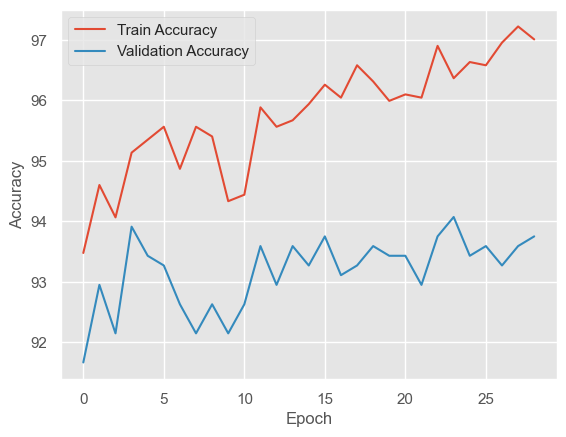

Best validation accuracy: 94.07051282051282
Accuracy: 0.9326923076923077
Confusion Matrix:
[[207  10   8]
 [ 12 182   9]
 [  1   2 193]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9326923076923077, 'Training Time (s)': 305.4561517238617}


  1%|▊                                                                                 | 1/100 [00:12<19:57, 12.09s/it]

Epoch 1/100, Train Acc: 74.43850267379679, Val Acc: 76.28205128205128


  2%|█▋                                                                                | 2/100 [00:24<19:46, 12.11s/it]

Epoch 2/100, Train Acc: 84.81283422459893, Val Acc: 82.37179487179488


  3%|██▍                                                                               | 3/100 [00:36<19:36, 12.13s/it]

Epoch 3/100, Train Acc: 87.80748663101605, Val Acc: 86.21794871794872


  4%|███▎                                                                              | 4/100 [00:48<19:31, 12.20s/it]

Epoch 4/100, Train Acc: 87.54010695187166, Val Acc: 85.09615384615384


  5%|████                                                                              | 5/100 [01:00<19:12, 12.13s/it]

Epoch 5/100, Train Acc: 84.22459893048128, Val Acc: 84.93589743589743


  6%|████▉                                                                             | 6/100 [01:12<18:59, 12.12s/it]

Epoch 6/100, Train Acc: 86.31016042780749, Val Acc: 86.0576923076923


  7%|█████▋                                                                            | 7/100 [01:24<18:45, 12.11s/it]

Epoch 7/100, Train Acc: 91.55080213903743, Val Acc: 89.74358974358974


  8%|██████▌                                                                           | 8/100 [01:36<18:33, 12.11s/it]

Epoch 8/100, Train Acc: 86.0427807486631, Val Acc: 85.57692307692308


  9%|███████▍                                                                          | 9/100 [01:48<18:17, 12.06s/it]

Epoch 9/100, Train Acc: 84.49197860962566, Val Acc: 83.81410256410257


 10%|████████                                                                         | 10/100 [02:01<18:07, 12.08s/it]

Epoch 10/100, Train Acc: 87.05882352941177, Val Acc: 84.77564102564102


 11%|████████▉                                                                        | 11/100 [02:13<17:57, 12.11s/it]

Epoch 11/100, Train Acc: 86.20320855614973, Val Acc: 85.41666666666667


 12%|█████████▋                                                                       | 12/100 [02:25<17:41, 12.06s/it]

Epoch 12/100, Train Acc: 87.37967914438502, Val Acc: 85.09615384615384


 13%|██████████▌                                                                      | 13/100 [02:37<17:36, 12.14s/it]

Epoch 13/100, Train Acc: 82.3529411764706, Val Acc: 77.40384615384616


 14%|███████████▎                                                                     | 14/100 [02:49<17:21, 12.12s/it]

Epoch 14/100, Train Acc: 87.00534759358288, Val Acc: 87.01923076923077


 15%|████████████▏                                                                    | 15/100 [03:01<17:06, 12.08s/it]

Epoch 15/100, Train Acc: 85.08021390374331, Val Acc: 84.2948717948718


 16%|████████████▉                                                                    | 16/100 [03:13<17:02, 12.17s/it]

Epoch 16/100, Train Acc: 86.7379679144385, Val Acc: 83.49358974358974


 17%|█████████████▊                                                                   | 17/100 [03:25<16:45, 12.12s/it]

Epoch 17/100, Train Acc: 90.42780748663101, Val Acc: 89.42307692307692


 18%|██████████████▌                                                                  | 18/100 [03:38<16:33, 12.12s/it]

Epoch 18/100, Train Acc: 88.23529411764706, Val Acc: 86.69871794871794


 19%|███████████████▍                                                                 | 19/100 [03:50<16:20, 12.11s/it]

Epoch 19/100, Train Acc: 80.32085561497327, Val Acc: 77.56410256410257


 20%|████████████████▏                                                                | 20/100 [04:02<16:03, 12.05s/it]

Epoch 20/100, Train Acc: 91.92513368983957, Val Acc: 90.5448717948718


 21%|█████████████████                                                                | 21/100 [04:14<16:02, 12.19s/it]

Epoch 21/100, Train Acc: 89.57219251336899, Val Acc: 88.78205128205128


 22%|█████████████████▊                                                               | 22/100 [04:26<15:42, 12.08s/it]

Epoch 22/100, Train Acc: 91.60427807486631, Val Acc: 90.38461538461539


 23%|██████████████████▋                                                              | 23/100 [04:38<15:27, 12.04s/it]

Epoch 23/100, Train Acc: 92.19251336898395, Val Acc: 90.7051282051282


 24%|███████████████████▍                                                             | 24/100 [04:50<15:18, 12.08s/it]

Epoch 24/100, Train Acc: 93.04812834224599, Val Acc: 91.02564102564102


 25%|████████████████████▎                                                            | 25/100 [05:02<15:06, 12.08s/it]

Epoch 25/100, Train Acc: 86.63101604278074, Val Acc: 85.8974358974359


 26%|█████████████████████                                                            | 26/100 [05:14<14:55, 12.10s/it]

Epoch 26/100, Train Acc: 91.33689839572193, Val Acc: 87.66025641025641


 27%|█████████████████████▊                                                           | 27/100 [05:26<14:44, 12.11s/it]

Epoch 27/100, Train Acc: 89.57219251336899, Val Acc: 88.9423076923077


 28%|██████████████████████▋                                                          | 28/100 [05:38<14:29, 12.08s/it]

Epoch 28/100, Train Acc: 86.09625668449198, Val Acc: 86.37820512820512


 28%|██████████████████████▋                                                          | 28/100 [05:51<15:02, 12.54s/it]

Epoch 29/100, Train Acc: 80.74866310160428, Val Acc: 80.44871794871794
Early stopping triggered at epoch 29


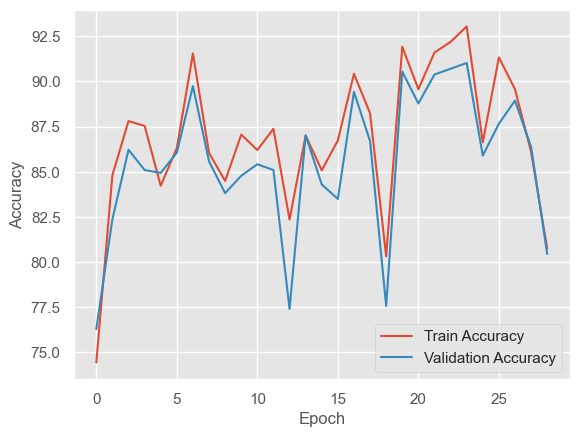

Best validation accuracy: 91.02564102564102
Accuracy: 0.9166666666666666
Confusion Matrix:
[[202  16   7]
 [  6 189   8]
 [  3  12 181]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'Adam', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9166666666666666, 'Training Time (s)': 351.3683748245239}


  1%|▊                                                                                 | 1/100 [00:12<19:52, 12.05s/it]

Epoch 1/100, Train Acc: 73.10160427807487, Val Acc: 71.7948717948718


  2%|█▋                                                                                | 2/100 [00:24<19:48, 12.12s/it]

Epoch 2/100, Train Acc: 88.82352941176471, Val Acc: 85.8974358974359


  3%|██▍                                                                               | 3/100 [00:36<19:39, 12.16s/it]

Epoch 3/100, Train Acc: 86.2566844919786, Val Acc: 87.98076923076923


  4%|███▎                                                                              | 4/100 [00:48<19:22, 12.11s/it]

Epoch 4/100, Train Acc: 86.524064171123, Val Acc: 84.77564102564102


  5%|████                                                                              | 5/100 [01:00<19:07, 12.08s/it]

Epoch 5/100, Train Acc: 83.68983957219251, Val Acc: 84.2948717948718


  6%|████▉                                                                             | 6/100 [01:12<18:56, 12.09s/it]

Epoch 6/100, Train Acc: 89.67914438502673, Val Acc: 87.33974358974359


  7%|█████▋                                                                            | 7/100 [01:24<18:46, 12.12s/it]

Epoch 7/100, Train Acc: 90.16042780748663, Val Acc: 87.33974358974359


  8%|██████▌                                                                           | 8/100 [01:36<18:31, 12.08s/it]

Epoch 8/100, Train Acc: 90.9090909090909, Val Acc: 90.5448717948718


  9%|███████▍                                                                          | 9/100 [01:49<18:30, 12.21s/it]

Epoch 9/100, Train Acc: 91.92513368983957, Val Acc: 89.90384615384616


 10%|████████                                                                         | 10/100 [02:00<18:05, 12.06s/it]

Epoch 10/100, Train Acc: 93.68983957219251, Val Acc: 90.86538461538461


 11%|████████▉                                                                        | 11/100 [02:13<17:57, 12.11s/it]

Epoch 11/100, Train Acc: 91.76470588235294, Val Acc: 90.06410256410257


 12%|█████████▋                                                                       | 12/100 [02:25<17:49, 12.15s/it]

Epoch 12/100, Train Acc: 90.37433155080214, Val Acc: 88.46153846153847


 13%|██████████▌                                                                      | 13/100 [02:37<17:31, 12.08s/it]

Epoch 13/100, Train Acc: 93.68983957219251, Val Acc: 90.38461538461539


 14%|███████████▎                                                                     | 14/100 [02:49<17:15, 12.05s/it]

Epoch 14/100, Train Acc: 93.9572192513369, Val Acc: 92.46794871794872


 15%|████████████▏                                                                    | 15/100 [03:01<17:08, 12.10s/it]

Epoch 15/100, Train Acc: 84.49197860962566, Val Acc: 83.33333333333333


 16%|████████████▉                                                                    | 16/100 [03:13<16:55, 12.09s/it]

Epoch 16/100, Train Acc: 91.22994652406418, Val Acc: 88.9423076923077


 17%|█████████████▊                                                                   | 17/100 [03:25<16:41, 12.07s/it]

Epoch 17/100, Train Acc: 89.0909090909091, Val Acc: 88.46153846153847


 18%|██████████████▌                                                                  | 18/100 [03:37<16:26, 12.04s/it]

Epoch 18/100, Train Acc: 91.17647058823529, Val Acc: 89.26282051282051


 19%|███████████████▍                                                                 | 19/100 [03:49<16:14, 12.03s/it]

Epoch 19/100, Train Acc: 90.85561497326204, Val Acc: 89.1025641025641


 20%|████████████████▏                                                                | 20/100 [04:01<16:08, 12.11s/it]

Epoch 20/100, Train Acc: 90.05347593582887, Val Acc: 87.98076923076923


 21%|█████████████████                                                                | 21/100 [04:14<15:59, 12.15s/it]

Epoch 21/100, Train Acc: 92.51336898395722, Val Acc: 90.38461538461539


 22%|█████████████████▊                                                               | 22/100 [04:26<15:45, 12.12s/it]

Epoch 22/100, Train Acc: 90.10695187165776, Val Acc: 87.5


 23%|██████████████████▋                                                              | 23/100 [04:38<15:26, 12.04s/it]

Epoch 23/100, Train Acc: 90.05347593582887, Val Acc: 88.62179487179488


 24%|███████████████████▍                                                             | 24/100 [04:50<15:23, 12.15s/it]

Epoch 24/100, Train Acc: 93.63636363636364, Val Acc: 91.02564102564102


 25%|████████████████████▎                                                            | 25/100 [05:02<15:03, 12.05s/it]

Epoch 25/100, Train Acc: 95.61497326203208, Val Acc: 90.7051282051282


 26%|█████████████████████                                                            | 26/100 [05:14<14:57, 12.12s/it]

Epoch 26/100, Train Acc: 88.07486631016043, Val Acc: 87.82051282051282


 26%|█████████████████████                                                            | 26/100 [05:26<15:29, 12.56s/it]

Epoch 27/100, Train Acc: 91.8716577540107, Val Acc: 90.86538461538461
Early stopping triggered at epoch 27


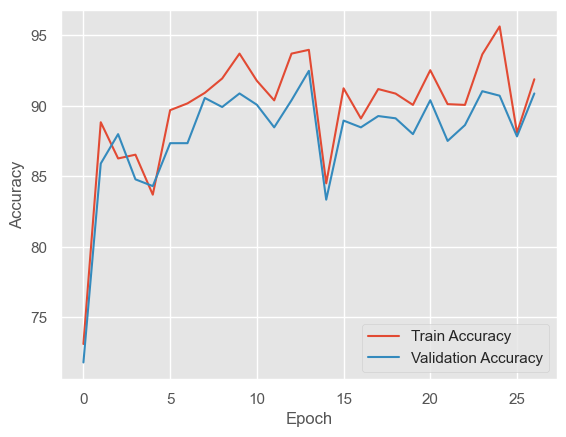

Best validation accuracy: 92.46794871794872
Accuracy: 0.9150641025641025
Confusion Matrix:
[[214   6   5]
 [ 23 172   8]
 [  3   8 185]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'AdamW', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9150641025641025, 'Training Time (s)': 326.9506871700287}


  1%|▊                                                                                 | 1/100 [00:12<19:53, 12.05s/it]

Epoch 1/100, Train Acc: 37.32620320855615, Val Acc: 35.8974358974359


  2%|█▋                                                                                | 2/100 [00:24<19:43, 12.08s/it]

Epoch 2/100, Train Acc: 45.401069518716575, Val Acc: 43.75


  3%|██▍                                                                               | 3/100 [00:36<19:25, 12.02s/it]

Epoch 3/100, Train Acc: 48.44919786096256, Val Acc: 52.56410256410256


  4%|███▎                                                                              | 4/100 [00:48<19:11, 12.00s/it]

Epoch 4/100, Train Acc: 52.406417112299465, Val Acc: 49.83974358974359


  5%|████                                                                              | 5/100 [01:00<19:08, 12.09s/it]

Epoch 5/100, Train Acc: 78.18181818181819, Val Acc: 77.40384615384616


  6%|████▉                                                                             | 6/100 [01:12<18:53, 12.06s/it]

Epoch 6/100, Train Acc: 76.47058823529412, Val Acc: 74.51923076923077


  7%|█████▋                                                                            | 7/100 [01:24<18:32, 11.96s/it]

Epoch 7/100, Train Acc: 77.05882352941177, Val Acc: 72.91666666666667


  8%|██████▌                                                                           | 8/100 [01:36<18:27, 12.03s/it]

Epoch 8/100, Train Acc: 84.49197860962566, Val Acc: 82.53205128205128


  9%|███████▍                                                                          | 9/100 [01:48<18:14, 12.03s/it]

Epoch 9/100, Train Acc: 72.51336898395722, Val Acc: 72.11538461538461


 10%|████████                                                                         | 10/100 [02:00<18:11, 12.12s/it]

Epoch 10/100, Train Acc: 87.86096256684492, Val Acc: 86.37820512820512


 11%|████████▉                                                                        | 11/100 [02:12<17:53, 12.06s/it]

Epoch 11/100, Train Acc: 87.37967914438502, Val Acc: 85.57692307692308


 12%|█████████▋                                                                       | 12/100 [02:24<17:43, 12.09s/it]

Epoch 12/100, Train Acc: 84.43850267379679, Val Acc: 82.8525641025641


 13%|██████████▌                                                                      | 13/100 [02:36<17:23, 12.00s/it]

Epoch 13/100, Train Acc: 87.6470588235294, Val Acc: 87.5


 14%|███████████▎                                                                     | 14/100 [02:48<17:25, 12.15s/it]

Epoch 14/100, Train Acc: 89.57219251336899, Val Acc: 86.53846153846153


 15%|████████████▏                                                                    | 15/100 [03:00<17:07, 12.08s/it]

Epoch 15/100, Train Acc: 83.58288770053476, Val Acc: 82.37179487179488


 16%|████████████▉                                                                    | 16/100 [03:13<16:55, 12.08s/it]

Epoch 16/100, Train Acc: 83.58288770053476, Val Acc: 82.6923076923077


 17%|█████████████▊                                                                   | 17/100 [03:25<16:41, 12.07s/it]

Epoch 17/100, Train Acc: 72.7807486631016, Val Acc: 76.12179487179488


 18%|██████████████▌                                                                  | 18/100 [03:36<16:25, 12.02s/it]

Epoch 18/100, Train Acc: 74.43850267379679, Val Acc: 74.83974358974359


 19%|███████████████▍                                                                 | 19/100 [03:49<16:24, 12.15s/it]

Epoch 19/100, Train Acc: 88.07486631016043, Val Acc: 85.57692307692308


 20%|████████████████▏                                                                | 20/100 [04:01<16:07, 12.09s/it]

Epoch 20/100, Train Acc: 89.0909090909091, Val Acc: 88.46153846153847


 21%|█████████████████                                                                | 21/100 [04:13<15:53, 12.07s/it]

Epoch 21/100, Train Acc: 87.27272727272727, Val Acc: 86.37820512820512


 22%|█████████████████▊                                                               | 22/100 [04:25<15:42, 12.09s/it]

Epoch 22/100, Train Acc: 81.33689839572193, Val Acc: 80.92948717948718


 23%|██████████████████▋                                                              | 23/100 [04:37<15:38, 12.19s/it]

Epoch 23/100, Train Acc: 91.3903743315508, Val Acc: 89.90384615384616


 24%|███████████████████▍                                                             | 24/100 [04:49<15:20, 12.12s/it]

Epoch 24/100, Train Acc: 92.99465240641712, Val Acc: 91.66666666666667


 25%|████████████████████▎                                                            | 25/100 [05:02<15:13, 12.17s/it]

Epoch 25/100, Train Acc: 91.01604278074866, Val Acc: 90.06410256410257


 26%|█████████████████████                                                            | 26/100 [05:13<14:52, 12.06s/it]

Epoch 26/100, Train Acc: 85.98930481283422, Val Acc: 83.65384615384616


 27%|█████████████████████▊                                                           | 27/100 [05:26<14:43, 12.10s/it]

Epoch 27/100, Train Acc: 88.02139037433155, Val Acc: 88.30128205128206


 28%|██████████████████████▋                                                          | 28/100 [05:38<14:27, 12.05s/it]

Epoch 28/100, Train Acc: 85.72192513368984, Val Acc: 81.73076923076923


 28%|██████████████████████▋                                                          | 28/100 [05:50<15:01, 12.52s/it]

Epoch 29/100, Train Acc: 89.62566844919786, Val Acc: 87.82051282051282
Early stopping triggered at epoch 29


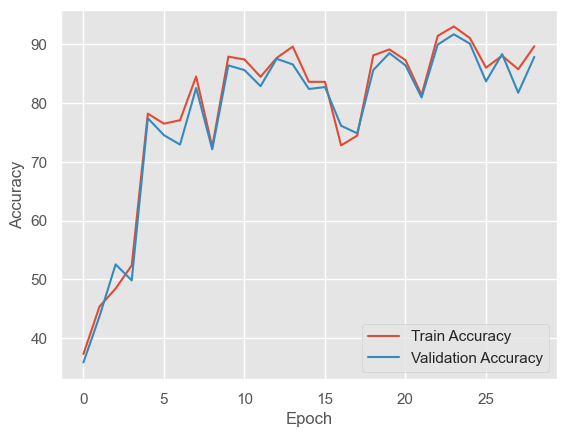

Best validation accuracy: 91.66666666666667
Accuracy: 0.9118589743589743
Confusion Matrix:
[[210   8   7]
 [ 18 175  10]
 [  1  11 184]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'RMSprop', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9118589743589743, 'Training Time (s)': 350.77200984954834}


  1%|▊                                                                                 | 1/100 [00:31<52:44, 31.96s/it]

Epoch 1/100, Train Acc: 85.8288770053476, Val Acc: 82.37179487179488


  2%|█▌                                                                              | 2/100 [01:43<1:30:05, 55.16s/it]

Epoch 2/100, Train Acc: 88.23529411764706, Val Acc: 84.61538461538461


  3%|██▍                                                                             | 3/100 [02:26<1:20:20, 49.70s/it]

Epoch 3/100, Train Acc: 90.32085561497327, Val Acc: 86.0576923076923


  4%|███▏                                                                            | 4/100 [03:14<1:18:32, 49.09s/it]

Epoch 4/100, Train Acc: 89.03743315508021, Val Acc: 85.73717948717949


  5%|████                                                                            | 5/100 [04:05<1:18:53, 49.83s/it]

Epoch 5/100, Train Acc: 90.74866310160428, Val Acc: 87.98076923076923


  6%|████▊                                                                           | 6/100 [05:02<1:21:33, 52.05s/it]

Epoch 6/100, Train Acc: 90.80213903743315, Val Acc: 88.62179487179488


  7%|█████▌                                                                          | 7/100 [06:04<1:25:53, 55.42s/it]

Epoch 7/100, Train Acc: 84.8663101604278, Val Acc: 82.8525641025641


  8%|██████▍                                                                         | 8/100 [07:15<1:32:28, 60.31s/it]

Epoch 8/100, Train Acc: 90.80213903743315, Val Acc: 89.58333333333333


  9%|███████▏                                                                        | 9/100 [08:22<1:34:35, 62.37s/it]

Epoch 9/100, Train Acc: 91.44385026737967, Val Acc: 90.5448717948718


 10%|███████▉                                                                       | 10/100 [08:48<1:17:01, 51.35s/it]

Epoch 10/100, Train Acc: 91.49732620320856, Val Acc: 89.26282051282051


 11%|████████▋                                                                      | 11/100 [09:34<1:13:21, 49.45s/it]

Epoch 11/100, Train Acc: 92.13903743315508, Val Acc: 88.78205128205128


 12%|█████████▍                                                                     | 12/100 [10:49<1:24:02, 57.30s/it]

Epoch 12/100, Train Acc: 93.36898395721926, Val Acc: 92.3076923076923


 13%|██████████▎                                                                    | 13/100 [12:22<1:39:03, 68.32s/it]

Epoch 13/100, Train Acc: 91.12299465240642, Val Acc: 87.98076923076923


 14%|███████████                                                                    | 14/100 [13:40<1:41:42, 70.96s/it]

Epoch 14/100, Train Acc: 92.83422459893048, Val Acc: 89.58333333333333


 15%|███████████▊                                                                   | 15/100 [14:13<1:24:38, 59.75s/it]

Epoch 15/100, Train Acc: 92.03208556149733, Val Acc: 90.38461538461539


 16%|████████████▋                                                                  | 16/100 [15:15<1:24:35, 60.43s/it]

Epoch 16/100, Train Acc: 91.55080213903743, Val Acc: 88.78205128205128


 17%|█████████████▍                                                                 | 17/100 [16:30<1:29:30, 64.71s/it]

Epoch 17/100, Train Acc: 93.63636363636364, Val Acc: 91.50641025641026


 18%|██████████████▏                                                                | 18/100 [17:41<1:31:06, 66.66s/it]

Epoch 18/100, Train Acc: 91.49732620320856, Val Acc: 88.46153846153847


 19%|███████████████                                                                | 19/100 [18:33<1:23:54, 62.15s/it]

Epoch 19/100, Train Acc: 93.31550802139037, Val Acc: 90.22435897435898


 20%|███████████████▊                                                               | 20/100 [18:59<1:08:39, 51.49s/it]

Epoch 20/100, Train Acc: 94.11764705882354, Val Acc: 91.18589743589743


 21%|████████████████▌                                                              | 21/100 [20:20<1:19:10, 60.14s/it]

Epoch 21/100, Train Acc: 92.0855614973262, Val Acc: 90.5448717948718


 22%|█████████████████▍                                                             | 22/100 [21:42<1:26:40, 66.68s/it]

Epoch 22/100, Train Acc: 94.1711229946524, Val Acc: 89.90384615384616


 23%|██████████████████▏                                                            | 23/100 [22:19<1:14:17, 57.90s/it]

Epoch 23/100, Train Acc: 93.7433155080214, Val Acc: 90.7051282051282


 24%|██████████████████▉                                                            | 24/100 [23:34<1:19:56, 63.12s/it]

Epoch 24/100, Train Acc: 93.2620320855615, Val Acc: 91.66666666666667


 25%|███████████████████▊                                                           | 25/100 [24:14<1:09:54, 55.93s/it]

Epoch 25/100, Train Acc: 93.7433155080214, Val Acc: 89.90384615384616


 26%|████████████████████▌                                                          | 26/100 [25:27<1:15:35, 61.29s/it]

Epoch 26/100, Train Acc: 93.04812834224599, Val Acc: 90.06410256410257


 26%|████████████████████▌                                                          | 26/100 [26:46<1:16:12, 61.79s/it]

Epoch 27/100, Train Acc: 94.54545454545455, Val Acc: 91.34615384615384
Early stopping triggered at epoch 27


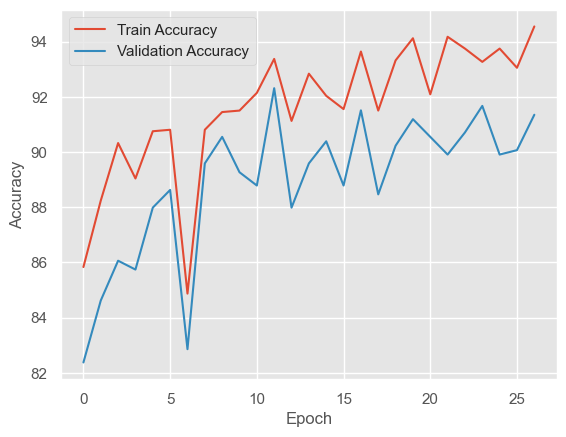

Best validation accuracy: 92.3076923076923
Accuracy: 0.9214743589743589
Confusion Matrix:
[[214   6   5]
 [ 19 179   5]
 [  1  13 182]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SAM', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9214743589743589, 'Training Time (s)': 1606.8099946975708}


In [ ]:
optim_configs = list(itertools.product(
                                        [models[0]],
                                       [data_loaders[0]],
                                        optimizers.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )
df_optims = train_configs(configurations=optim_configs)


### 5.3.2 Display DataFrame of Experiment Results

In [ ]:
df_optims['early stopping epoch'] = [29, 29, 27, 29, 27]
df_optims.drop(['Model Name', 'Task', 'mixup', 'Data Type','LR Scheduler' ], axis=1)


Optimizer  Accuracy  Training Time (s)  early stopping epoch
0       SGD  0.932692         305.456152                    29
1      Adam  0.916667         351.368375                    29
2     AdamW  0.915064         326.950687                    27
3   RMSprop  0.911859         350.772010                    29
4       SAM  0.921474        1606.809995                    27

In [ ]:
# Optionally, save to a CSV file
df_optims.to_csv('df_optims.csv', index=False)

### 5.3.3 Analyze the results

Before we delve into the analysis of the optimizer results for your CustomCNN model on label classification, let's provide a brief overview of each optimizer and its operational principle. This will help us understand why each optimizer might perform differently in terms of accuracy, training time, and epochs to early stopping.

##### Overview of Optimizers

1. **SGD (Stochastic Gradient Descent)**
   - **How It Works:** SGD updates the model's parameters by moving in the direction of the negative gradient of the objective function with respect to the parameters. The learning rate controls the size of these steps. In its simplest form, SGD updates each parameter $\theta$ by subtracting the gradient of the loss $\nabla_\theta J(\theta)$ scaled by the learning rate $\eta $:
  $$\theta = \theta - \eta \cdot \nabla_\theta J(\theta)$$
   - **Characteristics:** It's simple and has been the traditional choice for training neural networks. However, it might require careful tuning of the learning rate and can be slow to converge, especially for complex loss landscapes.

2. **Adam (Adaptive Moment Estimation)**
   - **How It Works:** Adam combines the advantages of two other extensions of SGD: AdaGrad, which works well with sparse gradients, and RMSProp, which works well in online and non-stationary settings. Adam maintains two moving averages for each parameter: one for gradients (mimicking momentum) and one for the square of gradients (adapting the learning rate for each parameter). The updates are computed using these moving averages to adjust the learning rate dynamically.
   - **Characteristics:** Provides an adaptive learning rate that can be more effective in practice than simple SGD, leading to faster convergence in many cases.

3. **AdamW**
   - **How It Works:** AdamW modifies the Adam optimizer by decoupling weight decay from the optimization steps. This approach has been shown to improve training performance and generalization.
   - **Characteristics:** It addresses some of the shortcomings of Adam related to weight decay and regularization, potentially leading to better performance on tasks with regularization needs.

4. **RMSprop**
   - **How It Works:** RMSprop adjusts the learning rate for each parameter dynamically by dividing the learning rate for a weight by a running average of the magnitudes of recent gradients for that weight. This means the learning rate decreases for weights with large gradients and increases for weights with small gradients.
   - **Characteristics:** Particularly effective in online and non-stationary settings, RMSprop can converge faster than SGD with less tuning.

5. **SAM (Sharpness-Aware Minimization)**
   - **How It Works:** SAM seeks parameters that lie in neighborhoods having uniformly low loss; it aims to improve model generalization by simultaneously minimizing loss value and loss sharpness. In practice, it involves a two-step update rule where the first step seeks adversarial parameters that maximize the loss in a neighborhood, and the second step updates parameters towards minimizing this worst-case loss scenario.
   - **Characteristics:** While SAM can lead to models that generalize better, it is computationally more expensive due to the two-step update process.


##### Analysis of Results

1. **Accuracy:**
   - **SGD** shows the highest accuracy among the optimizers, which suggests that for this task, the simplicity and effectiveness of traditional gradient descent, with proper tuning, can still outperform more complex algorithms.
   - **Adam, AdamW,** and **RMSprop** offer competitive accuracy but slightly lower than SGD. This might be due to their adaptive learning rates not providing significant advantages over SGD for this specific task or dataset.
   - **SAM**, while not the highest in accuracy, shows a good performance, suggesting that focusing on minimizing sharpness alongside the loss can improve generalization, albeit not to the extent of surpassing SGD in this case.

2. **Training Time:**
   - **SGD** is among the fastest, likely due to its straightforward computation without the need for additional calculations required by adaptive methods.
   - **Adam, AdamW,** and **RMSprop** have similar training times, slightly longer than SGD, attributable to their more complex computations per update.
   - **SAM** has a significantly longer training time, which is expected given its more complex two-step update process designed to minimize both loss and sharpness.

3. **Early Stopping Epoch:**
   - The early stopping epoch is relatively consistent across the optimizers, with slight variations. This indicates that despite the differences in optimization strategy, they all converge to their respective solutions in a similar timeframe when considering the stopping criterion.


##### Conclusion

The choice of optimizer can significantly affect both the training efficiency and the final model performance. While SGD showed the best balance between accuracy and training time in this experiment, SAM's approach to improving generalization through sharpness-aware minimization is noteworthy, especially for applications where model robustness is critical, despite its higher computational demand. The adaptive learning rate optimizers (Adam, AdamW, RMSprop) offer a middle ground, with slightly reduced accuracy but potentially less need for hyperparameter tuning compared to SGD.

## 5.4 Comparison of Learning Rate Schedular

comparing different learning rate schedulers and their effects on model performance.

### 5.4.1 Learning Rate Scheduler Experiment
This an experiment to assess the impact of various learning rate schedulers on model training. It creates configurations combining a model, data loader, SGD optimizer, and different schedulers to be trained and evaluated.

  1%|▊                                                                                 | 1/100 [00:25<41:25, 25.10s/it]

Epoch 1/100, Train Acc: 93.42245989304813, Val Acc: 92.3076923076923


  2%|█▋                                                                                | 2/100 [00:47<38:25, 23.53s/it]

Epoch 2/100, Train Acc: 93.52941176470588, Val Acc: 92.62820512820512


  3%|██▍                                                                               | 3/100 [01:12<39:00, 24.13s/it]

Epoch 3/100, Train Acc: 93.52941176470588, Val Acc: 92.62820512820512


  4%|███▎                                                                              | 4/100 [01:37<39:13, 24.52s/it]

Epoch 4/100, Train Acc: 93.63636363636364, Val Acc: 92.62820512820512


  5%|████                                                                              | 5/100 [02:02<39:00, 24.64s/it]

Epoch 5/100, Train Acc: 93.63636363636364, Val Acc: 92.62820512820512


  6%|████▉                                                                             | 6/100 [02:27<38:39, 24.68s/it]

Epoch 6/100, Train Acc: 93.85026737967914, Val Acc: 92.46794871794872


  7%|█████▋                                                                            | 7/100 [02:51<38:19, 24.73s/it]

Epoch 7/100, Train Acc: 93.63636363636364, Val Acc: 92.62820512820512


  8%|██████▌                                                                           | 8/100 [03:16<38:02, 24.80s/it]

Epoch 8/100, Train Acc: 93.7433155080214, Val Acc: 92.62820512820512


  9%|███████▍                                                                          | 9/100 [03:41<37:38, 24.82s/it]

Epoch 9/100, Train Acc: 93.79679144385027, Val Acc: 92.3076923076923


 10%|████████                                                                         | 10/100 [04:06<37:20, 24.89s/it]

Epoch 10/100, Train Acc: 93.63636363636364, Val Acc: 92.78846153846153


 11%|████████▉                                                                        | 11/100 [04:29<35:55, 24.22s/it]

Epoch 11/100, Train Acc: 93.9572192513369, Val Acc: 92.1474358974359


 12%|█████████▋                                                                       | 12/100 [04:52<34:50, 23.75s/it]

Epoch 12/100, Train Acc: 93.9572192513369, Val Acc: 92.46794871794872


 13%|██████████▌                                                                      | 13/100 [05:15<34:12, 23.59s/it]

Epoch 13/100, Train Acc: 93.9572192513369, Val Acc: 92.46794871794872


 14%|███████████▎                                                                     | 14/100 [05:38<33:24, 23.31s/it]

Epoch 14/100, Train Acc: 94.1711229946524, Val Acc: 92.1474358974359


 15%|████████████▏                                                                    | 15/100 [06:00<32:40, 23.07s/it]

Epoch 15/100, Train Acc: 94.11764705882354, Val Acc: 92.1474358974359


 16%|████████████▉                                                                    | 16/100 [06:23<32:10, 22.98s/it]

Epoch 16/100, Train Acc: 94.06417112299465, Val Acc: 91.98717948717949


 17%|█████████████▊                                                                   | 17/100 [06:46<31:44, 22.94s/it]

Epoch 17/100, Train Acc: 94.11764705882354, Val Acc: 92.3076923076923


 18%|██████████████▌                                                                  | 18/100 [07:08<31:16, 22.88s/it]

Epoch 18/100, Train Acc: 93.85026737967914, Val Acc: 92.3076923076923


 19%|███████████████▍                                                                 | 19/100 [07:31<30:45, 22.78s/it]

Epoch 19/100, Train Acc: 94.01069518716578, Val Acc: 91.98717948717949


 20%|████████████████▏                                                                | 20/100 [07:54<30:18, 22.73s/it]

Epoch 20/100, Train Acc: 94.06417112299465, Val Acc: 91.98717948717949


 21%|█████████████████                                                                | 21/100 [08:16<29:56, 22.74s/it]

Epoch 21/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949


 22%|█████████████████▊                                                               | 22/100 [08:39<29:30, 22.69s/it]

Epoch 22/100, Train Acc: 94.11764705882354, Val Acc: 91.98717948717949


 23%|██████████████████▋                                                              | 23/100 [09:01<29:02, 22.63s/it]

Epoch 23/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949


 24%|███████████████████▍                                                             | 24/100 [09:24<28:43, 22.68s/it]

Epoch 24/100, Train Acc: 94.11764705882354, Val Acc: 91.82692307692308


 25%|████████████████████▎                                                            | 25/100 [09:47<28:18, 22.65s/it]

Epoch 25/100, Train Acc: 94.1711229946524, Val Acc: 91.82692307692308


 26%|█████████████████████                                                            | 26/100 [10:10<28:01, 22.73s/it]

Epoch 26/100, Train Acc: 93.85026737967914, Val Acc: 92.3076923076923


 26%|█████████████████████                                                            | 26/100 [10:32<30:00, 24.34s/it]

Epoch 27/100, Train Acc: 94.1711229946524, Val Acc: 91.98717948717949
Early stopping triggered at epoch 27


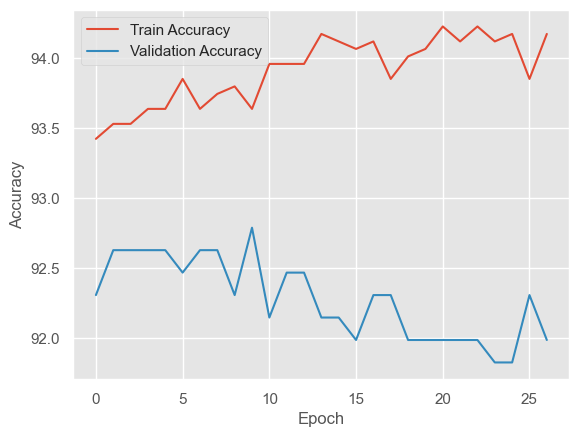

Best validation accuracy: 92.78846153846153
Accuracy: 0.9246794871794872
Confusion Matrix:
[[214   6   5]
 [ 16 179   8]
 [  1  11 184]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9246794871794872, 'Training Time (s)': 633.0144338607788}


  1%|▊                                                                                 | 1/100 [00:25<41:52, 25.38s/it]

Epoch 1/100, Train Acc: 93.85026737967914, Val Acc: 92.3076923076923


  2%|█▋                                                                                | 2/100 [00:48<38:56, 23.84s/it]

Epoch 2/100, Train Acc: 93.85026737967914, Val Acc: 92.3076923076923


  3%|██▍                                                                               | 3/100 [01:10<37:34, 23.24s/it]

Epoch 3/100, Train Acc: 94.06417112299465, Val Acc: 92.3076923076923


  4%|███▎                                                                              | 4/100 [01:33<36:44, 22.96s/it]

Epoch 4/100, Train Acc: 93.7433155080214, Val Acc: 92.1474358974359


  5%|████                                                                              | 5/100 [01:55<36:05, 22.80s/it]

Epoch 5/100, Train Acc: 93.90374331550802, Val Acc: 92.1474358974359


  6%|████▉                                                                             | 6/100 [02:18<35:33, 22.69s/it]

Epoch 6/100, Train Acc: 93.79679144385027, Val Acc: 92.1474358974359


  7%|█████▋                                                                            | 7/100 [02:40<35:06, 22.66s/it]

Epoch 7/100, Train Acc: 94.1711229946524, Val Acc: 91.98717948717949


  8%|██████▌                                                                           | 8/100 [03:03<34:43, 22.65s/it]

Epoch 8/100, Train Acc: 94.01069518716578, Val Acc: 91.98717948717949


  9%|███████▍                                                                          | 9/100 [03:26<34:21, 22.65s/it]

Epoch 9/100, Train Acc: 93.9572192513369, Val Acc: 91.98717948717949


 10%|████████                                                                         | 10/100 [03:48<33:58, 22.64s/it]

Epoch 10/100, Train Acc: 94.1711229946524, Val Acc: 92.1474358974359


 11%|████████▉                                                                        | 11/100 [04:11<33:34, 22.64s/it]

Epoch 11/100, Train Acc: 94.27807486631016, Val Acc: 91.98717948717949


 12%|█████████▋                                                                       | 12/100 [04:34<33:16, 22.69s/it]

Epoch 12/100, Train Acc: 94.1711229946524, Val Acc: 91.98717948717949


 13%|██████████▌                                                                      | 13/100 [04:56<32:55, 22.71s/it]

Epoch 13/100, Train Acc: 94.1711229946524, Val Acc: 91.98717948717949


 14%|███████████▎                                                                     | 14/100 [05:19<32:29, 22.67s/it]

Epoch 14/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949


 15%|████████████▏                                                                    | 15/100 [05:42<32:07, 22.67s/it]

Epoch 15/100, Train Acc: 93.90374331550802, Val Acc: 92.1474358974359


 16%|████████████▉                                                                    | 16/100 [06:04<31:45, 22.69s/it]

Epoch 16/100, Train Acc: 94.1711229946524, Val Acc: 91.82692307692308


 17%|█████████████▊                                                                   | 17/100 [06:27<31:24, 22.71s/it]

Epoch 17/100, Train Acc: 94.06417112299465, Val Acc: 92.1474358974359


 18%|██████████████▌                                                                  | 18/100 [06:50<30:57, 22.65s/it]

Epoch 18/100, Train Acc: 94.06417112299465, Val Acc: 91.98717948717949


 19%|███████████████▍                                                                 | 19/100 [07:12<30:30, 22.60s/it]

Epoch 19/100, Train Acc: 94.11764705882354, Val Acc: 91.98717948717949


 20%|████████████████▏                                                                | 20/100 [07:35<30:09, 22.62s/it]

Epoch 20/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949


 21%|█████████████████                                                                | 21/100 [07:57<29:42, 22.57s/it]

Epoch 21/100, Train Acc: 93.9572192513369, Val Acc: 91.98717948717949


 22%|█████████████████▊                                                               | 22/100 [08:20<29:22, 22.59s/it]

Epoch 22/100, Train Acc: 94.11764705882354, Val Acc: 91.98717948717949


 23%|██████████████████▋                                                              | 23/100 [08:43<29:06, 22.68s/it]

Epoch 23/100, Train Acc: 94.1711229946524, Val Acc: 91.98717948717949


 24%|███████████████████▍                                                             | 24/100 [09:06<28:45, 22.70s/it]

Epoch 24/100, Train Acc: 94.06417112299465, Val Acc: 91.98717948717949


 25%|████████████████████▎                                                            | 25/100 [09:29<28:33, 22.85s/it]

Epoch 25/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949


 26%|█████████████████████                                                            | 26/100 [09:51<28:03, 22.75s/it]

Epoch 26/100, Train Acc: 94.27807486631016, Val Acc: 91.98717948717949


 26%|█████████████████████                                                            | 26/100 [10:14<29:08, 23.62s/it]

Epoch 27/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949
Early stopping triggered at epoch 27


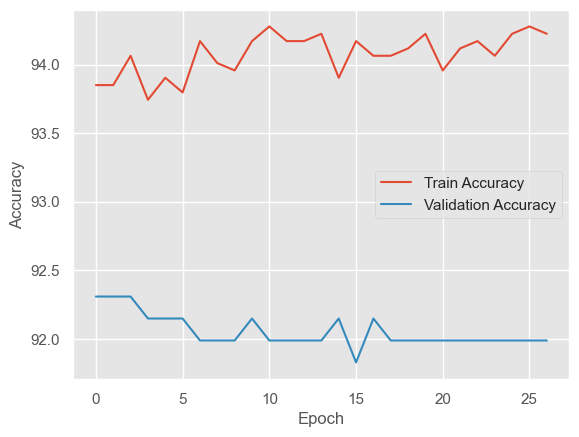

Best validation accuracy: 92.3076923076923
Accuracy: 0.9262820512820513
Confusion Matrix:
[[214   6   5]
 [ 16 179   8]
 [  1  10 185]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'StepLR', 'Accuracy': 0.9262820512820513, 'Training Time (s)': 614.4949634075165}


  1%|▊                                                                                 | 1/100 [00:24<41:04, 24.90s/it]

Epoch 1/100, Train Acc: 93.90374331550802, Val Acc: 92.1474358974359


  2%|█▋                                                                                | 2/100 [00:47<38:34, 23.62s/it]

Epoch 2/100, Train Acc: 94.11764705882354, Val Acc: 92.3076923076923


  3%|██▍                                                                               | 3/100 [01:12<39:15, 24.28s/it]

Epoch 3/100, Train Acc: 93.9572192513369, Val Acc: 92.1474358974359


  4%|███▎                                                                              | 4/100 [01:37<39:06, 24.44s/it]

Epoch 4/100, Train Acc: 94.06417112299465, Val Acc: 91.98717948717949


  5%|████                                                                              | 5/100 [02:02<38:56, 24.59s/it]

Epoch 5/100, Train Acc: 93.90374331550802, Val Acc: 92.3076923076923


  6%|████▉                                                                             | 6/100 [02:27<38:44, 24.73s/it]

Epoch 6/100, Train Acc: 93.85026737967914, Val Acc: 92.1474358974359


  7%|█████▋                                                                            | 7/100 [02:52<38:21, 24.75s/it]

Epoch 7/100, Train Acc: 94.01069518716578, Val Acc: 92.1474358974359


  8%|██████▌                                                                           | 8/100 [03:17<38:09, 24.89s/it]

Epoch 8/100, Train Acc: 93.79679144385027, Val Acc: 92.3076923076923


  9%|███████▍                                                                          | 9/100 [03:42<37:49, 24.93s/it]

Epoch 9/100, Train Acc: 94.06417112299465, Val Acc: 92.1474358974359


 10%|████████                                                                         | 10/100 [04:07<37:27, 24.97s/it]

Epoch 10/100, Train Acc: 93.90374331550802, Val Acc: 92.1474358974359


 11%|████████▉                                                                        | 11/100 [04:32<37:06, 25.02s/it]

Epoch 11/100, Train Acc: 94.01069518716578, Val Acc: 92.1474358974359


 12%|█████████▋                                                                       | 12/100 [04:57<36:38, 24.98s/it]

Epoch 12/100, Train Acc: 94.11764705882354, Val Acc: 91.98717948717949


 13%|██████████▌                                                                      | 13/100 [05:22<36:13, 24.98s/it]

Epoch 13/100, Train Acc: 93.90374331550802, Val Acc: 91.98717948717949


 14%|███████████▎                                                                     | 14/100 [05:47<35:54, 25.05s/it]

Epoch 14/100, Train Acc: 93.9572192513369, Val Acc: 92.1474358974359


 15%|████████████▏                                                                    | 15/100 [06:12<35:28, 25.04s/it]

Epoch 15/100, Train Acc: 93.9572192513369, Val Acc: 92.1474358974359


 16%|████████████▉                                                                    | 16/100 [06:37<35:02, 25.04s/it]

Epoch 16/100, Train Acc: 94.01069518716578, Val Acc: 91.98717948717949


 17%|█████████████▊                                                                   | 17/100 [07:02<34:38, 25.05s/it]

Epoch 17/100, Train Acc: 93.9572192513369, Val Acc: 92.1474358974359


 18%|██████████████▌                                                                  | 18/100 [07:27<34:08, 24.98s/it]

Epoch 18/100, Train Acc: 93.85026737967914, Val Acc: 92.1474358974359


 19%|███████████████▍                                                                 | 19/100 [07:52<33:42, 24.97s/it]

Epoch 19/100, Train Acc: 93.85026737967914, Val Acc: 92.3076923076923


 20%|████████████████▏                                                                | 20/100 [08:17<33:22, 25.03s/it]

Epoch 20/100, Train Acc: 93.90374331550802, Val Acc: 92.1474358974359


 21%|█████████████████                                                                | 21/100 [08:42<32:54, 24.99s/it]

Epoch 21/100, Train Acc: 93.9572192513369, Val Acc: 92.1474358974359


 22%|█████████████████▊                                                               | 22/100 [09:07<32:33, 25.04s/it]

Epoch 22/100, Train Acc: 94.01069518716578, Val Acc: 91.98717948717949


 23%|██████████████████▋                                                              | 23/100 [09:32<32:03, 24.98s/it]

Epoch 23/100, Train Acc: 94.11764705882354, Val Acc: 91.98717948717949


 24%|███████████████████▍                                                             | 24/100 [09:57<31:36, 24.95s/it]

Epoch 24/100, Train Acc: 94.06417112299465, Val Acc: 92.1474358974359


 25%|████████████████████▎                                                            | 25/100 [10:22<31:13, 24.98s/it]

Epoch 25/100, Train Acc: 94.01069518716578, Val Acc: 91.98717948717949


 26%|█████████████████████                                                            | 26/100 [10:47<30:49, 24.99s/it]

Epoch 26/100, Train Acc: 94.1711229946524, Val Acc: 91.98717948717949


 26%|█████████████████████                                                            | 26/100 [11:12<31:53, 25.86s/it]

Epoch 27/100, Train Acc: 94.01069518716578, Val Acc: 92.1474358974359
Early stopping triggered at epoch 27


Best validation accuracy: 92.3076923076923
Accuracy: 0.9262820512820513
Confusion Matrix:
[[214   6   5]
 [ 15 182   6]
 [  1  13 182]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'ExponentialLR', 'Accuracy': 0.9262820512820513, 'Training Time (s)': 672.6659066677094}


  1%|▊                                                                                 | 1/100 [00:24<40:53, 24.78s/it]

Epoch 1/100, Train Acc: 94.01069518716578, Val Acc: 92.1474358974359


  2%|█▋                                                                                | 2/100 [00:47<38:14, 23.41s/it]

Epoch 2/100, Train Acc: 93.79679144385027, Val Acc: 92.1474358974359


  3%|██▍                                                                               | 3/100 [01:09<37:19, 23.08s/it]

Epoch 3/100, Train Acc: 93.63636363636364, Val Acc: 91.98717948717949


  4%|███▎                                                                              | 4/100 [01:32<36:41, 22.94s/it]

Epoch 4/100, Train Acc: 94.11764705882354, Val Acc: 91.82692307692308


  5%|████                                                                              | 5/100 [01:55<36:17, 22.92s/it]

Epoch 5/100, Train Acc: 94.01069518716578, Val Acc: 91.82692307692308


  6%|████▉                                                                             | 6/100 [02:18<35:48, 22.85s/it]

Epoch 6/100, Train Acc: 94.27807486631016, Val Acc: 92.1474358974359


  7%|█████▋                                                                            | 7/100 [02:40<35:18, 22.78s/it]

Epoch 7/100, Train Acc: 94.06417112299465, Val Acc: 92.1474358974359


  8%|██████▌                                                                           | 8/100 [03:03<35:03, 22.86s/it]

Epoch 8/100, Train Acc: 94.22459893048128, Val Acc: 91.98717948717949


  9%|███████▍                                                                          | 9/100 [03:26<34:32, 22.77s/it]

Epoch 9/100, Train Acc: 94.27807486631016, Val Acc: 91.98717948717949


 10%|████████                                                                         | 10/100 [03:49<34:06, 22.74s/it]

Epoch 10/100, Train Acc: 94.1711229946524, Val Acc: 91.82692307692308


 11%|████████▉                                                                        | 11/100 [04:12<33:46, 22.77s/it]

Epoch 11/100, Train Acc: 94.22459893048128, Val Acc: 92.1474358974359


 12%|█████████▋                                                                       | 12/100 [04:34<33:20, 22.74s/it]

Epoch 12/100, Train Acc: 94.22459893048128, Val Acc: 91.82692307692308


 13%|██████████▌                                                                      | 13/100 [04:57<32:59, 22.75s/it]

Epoch 13/100, Train Acc: 94.27807486631016, Val Acc: 91.82692307692308


 14%|███████████▎                                                                     | 14/100 [05:20<32:34, 22.73s/it]

Epoch 14/100, Train Acc: 94.33155080213903, Val Acc: 91.82692307692308


 15%|████████████▏                                                                    | 15/100 [05:42<32:06, 22.66s/it]

Epoch 15/100, Train Acc: 94.38502673796792, Val Acc: 91.98717948717949


 16%|████████████▉                                                                    | 16/100 [06:05<31:44, 22.67s/it]

Epoch 16/100, Train Acc: 94.38502673796792, Val Acc: 91.98717948717949


 17%|█████████████▊                                                                   | 17/100 [06:27<31:20, 22.66s/it]

Epoch 17/100, Train Acc: 94.38502673796792, Val Acc: 91.66666666666667


 18%|██████████████▌                                                                  | 18/100 [06:50<30:56, 22.64s/it]

Epoch 18/100, Train Acc: 94.38502673796792, Val Acc: 91.50641025641026


 19%|███████████████▍                                                                 | 19/100 [07:13<30:46, 22.80s/it]

Epoch 19/100, Train Acc: 94.33155080213903, Val Acc: 91.98717948717949


 20%|████████████████▏                                                                | 20/100 [07:36<30:20, 22.76s/it]

Epoch 20/100, Train Acc: 94.33155080213903, Val Acc: 91.66666666666667


 21%|█████████████████                                                                | 21/100 [07:59<30:03, 22.83s/it]

Epoch 21/100, Train Acc: 94.33155080213903, Val Acc: 91.50641025641026


 22%|█████████████████▊                                                               | 22/100 [08:22<29:38, 22.80s/it]

Epoch 22/100, Train Acc: 94.43850267379679, Val Acc: 91.82692307692308


 23%|██████████████████▋                                                              | 23/100 [08:44<29:06, 22.68s/it]

Epoch 23/100, Train Acc: 94.43850267379679, Val Acc: 91.98717948717949


 24%|███████████████████▍                                                             | 24/100 [09:07<28:44, 22.69s/it]

Epoch 24/100, Train Acc: 94.33155080213903, Val Acc: 92.3076923076923


 25%|████████████████████▎                                                            | 25/100 [09:32<29:10, 23.34s/it]

Epoch 25/100, Train Acc: 94.43850267379679, Val Acc: 91.66666666666667


 26%|█████████████████████                                                            | 26/100 [09:57<29:25, 23.86s/it]

Epoch 26/100, Train Acc: 94.54545454545455, Val Acc: 91.98717948717949


 27%|█████████████████████▊                                                           | 27/100 [10:21<29:22, 24.15s/it]

Epoch 27/100, Train Acc: 94.54545454545455, Val Acc: 91.66666666666667


 28%|██████████████████████▋                                                          | 28/100 [10:46<29:11, 24.32s/it]

Epoch 28/100, Train Acc: 94.59893048128342, Val Acc: 91.50641025641026


 28%|██████████████████████▋                                                          | 28/100 [11:11<28:47, 23.99s/it]

Epoch 29/100, Train Acc: 94.43850267379679, Val Acc: 91.66666666666667
Early stopping triggered at epoch 29


Best validation accuracy: 92.3076923076923
Accuracy: 0.9198717948717948
Confusion Matrix:
[[211   7   7]
 [ 14 177  12]
 [  1   9 186]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'CyclicLR', 'Accuracy': 0.9198717948717948, 'Training Time (s)': 671.952615737915}


  1%|▊                                                                                 | 1/100 [00:25<41:20, 25.06s/it]

Epoch 1/100, Train Acc: 94.43850267379679, Val Acc: 91.82692307692308


  2%|█▋                                                                                | 2/100 [00:47<38:44, 23.72s/it]

Epoch 2/100, Train Acc: 94.38502673796792, Val Acc: 91.50641025641026


  3%|██▍                                                                               | 3/100 [01:10<37:29, 23.19s/it]

Epoch 3/100, Train Acc: 94.43850267379679, Val Acc: 91.82692307692308


  4%|███▎                                                                              | 4/100 [01:33<36:47, 22.99s/it]

Epoch 4/100, Train Acc: 94.49197860962566, Val Acc: 91.82692307692308


  5%|████                                                                              | 5/100 [01:55<36:19, 22.94s/it]

Epoch 5/100, Train Acc: 94.54545454545455, Val Acc: 91.82692307692308


  6%|████▉                                                                             | 6/100 [02:18<35:53, 22.91s/it]

Epoch 6/100, Train Acc: 94.49197860962566, Val Acc: 91.66666666666667


  7%|█████▋                                                                            | 7/100 [02:41<35:30, 22.90s/it]

Epoch 7/100, Train Acc: 94.54545454545455, Val Acc: 91.98717948717949


  8%|██████▌                                                                           | 8/100 [03:06<36:05, 23.54s/it]

Epoch 8/100, Train Acc: 94.54545454545455, Val Acc: 91.50641025641026


  9%|███████▍                                                                          | 9/100 [03:31<36:17, 23.93s/it]

Epoch 9/100, Train Acc: 94.54545454545455, Val Acc: 91.34615384615384


 10%|████████                                                                         | 10/100 [03:56<36:23, 24.26s/it]

Epoch 10/100, Train Acc: 94.43850267379679, Val Acc: 91.98717948717949


 11%|████████▉                                                                        | 11/100 [04:21<36:13, 24.43s/it]

Epoch 11/100, Train Acc: 94.49197860962566, Val Acc: 91.98717948717949


 12%|█████████▋                                                                       | 12/100 [04:46<36:03, 24.59s/it]

Epoch 12/100, Train Acc: 94.54545454545455, Val Acc: 91.98717948717949


 13%|██████████▌                                                                      | 13/100 [05:10<35:42, 24.63s/it]

Epoch 13/100, Train Acc: 94.54545454545455, Val Acc: 91.66666666666667


 14%|███████████▎                                                                     | 14/100 [05:35<35:26, 24.73s/it]

Epoch 14/100, Train Acc: 94.43850267379679, Val Acc: 91.66666666666667


 15%|████████████▏                                                                    | 15/100 [06:00<35:11, 24.84s/it]

Epoch 15/100, Train Acc: 94.54545454545455, Val Acc: 91.66666666666667


 16%|████████████▉                                                                    | 16/100 [06:25<34:47, 24.85s/it]

Epoch 16/100, Train Acc: 94.49197860962566, Val Acc: 91.66666666666667


 17%|█████████████▊                                                                   | 17/100 [06:51<34:41, 25.08s/it]

Epoch 17/100, Train Acc: 94.43850267379679, Val Acc: 91.98717948717949


 18%|██████████████▌                                                                  | 18/100 [07:16<34:12, 25.03s/it]

Epoch 18/100, Train Acc: 94.49197860962566, Val Acc: 91.82692307692308


 19%|███████████████▍                                                                 | 19/100 [07:41<33:46, 25.02s/it]

Epoch 19/100, Train Acc: 94.49197860962566, Val Acc: 91.66666666666667


 20%|████████████████▏                                                                | 20/100 [08:06<33:23, 25.04s/it]

Epoch 20/100, Train Acc: 94.49197860962566, Val Acc: 91.82692307692308


 21%|█████████████████                                                                | 21/100 [08:31<32:51, 24.96s/it]

Epoch 21/100, Train Acc: 94.59893048128342, Val Acc: 91.82692307692308


 22%|█████████████████▊                                                               | 22/100 [08:56<32:28, 24.98s/it]

Epoch 22/100, Train Acc: 94.49197860962566, Val Acc: 91.98717948717949


 23%|██████████████████▋                                                              | 23/100 [09:21<31:59, 24.93s/it]

Epoch 23/100, Train Acc: 94.43850267379679, Val Acc: 91.66666666666667


 24%|███████████████████▍                                                             | 24/100 [09:45<31:35, 24.95s/it]

Epoch 24/100, Train Acc: 94.49197860962566, Val Acc: 91.82692307692308


 25%|████████████████████▎                                                            | 25/100 [10:10<31:10, 24.94s/it]

Epoch 25/100, Train Acc: 94.59893048128342, Val Acc: 91.50641025641026


 26%|█████████████████████                                                            | 26/100 [10:35<30:41, 24.89s/it]

Epoch 26/100, Train Acc: 94.54545454545455, Val Acc: 91.98717948717949


 26%|█████████████████████                                                            | 26/100 [11:00<31:21, 25.42s/it]

Epoch 27/100, Train Acc: 94.49197860962566, Val Acc: 91.66666666666667
Early stopping triggered at epoch 27


Best validation accuracy: 91.98717948717949
Accuracy: 0.9230769230769231
Confusion Matrix:
[[211   9   5]
 [ 13 181   9]
 [  1  11 184]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'LinearLR', 'Accuracy': 0.9230769230769231, 'Training Time (s)': 661.2098054885864}


In [ ]:
LRS_configs = list(itertools.product(
                                        [models[0]],
                                       [data_loaders[0]],
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         lr_schedulers.items())
                    )
df_LRS = train_configs(configurations=LRS_configs)

### 5.4.2 Display DataFrame of Experiment Results

In [ ]:
df_LRS['early stopping epoch'] = [27, 27, 27, 29, 27]
df_LRS.drop(['Model Name', 'Task', 'mixup', 'Data Type','Optimizer'], axis=1)


LR Scheduler  Accuracy  Training Time (s)  early stopping epoch
0       wihoutLR  0.924679         633.014434                    27
1         StepLR  0.926282         614.494963                    27
2  ExponentialLR  0.926282         672.665907                    27
3       CyclicLR  0.919872         671.952616                    29
4       LinearLR  0.923077         661.209805                    27

In [ ]:
# Optionally, save to a CSV file
df_LRS.to_csv('df_LRS.csv', index=False)

### 5.4.3 Analyze the results

To provide a comprehensive analysis of the learning rate scheduling results for our CustomCNN model on label classification, let's first understand each learning rate (LR) scheduling strategy used in your experiment. Learning rate scheduling is a technique to adjust the learning rate during training, aiming to improve model performance and convergence speed.


##### Overview of Learning Rate Scheduling Strategies

1. **Linear Learning Rate (LinearLR):**
   - **How It Works:** The learning rate decreases linearly from an initial value to a final value over the course of training. This straightforward approach aims to combine the benefits of a high learning rate at the beginning (fast convergence) with those of a low learning rate towards the end (fine-tuning and stability).
   
2. **Exponential Learning Rate (ExponentialLR):**
   - **How It Works:** The learning rate is updated each epoch (or batch) by multiplying it by a factor less than one. This causes the learning rate to decrease exponentially, allowing for a rapid decrease initially that slows down over time, aiming to quickly converge to a good solution and then refine it slowly.
   
3. **Cyclic Learning Rate (CyclicLR):**
   - **How It Works:** The learning rate varies between a minimum and maximum value in a cyclical fashion. This strategy can help to jump out of local minima and explore the loss landscape more effectively, potentially leading to better overall solutions.
   
4. **Step Learning Rate (StepLR):**
   - **How It Works:** The learning rate decreases by a factor after a certain number of epochs have passed. This step-down approach allows the model to initially learn rapidly with a higher learning rate and then refine its learning as the rate steps down, usually after the model's performance plateaus.
   
5. **Without LR Scheduler (wihoutLR):**
   - In this mode, the learning rate remains constant throughout the training process. This approach can serve as a baseline to evaluate the effectiveness of using learning rate scheduling.


##### Analysis of Results

1. **Accuracy:**
   - **StepLR** and **ExponentialLR** both achieved the highest accuracy, suggesting that their respective strategies for reducing the learning rate are effective for this task. The gradual refinement allowed by both methods seems to contribute to slightly better model performance.
   - **CyclicLR** showed a slight decrease in accuracy compared to the other schedules, which might be due to its cyclic nature introducing more variability and potentially preventing the model from settling into the most refined state by the end of training.
   - **LinearLR** offers a balance with slightly lower but competitive accuracy, indicating that a steady, predictable decrease in the learning rate can also be effective.

2. **Training Time:**
   - **StepLR** resulted in the shortest training time, which suggests that the step reductions in the learning rate might have facilitated more efficient learning dynamics, leading to quicker convergence.
   - **ExponentialLR** and **CyclicLR** showed longer training times, with **ExponentialLR** being the longest. This could be due to the more complex adjustments and evaluations needed to calculate the learning rate at each epoch.
   - The linear approach provided a moderate training time, aligning with its straightforward decrease in learning rate.

3. **Early Stopping Epoch:**
   - The early stopping epoch was consistent across most scheduling strategies, indicating that despite differences in learning rate adjustments, the models reached a point of minimal improvement at similar times.
   - **CyclicLR** required slightly more epochs to reach early stopping, possibly due to its cyclical nature causing more fluctuations in learning progress.



##### Conclusion

Learning rate scheduling can significantly impact the training dynamics and final performance of neural network models. The results suggest that both step and exponential decay strategies slightly outperform the baseline (constant learning rate), linear, and cyclic approaches in terms of accuracy for this specific task. However, the choice of scheduling strategy should consider both the nature of the task and the behavior of the model during training, as well as computational efficiency. The step strategy, in particular, offers an appealing balance between performance and training time, making it an effective choice for this experiment.

# 6. Extra

## 6.1 Testing

Accuracy: 0.9262820512820513
Confusion Matrix:
[[214   6   5]
 [ 14 179  10]
 [  2   9 185]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9262820512820513, 'Training Time (s)': 0.05964493751525879}
Accuracy: 0.6746794871794872
Confusion Matrix:
[[263  52]
 [151 158]]


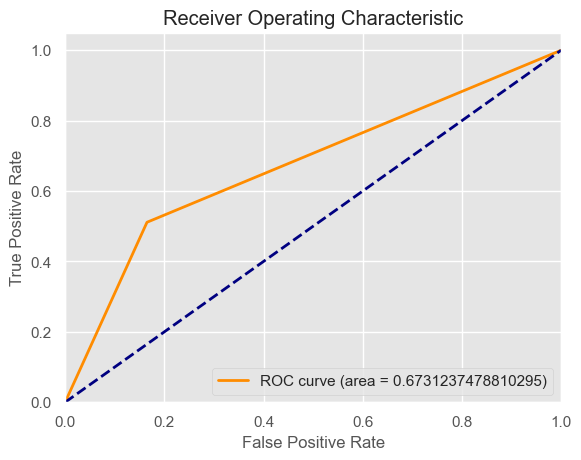

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6746794871794872, 'Training Time (s)': 0.04000353813171387}
Accuracy: 0.9631410256410257
Confusion Matrix:
[[218   6   1]
 [  3 195   5]
 [  2   6 188]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9631410256410257, 'Training Time (s)': 0.6829755306243896}
Accuracy: 0.4951923076923077
Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  14  89 157  53   1]
 [  0   0  13 133 152  11]
 [  0   0   0   0   0   0]]


{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.4951923076923077, 'Training Time (s)': 0.6697044372558594}
Accuracy: 0.9615384615384616
Confusion Matrix:
[[219   3   3]
 [  9 188   6]
 [  2   1 193]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9615384615384616, 'Training Time (s)': 0.1110837459564209}
Accuracy: 0.5208333333333334
Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1   9  67 182  54   2]
 [  0   0  11 148 143   7]
 [  0   0   0   0   0   0]]


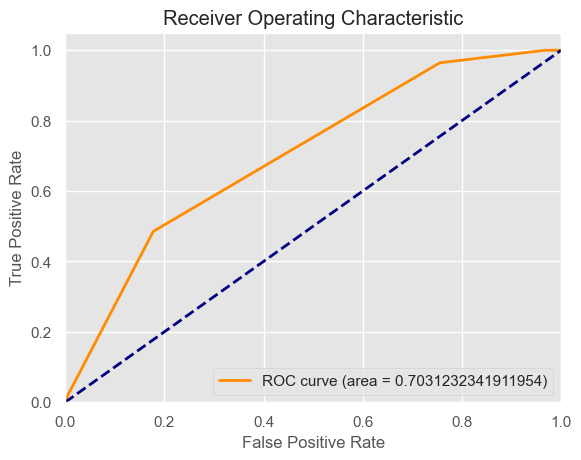

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5208333333333334, 'Training Time (s)': 0.11626791954040527}


In [ ]:
model_configs = list(itertools.product(
                                        models,
                                       [data_loaders[0]],
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )
df_models = train_configs(configurations=model_configs)

In [ ]:
df_models

Model Name      Task             Data Type  mixup Optimizer LR Scheduler  \
0  CustomCNN     label  No data augmentation  False       SGD     wihoutLR   
1  CustomCNN  realness  No data augmentation  False       SGD     wihoutLR   
2     resnet     label  No data augmentation  False       SGD     wihoutLR   
3     resnet  realness  No data augmentation  False       SGD     wihoutLR   
4  mobilenet     label  No data augmentation  False       SGD     wihoutLR   
5  mobilenet  realness  No data augmentation  False       SGD     wihoutLR   

   Accuracy  Training Time (s)  
0  0.926282         360.630497  
1  0.674679         236.869566  
2  0.963141         801.458382  
3  0.495192         677.075894  
4  0.961538         276.474027  
5  0.520833         252.734428

Accuracy: 0.9262820512820513
Confusion Matrix:
[[214   6   5]
 [ 14 179  10]
 [  2   9 185]]
{'Model Name': 'CustomCNN', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9262820512820513, 'Training Time (s)': 0.056606292724609375}
Accuracy: 0.6746794871794872
Confusion Matrix:
[[263  52]
 [151 158]]


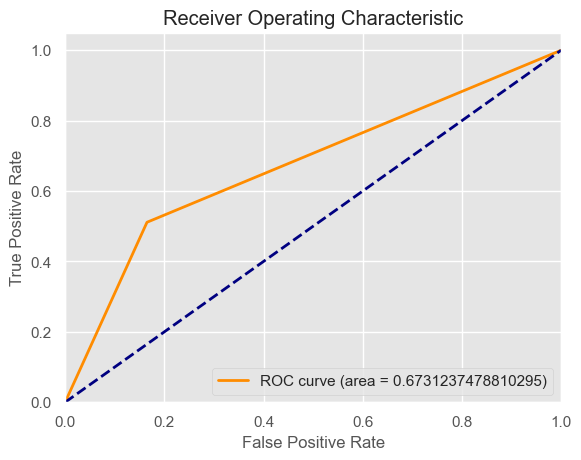

{'Model Name': 'CustomCNN', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.6746794871794872, 'Training Time (s)': 0.024347543716430664}
Accuracy: 0.9631410256410257
Confusion Matrix:
[[218   6   1]
 [  3 195   5]
 [  2   6 188]]
{'Model Name': 'resnet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9631410256410257, 'Training Time (s)': 0.6554169654846191}
Accuracy: 0.4951923076923077
Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  14  89 157  53   1]
 [  0   0  13 133 152  11]
 [  0   0   0   0   0   0]]


{'Model Name': 'resnet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.4951923076923077, 'Training Time (s)': 0.5217385292053223}
Accuracy: 0.9615384615384616
Confusion Matrix:
[[219   3   3]
 [  9 188   6]
 [  2   1 193]]
{'Model Name': 'mobilenet', 'Task': 'label', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.9615384615384616, 'Training Time (s)': 0.11225175857543945}
Accuracy: 0.5208333333333334
Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1   9  67 182  54   2]
 [  0   0  11 148 143   7]
 [  0   0   0   0   0   0]]


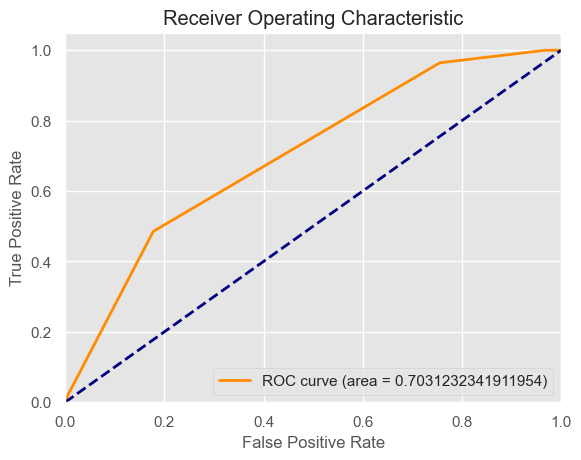

{'Model Name': 'mobilenet', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5208333333333334, 'Training Time (s)': 0.08039665222167969}


In [ ]:
df_models = train_configs(configurations=model_configs)

In [ ]:
df_models

Model Name      Task             Data Type  mixup Optimizer LR Scheduler  \
0  CustomCNN     label  No data augmentation  False       SGD     wihoutLR   
1  CustomCNN  realness  No data augmentation  False       SGD     wihoutLR   
2     resnet     label  No data augmentation  False       SGD     wihoutLR   
3     resnet  realness  No data augmentation  False       SGD     wihoutLR   
4  mobilenet     label  No data augmentation  False       SGD     wihoutLR   
5  mobilenet  realness  No data augmentation  False       SGD     wihoutLR   

   Accuracy  Training Time (s)  
0  0.926282           0.056606  
1  0.674679           0.024348  
2  0.963141           0.655417  
3  0.495192           0.521739  
4  0.961538           0.112252  
5  0.520833           0.080397

In [ ]:
zip_path = 'content/ML Project Dataset - test.zip'

# Unzip the dataset
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('content/dataset_test')

In [ ]:
from PIL import Image
import pickle
import re

def get_label_and_reality(filename):
    """ Extracts the label (e.g., sea, see, mountain, etc.)
    and determines whether the image is real or fake based on the filename. """
    # Regular expression to find the label and check if it's fake
    filename = filename.lower()
    label_match = re.search(r'(sea|see|mountain|jungle|junlge|forest)', filename)
    fake_match = re.search(r'fake', filename)

    # Extract label; default to 'unknown' if not found
    label = label_match.group(0) if label_match else 'unknown'
    # Determine reality; label as 'fake' if 'fake' is found, else 'real'
    reality = 'fake' if fake_match else 'real'

    return label, reality

def load_image_paths_and_labels(folder_path):
    """
    Iterates over images in a given folder, applies `get_label_and_reality` to each,
    and compiles the results into a DataFrame with columns for the image path, label, and reality status.
    Parameters:
    - folder_path: str, the path to the directory containing image files.

    Returns:
    - A DataFrame with columns ['Image_Path', 'Label', 'Reality']
    """
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png')):
            file_path = os.path.join(folder_path, filename)
            label, reality = get_label_and_reality(filename)
            data.append([file_path, label, reality])
    return pd.DataFrame(data, columns=['Image_Path', 'Label', 'Reality'])


In [ ]:
# Load the images and create the structured DataFrame
folder_path = 'content/dataset_test'
structured_data_test = load_image_paths_and_labels(folder_path)

# Save the structured DataFrame to a pickle file for easy loading
# dump_file_path = 'content/structured_data.pkl'
# with open(dump_file_path, 'wb') as file:
#     pickle.dump(structured_data, file)

# print(f"Structured data saved to {dump_file_path}.")

In [ ]:
structured_data_test.head()

Image_Path   Label Reality
0  content/dataset_test\610398217_fake_dalle_jung...  jungle    fake
1  content/dataset_test\610398217_fake_dalle_jung...  jungle    fake
2  content/dataset_test\610398217_fake_dalle_jung...  jungle    fake
3  content/dataset_test\610398217_fake_dalle_jung...  jungle    fake
4  content/dataset_test\610398217_fake_dalle_jung...  jungle    fake

In [ ]:
from torchvision import transforms

transforms_no_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

sina_dataset_test_no_aug = CustomImageDataset(dataframe=structured_data_test, transform=transforms_no_aug)
sina_data_loader_test_no_aug = DataLoader(dataset_train_no_aug, batch_size=batch_size, shuffle=True)


In [ ]:
models = [
    {'model': model_label, 'name': 'CustomCNN', 'task': 'label'},
    {'model': model_realness, 'name': 'CustomCNN', 'task': 'realness'},
    {'model': model_label_resnet, 'name': 'resnet', 'task': 'label'},
    {'model': model_realness_resnet, 'name': 'resnet', 'task': 'realness'},
    {'model': model_label_mobilenet, 'name': 'mobilenet', 'task': 'label'},
    {'model': model_realness_mobilenet, 'name': 'mobilenet', 'task': 'realness'},
]

In [ ]:
for model in models:
    print(compute_accuracy(model['model'], data_loader=sina_data_loader_test_no_aug, task=model['task']))

94.8663101604278
72.13903743315508
98.1283422459893
49.25133689839572
98.34224598930481
56.36363636363637


## 6.3 try 2 vision transformers

In [ ]:
# Initialize vision transformer models for different tasks
model_label_vision_transformer = initialize_pretrained_model('label', 'vision_transformer_model')
model_realness_vision_transformer = initialize_pretrained_model('realness', 'vision_transformer_model')

AttributeError: 'list' object has no attribute 'vit_b_16'

In [ ]:
vision_transformer_models = [
    {'model': model_label_vision_transformer, 'name': 'vision_transformer', 'task': 'label'},
    {'model': model_realness_vision_transformer, 'name': 'vision_transformer', 'task': 'realness'},
]
vision_configs = list(itertools.product(
                                        vision_transformer_models,
                                       [data_loaders[0]],
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )
df_vision_transformer_models = train_configs(configurations=vision_configs)

In [ ]:
df_vision_transformer_models

Model Name      Task             Data Type  mixup Optimizer  \
0  vision_transformer     label  No data augmentation  False       SGD   
1  vision_transformer  realness  No data augmentation  False       SGD   

  LR Scheduler  Accuracy  Training Time (s)  
0     wihoutLR  0.971154        1193.955434  
1     wihoutLR  0.459936        1035.062498

In [ ]:
vision_transformer_models[0]['model']

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
models[2]

{'model': ResNet(
   (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace=True)
   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (layer1): Sequential(
     (0): Bottleneck(
       (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
       (downsample): Sequential(
         (0): Conv2d(64, 256, kernel

## 6.4 try 3 add 2 layer to pre-trained models

In [ ]:
import torchvision.models as models
import torch.nn as nn

# Function to initialize a pretrained model for a specific task
def initialize_pretrained_model(task='label', model_name='resnet152'):
    # Load the appropriate pretrained model and Replace the classifier for the specific task
    if model_name == 'resnet152':
        model = models.resnet152(pretrained=True)
        num_ftrs = model.fc.in_features
        # Define an intermediate layer size, e.g., halfway between input and output size as an example
        intermediate_layer_size = 256  # Example size, adjust based on needs
        if task == 'label':
            model.fc = nn.Sequential(
                nn.Linear(num_ftrs, 1024),
                nn.ReLU(),
                nn.Linear(1024, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 3)
            )
        elif task == 'realness':
            model.fc = nn.Sequential(
                nn.Linear(num_ftrs, 1024),
                nn.ReLU(),
                nn.Linear(1024, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 1)
            )

    elif model_name == 'mobilenet_v3_large':
        model = models.mobilenet_v3_large(pretrained=True)
        num_ftrs = model.classifier[3].in_features
        intermediate_layer_size = 256  # Example size, adjust based on needs
        if task == 'label':
            model.classifier[3] = nn.Sequential(
                nn.Linear(num_ftrs, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 3)
            )
        elif task == 'realness':
            model.classifier[3] = nn.Sequential(
                nn.Linear(num_ftrs, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 1)
            )

    elif model_name == 'vision_transformer_model':
        model = models.vit_b_16(pretrained=True)
        num_ftrs = model.heads.head.in_features
        intermediate_layer_size = 256  # Example size, adjust based on needs
        if task == 'label':
            model.heads.head = nn.Sequential(
                nn.Linear(num_ftrs, intermediate_layer_size),
                nn.ReLU(),
                nn.Linear(intermediate_layer_size, 3)
            )
        elif task == 'realness':
            model.heads.head = nn.Sequential(
                nn.Linear(num_ftrs, intermediate_layer_size),
                nn.ReLU(),
                nn.Linear(intermediate_layer_size, 1)
            )
    else:
        raise ValueError("Unsupported model name")

    # Freeze all the parameters except for the newly added layers
    for param in model.parameters():
        param.requires_grad = False

    # Enable gradient computation for the newly added layers only
    if model_name == 'resnet152':
        for param in model.fc.parameters():
            param.requires_grad = True
    elif model_name == 'mobilenet_v3_large':
        for param in model.classifier[3].parameters():
            param.requires_grad = True
    elif model_name == 'vision_transformer_model':
        for param in model.heads.head.parameters():
            param.requires_grad = True

    return model


In [ ]:
# Initialize ResNet-152 models for different tasks
model_label_resnet_2 = initialize_pretrained_model('label', 'resnet152')
model_realness_resnet_2 = initialize_pretrained_model('realness', 'resnet152')

# Initialize MobileNetV3 models for different tasks
model_label_mobilenet_2 = initialize_pretrained_model('label', 'mobilenet_v3_large')
model_realness_mobilenet_2 = initialize_pretrained_model('realness', 'mobilenet_v3_large')


In [ ]:
pre_models_2 = [
    # {'model': model_label_resnet_2, 'name': 'vision_transformer', 'task': 'label'},
    {'model': model_realness_resnet_2, 'name': 'resnet_2', 'task': 'realness'},
    # {'model': model_label_vision_transformer, 'name': 'vision_transformer', 'task': 'label'},
    {'model': model_realness_mobilenet_2, 'name': 'mobilenet2', 'task': 'realness'},
]
configs2 = list(itertools.product(
                                        pre_models_2,
                                       [data_loaders[0]],
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )
df_configs2 = train_configs(configurations=configs2)

  1%|▊                                                                                 | 1/100 [00:25<42:31, 25.77s/it]

Epoch 1/100, Train Acc: 21.711229946524064, Val Acc: 22.115384615384617


  2%|█▋                                                                                | 2/100 [00:52<42:47, 26.20s/it]

Epoch 2/100, Train Acc: 25.18716577540107, Val Acc: 25.48076923076923


  2%|█▌                                                                              | 2/100 [01:16<1:02:20, 38.16s/it]


KeyboardInterrupt: 

In [ ]:
import torchvision.models as models
import torch.nn as nn

# Function to initialize a pretrained model for a specific task
def initialize_pretrained_model(task='label', model_name='resnet152'):
    # Load the appropriate pretrained model and Replace the classifier for the specific task
    if model_name == 'resnet152':
        model = models.resnet152(pretrained=True)
        num_ftrs = model.fc.in_features
        # Define an intermediate layer size, e.g., halfway between input and output size as an example
        intermediate_layer_size = 256  # Example size, adjust based on needs
        if task == 'label':
            model.fc = nn.Sequential(
                nn.Linear(num_ftrs, 1024),
                nn.ReLU(),
                nn.Linear(1024, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 3)
            )
        elif task == 'realness':
            model.fc = nn.Sequential(
                nn.Linear(num_ftrs, 1024),
                nn.ReLU(),
                nn.Linear(1024, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 1)
            )

    elif model_name == 'mobilenet_v3_large':
        model = models.mobilenet_v3_large(pretrained=True)
        num_ftrs = model.classifier[3].in_features
        intermediate_layer_size = 256  # Example size, adjust based on needs
        if task == 'label':
            model.classifier[3] = nn.Sequential(
                nn.Linear(num_ftrs, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 3)
            )
        elif task == 'realness':
            model.classifier[3] = nn.Sequential(
                nn.Linear(num_ftrs, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 1)
            )

    elif model_name == 'vision_transformer_model':
        model = models.vit_b_16(pretrained=True)
        num_ftrs = model.heads.head.in_features
        intermediate_layer_size = 256  # Example size, adjust based on needs
        if task == 'label':
            model.heads.head = nn.Sequential(
                nn.Linear(num_ftrs, intermediate_layer_size),
                nn.ReLU(),
                nn.Linear(intermediate_layer_size, 3)
            )
        elif task == 'realness':
            model.heads.head = nn.Sequential(
                nn.Linear(num_ftrs, intermediate_layer_size),
                nn.ReLU(),
                nn.Linear(intermediate_layer_size, 1)
            )
    else:
        raise ValueError("Unsupported model name")

    # Freeze all the parameters except for the newly added layers
    for param in model.parameters():
        param.requires_grad = False

    # Enable gradient computation for the newly added layers only
    if model_name == 'resnet152':
        for param in model.fc.parameters():
            param.requires_grad = True
    elif model_name == 'mobilenet_v3_large':
        for param in model.classifier[3].parameters():
            param.requires_grad = True
    elif model_name == 'vision_transformer_model':
        for param in model.heads.head.parameters():
            param.requires_grad = True

    return model


In [ ]:
# Initialize ResNet-152 models for different tasks
model_label_resnet_3 = initialize_pretrained_model('label', 'resnet152')
model_realness_resnet_3 = initialize_pretrained_model('realness', 'resnet152')

# Initialize MobileNetV3 models for different tasks
model_label_mobilenet_3 = initialize_pretrained_model('label', 'mobilenet_v3_large')
model_realness_mobilenet_3 = initialize_pretrained_model('realness', 'mobilenet_v3_large')


  1%|▊                                                                                 | 1/100 [00:26<43:36, 26.42s/it]

Epoch 1/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  2%|█▋                                                                                | 2/100 [00:52<43:16, 26.50s/it]

Epoch 2/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  3%|██▍                                                                               | 3/100 [01:19<43:05, 26.66s/it]

Epoch 3/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  4%|███▎                                                                              | 4/100 [01:45<42:15, 26.41s/it]

Epoch 4/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  5%|████                                                                              | 5/100 [02:12<41:46, 26.38s/it]

Epoch 5/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  5%|████                                                                              | 5/100 [02:38<50:04, 31.62s/it]

Epoch 6/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745
Early stopping triggered at epoch 6


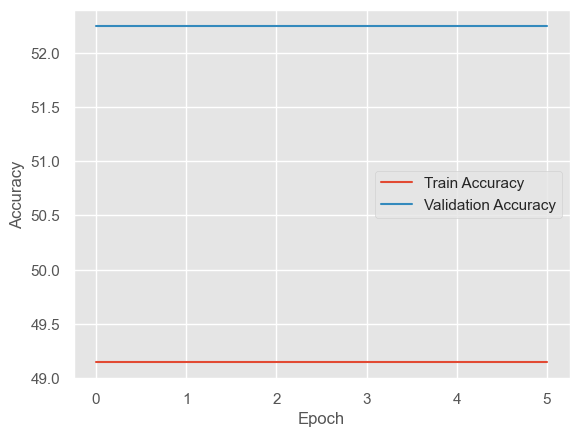

Best validation accuracy: 52.243589743589745
Accuracy: 0.5048076923076923
Confusion Matrix:
[[315   0]
 [309   0]]


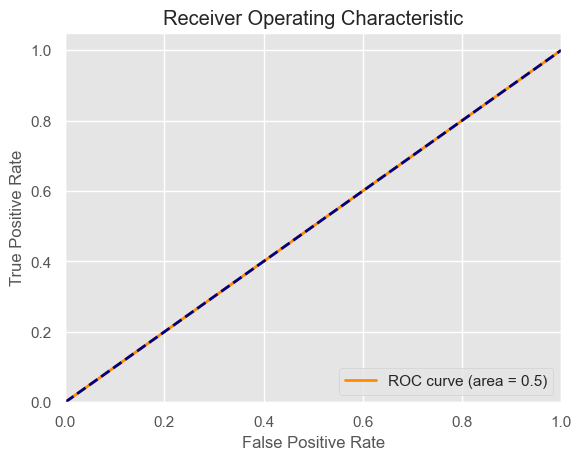

{'Model Name': 'resnet_3', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5048076923076923, 'Training Time (s)': 159.51640629768372}


  1%|▊                                                                                 | 1/100 [00:13<22:07, 13.41s/it]

Epoch 1/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  2%|█▋                                                                                | 2/100 [00:24<19:19, 11.83s/it]

Epoch 2/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  3%|██▍                                                                               | 3/100 [00:35<18:38, 11.53s/it]

Epoch 3/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  4%|███▎                                                                              | 4/100 [00:46<18:05, 11.31s/it]

Epoch 4/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  5%|████                                                                              | 5/100 [00:56<17:07, 10.82s/it]

Epoch 5/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745


  5%|████                                                                              | 5/100 [01:07<21:26, 13.54s/it]

Epoch 6/100, Train Acc: 49.144385026737964, Val Acc: 52.243589743589745
Early stopping triggered at epoch 6


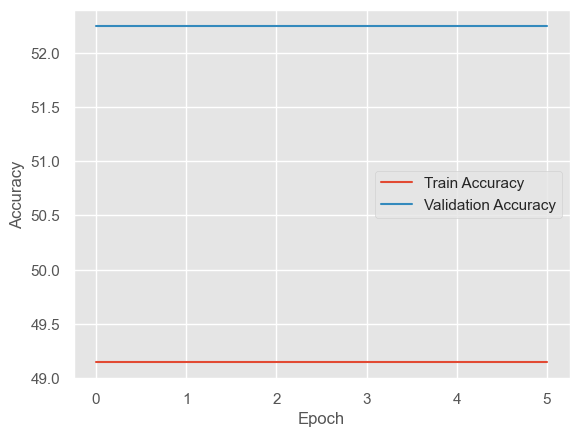

Best validation accuracy: 52.243589743589745
Accuracy: 0.5048076923076923
Confusion Matrix:
[[315   0]
 [309   0]]


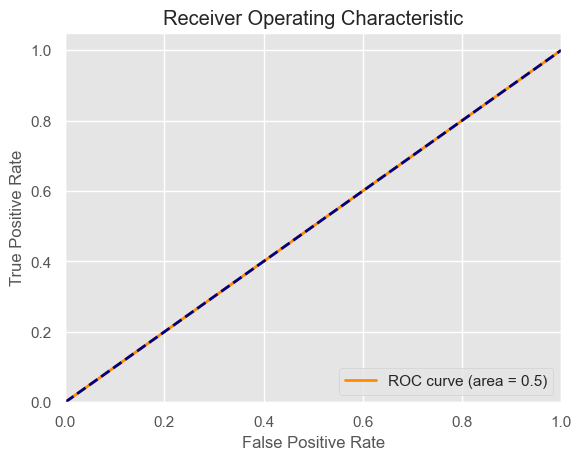

{'Model Name': 'mobilenet3', 'Task': 'realness', 'Data Type': 'No data augmentation', 'mixup': False, 'Optimizer': 'SGD', 'LR Scheduler': 'wihoutLR', 'Accuracy': 0.5048076923076923, 'Training Time (s)': 68.1015956401825}


In [ ]:
pre_models_3 = [
    # {'model': model_label_resnet_2, 'name': 'vision_transformer', 'task': 'label'},
    {'model': model_realness_resnet_3, 'name': 'resnet_3', 'task': 'realness'},
    # {'model': model_label_vision_transformer, 'name': 'vision_transformer', 'task': 'label'},
    {'model': model_realness_mobilenet_3, 'name': 'mobilenet3', 'task': 'realness'},
]
configs3 = list(itertools.product(
                                        pre_models_3,
                                       [data_loaders[0]],
                                        {'SGD': lambda model: SGD(model.parameters(), lr=0.001, momentum=0.9)}.items(),
                                         {'wihoutLR': lambda opt: opt}.items())
                    )
df_configs3 = train_configs(configurations=configs3)

In [ ]:
model_label_resnet_3

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 6.2 Trying to improve accuracy on the realness task

In [ ]:
! pip3 install --upgrade gan_pytorch

In [ ]:
from gan_pytorch import Generator
model = Generator.from_pretrained('g-mnist')

Downloading: "https://github.com/Lornatang/GAN-PyTorch/releases/download/1.0/g-mnist-a0922495.pth" to C:\Users\peyma/.cache\torch\hub\checkpoints\g-mnist-a0922495.pth


HTTPError: HTTP Error 404: Not Found

In [ ]:
! pip install git+https://github.com/lukemelas/pytorch-pretrained-gans

  Cloning https://github.com/lukemelas/pytorch-pretrained-gans to c:\users\peyma\appdata\local\temp\pip-req-build-b0mh6kjx
  Resolved https://github.com/lukemelas/pytorch-pretrained-gans to commit 2982fdab4e683165e45bc2f4a64c2942a7a3a1b7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pytorch-pretrained-gans: filename=pytorch_pretrained_gans-0.0.1-py3-none-any.whl size=185108 sha256=532d5c500d25560b3d2c312f1448293f6e074bdb8b4d26128423fe27a90633e8
  Stored in directory: C:\Users\peyma\AppData\Local\Temp\pip-ephem-wheel-cache-h4p6fgm2\wheels\1d\8a\47\13f79126bd2899ff579333c8a7a907c35d1175f95174cec8a5
Successfully built pytorch-pretrained-gans


  Running command git clone --filter=blob:none --quiet https://github.com/lukemelas/pytorch-pretrained-gans 'C:\Users\peyma\AppData\Local\Temp\pip-req-build-b0mh6kjx'


In [ ]:
import torch
from pytorch_pretrained_gans import make_gan

# Sample a class-conditional image from BigGAN with default resolution 256
G = make_gan(gan_type='biggan')  # -> nn.Module
y = G.sample_class(batch_size=1)  # -> torch.Size([1, 1000])
z = G.sample_latent(batch_size=1)  # -> torch.Size([1, 128])
x = G(z=z, y=y)  # -> torch.Size([1, 3, 256, 256])

ModuleNotFoundError: No module named 'boto3'

In [ ]:
! pip install stylegan2-pytorch

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 435.7 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.6 MB 435.7 kB/s eta 0:00:04
     - -------------------------------------- 0.0/1.6 MB 219.4 kB/s eta 0:00:08
     -- ------------------------------------- 0.1/1.6 MB 476.3 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.6 MB 476.3 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.6 MB 379.3 kB/s eta 0:00:04
     ----- ---------------------------------- 0.2/1.6 MB 623.6 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 623.6 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 492.1 kB/s eta 0:00

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [24 lines of output]
       ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
       ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
       ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
       - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
       - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
       - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
       --- ------------------------------------ 0.1/1.1 MB 655.4 kB/s eta 0:00:02
       --- ------------------------------------ 0.1/1.1 MB 655.4 kB/s eta 0:00:02
       ------ --------------------------------- 0.2/1.1 MB 655.4 kB/s eta 0:00:02
       ------- -------------------------------- 0.2/1.1 MB 778.2 kB/s eta 0:00:02
       ------- -------------------------------- 0.2/1.1 MB 778.2 kB/s eta 0:00:

In [ ]:
! pip install pytorch-fid

In [ ]:
! pip install stylegan2_pytorch

  Using cached stylegan2_pytorch-1.8.9-py3-none-any.whl (19 kB)
  Using cached aim-3.18.1.tar.gz (1.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [6 lines of output]
    Using cached setuptools-69.1.0-py3-none-any.whl.metadata (6.1 kB)
    Using cached Cython-3.0.0a11-py2.py3-none-any.whl (1.1 MB)
  ERROR: Could not find a version that satisfies the requirement aimrocks==0.4.0 (from versions: 0.2.0)
  ERROR: No matching distribution found for aimrocks==0.4.0
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

pip subprocess to install build dependencies did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import torch
from torchvision.utils import save_image
from stylegan2_pytorch import ModelLoader

loader = ModelLoader(
    base_dir = '/path/to/directory',   # path to where you invoked the command line tool
    name = 'default'                   # the project name, defaults to 'default'
)

noise   = torch.randn(1, 512).cuda() # noise
styles  = loader.noise_to_styles(noise, trunc_psi = 0.7)  # pass through mapping network
images  = loader.styles_to_images(styles) # call the generator on intermediate style vectors

save_image(images, './sample.jpg') # save your images, or do whatever you desire

ModuleNotFoundError: No module named 'stylegan2_pytorch'

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
# Assuming 'stylegan2_discriminator' is a function that loads the pre-trained StyleGAN2 discriminator
from your_model_repository import stylegan2_discriminator

# Load the pre-trained discriminator
model = stylegan2_discriminator(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define your image transformation pipeline
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),  # StyleGAN2 commonly works with 1024x1024 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Function to predict if an image is real or fake
def is_real_image(image_path, model):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        prediction = model(image)

    # Interpret the prediction based on your understanding of the output layer of the discriminator
    # This might vary depending on the specific implementation of the discriminator
    is_real = prediction.sigmoid().item() > 0.5  # Example thresholding, adjust based on your model's output
    return is_real

# Example usage
image_path = "path_to_your_image.jpg"
is_real = is_real_image(image_path, model)
print("The image is real." if is_real else "The image is fake.")


ModuleNotFoundError: No module named 'your_model_repository'

In [ ]:
import torch
from torchvision import transforms
from models import StyleGAN2

# Load StyleGAN2 model
model = StyleGAN2()

# Generate a random latent vector
latent_vector = torch.randn(1, 512)

# Generate an image from the latent vector
output_image = model(latent_vector)

# Save the generated image
transforms.ToPILImage()(output_image[0].cpu()).save('generated_image.png')


ModuleNotFoundError: No module named 'models'